In [1]:
#pip install mrmr_selection

In [2]:
#pip install polars

In [3]:
#pip install xgboost

In [4]:
#pip install --upgrade scikit-learn

In [5]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
import random
from matplotlib import pyplot
from numpy import argmax
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.preprocessing import MinMaxScaler
from sklearn import svm
from sklearn import metrics
from mrmr import mrmr_classif
from sklearn.model_selection import StratifiedKFold, GridSearchCV
np.random.seed(1234)

In [6]:
################################################################################################################################
#upload the data and create a dataframe called df
################################################################################################################################
df=pd.read_csv("winequality-white.csv",sep=';')

In [7]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6

In [8]:
#remove white spaces
df.columns = df.columns.str.replace(' ', '_')

In [9]:
df['quality'].unique()

array([6, 5, 7, 8, 4, 3, 9], dtype=int64)

In [10]:
len(df)

4898

In [11]:
################################################################################################################################
#convert the quality column into a binary column
################################################################################################################################
df['binary_quality']=''
#convert to a binary outcome
for i in range(len(df)):
    if df['quality'].iloc[i]<5:
        df['binary_quality'].iloc[i]=1
    else:
        df['binary_quality'].iloc[i]=0

In [12]:
df.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality binary_quality  
0      8.8        6              0  
1      9.5        6              0  
2     10.1        6              0  
3      9.9        6              0  
4      9.9        6              0

In [13]:
df.tail()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
4893                 24.0                  92.0  0.99114  3.27       0.50   
4894                 57.0                 168.0  0.99490  3.15       0.46   
4895                 30.0                 111.0  0.99254  2.99       0.46   
4896                 20.0                 110.0  0.98869  3.34       0.38   
4897                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality binary_quality  
4893     11.2        6              0  
4894      9.6        5              0  
4895      9.4        6              0  
4896     12.8        7              0  
4897     11.8        6              0

In [14]:
#check for the number of positive cases
sum(df['binary_quality'])

183

In [15]:
#compute the percentage of positives
print(round(sum(df['binary_quality'])/len(df['binary_quality'])*100,2),'%')

3.74 %


In [16]:
################################################################################################################################
#manipulate the dataframe to illustrate the application of different preprocessing technical tools
################################################################################################################################
#delete one record of each row one and two
df['fixed_acidity'][0]=np.nan
df['volatile_acidity'][1]=np.nan

In [17]:
#create an "unfeasible" value for residual sugar
df['residual_sugar'][2]=-100

In [18]:
#add an empty virtual feature
df['vf_empty']=np.nan

In [19]:
#add a redundant virtual feature
df['vf_redundant']=df['citric_acid']*2*random.uniform(0, 1)

In [20]:
#add an irrelevant virtual feature
df['vf_irrelevant']=''
for i in range(len(df)):
    df['vf_irrelevant'][i]=random.uniform(0, 1)

In [21]:
df.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            NaN              0.27         0.36            20.7      0.045   
1            6.3               NaN         0.34             1.6      0.049   
2            8.1              0.28         0.40          -100.0      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality binary_quality  vf_empty  vf_redundant vf_irrelevant  
0      8.8        6              0       NaN      0.340887      0.232368  
1      9.5        6              0       NaN      0.321948      0.161984  
2     10.1        6              0       NaN      0.378763      0.281335  
3      9.9        6              0       NaN      0.303010      0.433413  
4      9.9        6              0       NaN      0.303010      0.992607

In [22]:
################################################################################################################################
#preprocess the data
################################################################################################################################
#check for empties
df.isna().sum()

fixed_acidity              1
volatile_acidity           1
citric_acid                0
residual_sugar             0
chlorides                  0
free_sulfur_dioxide        0
total_sulfur_dioxide       0
density                    0
pH                         0
sulphates                  0
alcohol                    0
quality                    0
binary_quality             0
vf_empty                4898
vf_redundant               0
vf_irrelevant              0
dtype: int64

In [23]:
#impute a column with a mean
df['fixed_acidity'].fillna(int(df['fixed_acidity'].mean()), inplace=True)

In [24]:
#eliminate column with too many empties
# based on a threshold
df=df.dropna(axis=1,thresh=4000)

In [25]:
#check for empties
df.isna().sum()

fixed_acidity           0
volatile_acidity        1
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
binary_quality          0
vf_redundant            0
vf_irrelevant           0
dtype: int64

In [26]:
#eliminate the reamining rows with little NaNs if needed
df.dropna(inplace=True)

In [27]:
#check for empties
df.isna().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
binary_quality          0
vf_redundant            0
vf_irrelevant           0
dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'fixed_acidity'),
  Text(1, 0, 'volatile_acidity'),
  Text(2, 0, 'citric_acid'),
  Text(3, 0, 'residual_sugar'),
  Text(4, 0, 'chlorides'),
  Text(5, 0, 'free_sulfur_dioxide'),
  Text(6, 0, 'total_sulfur_dioxide'),
  Text(7, 0, 'density'),
  Text(8, 0, 'pH'),
  Text(9, 0, 'sulphates'),
  Text(10, 0, 'alcohol'),
  Text(11, 0, 'quality'),
  Text(12, 0, 'binary_quality'),
  Text(13, 0, 'vf_redundant'),
  Text(14, 0, 'vf_irrelevant')])

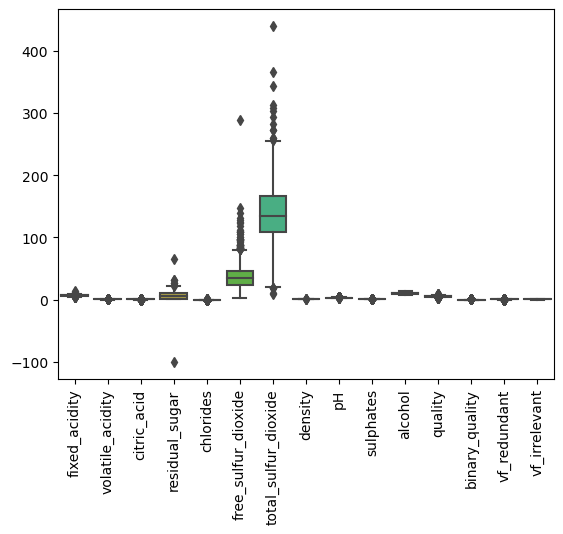

In [28]:
#outlier detection, visualize all the features
sns.boxplot(data=df)
plt.xticks(rotation=90)

<Axes: >

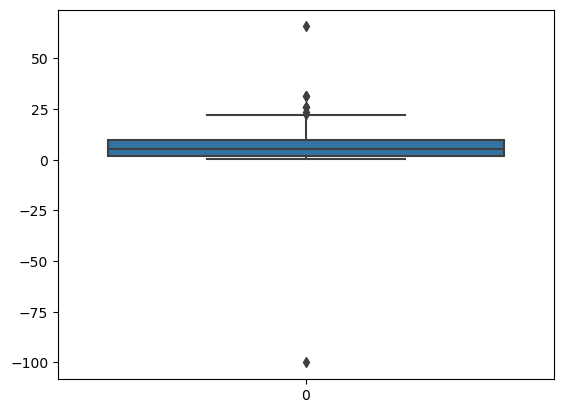

In [29]:
#outlier visualization, one feature
sns.boxplot(data=df['residual_sugar'])

In [30]:
min(df['residual_sugar'])

-100.0

In [31]:
#drop outliers based on a condition. In this case domain knowledge indicates that no negatives values are feasible.
df.drop(df[df.residual_sugar<0].index , inplace=True)

<Axes: >

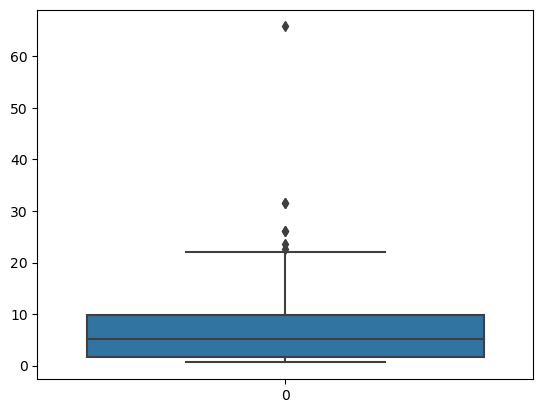

In [32]:
#outlier visualization, one feature
sns.boxplot(data=df['residual_sugar'])

In [33]:
#data driven approach  to remove outliers based on the IQR
#compute the upper and lower limits
Q1 = df['residual_sugar'].quantile(0.25)
Q3 = df['residual_sugar'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
# Create arrays of Boolean values indicating the outlier rows
df.drop(df[df.residual_sugar<=lower].index , inplace=True)
df.drop(df[df.residual_sugar>=upper].index , inplace=True)

<Axes: >

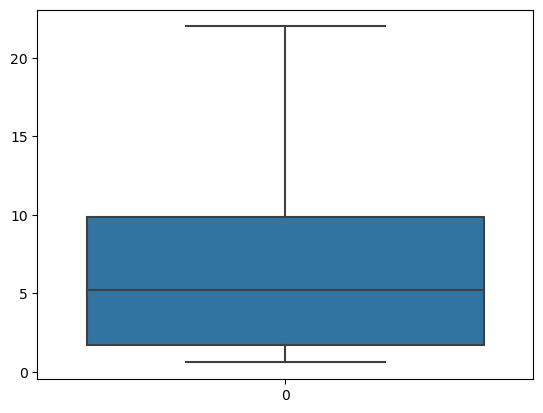

In [34]:
#outlier visualization, one feature
sns.boxplot(data=df['residual_sugar'])

In [35]:
len(df)

4889

In [36]:
df.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            6.0              0.27         0.36            20.7      0.045   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   
5            8.1              0.28         0.40             6.9      0.050   
6            6.2              0.32         0.16             7.0      0.045   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   
5                 30.0                  97.0   0.9951  3.26       0.44   
6                 30.0                 136.0   0.9949  3.18       0.47   

   alcohol  quality binary_quality  vf_redundant vf_irrelevant  
0      8.8        6              0      0.340887      0.232368  
3      9.9        6              0      0.303010      0.433413  
4      9.9        6              0      0.303010      0.992607  
5     10.1        6              0      0.378763      0.483786  
6      9.6        6              0      0.151505      0.626476

In [37]:
################################################################################################################################
#create the learning dataset
################################################################################################################################
#create y, a vector with the labels
y=df.iloc[:,12]
y=y.astype('int')
print(y)

0       0
3       0
4       0
5       0
6       0
       ..
4893    0
4894    0
4895    0
4896    0
4897    0
Name: binary_quality, Length: 4889, dtype: int32


In [38]:
#samples by labels
y.value_counts()

0    4706
1     183
Name: binary_quality, dtype: int64

In [39]:
df = df.drop(['quality','binary_quality'], axis=1)

In [40]:
#create X, a matrix with the features on the "minimum Redundancy - Maximum Relevance" filter feature selection algorithm
X=df

In [41]:
#rank the features based on the "minimum Redundancy - Maximum Relevance" filter feature selection algorithm
selected_features = mrmr_classif(X=X, y=y, K=13)

100%|██████████| 13/13 [00:22<00:00,  1.72s/it]


In [42]:
#ranked features
selected_features

['volatile_acidity',
 'fixed_acidity',
 'free_sulfur_dioxide',
 'chlorides',
 'residual_sugar',
 'sulphates',
 'alcohol',
 'vf_redundant',
 'citric_acid',
 'total_sulfur_dioxide',
 'density',
 'pH',
 'vf_irrelevant']

In [43]:
#eliminate the last ranked feature
X=X[X.columns.intersection(selected_features[0:12])]

In [44]:
#correlation analysis
X.corr()

fixed_acidity  volatile_acidity  citric_acid  \
fixed_acidity              1.000000         -0.024714     0.289355   
volatile_acidity          -0.024714          1.000000    -0.152958   
citric_acid                0.289355         -0.152958     1.000000   
residual_sugar             0.085975          0.046094     0.091397   
chlorides                  0.023406          0.070001     0.113167   
free_sulfur_dioxide       -0.049068         -0.094810     0.094318   
total_sulfur_dioxide       0.090619          0.089198     0.120789   
density                    0.267536          0.003228     0.148291   
pH                        -0.426512         -0.033459    -0.164382   
sulphates                 -0.017163         -0.037920     0.061691   
alcohol                   -0.119850          0.067298    -0.076467   
vf_redundant               0.289355         -0.152958     1.000000   

                      residual_sugar  chlorides  free_sulfur_dioxide  \
fixed_acidity               0.085975   0.023406            -0.049068   
volatile_acidity            0.046094   0.070001            -0.094810   
citric_acid                 0.091397   0.113167             0.094318   
residual_sugar              1.000000   0.085685             0.309713   
chlorides                   0.085685   1.000000             0.101018   
free_sulfur_dioxide         0.309713   0.101018             1.000000   
total_sulfur_dioxide        0.408149   0.199090             0.615974   
density                     0.831570   0.261312             0.309059   
pH                         -0.199056  -0.090678             0.000400   
sulphates                  -0.027709   0.017186             0.060069   
alcohol                    -0.462482  -0.362290            -0.250512   
vf_redundant                0.091397   0.113167             0.094318   

                      total_sulfur_dioxide   density        pH  sulphates  \
fixed_acidity                     0.090619  0.267536 -0.426512  -0.017163   
volatile_acidity                  0.089198  0.003228 -0.033459  -0.037920   
citric_acid                       0.120789  0.148291 -0.164382   0.061691   
residual_sugar                    0.408149  0.831570 -0.199056  -0.027709   
chlorides                         0.199090  0.261312 -0.090678   0.017186   
free_sulfur_dioxide               0.615974  0.309059  0.000400   0.060069   
total_sulfur_dioxide              1.000000  0.543690  0.002856   0.134748   
density                           0.543690  1.000000 -0.098492   0.074801   
pH                                0.002856 -0.098492  1.000000   0.155226   
sulphates                         0.134748  0.074801  0.155226   1.000000   
alcohol                          -0.448612 -0.806471  0.121211  -0.017963   
vf_redundant                      0.120789  0.148291 -0.164382   0.061691   

                       alcohol  vf_redundant  
fixed_acidity        -0.119850      0.289355  
volatile_acidity      0.067298     -0.152958  
citric_acid          -0.076467      1.000000  
residual_sugar       -0.462482      0.091397  
chlorides            -0.362290      0.113167  
free_sulfur_dioxide  -0.250512      0.094318  
total_sulfur_dioxide -0.448612      0.120789  
density              -0.806471      0.148291  
pH                    0.121211     -0.164382  
sulphates            -0.017963      0.061691  
alcohol               1.000000     -0.076467  
vf_redundant         -0.076467      1.000000

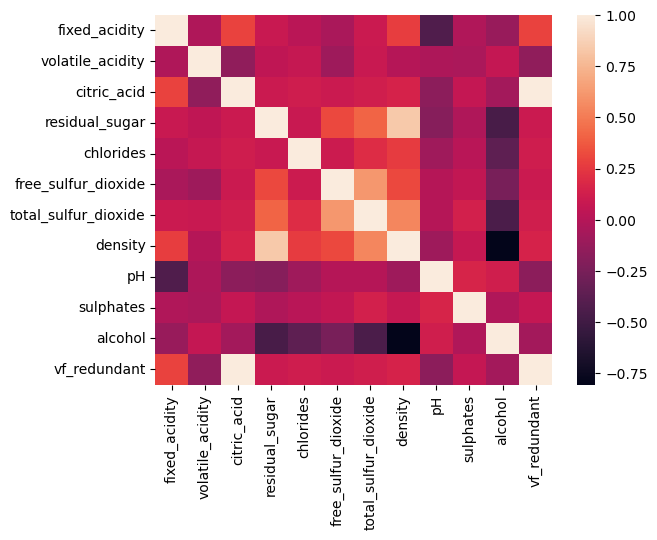

In [45]:
#visualize correlations
sns.heatmap(X.corr());

In [46]:
#delete the highly coreelated feature
X = X.drop('vf_redundant', axis=1)

In [47]:
X.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            6.0              0.27         0.36            20.7      0.045   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   
5            8.1              0.28         0.40             6.9      0.050   
6            6.2              0.32         0.16             7.0      0.045   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   
5                 30.0                  97.0   0.9951  3.26       0.44   
6                 30.0                 136.0   0.9949  3.18       0.47   

   alcohol  
0      8.8  
3      9.9  
4      9.9  
5     10.1  
6      9.6

In [48]:
#split the data into training (90%) and validation (10%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

In [49]:
#samples by labels
y_train.value_counts()

0    4240
1     160
Name: binary_quality, dtype: int64

In [50]:
#samples by labels
y_test.value_counts()

0    466
1     23
Name: binary_quality, dtype: int64

In [51]:
#Create a XGBoost instance
clf = xgb.XGBClassifier(objective='binary:logistic')  

In [52]:
#define a grid search space
param_grid={'learning_rate':[.01,.05,.1], 'max_depth':[3,6,9],'gamma':[0,.25,1], 'reg_lambda': [0,1,10], 'scale_pos_weight':[1,2]}

In [53]:
#Train the model using cross-validation to find the best hyperparameters
grid_search=GridSearchCV(estimator=clf, param_grid=param_grid, cv=4, verbose=True)
grid_search.fit(X_train, y_train, verbose=True, early_stopping_rounds=100, eval_metric='aucpr', eval_set=[(X_test,y_test)])

Fitting 4 folds for each of 243 candidates, totalling 972 fits
[0]	validation_0-aucpr:0.18706
[1]	validation_0-aucpr:0.18706
[2]	validation_0-aucpr:0.18706
[3]	validation_0-aucpr:0.18706
[4]	validation_0-aucpr:0.20375
[5]	validation_0-aucpr:0.19436
[6]	validation_0-aucpr:0.19436
[7]	validation_0-aucpr:0.20375
[8]	validation_0-aucpr:0.19079
[9]	validation_0-aucpr:0.19079
[10]	validation_0-aucpr:0.20095
[11]	validation_0-aucpr:0.19129
[12]	validation_0-aucpr:0.19129
[13]	validation_0-aucpr:0.18489
[14]	validation_0-aucpr:0.18489
[15]	validation_0-aucpr:0.19202
[16]	validation_0-aucpr:0.18489
[17]	validation_0-aucpr:0.18489
[18]	validation_0-aucpr:0.17928
[19]	validation_0-aucpr:0.18641
[20]	validation_0-aucpr:0.18927
[21]	validation_0-aucpr:0.19163
[22]	validation_0-aucpr:0.19163
[23]	validation_0-aucpr:0.19194
[24]	validation_0-aucpr:0.19331
[25]	validation_0-aucpr:0.19665
[26]	validation_0-aucpr:0.20234
[27]	validation_0-aucpr:0.21028
[28]	validation_0-aucpr:0.21614
[29]	validation_0-a

[55]	validation_0-aucpr:0.22680
[56]	validation_0-aucpr:0.22727
[57]	validation_0-aucpr:0.22727
[58]	validation_0-aucpr:0.22727
[59]	validation_0-aucpr:0.22669
[60]	validation_0-aucpr:0.22183
[61]	validation_0-aucpr:0.22397
[62]	validation_0-aucpr:0.22397
[63]	validation_0-aucpr:0.22397
[64]	validation_0-aucpr:0.22397
[65]	validation_0-aucpr:0.22514
[66]	validation_0-aucpr:0.22514
[67]	validation_0-aucpr:0.22618
[68]	validation_0-aucpr:0.23135
[69]	validation_0-aucpr:0.23135
[70]	validation_0-aucpr:0.24050
[71]	validation_0-aucpr:0.24134
[72]	validation_0-aucpr:0.24027
[73]	validation_0-aucpr:0.24027
[74]	validation_0-aucpr:0.24134
[75]	validation_0-aucpr:0.24134
[76]	validation_0-aucpr:0.24134
[77]	validation_0-aucpr:0.24027
[78]	validation_0-aucpr:0.24027
[79]	validation_0-aucpr:0.24134
[80]	validation_0-aucpr:0.24027
[81]	validation_0-aucpr:0.24027
[82]	validation_0-aucpr:0.24027
[83]	validation_0-aucpr:0.24079
[84]	validation_0-aucpr:0.24079
[85]	validation_0-aucpr:0.23972
[86]	val

[12]	validation_0-aucpr:0.25588
[13]	validation_0-aucpr:0.25588
[14]	validation_0-aucpr:0.24304
[15]	validation_0-aucpr:0.24304
[16]	validation_0-aucpr:0.24304
[17]	validation_0-aucpr:0.24304
[18]	validation_0-aucpr:0.24304
[19]	validation_0-aucpr:0.24304
[20]	validation_0-aucpr:0.24304
[21]	validation_0-aucpr:0.24304
[22]	validation_0-aucpr:0.24304
[23]	validation_0-aucpr:0.24304
[24]	validation_0-aucpr:0.23332
[25]	validation_0-aucpr:0.23312
[26]	validation_0-aucpr:0.23312
[27]	validation_0-aucpr:0.23283
[28]	validation_0-aucpr:0.23027
[29]	validation_0-aucpr:0.23027
[30]	validation_0-aucpr:0.23027
[31]	validation_0-aucpr:0.23027
[32]	validation_0-aucpr:0.22137
[33]	validation_0-aucpr:0.22137
[34]	validation_0-aucpr:0.22137
[35]	validation_0-aucpr:0.22137
[36]	validation_0-aucpr:0.22053
[37]	validation_0-aucpr:0.21977
[38]	validation_0-aucpr:0.21562
[39]	validation_0-aucpr:0.21562
[40]	validation_0-aucpr:0.21977
[41]	validation_0-aucpr:0.21579
[42]	validation_0-aucpr:0.21579
[43]	val

[69]	validation_0-aucpr:0.22621
[70]	validation_0-aucpr:0.22421
[71]	validation_0-aucpr:0.22421
[72]	validation_0-aucpr:0.22421
[73]	validation_0-aucpr:0.22991
[74]	validation_0-aucpr:0.22665
[75]	validation_0-aucpr:0.22970
[76]	validation_0-aucpr:0.22752
[77]	validation_0-aucpr:0.22791
[78]	validation_0-aucpr:0.22828
[79]	validation_0-aucpr:0.22828
[80]	validation_0-aucpr:0.22765
[81]	validation_0-aucpr:0.23265
[82]	validation_0-aucpr:0.23265
[83]	validation_0-aucpr:0.23139
[84]	validation_0-aucpr:0.23139
[85]	validation_0-aucpr:0.23139
[86]	validation_0-aucpr:0.23139
[87]	validation_0-aucpr:0.23062
[88]	validation_0-aucpr:0.22974
[89]	validation_0-aucpr:0.22974
[90]	validation_0-aucpr:0.22974
[91]	validation_0-aucpr:0.23063
[92]	validation_0-aucpr:0.23063
[93]	validation_0-aucpr:0.23120
[94]	validation_0-aucpr:0.22268
[95]	validation_0-aucpr:0.22268
[96]	validation_0-aucpr:0.22292
[97]	validation_0-aucpr:0.22848
[98]	validation_0-aucpr:0.22101
[99]	validation_0-aucpr:0.22101
[0]	vali

[26]	validation_0-aucpr:0.21861
[27]	validation_0-aucpr:0.22300
[28]	validation_0-aucpr:0.22244
[29]	validation_0-aucpr:0.22300
[30]	validation_0-aucpr:0.22244
[31]	validation_0-aucpr:0.24437
[32]	validation_0-aucpr:0.25143
[33]	validation_0-aucpr:0.24622
[34]	validation_0-aucpr:0.25371
[35]	validation_0-aucpr:0.26037
[36]	validation_0-aucpr:0.25694
[37]	validation_0-aucpr:0.26037
[38]	validation_0-aucpr:0.25694
[39]	validation_0-aucpr:0.25579
[40]	validation_0-aucpr:0.25405
[41]	validation_0-aucpr:0.25694
[42]	validation_0-aucpr:0.25405
[43]	validation_0-aucpr:0.25579
[44]	validation_0-aucpr:0.25942
[45]	validation_0-aucpr:0.25783
[46]	validation_0-aucpr:0.25285
[47]	validation_0-aucpr:0.25701
[48]	validation_0-aucpr:0.25126
[49]	validation_0-aucpr:0.25285
[50]	validation_0-aucpr:0.25285
[51]	validation_0-aucpr:0.25285
[52]	validation_0-aucpr:0.25701
[53]	validation_0-aucpr:0.25176
[54]	validation_0-aucpr:0.25701
[55]	validation_0-aucpr:0.25285
[56]	validation_0-aucpr:0.27664
[57]	val

[83]	validation_0-aucpr:0.23891
[84]	validation_0-aucpr:0.23891
[85]	validation_0-aucpr:0.24742
[86]	validation_0-aucpr:0.24600
[87]	validation_0-aucpr:0.24600
[88]	validation_0-aucpr:0.24673
[89]	validation_0-aucpr:0.24600
[90]	validation_0-aucpr:0.24673
[91]	validation_0-aucpr:0.24673
[92]	validation_0-aucpr:0.24386
[93]	validation_0-aucpr:0.27400
[94]	validation_0-aucpr:0.27400
[95]	validation_0-aucpr:0.27400
[96]	validation_0-aucpr:0.27400
[97]	validation_0-aucpr:0.27356
[98]	validation_0-aucpr:0.27356
[99]	validation_0-aucpr:0.27356
[0]	validation_0-aucpr:0.20000
[1]	validation_0-aucpr:0.20000
[2]	validation_0-aucpr:0.20000
[3]	validation_0-aucpr:0.20000
[4]	validation_0-aucpr:0.20000
[5]	validation_0-aucpr:0.20000
[6]	validation_0-aucpr:0.20000
[7]	validation_0-aucpr:0.20000
[8]	validation_0-aucpr:0.20000
[9]	validation_0-aucpr:0.20000
[10]	validation_0-aucpr:0.19470
[11]	validation_0-aucpr:0.19470
[12]	validation_0-aucpr:0.21428
[13]	validation_0-aucpr:0.21428
[14]	validation_0-

[40]	validation_0-aucpr:0.17749
[41]	validation_0-aucpr:0.17749
[42]	validation_0-aucpr:0.17749
[43]	validation_0-aucpr:0.17749
[44]	validation_0-aucpr:0.17749
[45]	validation_0-aucpr:0.17749
[46]	validation_0-aucpr:0.17749
[47]	validation_0-aucpr:0.18030
[48]	validation_0-aucpr:0.17855
[49]	validation_0-aucpr:0.18030
[50]	validation_0-aucpr:0.18030
[51]	validation_0-aucpr:0.18030
[52]	validation_0-aucpr:0.18030
[53]	validation_0-aucpr:0.18030
[54]	validation_0-aucpr:0.18308
[55]	validation_0-aucpr:0.18030
[56]	validation_0-aucpr:0.18591
[57]	validation_0-aucpr:0.18591
[58]	validation_0-aucpr:0.18639
[59]	validation_0-aucpr:0.18639
[60]	validation_0-aucpr:0.18639
[61]	validation_0-aucpr:0.18312
[62]	validation_0-aucpr:0.18312
[63]	validation_0-aucpr:0.18680
[64]	validation_0-aucpr:0.18354
[65]	validation_0-aucpr:0.18958
[66]	validation_0-aucpr:0.18958
[67]	validation_0-aucpr:0.18958
[68]	validation_0-aucpr:0.18958
[69]	validation_0-aucpr:0.18958
[70]	validation_0-aucpr:0.19023
[71]	val

[97]	validation_0-aucpr:0.23761
[98]	validation_0-aucpr:0.23921
[99]	validation_0-aucpr:0.23921
[0]	validation_0-aucpr:0.15872
[1]	validation_0-aucpr:0.20387
[2]	validation_0-aucpr:0.20387
[3]	validation_0-aucpr:0.20387
[4]	validation_0-aucpr:0.20304
[5]	validation_0-aucpr:0.20713
[6]	validation_0-aucpr:0.20713
[7]	validation_0-aucpr:0.20713
[8]	validation_0-aucpr:0.20713
[9]	validation_0-aucpr:0.20713
[10]	validation_0-aucpr:0.20793
[11]	validation_0-aucpr:0.20793
[12]	validation_0-aucpr:0.20887
[13]	validation_0-aucpr:0.20887
[14]	validation_0-aucpr:0.20887
[15]	validation_0-aucpr:0.20887
[16]	validation_0-aucpr:0.20887
[17]	validation_0-aucpr:0.20784
[18]	validation_0-aucpr:0.20887
[19]	validation_0-aucpr:0.20851
[20]	validation_0-aucpr:0.20851
[21]	validation_0-aucpr:0.20900
[22]	validation_0-aucpr:0.20900
[23]	validation_0-aucpr:0.20900
[24]	validation_0-aucpr:0.20951
[25]	validation_0-aucpr:0.20900
[26]	validation_0-aucpr:0.21013
[27]	validation_0-aucpr:0.21013
[28]	validation_0-

[54]	validation_0-aucpr:0.22807
[55]	validation_0-aucpr:0.22494
[56]	validation_0-aucpr:0.22494
[57]	validation_0-aucpr:0.22585
[58]	validation_0-aucpr:0.22864
[59]	validation_0-aucpr:0.23232
[60]	validation_0-aucpr:0.23371
[61]	validation_0-aucpr:0.23658
[62]	validation_0-aucpr:0.23658
[63]	validation_0-aucpr:0.23406
[64]	validation_0-aucpr:0.23143
[65]	validation_0-aucpr:0.23143
[66]	validation_0-aucpr:0.22974
[67]	validation_0-aucpr:0.23462
[68]	validation_0-aucpr:0.23462
[69]	validation_0-aucpr:0.23344
[70]	validation_0-aucpr:0.23215
[71]	validation_0-aucpr:0.23357
[72]	validation_0-aucpr:0.23357
[73]	validation_0-aucpr:0.23453
[74]	validation_0-aucpr:0.24011
[75]	validation_0-aucpr:0.23963
[76]	validation_0-aucpr:0.24475
[77]	validation_0-aucpr:0.24475
[78]	validation_0-aucpr:0.24504
[79]	validation_0-aucpr:0.24347
[80]	validation_0-aucpr:0.24410
[81]	validation_0-aucpr:0.24417
[82]	validation_0-aucpr:0.24417
[83]	validation_0-aucpr:0.27375
[84]	validation_0-aucpr:0.24364
[85]	val

[11]	validation_0-aucpr:0.20077
[12]	validation_0-aucpr:0.20077
[13]	validation_0-aucpr:0.20077
[14]	validation_0-aucpr:0.20077
[15]	validation_0-aucpr:0.20077
[16]	validation_0-aucpr:0.20077
[17]	validation_0-aucpr:0.20077
[18]	validation_0-aucpr:0.20217
[19]	validation_0-aucpr:0.21912
[20]	validation_0-aucpr:0.21696
[21]	validation_0-aucpr:0.21984
[22]	validation_0-aucpr:0.21271
[23]	validation_0-aucpr:0.21271
[24]	validation_0-aucpr:0.21577
[25]	validation_0-aucpr:0.21428
[26]	validation_0-aucpr:0.21428
[27]	validation_0-aucpr:0.21691
[28]	validation_0-aucpr:0.21691
[29]	validation_0-aucpr:0.21428
[30]	validation_0-aucpr:0.21234
[31]	validation_0-aucpr:0.21616
[32]	validation_0-aucpr:0.21346
[33]	validation_0-aucpr:0.21505
[34]	validation_0-aucpr:0.21616
[35]	validation_0-aucpr:0.21505
[36]	validation_0-aucpr:0.21505
[37]	validation_0-aucpr:0.21422
[38]	validation_0-aucpr:0.21346
[39]	validation_0-aucpr:0.21346
[40]	validation_0-aucpr:0.21346
[41]	validation_0-aucpr:0.21490
[42]	val

[68]	validation_0-aucpr:0.22638
[69]	validation_0-aucpr:0.22722
[70]	validation_0-aucpr:0.22964
[71]	validation_0-aucpr:0.22964
[72]	validation_0-aucpr:0.22964
[73]	validation_0-aucpr:0.22964
[74]	validation_0-aucpr:0.23155
[75]	validation_0-aucpr:0.23155
[76]	validation_0-aucpr:0.23155
[77]	validation_0-aucpr:0.23257
[78]	validation_0-aucpr:0.23734
[79]	validation_0-aucpr:0.23734
[80]	validation_0-aucpr:0.23734
[81]	validation_0-aucpr:0.23734
[82]	validation_0-aucpr:0.23734
[83]	validation_0-aucpr:0.23492
[84]	validation_0-aucpr:0.23492
[85]	validation_0-aucpr:0.23492
[86]	validation_0-aucpr:0.23492
[87]	validation_0-aucpr:0.23589
[88]	validation_0-aucpr:0.23604
[89]	validation_0-aucpr:0.23604
[90]	validation_0-aucpr:0.23200
[91]	validation_0-aucpr:0.23200
[92]	validation_0-aucpr:0.23366
[93]	validation_0-aucpr:0.23004
[94]	validation_0-aucpr:0.23004
[95]	validation_0-aucpr:0.23073
[96]	validation_0-aucpr:0.23073
[97]	validation_0-aucpr:0.23073
[98]	validation_0-aucpr:0.23073
[99]	val

[25]	validation_0-aucpr:0.22717
[26]	validation_0-aucpr:0.22142
[27]	validation_0-aucpr:0.21976
[28]	validation_0-aucpr:0.21721
[29]	validation_0-aucpr:0.22157
[30]	validation_0-aucpr:0.21818
[31]	validation_0-aucpr:0.21971
[32]	validation_0-aucpr:0.21971
[33]	validation_0-aucpr:0.21971
[34]	validation_0-aucpr:0.21548
[35]	validation_0-aucpr:0.21660
[36]	validation_0-aucpr:0.21153
[37]	validation_0-aucpr:0.21294
[38]	validation_0-aucpr:0.21437
[39]	validation_0-aucpr:0.20848
[40]	validation_0-aucpr:0.20903
[41]	validation_0-aucpr:0.21043
[42]	validation_0-aucpr:0.21002
[43]	validation_0-aucpr:0.21002
[44]	validation_0-aucpr:0.21002
[45]	validation_0-aucpr:0.21002
[46]	validation_0-aucpr:0.20970
[47]	validation_0-aucpr:0.20718
[48]	validation_0-aucpr:0.21042
[49]	validation_0-aucpr:0.20880
[50]	validation_0-aucpr:0.20840
[51]	validation_0-aucpr:0.20880
[52]	validation_0-aucpr:0.21806
[53]	validation_0-aucpr:0.21806
[54]	validation_0-aucpr:0.21725
[55]	validation_0-aucpr:0.21684
[56]	val

[82]	validation_0-aucpr:0.20714
[83]	validation_0-aucpr:0.20894
[84]	validation_0-aucpr:0.20749
[85]	validation_0-aucpr:0.20749
[86]	validation_0-aucpr:0.20986
[87]	validation_0-aucpr:0.20884
[88]	validation_0-aucpr:0.21067
[89]	validation_0-aucpr:0.20966
[90]	validation_0-aucpr:0.20966
[91]	validation_0-aucpr:0.20886
[92]	validation_0-aucpr:0.20966
[93]	validation_0-aucpr:0.20886
[94]	validation_0-aucpr:0.21141
[95]	validation_0-aucpr:0.21061
[96]	validation_0-aucpr:0.21061
[97]	validation_0-aucpr:0.21068
[98]	validation_0-aucpr:0.21068
[99]	validation_0-aucpr:0.21158
[0]	validation_0-aucpr:0.16228
[1]	validation_0-aucpr:0.16228
[2]	validation_0-aucpr:0.16228
[3]	validation_0-aucpr:0.16228
[4]	validation_0-aucpr:0.16228
[5]	validation_0-aucpr:0.16228
[6]	validation_0-aucpr:0.16228
[7]	validation_0-aucpr:0.16228
[8]	validation_0-aucpr:0.16228
[9]	validation_0-aucpr:0.16228
[10]	validation_0-aucpr:0.16228
[11]	validation_0-aucpr:0.16228
[12]	validation_0-aucpr:0.18186
[13]	validation_0-

[39]	validation_0-aucpr:0.23835
[40]	validation_0-aucpr:0.23835
[41]	validation_0-aucpr:0.23809
[42]	validation_0-aucpr:0.23835
[43]	validation_0-aucpr:0.23835
[44]	validation_0-aucpr:0.23835
[45]	validation_0-aucpr:0.23835
[46]	validation_0-aucpr:0.23835
[47]	validation_0-aucpr:0.23835
[48]	validation_0-aucpr:0.23780
[49]	validation_0-aucpr:0.23780
[50]	validation_0-aucpr:0.23780
[51]	validation_0-aucpr:0.23780
[52]	validation_0-aucpr:0.23289
[53]	validation_0-aucpr:0.23289
[54]	validation_0-aucpr:0.23289
[55]	validation_0-aucpr:0.23289
[56]	validation_0-aucpr:0.23289
[57]	validation_0-aucpr:0.23289
[58]	validation_0-aucpr:0.23289
[59]	validation_0-aucpr:0.23289
[60]	validation_0-aucpr:0.23289
[61]	validation_0-aucpr:0.23289
[62]	validation_0-aucpr:0.23289
[63]	validation_0-aucpr:0.23289
[64]	validation_0-aucpr:0.23289
[65]	validation_0-aucpr:0.23289
[66]	validation_0-aucpr:0.23289
[67]	validation_0-aucpr:0.23289
[68]	validation_0-aucpr:0.23289
[69]	validation_0-aucpr:0.23289
[70]	val

[96]	validation_0-aucpr:0.22655
[97]	validation_0-aucpr:0.22745
[98]	validation_0-aucpr:0.22745
[99]	validation_0-aucpr:0.22745
[0]	validation_0-aucpr:0.24601
[1]	validation_0-aucpr:0.23419
[2]	validation_0-aucpr:0.21501
[3]	validation_0-aucpr:0.21603
[4]	validation_0-aucpr:0.21501
[5]	validation_0-aucpr:0.21603
[6]	validation_0-aucpr:0.21603
[7]	validation_0-aucpr:0.22274
[8]	validation_0-aucpr:0.22274
[9]	validation_0-aucpr:0.22004
[10]	validation_0-aucpr:0.21656
[11]	validation_0-aucpr:0.21758
[12]	validation_0-aucpr:0.21656
[13]	validation_0-aucpr:0.21758
[14]	validation_0-aucpr:0.21758
[15]	validation_0-aucpr:0.21758
[16]	validation_0-aucpr:0.23932
[17]	validation_0-aucpr:0.21159
[18]	validation_0-aucpr:0.22766
[19]	validation_0-aucpr:0.25780
[20]	validation_0-aucpr:0.22391
[21]	validation_0-aucpr:0.22671
[22]	validation_0-aucpr:0.22671
[23]	validation_0-aucpr:0.22808
[24]	validation_0-aucpr:0.22674
[25]	validation_0-aucpr:0.22755
[26]	validation_0-aucpr:0.21344
[27]	validation_0-

[53]	validation_0-aucpr:0.33602
[54]	validation_0-aucpr:0.33563
[55]	validation_0-aucpr:0.33661
[56]	validation_0-aucpr:0.33750
[57]	validation_0-aucpr:0.33722
[58]	validation_0-aucpr:0.34338
[59]	validation_0-aucpr:0.34455
[60]	validation_0-aucpr:0.34232
[61]	validation_0-aucpr:0.34459
[62]	validation_0-aucpr:0.34521
[63]	validation_0-aucpr:0.34385
[64]	validation_0-aucpr:0.34350
[65]	validation_0-aucpr:0.33608
[66]	validation_0-aucpr:0.33461
[67]	validation_0-aucpr:0.33152
[68]	validation_0-aucpr:0.33139
[69]	validation_0-aucpr:0.33044
[70]	validation_0-aucpr:0.33213
[71]	validation_0-aucpr:0.33237
[72]	validation_0-aucpr:0.33236
[73]	validation_0-aucpr:0.33254
[74]	validation_0-aucpr:0.33267
[75]	validation_0-aucpr:0.33293
[76]	validation_0-aucpr:0.33133
[77]	validation_0-aucpr:0.33411
[78]	validation_0-aucpr:0.33471
[79]	validation_0-aucpr:0.33092
[80]	validation_0-aucpr:0.32937
[81]	validation_0-aucpr:0.33137
[82]	validation_0-aucpr:0.33434
[83]	validation_0-aucpr:0.33278
[84]	val

[10]	validation_0-aucpr:0.30282
[11]	validation_0-aucpr:0.30282
[12]	validation_0-aucpr:0.30282
[13]	validation_0-aucpr:0.29594
[14]	validation_0-aucpr:0.29594
[15]	validation_0-aucpr:0.30624
[16]	validation_0-aucpr:0.30624
[17]	validation_0-aucpr:0.28808
[18]	validation_0-aucpr:0.30624
[19]	validation_0-aucpr:0.30624
[20]	validation_0-aucpr:0.30624
[21]	validation_0-aucpr:0.30624
[22]	validation_0-aucpr:0.29585
[23]	validation_0-aucpr:0.29584
[24]	validation_0-aucpr:0.29526
[25]	validation_0-aucpr:0.29584
[26]	validation_0-aucpr:0.29584
[27]	validation_0-aucpr:0.29382
[28]	validation_0-aucpr:0.30470
[29]	validation_0-aucpr:0.30648
[30]	validation_0-aucpr:0.29609
[31]	validation_0-aucpr:0.30648
[32]	validation_0-aucpr:0.30648
[33]	validation_0-aucpr:0.29608
[34]	validation_0-aucpr:0.30655
[35]	validation_0-aucpr:0.30656
[36]	validation_0-aucpr:0.30685
[37]	validation_0-aucpr:0.30685
[38]	validation_0-aucpr:0.31369
[39]	validation_0-aucpr:0.31613
[40]	validation_0-aucpr:0.31631
[41]	val

[67]	validation_0-aucpr:0.23423
[68]	validation_0-aucpr:0.23703
[69]	validation_0-aucpr:0.23694
[70]	validation_0-aucpr:0.23373
[71]	validation_0-aucpr:0.22783
[72]	validation_0-aucpr:0.22940
[73]	validation_0-aucpr:0.22882
[74]	validation_0-aucpr:0.22868
[75]	validation_0-aucpr:0.22783
[76]	validation_0-aucpr:0.22755
[77]	validation_0-aucpr:0.22852
[78]	validation_0-aucpr:0.23243
[79]	validation_0-aucpr:0.23156
[80]	validation_0-aucpr:0.23138
[81]	validation_0-aucpr:0.23327
[82]	validation_0-aucpr:0.23300
[83]	validation_0-aucpr:0.23174
[84]	validation_0-aucpr:0.22914
[85]	validation_0-aucpr:0.22728
[86]	validation_0-aucpr:0.22879
[87]	validation_0-aucpr:0.22728
[88]	validation_0-aucpr:0.22506
[89]	validation_0-aucpr:0.22602
[90]	validation_0-aucpr:0.22633
[91]	validation_0-aucpr:0.22770
[92]	validation_0-aucpr:0.22811
[93]	validation_0-aucpr:0.22763
[94]	validation_0-aucpr:0.22673
[95]	validation_0-aucpr:0.22507
[96]	validation_0-aucpr:0.22440
[97]	validation_0-aucpr:0.22456
[98]	val

[24]	validation_0-aucpr:0.26813
[25]	validation_0-aucpr:0.26242
[26]	validation_0-aucpr:0.26174
[27]	validation_0-aucpr:0.26673
[28]	validation_0-aucpr:0.26733
[29]	validation_0-aucpr:0.26129
[30]	validation_0-aucpr:0.27095
[31]	validation_0-aucpr:0.27863
[32]	validation_0-aucpr:0.28146
[33]	validation_0-aucpr:0.29026
[34]	validation_0-aucpr:0.29035
[35]	validation_0-aucpr:0.29352
[36]	validation_0-aucpr:0.26804
[37]	validation_0-aucpr:0.26575
[38]	validation_0-aucpr:0.31375
[39]	validation_0-aucpr:0.31437
[40]	validation_0-aucpr:0.31685
[41]	validation_0-aucpr:0.32363
[42]	validation_0-aucpr:0.32447
[43]	validation_0-aucpr:0.32575
[44]	validation_0-aucpr:0.33547
[45]	validation_0-aucpr:0.33931
[46]	validation_0-aucpr:0.34083
[47]	validation_0-aucpr:0.34176
[48]	validation_0-aucpr:0.34108
[49]	validation_0-aucpr:0.34325
[50]	validation_0-aucpr:0.34363
[51]	validation_0-aucpr:0.34339
[52]	validation_0-aucpr:0.34325
[53]	validation_0-aucpr:0.34812
[54]	validation_0-aucpr:0.34879
[55]	val

[81]	validation_0-aucpr:0.32923
[82]	validation_0-aucpr:0.33094
[83]	validation_0-aucpr:0.33145
[84]	validation_0-aucpr:0.33079
[85]	validation_0-aucpr:0.33010
[86]	validation_0-aucpr:0.33104
[87]	validation_0-aucpr:0.33234
[88]	validation_0-aucpr:0.33169
[89]	validation_0-aucpr:0.33270
[90]	validation_0-aucpr:0.33069
[91]	validation_0-aucpr:0.33248
[92]	validation_0-aucpr:0.32917
[93]	validation_0-aucpr:0.33046
[94]	validation_0-aucpr:0.33010
[95]	validation_0-aucpr:0.33256
[96]	validation_0-aucpr:0.33559
[97]	validation_0-aucpr:0.33559
[98]	validation_0-aucpr:0.33559
[99]	validation_0-aucpr:0.33371
[0]	validation_0-aucpr:0.17553
[1]	validation_0-aucpr:0.18480
[2]	validation_0-aucpr:0.18409
[3]	validation_0-aucpr:0.19187
[4]	validation_0-aucpr:0.19065
[5]	validation_0-aucpr:0.19065
[6]	validation_0-aucpr:0.19253
[7]	validation_0-aucpr:0.19066
[8]	validation_0-aucpr:0.19253
[9]	validation_0-aucpr:0.19253
[10]	validation_0-aucpr:0.19066
[11]	validation_0-aucpr:0.18905
[12]	validation_0-

[38]	validation_0-aucpr:0.25123
[39]	validation_0-aucpr:0.25218
[40]	validation_0-aucpr:0.25465
[41]	validation_0-aucpr:0.25323
[42]	validation_0-aucpr:0.25061
[43]	validation_0-aucpr:0.24665
[44]	validation_0-aucpr:0.24473
[45]	validation_0-aucpr:0.24771
[46]	validation_0-aucpr:0.24500
[47]	validation_0-aucpr:0.24658
[48]	validation_0-aucpr:0.24899
[49]	validation_0-aucpr:0.24852
[50]	validation_0-aucpr:0.24751
[51]	validation_0-aucpr:0.23979
[52]	validation_0-aucpr:0.24496
[53]	validation_0-aucpr:0.23665
[54]	validation_0-aucpr:0.23444
[55]	validation_0-aucpr:0.23384
[56]	validation_0-aucpr:0.23202
[57]	validation_0-aucpr:0.23088
[58]	validation_0-aucpr:0.23053
[59]	validation_0-aucpr:0.23042
[60]	validation_0-aucpr:0.22888
[61]	validation_0-aucpr:0.22792
[62]	validation_0-aucpr:0.22846
[63]	validation_0-aucpr:0.22846
[64]	validation_0-aucpr:0.22889
[65]	validation_0-aucpr:0.22851
[66]	validation_0-aucpr:0.22889
[67]	validation_0-aucpr:0.22572
[68]	validation_0-aucpr:0.22405
[69]	val

[95]	validation_0-aucpr:0.34066
[96]	validation_0-aucpr:0.34138
[97]	validation_0-aucpr:0.34067
[98]	validation_0-aucpr:0.34118
[99]	validation_0-aucpr:0.34147
[0]	validation_0-aucpr:0.20431
[1]	validation_0-aucpr:0.25662
[2]	validation_0-aucpr:0.24987
[3]	validation_0-aucpr:0.25065
[4]	validation_0-aucpr:0.27343
[5]	validation_0-aucpr:0.27082
[6]	validation_0-aucpr:0.26216
[7]	validation_0-aucpr:0.26289
[8]	validation_0-aucpr:0.25893
[9]	validation_0-aucpr:0.26059
[10]	validation_0-aucpr:0.23159
[11]	validation_0-aucpr:0.23694
[12]	validation_0-aucpr:0.23317
[13]	validation_0-aucpr:0.23237
[14]	validation_0-aucpr:0.23307
[15]	validation_0-aucpr:0.23362
[16]	validation_0-aucpr:0.22936
[17]	validation_0-aucpr:0.22979
[18]	validation_0-aucpr:0.23500
[19]	validation_0-aucpr:0.23175
[20]	validation_0-aucpr:0.22963
[21]	validation_0-aucpr:0.24383
[22]	validation_0-aucpr:0.24397
[23]	validation_0-aucpr:0.26053
[24]	validation_0-aucpr:0.26403
[25]	validation_0-aucpr:0.27090
[26]	validation_0-

[52]	validation_0-aucpr:0.43134
[53]	validation_0-aucpr:0.43157
[54]	validation_0-aucpr:0.43368
[55]	validation_0-aucpr:0.43201
[56]	validation_0-aucpr:0.43180
[57]	validation_0-aucpr:0.43414
[58]	validation_0-aucpr:0.43028
[59]	validation_0-aucpr:0.43037
[60]	validation_0-aucpr:0.43037
[61]	validation_0-aucpr:0.42840
[62]	validation_0-aucpr:0.43182
[63]	validation_0-aucpr:0.41590
[64]	validation_0-aucpr:0.41725
[65]	validation_0-aucpr:0.41046
[66]	validation_0-aucpr:0.41388
[67]	validation_0-aucpr:0.42069
[68]	validation_0-aucpr:0.42065
[69]	validation_0-aucpr:0.42624
[70]	validation_0-aucpr:0.42737
[71]	validation_0-aucpr:0.42318
[72]	validation_0-aucpr:0.41661
[73]	validation_0-aucpr:0.41440
[74]	validation_0-aucpr:0.41570
[75]	validation_0-aucpr:0.41345
[76]	validation_0-aucpr:0.41584
[77]	validation_0-aucpr:0.41219
[78]	validation_0-aucpr:0.41262
[79]	validation_0-aucpr:0.40261
[80]	validation_0-aucpr:0.40606
[81]	validation_0-aucpr:0.40647
[82]	validation_0-aucpr:0.41206
[83]	val

[9]	validation_0-aucpr:0.17401
[10]	validation_0-aucpr:0.17522
[11]	validation_0-aucpr:0.17522
[12]	validation_0-aucpr:0.17439
[13]	validation_0-aucpr:0.17522
[14]	validation_0-aucpr:0.17425
[15]	validation_0-aucpr:0.18831
[16]	validation_0-aucpr:0.18906
[17]	validation_0-aucpr:0.19051
[18]	validation_0-aucpr:0.19116
[19]	validation_0-aucpr:0.18788
[20]	validation_0-aucpr:0.18788
[21]	validation_0-aucpr:0.18788
[22]	validation_0-aucpr:0.18645
[23]	validation_0-aucpr:0.18901
[24]	validation_0-aucpr:0.19124
[25]	validation_0-aucpr:0.19090
[26]	validation_0-aucpr:0.20207
[27]	validation_0-aucpr:0.20392
[28]	validation_0-aucpr:0.20166
[29]	validation_0-aucpr:0.21627
[30]	validation_0-aucpr:0.22177
[31]	validation_0-aucpr:0.21973
[32]	validation_0-aucpr:0.21890
[33]	validation_0-aucpr:0.23103
[34]	validation_0-aucpr:0.23281
[35]	validation_0-aucpr:0.23837
[36]	validation_0-aucpr:0.23966
[37]	validation_0-aucpr:0.23966
[38]	validation_0-aucpr:0.24039
[39]	validation_0-aucpr:0.24072
[40]	vali

[66]	validation_0-aucpr:0.23078
[67]	validation_0-aucpr:0.22983
[68]	validation_0-aucpr:0.22986
[69]	validation_0-aucpr:0.23130
[70]	validation_0-aucpr:0.23130
[71]	validation_0-aucpr:0.23130
[72]	validation_0-aucpr:0.23130
[73]	validation_0-aucpr:0.23130
[74]	validation_0-aucpr:0.23130
[75]	validation_0-aucpr:0.23130
[76]	validation_0-aucpr:0.23130
[77]	validation_0-aucpr:0.23130
[78]	validation_0-aucpr:0.23510
[79]	validation_0-aucpr:0.23510
[80]	validation_0-aucpr:0.23510
[81]	validation_0-aucpr:0.23707
[82]	validation_0-aucpr:0.23789
[83]	validation_0-aucpr:0.23694
[84]	validation_0-aucpr:0.23861
[85]	validation_0-aucpr:0.23922
[86]	validation_0-aucpr:0.23394
[87]	validation_0-aucpr:0.23461
[88]	validation_0-aucpr:0.23394
[89]	validation_0-aucpr:0.23449
[90]	validation_0-aucpr:0.23449
[91]	validation_0-aucpr:0.22737
[92]	validation_0-aucpr:0.22545
[93]	validation_0-aucpr:0.22545
[94]	validation_0-aucpr:0.22532
[95]	validation_0-aucpr:0.22473
[96]	validation_0-aucpr:0.22347
[97]	val

[23]	validation_0-aucpr:0.33036
[24]	validation_0-aucpr:0.33259
[25]	validation_0-aucpr:0.33386
[26]	validation_0-aucpr:0.34268
[27]	validation_0-aucpr:0.33768
[28]	validation_0-aucpr:0.33510
[29]	validation_0-aucpr:0.33773
[30]	validation_0-aucpr:0.33582
[31]	validation_0-aucpr:0.33536
[32]	validation_0-aucpr:0.33536
[33]	validation_0-aucpr:0.33340
[34]	validation_0-aucpr:0.33488
[35]	validation_0-aucpr:0.33242
[36]	validation_0-aucpr:0.33391
[37]	validation_0-aucpr:0.33044
[38]	validation_0-aucpr:0.33854
[39]	validation_0-aucpr:0.33854
[40]	validation_0-aucpr:0.33656
[41]	validation_0-aucpr:0.34255
[42]	validation_0-aucpr:0.34368
[43]	validation_0-aucpr:0.34368
[44]	validation_0-aucpr:0.34113
[45]	validation_0-aucpr:0.34224
[46]	validation_0-aucpr:0.33399
[47]	validation_0-aucpr:0.35751
[48]	validation_0-aucpr:0.35751
[49]	validation_0-aucpr:0.35703
[50]	validation_0-aucpr:0.35512
[51]	validation_0-aucpr:0.34387
[52]	validation_0-aucpr:0.35699
[53]	validation_0-aucpr:0.36355
[54]	val

[80]	validation_0-aucpr:0.26452
[81]	validation_0-aucpr:0.26479
[82]	validation_0-aucpr:0.26479
[83]	validation_0-aucpr:0.26783
[84]	validation_0-aucpr:0.26725
[85]	validation_0-aucpr:0.26670
[86]	validation_0-aucpr:0.26670
[87]	validation_0-aucpr:0.26896
[88]	validation_0-aucpr:0.26846
[89]	validation_0-aucpr:0.27042
[90]	validation_0-aucpr:0.27042
[91]	validation_0-aucpr:0.27469
[92]	validation_0-aucpr:0.27811
[93]	validation_0-aucpr:0.27811
[94]	validation_0-aucpr:0.27811
[95]	validation_0-aucpr:0.27881
[96]	validation_0-aucpr:0.27987
[97]	validation_0-aucpr:0.27811
[98]	validation_0-aucpr:0.27987
[99]	validation_0-aucpr:0.28022
[0]	validation_0-aucpr:0.15716
[1]	validation_0-aucpr:0.15573
[2]	validation_0-aucpr:0.15385
[3]	validation_0-aucpr:0.15657
[4]	validation_0-aucpr:0.15657
[5]	validation_0-aucpr:0.15657
[6]	validation_0-aucpr:0.15385
[7]	validation_0-aucpr:0.15657
[8]	validation_0-aucpr:0.15657
[9]	validation_0-aucpr:0.15738
[10]	validation_0-aucpr:0.15738
[11]	validation_0-

[37]	validation_0-aucpr:0.30689
[38]	validation_0-aucpr:0.31518
[39]	validation_0-aucpr:0.32797
[40]	validation_0-aucpr:0.32744
[41]	validation_0-aucpr:0.32797
[42]	validation_0-aucpr:0.32744
[43]	validation_0-aucpr:0.32778
[44]	validation_0-aucpr:0.32778
[45]	validation_0-aucpr:0.32890
[46]	validation_0-aucpr:0.32944
[47]	validation_0-aucpr:0.32944
[48]	validation_0-aucpr:0.33825
[49]	validation_0-aucpr:0.33752
[50]	validation_0-aucpr:0.33841
[51]	validation_0-aucpr:0.34069
[52]	validation_0-aucpr:0.34214
[53]	validation_0-aucpr:0.32927
[54]	validation_0-aucpr:0.32050
[55]	validation_0-aucpr:0.32050
[56]	validation_0-aucpr:0.32064
[57]	validation_0-aucpr:0.31757
[58]	validation_0-aucpr:0.33520
[59]	validation_0-aucpr:0.33554
[60]	validation_0-aucpr:0.33554
[61]	validation_0-aucpr:0.33409
[62]	validation_0-aucpr:0.33564
[63]	validation_0-aucpr:0.33454
[64]	validation_0-aucpr:0.31977
[65]	validation_0-aucpr:0.33884
[66]	validation_0-aucpr:0.32007
[67]	validation_0-aucpr:0.31776
[68]	val

[94]	validation_0-aucpr:0.28808
[95]	validation_0-aucpr:0.29001
[96]	validation_0-aucpr:0.28930
[97]	validation_0-aucpr:0.28959
[98]	validation_0-aucpr:0.29010
[99]	validation_0-aucpr:0.28902
[0]	validation_0-aucpr:0.31933
[1]	validation_0-aucpr:0.29350
[2]	validation_0-aucpr:0.28465
[3]	validation_0-aucpr:0.27269
[4]	validation_0-aucpr:0.27169
[5]	validation_0-aucpr:0.26889
[6]	validation_0-aucpr:0.26501
[7]	validation_0-aucpr:0.26485
[8]	validation_0-aucpr:0.27409
[9]	validation_0-aucpr:0.27191
[10]	validation_0-aucpr:0.27105
[11]	validation_0-aucpr:0.30293
[12]	validation_0-aucpr:0.29912
[13]	validation_0-aucpr:0.29855
[14]	validation_0-aucpr:0.30076
[15]	validation_0-aucpr:0.29927
[16]	validation_0-aucpr:0.29944
[17]	validation_0-aucpr:0.30148
[18]	validation_0-aucpr:0.30052
[19]	validation_0-aucpr:0.30077
[20]	validation_0-aucpr:0.30253
[21]	validation_0-aucpr:0.30648
[22]	validation_0-aucpr:0.30939
[23]	validation_0-aucpr:0.27501
[24]	validation_0-aucpr:0.27318
[25]	validation_0-

[51]	validation_0-aucpr:0.31152
[52]	validation_0-aucpr:0.31178
[53]	validation_0-aucpr:0.31759
[54]	validation_0-aucpr:0.31682
[55]	validation_0-aucpr:0.31734
[56]	validation_0-aucpr:0.32245
[57]	validation_0-aucpr:0.32209
[58]	validation_0-aucpr:0.35008
[59]	validation_0-aucpr:0.32570
[60]	validation_0-aucpr:0.32556
[61]	validation_0-aucpr:0.32855
[62]	validation_0-aucpr:0.35709
[63]	validation_0-aucpr:0.35862
[64]	validation_0-aucpr:0.33092
[65]	validation_0-aucpr:0.33152
[66]	validation_0-aucpr:0.36369
[67]	validation_0-aucpr:0.36550
[68]	validation_0-aucpr:0.36307
[69]	validation_0-aucpr:0.36315
[70]	validation_0-aucpr:0.36467
[71]	validation_0-aucpr:0.36721
[72]	validation_0-aucpr:0.36640
[73]	validation_0-aucpr:0.36517
[74]	validation_0-aucpr:0.36634
[75]	validation_0-aucpr:0.37022
[76]	validation_0-aucpr:0.37021
[77]	validation_0-aucpr:0.36993
[78]	validation_0-aucpr:0.37107
[79]	validation_0-aucpr:0.37556
[80]	validation_0-aucpr:0.37423
[81]	validation_0-aucpr:0.37676
[82]	val

[8]	validation_0-aucpr:0.19841
[9]	validation_0-aucpr:0.19650
[10]	validation_0-aucpr:0.19650
[11]	validation_0-aucpr:0.19650
[12]	validation_0-aucpr:0.19372
[13]	validation_0-aucpr:0.19650
[14]	validation_0-aucpr:0.19650
[15]	validation_0-aucpr:0.19650
[16]	validation_0-aucpr:0.19650
[17]	validation_0-aucpr:0.19375
[18]	validation_0-aucpr:0.19642
[19]	validation_0-aucpr:0.19642
[20]	validation_0-aucpr:0.19642
[21]	validation_0-aucpr:0.19365
[22]	validation_0-aucpr:0.19544
[23]	validation_0-aucpr:0.20530
[24]	validation_0-aucpr:0.20732
[25]	validation_0-aucpr:0.22373
[26]	validation_0-aucpr:0.23432
[27]	validation_0-aucpr:0.24164
[28]	validation_0-aucpr:0.24605
[29]	validation_0-aucpr:0.24923
[30]	validation_0-aucpr:0.25315
[31]	validation_0-aucpr:0.25939
[32]	validation_0-aucpr:0.26114
[33]	validation_0-aucpr:0.26186
[34]	validation_0-aucpr:0.27025
[35]	validation_0-aucpr:0.26960
[36]	validation_0-aucpr:0.26880
[37]	validation_0-aucpr:0.28434
[38]	validation_0-aucpr:0.28396
[39]	valid

[65]	validation_0-aucpr:0.28125
[66]	validation_0-aucpr:0.28319
[67]	validation_0-aucpr:0.28427
[68]	validation_0-aucpr:0.28622
[69]	validation_0-aucpr:0.28752
[70]	validation_0-aucpr:0.28656
[71]	validation_0-aucpr:0.28414
[72]	validation_0-aucpr:0.28454
[73]	validation_0-aucpr:0.28471
[74]	validation_0-aucpr:0.28451
[75]	validation_0-aucpr:0.28980
[76]	validation_0-aucpr:0.28730
[77]	validation_0-aucpr:0.28710
[78]	validation_0-aucpr:0.29098
[79]	validation_0-aucpr:0.29368
[80]	validation_0-aucpr:0.29742
[81]	validation_0-aucpr:0.29760
[82]	validation_0-aucpr:0.29710
[83]	validation_0-aucpr:0.29540
[84]	validation_0-aucpr:0.30187
[85]	validation_0-aucpr:0.30426
[86]	validation_0-aucpr:0.30333
[87]	validation_0-aucpr:0.30537
[88]	validation_0-aucpr:0.30716
[89]	validation_0-aucpr:0.30832
[90]	validation_0-aucpr:0.30995
[91]	validation_0-aucpr:0.31236
[92]	validation_0-aucpr:0.31333
[93]	validation_0-aucpr:0.31340
[94]	validation_0-aucpr:0.31534
[95]	validation_0-aucpr:0.31423
[96]	val

[22]	validation_0-aucpr:0.27121
[23]	validation_0-aucpr:0.27681
[24]	validation_0-aucpr:0.28643
[25]	validation_0-aucpr:0.28777
[26]	validation_0-aucpr:0.29860
[27]	validation_0-aucpr:0.30681
[28]	validation_0-aucpr:0.30679
[29]	validation_0-aucpr:0.30484
[30]	validation_0-aucpr:0.31315
[31]	validation_0-aucpr:0.31761
[32]	validation_0-aucpr:0.31859
[33]	validation_0-aucpr:0.31903
[34]	validation_0-aucpr:0.31844
[35]	validation_0-aucpr:0.32268
[36]	validation_0-aucpr:0.32386
[37]	validation_0-aucpr:0.32339
[38]	validation_0-aucpr:0.32449
[39]	validation_0-aucpr:0.32049
[40]	validation_0-aucpr:0.32252
[41]	validation_0-aucpr:0.32460
[42]	validation_0-aucpr:0.32814
[43]	validation_0-aucpr:0.32765
[44]	validation_0-aucpr:0.33333
[45]	validation_0-aucpr:0.33345
[46]	validation_0-aucpr:0.33413
[47]	validation_0-aucpr:0.33247
[48]	validation_0-aucpr:0.33273
[49]	validation_0-aucpr:0.33307
[50]	validation_0-aucpr:0.30523
[51]	validation_0-aucpr:0.30685
[52]	validation_0-aucpr:0.30753
[53]	val

[79]	validation_0-aucpr:0.27206
[80]	validation_0-aucpr:0.27844
[81]	validation_0-aucpr:0.28112
[82]	validation_0-aucpr:0.28226
[83]	validation_0-aucpr:0.28271
[84]	validation_0-aucpr:0.28446
[85]	validation_0-aucpr:0.28559
[86]	validation_0-aucpr:0.29174
[87]	validation_0-aucpr:0.29248
[88]	validation_0-aucpr:0.29294
[89]	validation_0-aucpr:0.29392
[90]	validation_0-aucpr:0.29362
[91]	validation_0-aucpr:0.29303
[92]	validation_0-aucpr:0.29259
[93]	validation_0-aucpr:0.29271
[94]	validation_0-aucpr:0.29203
[95]	validation_0-aucpr:0.30080
[96]	validation_0-aucpr:0.30685
[97]	validation_0-aucpr:0.30701
[98]	validation_0-aucpr:0.30684
[99]	validation_0-aucpr:0.33938
[0]	validation_0-aucpr:0.15794
[1]	validation_0-aucpr:0.16008
[2]	validation_0-aucpr:0.16412
[3]	validation_0-aucpr:0.16966
[4]	validation_0-aucpr:0.16945
[5]	validation_0-aucpr:0.16918
[6]	validation_0-aucpr:0.16710
[7]	validation_0-aucpr:0.16812
[8]	validation_0-aucpr:0.17804
[9]	validation_0-aucpr:0.16812
[10]	validation_0-

[36]	validation_0-aucpr:0.25125
[37]	validation_0-aucpr:0.24466
[38]	validation_0-aucpr:0.24600
[39]	validation_0-aucpr:0.24840
[40]	validation_0-aucpr:0.25219
[41]	validation_0-aucpr:0.25020
[42]	validation_0-aucpr:0.24306
[43]	validation_0-aucpr:0.24300
[44]	validation_0-aucpr:0.23948
[45]	validation_0-aucpr:0.24068
[46]	validation_0-aucpr:0.24110
[47]	validation_0-aucpr:0.24098
[48]	validation_0-aucpr:0.23911
[49]	validation_0-aucpr:0.24161
[50]	validation_0-aucpr:0.23999
[51]	validation_0-aucpr:0.23989
[52]	validation_0-aucpr:0.24157
[53]	validation_0-aucpr:0.23477
[54]	validation_0-aucpr:0.23325
[55]	validation_0-aucpr:0.23453
[56]	validation_0-aucpr:0.23323
[57]	validation_0-aucpr:0.23112
[58]	validation_0-aucpr:0.24889
[59]	validation_0-aucpr:0.24963
[60]	validation_0-aucpr:0.25073
[61]	validation_0-aucpr:0.25108
[62]	validation_0-aucpr:0.25315
[63]	validation_0-aucpr:0.25353
[64]	validation_0-aucpr:0.25513
[65]	validation_0-aucpr:0.25556
[66]	validation_0-aucpr:0.25616
[67]	val

[93]	validation_0-aucpr:0.37098
[94]	validation_0-aucpr:0.37048
[95]	validation_0-aucpr:0.37077
[96]	validation_0-aucpr:0.37092
[97]	validation_0-aucpr:0.37375
[98]	validation_0-aucpr:0.38006
[99]	validation_0-aucpr:0.38012
[0]	validation_0-aucpr:0.19905
[1]	validation_0-aucpr:0.20675
[2]	validation_0-aucpr:0.24294
[3]	validation_0-aucpr:0.25430
[4]	validation_0-aucpr:0.28004
[5]	validation_0-aucpr:0.28049
[6]	validation_0-aucpr:0.28408
[7]	validation_0-aucpr:0.28600
[8]	validation_0-aucpr:0.28758
[9]	validation_0-aucpr:0.27709
[10]	validation_0-aucpr:0.24684
[11]	validation_0-aucpr:0.24390
[12]	validation_0-aucpr:0.24828
[13]	validation_0-aucpr:0.24766
[14]	validation_0-aucpr:0.24133
[15]	validation_0-aucpr:0.24007
[16]	validation_0-aucpr:0.23844
[17]	validation_0-aucpr:0.23461
[18]	validation_0-aucpr:0.24412
[19]	validation_0-aucpr:0.23707
[20]	validation_0-aucpr:0.23449
[21]	validation_0-aucpr:0.23394
[22]	validation_0-aucpr:0.23910
[23]	validation_0-aucpr:0.24648
[24]	validation_0-

[50]	validation_0-aucpr:0.48997
[51]	validation_0-aucpr:0.49454
[52]	validation_0-aucpr:0.49515
[53]	validation_0-aucpr:0.49601
[54]	validation_0-aucpr:0.49146
[55]	validation_0-aucpr:0.49164
[56]	validation_0-aucpr:0.48155
[57]	validation_0-aucpr:0.48303
[58]	validation_0-aucpr:0.48589
[59]	validation_0-aucpr:0.48622
[60]	validation_0-aucpr:0.48580
[61]	validation_0-aucpr:0.49439
[62]	validation_0-aucpr:0.49469
[63]	validation_0-aucpr:0.49607
[64]	validation_0-aucpr:0.49804
[65]	validation_0-aucpr:0.49685
[66]	validation_0-aucpr:0.50115
[67]	validation_0-aucpr:0.50016
[68]	validation_0-aucpr:0.49980
[69]	validation_0-aucpr:0.50077
[70]	validation_0-aucpr:0.49983
[71]	validation_0-aucpr:0.50471
[72]	validation_0-aucpr:0.50556
[73]	validation_0-aucpr:0.50783
[74]	validation_0-aucpr:0.50752
[75]	validation_0-aucpr:0.50848
[76]	validation_0-aucpr:0.51286
[77]	validation_0-aucpr:0.51103
[78]	validation_0-aucpr:0.51366
[79]	validation_0-aucpr:0.51507
[80]	validation_0-aucpr:0.51350
[81]	val

[7]	validation_0-aucpr:0.19165
[8]	validation_0-aucpr:0.18992
[9]	validation_0-aucpr:0.19227
[10]	validation_0-aucpr:0.19092
[11]	validation_0-aucpr:0.19245
[12]	validation_0-aucpr:0.19210
[13]	validation_0-aucpr:0.19319
[14]	validation_0-aucpr:0.18789
[15]	validation_0-aucpr:0.18941
[16]	validation_0-aucpr:0.18900
[17]	validation_0-aucpr:0.18910
[18]	validation_0-aucpr:0.18984
[19]	validation_0-aucpr:0.19238
[20]	validation_0-aucpr:0.18764
[21]	validation_0-aucpr:0.18764
[22]	validation_0-aucpr:0.19511
[23]	validation_0-aucpr:0.19887
[24]	validation_0-aucpr:0.20071
[25]	validation_0-aucpr:0.20152
[26]	validation_0-aucpr:0.20020
[27]	validation_0-aucpr:0.20212
[28]	validation_0-aucpr:0.20136
[29]	validation_0-aucpr:0.20069
[30]	validation_0-aucpr:0.20259
[31]	validation_0-aucpr:0.20136
[32]	validation_0-aucpr:0.20375
[33]	validation_0-aucpr:0.20601
[34]	validation_0-aucpr:0.23967
[35]	validation_0-aucpr:0.23993
[36]	validation_0-aucpr:0.24272
[37]	validation_0-aucpr:0.24599
[38]	valida

[64]	validation_0-aucpr:0.22980
[65]	validation_0-aucpr:0.22980
[66]	validation_0-aucpr:0.22980
[67]	validation_0-aucpr:0.22950
[68]	validation_0-aucpr:0.22784
[69]	validation_0-aucpr:0.22784
[70]	validation_0-aucpr:0.22674
[71]	validation_0-aucpr:0.22674
[72]	validation_0-aucpr:0.22813
[73]	validation_0-aucpr:0.23167
[74]	validation_0-aucpr:0.23249
[75]	validation_0-aucpr:0.23249
[76]	validation_0-aucpr:0.23249
[77]	validation_0-aucpr:0.23249
[78]	validation_0-aucpr:0.23249
[79]	validation_0-aucpr:0.23249
[80]	validation_0-aucpr:0.23448
[81]	validation_0-aucpr:0.23194
[82]	validation_0-aucpr:0.23194
[83]	validation_0-aucpr:0.23192
[84]	validation_0-aucpr:0.23216
[85]	validation_0-aucpr:0.23167
[86]	validation_0-aucpr:0.23057
[87]	validation_0-aucpr:0.23146
[88]	validation_0-aucpr:0.23084
[89]	validation_0-aucpr:0.23165
[90]	validation_0-aucpr:0.23297
[91]	validation_0-aucpr:0.23919
[92]	validation_0-aucpr:0.23554
[93]	validation_0-aucpr:0.23410
[94]	validation_0-aucpr:0.23375
[95]	val

[21]	validation_0-aucpr:0.32574
[22]	validation_0-aucpr:0.32744
[23]	validation_0-aucpr:0.33131
[24]	validation_0-aucpr:0.33131
[25]	validation_0-aucpr:0.33371
[26]	validation_0-aucpr:0.32835
[27]	validation_0-aucpr:0.32924
[28]	validation_0-aucpr:0.32823
[29]	validation_0-aucpr:0.32823
[30]	validation_0-aucpr:0.32933
[31]	validation_0-aucpr:0.33770
[32]	validation_0-aucpr:0.33368
[33]	validation_0-aucpr:0.33368
[34]	validation_0-aucpr:0.33638
[35]	validation_0-aucpr:0.33760
[36]	validation_0-aucpr:0.34247
[37]	validation_0-aucpr:0.33940
[38]	validation_0-aucpr:0.33940
[39]	validation_0-aucpr:0.33940
[40]	validation_0-aucpr:0.34329
[41]	validation_0-aucpr:0.34329
[42]	validation_0-aucpr:0.34245
[43]	validation_0-aucpr:0.34552
[44]	validation_0-aucpr:0.34701
[45]	validation_0-aucpr:0.33450
[46]	validation_0-aucpr:0.33216
[47]	validation_0-aucpr:0.34771
[48]	validation_0-aucpr:0.33520
[49]	validation_0-aucpr:0.33047
[50]	validation_0-aucpr:0.32683
[51]	validation_0-aucpr:0.32561
[52]	val

[78]	validation_0-aucpr:0.26051
[79]	validation_0-aucpr:0.26584
[80]	validation_0-aucpr:0.26526
[81]	validation_0-aucpr:0.26425
[82]	validation_0-aucpr:0.26526
[83]	validation_0-aucpr:0.26637
[84]	validation_0-aucpr:0.26663
[85]	validation_0-aucpr:0.26637
[86]	validation_0-aucpr:0.26525
[87]	validation_0-aucpr:0.26472
[88]	validation_0-aucpr:0.26910
[89]	validation_0-aucpr:0.26970
[90]	validation_0-aucpr:0.26944
[91]	validation_0-aucpr:0.26944
[92]	validation_0-aucpr:0.26944
[93]	validation_0-aucpr:0.26944
[94]	validation_0-aucpr:0.29531
[95]	validation_0-aucpr:0.29483
[96]	validation_0-aucpr:0.29569
[97]	validation_0-aucpr:0.29391
[98]	validation_0-aucpr:0.29391
[99]	validation_0-aucpr:0.29391
[0]	validation_0-aucpr:0.16302
[1]	validation_0-aucpr:0.16347
[2]	validation_0-aucpr:0.16304
[3]	validation_0-aucpr:0.16304
[4]	validation_0-aucpr:0.16304
[5]	validation_0-aucpr:0.16304
[6]	validation_0-aucpr:0.16304
[7]	validation_0-aucpr:0.16304
[8]	validation_0-aucpr:0.16304
[9]	validation_0-

[35]	validation_0-aucpr:0.28606
[36]	validation_0-aucpr:0.28528
[37]	validation_0-aucpr:0.28427
[38]	validation_0-aucpr:0.28221
[39]	validation_0-aucpr:0.28221
[40]	validation_0-aucpr:0.28151
[41]	validation_0-aucpr:0.28151
[42]	validation_0-aucpr:0.28210
[43]	validation_0-aucpr:0.28251
[44]	validation_0-aucpr:0.28251
[45]	validation_0-aucpr:0.29552
[46]	validation_0-aucpr:0.29460
[47]	validation_0-aucpr:0.29446
[48]	validation_0-aucpr:0.29409
[49]	validation_0-aucpr:0.29409
[50]	validation_0-aucpr:0.29347
[51]	validation_0-aucpr:0.29374
[52]	validation_0-aucpr:0.29343
[53]	validation_0-aucpr:0.29230
[54]	validation_0-aucpr:0.28730
[55]	validation_0-aucpr:0.28595
[56]	validation_0-aucpr:0.28690
[57]	validation_0-aucpr:0.27954
[58]	validation_0-aucpr:0.27844
[59]	validation_0-aucpr:0.27770
[60]	validation_0-aucpr:0.27763
[61]	validation_0-aucpr:0.27763
[62]	validation_0-aucpr:0.27675
[63]	validation_0-aucpr:0.27720
[64]	validation_0-aucpr:0.27794
[65]	validation_0-aucpr:0.27794
[66]	val

[92]	validation_0-aucpr:0.29030
[93]	validation_0-aucpr:0.29095
[94]	validation_0-aucpr:0.28818
[95]	validation_0-aucpr:0.29165
[96]	validation_0-aucpr:0.29347
[97]	validation_0-aucpr:0.29296
[98]	validation_0-aucpr:0.29464
[99]	validation_0-aucpr:0.29447
[0]	validation_0-aucpr:0.18706
[1]	validation_0-aucpr:0.20375
[2]	validation_0-aucpr:0.20279
[3]	validation_0-aucpr:0.18489
[4]	validation_0-aucpr:0.18665
[5]	validation_0-aucpr:0.25311
[6]	validation_0-aucpr:0.25883
[7]	validation_0-aucpr:0.25622
[8]	validation_0-aucpr:0.26870
[9]	validation_0-aucpr:0.26253
[10]	validation_0-aucpr:0.26113
[11]	validation_0-aucpr:0.26562
[12]	validation_0-aucpr:0.26555
[13]	validation_0-aucpr:0.26175
[14]	validation_0-aucpr:0.28489
[15]	validation_0-aucpr:0.28887
[16]	validation_0-aucpr:0.30021
[17]	validation_0-aucpr:0.30047
[18]	validation_0-aucpr:0.29911
[19]	validation_0-aucpr:0.29974
[20]	validation_0-aucpr:0.29533
[21]	validation_0-aucpr:0.29232
[22]	validation_0-aucpr:0.29304
[23]	validation_0-

[49]	validation_0-aucpr:0.24987
[50]	validation_0-aucpr:0.24761
[51]	validation_0-aucpr:0.25103
[52]	validation_0-aucpr:0.25253
[53]	validation_0-aucpr:0.25383
[54]	validation_0-aucpr:0.25557
[55]	validation_0-aucpr:0.25557
[56]	validation_0-aucpr:0.25677
[57]	validation_0-aucpr:0.25808
[58]	validation_0-aucpr:0.25940
[59]	validation_0-aucpr:0.25900
[60]	validation_0-aucpr:0.26140
[61]	validation_0-aucpr:0.26297
[62]	validation_0-aucpr:0.26396
[63]	validation_0-aucpr:0.26593
[64]	validation_0-aucpr:0.26310
[65]	validation_0-aucpr:0.26668
[66]	validation_0-aucpr:0.26334
[67]	validation_0-aucpr:0.26336
[68]	validation_0-aucpr:0.26447
[69]	validation_0-aucpr:0.26653
[70]	validation_0-aucpr:0.26784
[71]	validation_0-aucpr:0.27100
[72]	validation_0-aucpr:0.27393
[73]	validation_0-aucpr:0.27563
[74]	validation_0-aucpr:0.27561
[75]	validation_0-aucpr:0.27241
[76]	validation_0-aucpr:0.27503
[77]	validation_0-aucpr:0.27473
[78]	validation_0-aucpr:0.27454
[79]	validation_0-aucpr:0.27395
[80]	val

[6]	validation_0-aucpr:0.23146
[7]	validation_0-aucpr:0.21866
[8]	validation_0-aucpr:0.21781
[9]	validation_0-aucpr:0.21562
[10]	validation_0-aucpr:0.21494
[11]	validation_0-aucpr:0.20898
[12]	validation_0-aucpr:0.21797
[13]	validation_0-aucpr:0.21757
[14]	validation_0-aucpr:0.21757
[15]	validation_0-aucpr:0.22137
[16]	validation_0-aucpr:0.23594
[17]	validation_0-aucpr:0.23832
[18]	validation_0-aucpr:0.23287
[19]	validation_0-aucpr:0.23152
[20]	validation_0-aucpr:0.22712
[21]	validation_0-aucpr:0.23056
[22]	validation_0-aucpr:0.22929
[23]	validation_0-aucpr:0.23292
[24]	validation_0-aucpr:0.23167
[25]	validation_0-aucpr:0.22711
[26]	validation_0-aucpr:0.23467
[27]	validation_0-aucpr:0.23165
[28]	validation_0-aucpr:0.23145
[29]	validation_0-aucpr:0.22895
[30]	validation_0-aucpr:0.23432
[31]	validation_0-aucpr:0.23329
[32]	validation_0-aucpr:0.23371
[33]	validation_0-aucpr:0.23298
[34]	validation_0-aucpr:0.23127
[35]	validation_0-aucpr:0.22641
[36]	validation_0-aucpr:0.23086
[37]	validat

[63]	validation_0-aucpr:0.23829
[64]	validation_0-aucpr:0.24054
[65]	validation_0-aucpr:0.24395
[66]	validation_0-aucpr:0.24108
[67]	validation_0-aucpr:0.24091
[68]	validation_0-aucpr:0.24162
[69]	validation_0-aucpr:0.24144
[70]	validation_0-aucpr:0.24079
[71]	validation_0-aucpr:0.24195
[72]	validation_0-aucpr:0.23967
[73]	validation_0-aucpr:0.23550
[74]	validation_0-aucpr:0.23501
[75]	validation_0-aucpr:0.23965
[76]	validation_0-aucpr:0.23830
[77]	validation_0-aucpr:0.23693
[78]	validation_0-aucpr:0.23729
[79]	validation_0-aucpr:0.22806
[80]	validation_0-aucpr:0.23205
[81]	validation_0-aucpr:0.23127
[82]	validation_0-aucpr:0.23726
[83]	validation_0-aucpr:0.23620
[84]	validation_0-aucpr:0.23368
[85]	validation_0-aucpr:0.23197
[86]	validation_0-aucpr:0.23099
[87]	validation_0-aucpr:0.23036
[88]	validation_0-aucpr:0.22934
[89]	validation_0-aucpr:0.23174
[90]	validation_0-aucpr:0.23253
[91]	validation_0-aucpr:0.23069
[92]	validation_0-aucpr:0.23045
[93]	validation_0-aucpr:0.23168
[94]	val

[20]	validation_0-aucpr:0.25421
[21]	validation_0-aucpr:0.24943
[22]	validation_0-aucpr:0.24594
[23]	validation_0-aucpr:0.25576
[24]	validation_0-aucpr:0.26777
[25]	validation_0-aucpr:0.27753
[26]	validation_0-aucpr:0.28257
[27]	validation_0-aucpr:0.28741
[28]	validation_0-aucpr:0.28279
[29]	validation_0-aucpr:0.25144
[30]	validation_0-aucpr:0.25418
[31]	validation_0-aucpr:0.24904
[32]	validation_0-aucpr:0.24853
[33]	validation_0-aucpr:0.24914
[34]	validation_0-aucpr:0.24971
[35]	validation_0-aucpr:0.25625
[36]	validation_0-aucpr:0.25644
[37]	validation_0-aucpr:0.25263
[38]	validation_0-aucpr:0.25976
[39]	validation_0-aucpr:0.26079
[40]	validation_0-aucpr:0.26305
[41]	validation_0-aucpr:0.26288
[42]	validation_0-aucpr:0.26813
[43]	validation_0-aucpr:0.27643
[44]	validation_0-aucpr:0.28174
[45]	validation_0-aucpr:0.28193
[46]	validation_0-aucpr:0.28383
[47]	validation_0-aucpr:0.27409
[48]	validation_0-aucpr:0.26724
[49]	validation_0-aucpr:0.27162
[50]	validation_0-aucpr:0.27222
[51]	val

[77]	validation_0-aucpr:0.28964
[78]	validation_0-aucpr:0.29326
[79]	validation_0-aucpr:0.28869
[80]	validation_0-aucpr:0.29112
[81]	validation_0-aucpr:0.28936
[82]	validation_0-aucpr:0.29731
[83]	validation_0-aucpr:0.29480
[84]	validation_0-aucpr:0.29555
[85]	validation_0-aucpr:0.29688
[86]	validation_0-aucpr:0.29862
[87]	validation_0-aucpr:0.29731
[88]	validation_0-aucpr:0.29635
[89]	validation_0-aucpr:0.29624
[90]	validation_0-aucpr:0.29527
[91]	validation_0-aucpr:0.29382
[92]	validation_0-aucpr:0.29372
[93]	validation_0-aucpr:0.29204
[94]	validation_0-aucpr:0.30309
[95]	validation_0-aucpr:0.29421
[96]	validation_0-aucpr:0.29689
[97]	validation_0-aucpr:0.29634
[98]	validation_0-aucpr:0.29684
[99]	validation_0-aucpr:0.29601
[0]	validation_0-aucpr:0.20000
[1]	validation_0-aucpr:0.20000
[2]	validation_0-aucpr:0.19470
[3]	validation_0-aucpr:0.21428
[4]	validation_0-aucpr:0.21713
[5]	validation_0-aucpr:0.21713
[6]	validation_0-aucpr:0.22355
[7]	validation_0-aucpr:0.22056
[8]	validation_0

[34]	validation_0-aucpr:0.20239
[35]	validation_0-aucpr:0.20438
[36]	validation_0-aucpr:0.20675
[37]	validation_0-aucpr:0.20721
[38]	validation_0-aucpr:0.19143
[39]	validation_0-aucpr:0.19490
[40]	validation_0-aucpr:0.19552
[41]	validation_0-aucpr:0.19857
[42]	validation_0-aucpr:0.19511
[43]	validation_0-aucpr:0.19388
[44]	validation_0-aucpr:0.20470
[45]	validation_0-aucpr:0.20535
[46]	validation_0-aucpr:0.20488
[47]	validation_0-aucpr:0.20923
[48]	validation_0-aucpr:0.21110
[49]	validation_0-aucpr:0.21619
[50]	validation_0-aucpr:0.21490
[51]	validation_0-aucpr:0.21661
[52]	validation_0-aucpr:0.21644
[53]	validation_0-aucpr:0.21826
[54]	validation_0-aucpr:0.21708
[55]	validation_0-aucpr:0.21745
[56]	validation_0-aucpr:0.21752
[57]	validation_0-aucpr:0.21797
[58]	validation_0-aucpr:0.21844
[59]	validation_0-aucpr:0.21473
[60]	validation_0-aucpr:0.21438
[61]	validation_0-aucpr:0.21710
[62]	validation_0-aucpr:0.21628
[63]	validation_0-aucpr:0.21688
[64]	validation_0-aucpr:0.21559
[65]	val

[91]	validation_0-aucpr:0.28646
[92]	validation_0-aucpr:0.28546
[93]	validation_0-aucpr:0.28545
[94]	validation_0-aucpr:0.28583
[95]	validation_0-aucpr:0.28413
[96]	validation_0-aucpr:0.28407
[97]	validation_0-aucpr:0.28480
[98]	validation_0-aucpr:0.28518
[99]	validation_0-aucpr:0.28658
[0]	validation_0-aucpr:0.15872
[1]	validation_0-aucpr:0.20634
[2]	validation_0-aucpr:0.20713
[3]	validation_0-aucpr:0.21076
[4]	validation_0-aucpr:0.21179
[5]	validation_0-aucpr:0.20974
[6]	validation_0-aucpr:0.20808
[7]	validation_0-aucpr:0.20925
[8]	validation_0-aucpr:0.20925
[9]	validation_0-aucpr:0.20987
[10]	validation_0-aucpr:0.22875
[11]	validation_0-aucpr:0.23378
[12]	validation_0-aucpr:0.24658
[13]	validation_0-aucpr:0.20755
[14]	validation_0-aucpr:0.21758
[15]	validation_0-aucpr:0.22345
[16]	validation_0-aucpr:0.26505
[17]	validation_0-aucpr:0.26330
[18]	validation_0-aucpr:0.26307
[19]	validation_0-aucpr:0.25297
[20]	validation_0-aucpr:0.24984
[21]	validation_0-aucpr:0.24430
[22]	validation_0-

[48]	validation_0-aucpr:0.27766
[49]	validation_0-aucpr:0.27751
[50]	validation_0-aucpr:0.27862
[51]	validation_0-aucpr:0.28031
[52]	validation_0-aucpr:0.27866
[53]	validation_0-aucpr:0.28344
[54]	validation_0-aucpr:0.28329
[55]	validation_0-aucpr:0.28286
[56]	validation_0-aucpr:0.28080
[57]	validation_0-aucpr:0.28695
[58]	validation_0-aucpr:0.28339
[59]	validation_0-aucpr:0.28645
[60]	validation_0-aucpr:0.28557
[61]	validation_0-aucpr:0.28178
[62]	validation_0-aucpr:0.28417
[63]	validation_0-aucpr:0.28713
[64]	validation_0-aucpr:0.28490
[65]	validation_0-aucpr:0.28423
[66]	validation_0-aucpr:0.28386
[67]	validation_0-aucpr:0.28540
[68]	validation_0-aucpr:0.28538
[69]	validation_0-aucpr:0.28723
[70]	validation_0-aucpr:0.28683
[71]	validation_0-aucpr:0.28472
[72]	validation_0-aucpr:0.28622
[73]	validation_0-aucpr:0.28605
[74]	validation_0-aucpr:0.28706
[75]	validation_0-aucpr:0.28786
[76]	validation_0-aucpr:0.28773
[77]	validation_0-aucpr:0.28785
[78]	validation_0-aucpr:0.29045
[79]	val

[5]	validation_0-aucpr:0.21646
[6]	validation_0-aucpr:0.21616
[7]	validation_0-aucpr:0.21346
[8]	validation_0-aucpr:0.21566
[9]	validation_0-aucpr:0.21701
[10]	validation_0-aucpr:0.22581
[11]	validation_0-aucpr:0.23453
[12]	validation_0-aucpr:0.23709
[13]	validation_0-aucpr:0.23046
[14]	validation_0-aucpr:0.23157
[15]	validation_0-aucpr:0.24358
[16]	validation_0-aucpr:0.23690
[17]	validation_0-aucpr:0.23277
[18]	validation_0-aucpr:0.22277
[19]	validation_0-aucpr:0.23543
[20]	validation_0-aucpr:0.22317
[21]	validation_0-aucpr:0.22320
[22]	validation_0-aucpr:0.23201
[23]	validation_0-aucpr:0.23129
[24]	validation_0-aucpr:0.22908
[25]	validation_0-aucpr:0.23050
[26]	validation_0-aucpr:0.23067
[27]	validation_0-aucpr:0.23678
[28]	validation_0-aucpr:0.23244
[29]	validation_0-aucpr:0.23403
[30]	validation_0-aucpr:0.23387
[31]	validation_0-aucpr:0.23683
[32]	validation_0-aucpr:0.23938
[33]	validation_0-aucpr:0.24126
[34]	validation_0-aucpr:0.24163
[35]	validation_0-aucpr:0.24110
[36]	validati

[62]	validation_0-aucpr:0.27001
[63]	validation_0-aucpr:0.27022
[64]	validation_0-aucpr:0.29500
[65]	validation_0-aucpr:0.27040
[66]	validation_0-aucpr:0.27149
[67]	validation_0-aucpr:0.27332
[68]	validation_0-aucpr:0.30247
[69]	validation_0-aucpr:0.29188
[70]	validation_0-aucpr:0.29377
[71]	validation_0-aucpr:0.29347
[72]	validation_0-aucpr:0.29373
[73]	validation_0-aucpr:0.29375
[74]	validation_0-aucpr:0.29316
[75]	validation_0-aucpr:0.29547
[76]	validation_0-aucpr:0.29528
[77]	validation_0-aucpr:0.29794
[78]	validation_0-aucpr:0.29917
[79]	validation_0-aucpr:0.29680
[80]	validation_0-aucpr:0.29605
[81]	validation_0-aucpr:0.29530
[82]	validation_0-aucpr:0.29715
[83]	validation_0-aucpr:0.29845
[84]	validation_0-aucpr:0.29895
[85]	validation_0-aucpr:0.26743
[86]	validation_0-aucpr:0.26628
[87]	validation_0-aucpr:0.26527
[88]	validation_0-aucpr:0.26302
[89]	validation_0-aucpr:0.26031
[90]	validation_0-aucpr:0.26063
[91]	validation_0-aucpr:0.26460
[92]	validation_0-aucpr:0.26528
[93]	val

[19]	validation_0-aucpr:0.21952
[20]	validation_0-aucpr:0.21789
[21]	validation_0-aucpr:0.21400
[22]	validation_0-aucpr:0.21504
[23]	validation_0-aucpr:0.21340
[24]	validation_0-aucpr:0.21562
[25]	validation_0-aucpr:0.21708
[26]	validation_0-aucpr:0.21440
[27]	validation_0-aucpr:0.21724
[28]	validation_0-aucpr:0.21231
[29]	validation_0-aucpr:0.21444
[30]	validation_0-aucpr:0.22299
[31]	validation_0-aucpr:0.22531
[32]	validation_0-aucpr:0.22884
[33]	validation_0-aucpr:0.22860
[34]	validation_0-aucpr:0.22493
[35]	validation_0-aucpr:0.22599
[36]	validation_0-aucpr:0.23630
[37]	validation_0-aucpr:0.23682
[38]	validation_0-aucpr:0.24268
[39]	validation_0-aucpr:0.23795
[40]	validation_0-aucpr:0.24204
[41]	validation_0-aucpr:0.24576
[42]	validation_0-aucpr:0.24357
[43]	validation_0-aucpr:0.24482
[44]	validation_0-aucpr:0.25024
[45]	validation_0-aucpr:0.24506
[46]	validation_0-aucpr:0.24688
[47]	validation_0-aucpr:0.24909
[48]	validation_0-aucpr:0.24920
[49]	validation_0-aucpr:0.24987
[50]	val

[76]	validation_0-aucpr:0.27192
[77]	validation_0-aucpr:0.27148
[78]	validation_0-aucpr:0.27123
[79]	validation_0-aucpr:0.27021
[80]	validation_0-aucpr:0.27173
[81]	validation_0-aucpr:0.27271
[82]	validation_0-aucpr:0.27287
[83]	validation_0-aucpr:0.27287
[84]	validation_0-aucpr:0.27150
[85]	validation_0-aucpr:0.26767
[86]	validation_0-aucpr:0.27041
[87]	validation_0-aucpr:0.27173
[88]	validation_0-aucpr:0.27234
[89]	validation_0-aucpr:0.27233
[90]	validation_0-aucpr:0.27370
[91]	validation_0-aucpr:0.27143
[92]	validation_0-aucpr:0.27622
[93]	validation_0-aucpr:0.27637
[94]	validation_0-aucpr:0.27540
[95]	validation_0-aucpr:0.27555
[96]	validation_0-aucpr:0.27735
[97]	validation_0-aucpr:0.27784
[98]	validation_0-aucpr:0.27715
[99]	validation_0-aucpr:0.27791
[0]	validation_0-aucpr:0.16228
[1]	validation_0-aucpr:0.16228
[2]	validation_0-aucpr:0.16228
[3]	validation_0-aucpr:0.17954
[4]	validation_0-aucpr:0.17766
[5]	validation_0-aucpr:0.17954
[6]	validation_0-aucpr:0.17766
[7]	validation_

[33]	validation_0-aucpr:0.24807
[34]	validation_0-aucpr:0.24657
[35]	validation_0-aucpr:0.24987
[36]	validation_0-aucpr:0.24863
[37]	validation_0-aucpr:0.25085
[38]	validation_0-aucpr:0.27310
[39]	validation_0-aucpr:0.27407
[40]	validation_0-aucpr:0.27708
[41]	validation_0-aucpr:0.27629
[42]	validation_0-aucpr:0.27658
[43]	validation_0-aucpr:0.27619
[44]	validation_0-aucpr:0.28019
[45]	validation_0-aucpr:0.28107
[46]	validation_0-aucpr:0.28507
[47]	validation_0-aucpr:0.28443
[48]	validation_0-aucpr:0.28580
[49]	validation_0-aucpr:0.28746
[50]	validation_0-aucpr:0.28530
[51]	validation_0-aucpr:0.28638
[52]	validation_0-aucpr:0.28599
[53]	validation_0-aucpr:0.28732
[54]	validation_0-aucpr:0.28739
[55]	validation_0-aucpr:0.28861
[56]	validation_0-aucpr:0.29014
[57]	validation_0-aucpr:0.28949
[58]	validation_0-aucpr:0.29107
[59]	validation_0-aucpr:0.29137
[60]	validation_0-aucpr:0.29111
[61]	validation_0-aucpr:0.29228
[62]	validation_0-aucpr:0.29303
[63]	validation_0-aucpr:0.29465
[64]	val

[90]	validation_0-aucpr:0.22603
[91]	validation_0-aucpr:0.22519
[92]	validation_0-aucpr:0.22578
[93]	validation_0-aucpr:0.22555
[94]	validation_0-aucpr:0.22574
[95]	validation_0-aucpr:0.22495
[96]	validation_0-aucpr:0.22522
[97]	validation_0-aucpr:0.22429
[98]	validation_0-aucpr:0.22397
[99]	validation_0-aucpr:0.22435
[0]	validation_0-aucpr:0.24601
[1]	validation_0-aucpr:0.23419
[2]	validation_0-aucpr:0.21656
[3]	validation_0-aucpr:0.21470
[4]	validation_0-aucpr:0.24102
[5]	validation_0-aucpr:0.23861
[6]	validation_0-aucpr:0.29922
[7]	validation_0-aucpr:0.33357
[8]	validation_0-aucpr:0.30820
[9]	validation_0-aucpr:0.32091
[10]	validation_0-aucpr:0.33355
[11]	validation_0-aucpr:0.33808
[12]	validation_0-aucpr:0.34025
[13]	validation_0-aucpr:0.33701
[14]	validation_0-aucpr:0.33773
[15]	validation_0-aucpr:0.34384
[16]	validation_0-aucpr:0.33063
[17]	validation_0-aucpr:0.32681
[18]	validation_0-aucpr:0.34283
[19]	validation_0-aucpr:0.31341
[20]	validation_0-aucpr:0.31499
[21]	validation_0-

[47]	validation_0-aucpr:0.38858
[48]	validation_0-aucpr:0.39041
[49]	validation_0-aucpr:0.38987
[50]	validation_0-aucpr:0.39342
[51]	validation_0-aucpr:0.39679
[52]	validation_0-aucpr:0.39967
[53]	validation_0-aucpr:0.40185
[54]	validation_0-aucpr:0.40220
[55]	validation_0-aucpr:0.40028
[56]	validation_0-aucpr:0.40283
[57]	validation_0-aucpr:0.39910
[58]	validation_0-aucpr:0.39089
[59]	validation_0-aucpr:0.40283
[60]	validation_0-aucpr:0.40512
[61]	validation_0-aucpr:0.41459
[62]	validation_0-aucpr:0.41712
[63]	validation_0-aucpr:0.41910
[64]	validation_0-aucpr:0.42888
[65]	validation_0-aucpr:0.43220
[66]	validation_0-aucpr:0.43348
[67]	validation_0-aucpr:0.43096
[68]	validation_0-aucpr:0.42669
[69]	validation_0-aucpr:0.42412
[70]	validation_0-aucpr:0.42520
[71]	validation_0-aucpr:0.42429
[72]	validation_0-aucpr:0.42094
[73]	validation_0-aucpr:0.42562
[74]	validation_0-aucpr:0.42568
[75]	validation_0-aucpr:0.43155
[76]	validation_0-aucpr:0.42961
[77]	validation_0-aucpr:0.43956
[78]	val

[4]	validation_0-aucpr:0.28688
[5]	validation_0-aucpr:0.29154
[6]	validation_0-aucpr:0.28685
[7]	validation_0-aucpr:0.28851
[8]	validation_0-aucpr:0.31023
[9]	validation_0-aucpr:0.31869
[10]	validation_0-aucpr:0.31653
[11]	validation_0-aucpr:0.31374
[12]	validation_0-aucpr:0.29957
[13]	validation_0-aucpr:0.29405
[14]	validation_0-aucpr:0.28812
[15]	validation_0-aucpr:0.28364
[16]	validation_0-aucpr:0.30659
[17]	validation_0-aucpr:0.30897
[18]	validation_0-aucpr:0.31042
[19]	validation_0-aucpr:0.31445
[20]	validation_0-aucpr:0.32180
[21]	validation_0-aucpr:0.33309
[22]	validation_0-aucpr:0.34941
[23]	validation_0-aucpr:0.36166
[24]	validation_0-aucpr:0.36256
[25]	validation_0-aucpr:0.37636
[26]	validation_0-aucpr:0.39960
[27]	validation_0-aucpr:0.42761
[28]	validation_0-aucpr:0.43361
[29]	validation_0-aucpr:0.43373
[30]	validation_0-aucpr:0.44105
[31]	validation_0-aucpr:0.44490
[32]	validation_0-aucpr:0.43970
[33]	validation_0-aucpr:0.44222
[34]	validation_0-aucpr:0.45146
[35]	validatio

[61]	validation_0-aucpr:0.33613
[62]	validation_0-aucpr:0.34955
[63]	validation_0-aucpr:0.34573
[64]	validation_0-aucpr:0.35572
[65]	validation_0-aucpr:0.35870
[66]	validation_0-aucpr:0.35898
[67]	validation_0-aucpr:0.35584
[68]	validation_0-aucpr:0.35702
[69]	validation_0-aucpr:0.35713
[70]	validation_0-aucpr:0.35921
[71]	validation_0-aucpr:0.36175
[72]	validation_0-aucpr:0.36180
[73]	validation_0-aucpr:0.36714
[74]	validation_0-aucpr:0.36563
[75]	validation_0-aucpr:0.36531
[76]	validation_0-aucpr:0.36485
[77]	validation_0-aucpr:0.35894
[78]	validation_0-aucpr:0.35838
[79]	validation_0-aucpr:0.35980
[80]	validation_0-aucpr:0.35895
[81]	validation_0-aucpr:0.35840
[82]	validation_0-aucpr:0.35337
[83]	validation_0-aucpr:0.34804
[84]	validation_0-aucpr:0.35149
[85]	validation_0-aucpr:0.35433
[86]	validation_0-aucpr:0.35237
[87]	validation_0-aucpr:0.35229
[88]	validation_0-aucpr:0.34730
[89]	validation_0-aucpr:0.34706
[90]	validation_0-aucpr:0.35171
[91]	validation_0-aucpr:0.35303
[92]	val

[18]	validation_0-aucpr:0.35915
[19]	validation_0-aucpr:0.36877
[20]	validation_0-aucpr:0.37433
[21]	validation_0-aucpr:0.39261
[22]	validation_0-aucpr:0.40741
[23]	validation_0-aucpr:0.40983
[24]	validation_0-aucpr:0.41043
[25]	validation_0-aucpr:0.40251
[26]	validation_0-aucpr:0.38706
[27]	validation_0-aucpr:0.41130
[28]	validation_0-aucpr:0.39647
[29]	validation_0-aucpr:0.39988
[30]	validation_0-aucpr:0.40987
[31]	validation_0-aucpr:0.41541
[32]	validation_0-aucpr:0.42128
[33]	validation_0-aucpr:0.42152
[34]	validation_0-aucpr:0.42447
[35]	validation_0-aucpr:0.41221
[36]	validation_0-aucpr:0.42232
[37]	validation_0-aucpr:0.42247
[38]	validation_0-aucpr:0.41616
[39]	validation_0-aucpr:0.41247
[40]	validation_0-aucpr:0.41284
[41]	validation_0-aucpr:0.41735
[42]	validation_0-aucpr:0.41831
[43]	validation_0-aucpr:0.41733
[44]	validation_0-aucpr:0.41502
[45]	validation_0-aucpr:0.41672
[46]	validation_0-aucpr:0.42409
[47]	validation_0-aucpr:0.42204
[48]	validation_0-aucpr:0.42626
[49]	val

[75]	validation_0-aucpr:0.39989
[76]	validation_0-aucpr:0.41527
[77]	validation_0-aucpr:0.42079
[78]	validation_0-aucpr:0.42720
[79]	validation_0-aucpr:0.42733
[80]	validation_0-aucpr:0.42454
[81]	validation_0-aucpr:0.43320
[82]	validation_0-aucpr:0.44125
[83]	validation_0-aucpr:0.44477
[84]	validation_0-aucpr:0.45640
[85]	validation_0-aucpr:0.45461
[86]	validation_0-aucpr:0.45390
[87]	validation_0-aucpr:0.45631
[88]	validation_0-aucpr:0.45866
[89]	validation_0-aucpr:0.45971
[90]	validation_0-aucpr:0.46066
[91]	validation_0-aucpr:0.46443
[92]	validation_0-aucpr:0.46956
[93]	validation_0-aucpr:0.46222
[94]	validation_0-aucpr:0.46957
[95]	validation_0-aucpr:0.46715
[96]	validation_0-aucpr:0.46821
[97]	validation_0-aucpr:0.46770
[98]	validation_0-aucpr:0.46566
[99]	validation_0-aucpr:0.46736
[0]	validation_0-aucpr:0.17553
[1]	validation_0-aucpr:0.18579
[2]	validation_0-aucpr:0.18409
[3]	validation_0-aucpr:0.20598
[4]	validation_0-aucpr:0.20179
[5]	validation_0-aucpr:0.21045
[6]	validation

[32]	validation_0-aucpr:0.26014
[33]	validation_0-aucpr:0.26813
[34]	validation_0-aucpr:0.26825
[35]	validation_0-aucpr:0.27593
[36]	validation_0-aucpr:0.27735
[37]	validation_0-aucpr:0.28113
[38]	validation_0-aucpr:0.28531
[39]	validation_0-aucpr:0.28840
[40]	validation_0-aucpr:0.28732
[41]	validation_0-aucpr:0.28757
[42]	validation_0-aucpr:0.28740
[43]	validation_0-aucpr:0.28864
[44]	validation_0-aucpr:0.28612
[45]	validation_0-aucpr:0.28217
[46]	validation_0-aucpr:0.28719
[47]	validation_0-aucpr:0.28579
[48]	validation_0-aucpr:0.28526
[49]	validation_0-aucpr:0.28228
[50]	validation_0-aucpr:0.28928
[51]	validation_0-aucpr:0.28773
[52]	validation_0-aucpr:0.29190
[53]	validation_0-aucpr:0.29454
[54]	validation_0-aucpr:0.29885
[55]	validation_0-aucpr:0.30075
[56]	validation_0-aucpr:0.30122
[57]	validation_0-aucpr:0.30478
[58]	validation_0-aucpr:0.30540
[59]	validation_0-aucpr:0.30658
[60]	validation_0-aucpr:0.30700
[61]	validation_0-aucpr:0.30750
[62]	validation_0-aucpr:0.31042
[63]	val

[89]	validation_0-aucpr:0.40510
[90]	validation_0-aucpr:0.41039
[91]	validation_0-aucpr:0.41023
[92]	validation_0-aucpr:0.41069
[93]	validation_0-aucpr:0.40640
[94]	validation_0-aucpr:0.41274
[95]	validation_0-aucpr:0.41064
[96]	validation_0-aucpr:0.40524
[97]	validation_0-aucpr:0.40574
[98]	validation_0-aucpr:0.40332
[99]	validation_0-aucpr:0.40292
[0]	validation_0-aucpr:0.20431
[1]	validation_0-aucpr:0.26069
[2]	validation_0-aucpr:0.23533
[3]	validation_0-aucpr:0.22588
[4]	validation_0-aucpr:0.26626
[5]	validation_0-aucpr:0.27972
[6]	validation_0-aucpr:0.28071
[7]	validation_0-aucpr:0.29394
[8]	validation_0-aucpr:0.30671
[9]	validation_0-aucpr:0.30445
[10]	validation_0-aucpr:0.33001
[11]	validation_0-aucpr:0.33498
[12]	validation_0-aucpr:0.34093
[13]	validation_0-aucpr:0.34169
[14]	validation_0-aucpr:0.33800
[15]	validation_0-aucpr:0.34030
[16]	validation_0-aucpr:0.35012
[17]	validation_0-aucpr:0.34621
[18]	validation_0-aucpr:0.35673
[19]	validation_0-aucpr:0.35613
[20]	validation_0-

[46]	validation_0-aucpr:0.44940
[47]	validation_0-aucpr:0.45497
[48]	validation_0-aucpr:0.46485
[49]	validation_0-aucpr:0.46588
[50]	validation_0-aucpr:0.46255
[51]	validation_0-aucpr:0.46610
[52]	validation_0-aucpr:0.47037
[53]	validation_0-aucpr:0.46860
[54]	validation_0-aucpr:0.47092
[55]	validation_0-aucpr:0.47272
[56]	validation_0-aucpr:0.47344
[57]	validation_0-aucpr:0.47277
[58]	validation_0-aucpr:0.45035
[59]	validation_0-aucpr:0.45348
[60]	validation_0-aucpr:0.45484
[61]	validation_0-aucpr:0.45198
[62]	validation_0-aucpr:0.44799
[63]	validation_0-aucpr:0.44692
[64]	validation_0-aucpr:0.44938
[65]	validation_0-aucpr:0.45222
[66]	validation_0-aucpr:0.45124
[67]	validation_0-aucpr:0.45202
[68]	validation_0-aucpr:0.44918
[69]	validation_0-aucpr:0.44823
[70]	validation_0-aucpr:0.45251
[71]	validation_0-aucpr:0.44396
[72]	validation_0-aucpr:0.45173
[73]	validation_0-aucpr:0.44635
[74]	validation_0-aucpr:0.44933
[75]	validation_0-aucpr:0.44915
[76]	validation_0-aucpr:0.44793
[77]	val

[3]	validation_0-aucpr:0.19099
[4]	validation_0-aucpr:0.18700
[5]	validation_0-aucpr:0.21731
[6]	validation_0-aucpr:0.22442
[7]	validation_0-aucpr:0.23482
[8]	validation_0-aucpr:0.22552
[9]	validation_0-aucpr:0.22043
[10]	validation_0-aucpr:0.21408
[11]	validation_0-aucpr:0.22966
[12]	validation_0-aucpr:0.22454
[13]	validation_0-aucpr:0.22564
[14]	validation_0-aucpr:0.21956
[15]	validation_0-aucpr:0.22463
[16]	validation_0-aucpr:0.22766
[17]	validation_0-aucpr:0.23436
[18]	validation_0-aucpr:0.27036
[19]	validation_0-aucpr:0.26924
[20]	validation_0-aucpr:0.27400
[21]	validation_0-aucpr:0.27748
[22]	validation_0-aucpr:0.28718
[23]	validation_0-aucpr:0.28994
[24]	validation_0-aucpr:0.28603
[25]	validation_0-aucpr:0.29291
[26]	validation_0-aucpr:0.29538
[27]	validation_0-aucpr:0.29942
[28]	validation_0-aucpr:0.30233
[29]	validation_0-aucpr:0.30123
[30]	validation_0-aucpr:0.29793
[31]	validation_0-aucpr:0.30349
[32]	validation_0-aucpr:0.31187
[33]	validation_0-aucpr:0.31668
[34]	validation

[60]	validation_0-aucpr:0.33919
[61]	validation_0-aucpr:0.33972
[62]	validation_0-aucpr:0.33960
[63]	validation_0-aucpr:0.34328
[64]	validation_0-aucpr:0.34295
[65]	validation_0-aucpr:0.34724
[66]	validation_0-aucpr:0.34976
[67]	validation_0-aucpr:0.35474
[68]	validation_0-aucpr:0.35483
[69]	validation_0-aucpr:0.35446
[70]	validation_0-aucpr:0.35589
[71]	validation_0-aucpr:0.35859
[72]	validation_0-aucpr:0.35817
[73]	validation_0-aucpr:0.35787
[74]	validation_0-aucpr:0.35846
[75]	validation_0-aucpr:0.35646
[76]	validation_0-aucpr:0.34901
[77]	validation_0-aucpr:0.34681
[78]	validation_0-aucpr:0.34522
[79]	validation_0-aucpr:0.34451
[80]	validation_0-aucpr:0.33593
[81]	validation_0-aucpr:0.33587
[82]	validation_0-aucpr:0.33989
[83]	validation_0-aucpr:0.33897
[84]	validation_0-aucpr:0.34151
[85]	validation_0-aucpr:0.33939
[86]	validation_0-aucpr:0.34124
[87]	validation_0-aucpr:0.34200
[88]	validation_0-aucpr:0.34347
[89]	validation_0-aucpr:0.34624
[90]	validation_0-aucpr:0.34512
[91]	val

[17]	validation_0-aucpr:0.34715
[18]	validation_0-aucpr:0.35119
[19]	validation_0-aucpr:0.36825
[20]	validation_0-aucpr:0.34638
[21]	validation_0-aucpr:0.33772
[22]	validation_0-aucpr:0.35786
[23]	validation_0-aucpr:0.34212
[24]	validation_0-aucpr:0.36299
[25]	validation_0-aucpr:0.36824
[26]	validation_0-aucpr:0.36559
[27]	validation_0-aucpr:0.37110
[28]	validation_0-aucpr:0.37015
[29]	validation_0-aucpr:0.36558
[30]	validation_0-aucpr:0.36770
[31]	validation_0-aucpr:0.34255
[32]	validation_0-aucpr:0.33916
[33]	validation_0-aucpr:0.34794
[34]	validation_0-aucpr:0.35177
[35]	validation_0-aucpr:0.35528
[36]	validation_0-aucpr:0.35765
[37]	validation_0-aucpr:0.36043
[38]	validation_0-aucpr:0.36186
[39]	validation_0-aucpr:0.36286
[40]	validation_0-aucpr:0.36657
[41]	validation_0-aucpr:0.37042
[42]	validation_0-aucpr:0.37487
[43]	validation_0-aucpr:0.37941
[44]	validation_0-aucpr:0.37958
[45]	validation_0-aucpr:0.38443
[46]	validation_0-aucpr:0.38509
[47]	validation_0-aucpr:0.38777
[48]	val

[74]	validation_0-aucpr:0.35672
[75]	validation_0-aucpr:0.35627
[76]	validation_0-aucpr:0.35712
[77]	validation_0-aucpr:0.35691
[78]	validation_0-aucpr:0.35719
[79]	validation_0-aucpr:0.35814
[80]	validation_0-aucpr:0.36042
[81]	validation_0-aucpr:0.35820
[82]	validation_0-aucpr:0.35981
[83]	validation_0-aucpr:0.36094
[84]	validation_0-aucpr:0.36039
[85]	validation_0-aucpr:0.36536
[86]	validation_0-aucpr:0.36473
[87]	validation_0-aucpr:0.36452
[88]	validation_0-aucpr:0.36120
[89]	validation_0-aucpr:0.36310
[90]	validation_0-aucpr:0.36238
[91]	validation_0-aucpr:0.36492
[92]	validation_0-aucpr:0.36525
[93]	validation_0-aucpr:0.36479
[94]	validation_0-aucpr:0.36389
[95]	validation_0-aucpr:0.36616
[96]	validation_0-aucpr:0.36567
[97]	validation_0-aucpr:0.37011
[98]	validation_0-aucpr:0.36735
[99]	validation_0-aucpr:0.36816
[0]	validation_0-aucpr:0.15716
[1]	validation_0-aucpr:0.15573
[2]	validation_0-aucpr:0.15385
[3]	validation_0-aucpr:0.16156
[4]	validation_0-aucpr:0.16906
[5]	validatio

[31]	validation_0-aucpr:0.39239
[32]	validation_0-aucpr:0.39535
[33]	validation_0-aucpr:0.39957
[34]	validation_0-aucpr:0.40145
[35]	validation_0-aucpr:0.40231
[36]	validation_0-aucpr:0.38779
[37]	validation_0-aucpr:0.39393
[38]	validation_0-aucpr:0.38877
[39]	validation_0-aucpr:0.40135
[40]	validation_0-aucpr:0.40011
[41]	validation_0-aucpr:0.39438
[42]	validation_0-aucpr:0.40161
[43]	validation_0-aucpr:0.40047
[44]	validation_0-aucpr:0.40118
[45]	validation_0-aucpr:0.39905
[46]	validation_0-aucpr:0.40299
[47]	validation_0-aucpr:0.40523
[48]	validation_0-aucpr:0.40377
[49]	validation_0-aucpr:0.40667
[50]	validation_0-aucpr:0.40961
[51]	validation_0-aucpr:0.40888
[52]	validation_0-aucpr:0.41030
[53]	validation_0-aucpr:0.41512
[54]	validation_0-aucpr:0.41469
[55]	validation_0-aucpr:0.41773
[56]	validation_0-aucpr:0.41998
[57]	validation_0-aucpr:0.41951
[58]	validation_0-aucpr:0.42153
[59]	validation_0-aucpr:0.42024
[60]	validation_0-aucpr:0.42241
[61]	validation_0-aucpr:0.42402
[62]	val

[88]	validation_0-aucpr:0.30650
[89]	validation_0-aucpr:0.30598
[90]	validation_0-aucpr:0.30413
[91]	validation_0-aucpr:0.30400
[92]	validation_0-aucpr:0.30314
[93]	validation_0-aucpr:0.30269
[94]	validation_0-aucpr:0.30672
[95]	validation_0-aucpr:0.30655
[96]	validation_0-aucpr:0.30483
[97]	validation_0-aucpr:0.30267
[98]	validation_0-aucpr:0.30201
[99]	validation_0-aucpr:0.30116
[0]	validation_0-aucpr:0.31933
[1]	validation_0-aucpr:0.29853
[2]	validation_0-aucpr:0.27584
[3]	validation_0-aucpr:0.32206
[4]	validation_0-aucpr:0.31564
[5]	validation_0-aucpr:0.31821
[6]	validation_0-aucpr:0.30842
[7]	validation_0-aucpr:0.33260
[8]	validation_0-aucpr:0.31721
[9]	validation_0-aucpr:0.34665
[10]	validation_0-aucpr:0.32569
[11]	validation_0-aucpr:0.35043
[12]	validation_0-aucpr:0.34387
[13]	validation_0-aucpr:0.35232
[14]	validation_0-aucpr:0.37229
[15]	validation_0-aucpr:0.35933
[16]	validation_0-aucpr:0.34105
[17]	validation_0-aucpr:0.37141
[18]	validation_0-aucpr:0.38250
[19]	validation_0-

[45]	validation_0-aucpr:0.39262
[46]	validation_0-aucpr:0.39298
[47]	validation_0-aucpr:0.39854
[48]	validation_0-aucpr:0.40085
[49]	validation_0-aucpr:0.40058
[50]	validation_0-aucpr:0.40822
[51]	validation_0-aucpr:0.41188
[52]	validation_0-aucpr:0.41386
[53]	validation_0-aucpr:0.41476
[54]	validation_0-aucpr:0.41287
[55]	validation_0-aucpr:0.42006
[56]	validation_0-aucpr:0.41851
[57]	validation_0-aucpr:0.42847
[58]	validation_0-aucpr:0.44190
[59]	validation_0-aucpr:0.44289
[60]	validation_0-aucpr:0.44494
[61]	validation_0-aucpr:0.44526
[62]	validation_0-aucpr:0.44557
[63]	validation_0-aucpr:0.45429
[64]	validation_0-aucpr:0.44933
[65]	validation_0-aucpr:0.45010
[66]	validation_0-aucpr:0.44752
[67]	validation_0-aucpr:0.45297
[68]	validation_0-aucpr:0.44853
[69]	validation_0-aucpr:0.45452
[70]	validation_0-aucpr:0.45225
[71]	validation_0-aucpr:0.45075
[72]	validation_0-aucpr:0.45164
[73]	validation_0-aucpr:0.45284
[74]	validation_0-aucpr:0.45344
[75]	validation_0-aucpr:0.45463
[76]	val

[2]	validation_0-aucpr:0.24741
[3]	validation_0-aucpr:0.19650
[4]	validation_0-aucpr:0.20129
[5]	validation_0-aucpr:0.25155
[6]	validation_0-aucpr:0.25726
[7]	validation_0-aucpr:0.28742
[8]	validation_0-aucpr:0.32312
[9]	validation_0-aucpr:0.31865
[10]	validation_0-aucpr:0.33111
[11]	validation_0-aucpr:0.33385
[12]	validation_0-aucpr:0.33243
[13]	validation_0-aucpr:0.34403
[14]	validation_0-aucpr:0.37979
[15]	validation_0-aucpr:0.38581
[16]	validation_0-aucpr:0.39898
[17]	validation_0-aucpr:0.39473
[18]	validation_0-aucpr:0.39771
[19]	validation_0-aucpr:0.39697
[20]	validation_0-aucpr:0.40461
[21]	validation_0-aucpr:0.41334
[22]	validation_0-aucpr:0.40767
[23]	validation_0-aucpr:0.39833
[24]	validation_0-aucpr:0.40625
[25]	validation_0-aucpr:0.40211
[26]	validation_0-aucpr:0.41605
[27]	validation_0-aucpr:0.42341
[28]	validation_0-aucpr:0.42524
[29]	validation_0-aucpr:0.43842
[30]	validation_0-aucpr:0.45217
[31]	validation_0-aucpr:0.44772
[32]	validation_0-aucpr:0.45134
[33]	validation_

[59]	validation_0-aucpr:0.36895
[60]	validation_0-aucpr:0.37050
[61]	validation_0-aucpr:0.37335
[62]	validation_0-aucpr:0.37326
[63]	validation_0-aucpr:0.37843
[64]	validation_0-aucpr:0.38226
[65]	validation_0-aucpr:0.38015
[66]	validation_0-aucpr:0.38003
[67]	validation_0-aucpr:0.38191
[68]	validation_0-aucpr:0.38890
[69]	validation_0-aucpr:0.39565
[70]	validation_0-aucpr:0.39998
[71]	validation_0-aucpr:0.39767
[72]	validation_0-aucpr:0.39706
[73]	validation_0-aucpr:0.39933
[74]	validation_0-aucpr:0.39860
[75]	validation_0-aucpr:0.39685
[76]	validation_0-aucpr:0.39970
[77]	validation_0-aucpr:0.39652
[78]	validation_0-aucpr:0.39563
[79]	validation_0-aucpr:0.39641
[80]	validation_0-aucpr:0.39776
[81]	validation_0-aucpr:0.40352
[82]	validation_0-aucpr:0.40284
[83]	validation_0-aucpr:0.40924
[84]	validation_0-aucpr:0.40929
[85]	validation_0-aucpr:0.41725
[86]	validation_0-aucpr:0.41114
[87]	validation_0-aucpr:0.40956
[88]	validation_0-aucpr:0.40109
[89]	validation_0-aucpr:0.40052
[90]	val

[16]	validation_0-aucpr:0.38907
[17]	validation_0-aucpr:0.38863
[18]	validation_0-aucpr:0.37870
[19]	validation_0-aucpr:0.37797
[20]	validation_0-aucpr:0.37915
[21]	validation_0-aucpr:0.38019
[22]	validation_0-aucpr:0.37655
[23]	validation_0-aucpr:0.37866
[24]	validation_0-aucpr:0.37843
[25]	validation_0-aucpr:0.38460
[26]	validation_0-aucpr:0.39110
[27]	validation_0-aucpr:0.38791
[28]	validation_0-aucpr:0.40214
[29]	validation_0-aucpr:0.40992
[30]	validation_0-aucpr:0.41129
[31]	validation_0-aucpr:0.40986
[32]	validation_0-aucpr:0.41216
[33]	validation_0-aucpr:0.41719
[34]	validation_0-aucpr:0.42292
[35]	validation_0-aucpr:0.42306
[36]	validation_0-aucpr:0.42984
[37]	validation_0-aucpr:0.43125
[38]	validation_0-aucpr:0.42100
[39]	validation_0-aucpr:0.42867
[40]	validation_0-aucpr:0.42837
[41]	validation_0-aucpr:0.42970
[42]	validation_0-aucpr:0.44667
[43]	validation_0-aucpr:0.44303
[44]	validation_0-aucpr:0.43660
[45]	validation_0-aucpr:0.44326
[46]	validation_0-aucpr:0.44293
[47]	val

[73]	validation_0-aucpr:0.51336
[74]	validation_0-aucpr:0.51520
[75]	validation_0-aucpr:0.51659
[76]	validation_0-aucpr:0.51245
[77]	validation_0-aucpr:0.52192
[78]	validation_0-aucpr:0.51901
[79]	validation_0-aucpr:0.52386
[80]	validation_0-aucpr:0.50021
[81]	validation_0-aucpr:0.49942
[82]	validation_0-aucpr:0.49734
[83]	validation_0-aucpr:0.49405
[84]	validation_0-aucpr:0.49395
[85]	validation_0-aucpr:0.49547
[86]	validation_0-aucpr:0.49504
[87]	validation_0-aucpr:0.49355
[88]	validation_0-aucpr:0.48949
[89]	validation_0-aucpr:0.49030
[90]	validation_0-aucpr:0.46252
[91]	validation_0-aucpr:0.46485
[92]	validation_0-aucpr:0.46463
[93]	validation_0-aucpr:0.46571
[94]	validation_0-aucpr:0.46851
[95]	validation_0-aucpr:0.46532
[96]	validation_0-aucpr:0.46397
[97]	validation_0-aucpr:0.46383
[98]	validation_0-aucpr:0.46686
[99]	validation_0-aucpr:0.47581
[0]	validation_0-aucpr:0.15794
[1]	validation_0-aucpr:0.16332
[2]	validation_0-aucpr:0.17080
[3]	validation_0-aucpr:0.18033
[4]	validati

[30]	validation_0-aucpr:0.24339
[31]	validation_0-aucpr:0.25010
[32]	validation_0-aucpr:0.25368
[33]	validation_0-aucpr:0.25862
[34]	validation_0-aucpr:0.26277
[35]	validation_0-aucpr:0.26823
[36]	validation_0-aucpr:0.26470
[37]	validation_0-aucpr:0.26718
[38]	validation_0-aucpr:0.27212
[39]	validation_0-aucpr:0.27279
[40]	validation_0-aucpr:0.27138
[41]	validation_0-aucpr:0.27986
[42]	validation_0-aucpr:0.27774
[43]	validation_0-aucpr:0.27443
[44]	validation_0-aucpr:0.27698
[45]	validation_0-aucpr:0.27622
[46]	validation_0-aucpr:0.27508
[47]	validation_0-aucpr:0.27591
[48]	validation_0-aucpr:0.27820
[49]	validation_0-aucpr:0.27902
[50]	validation_0-aucpr:0.27975
[51]	validation_0-aucpr:0.28231
[52]	validation_0-aucpr:0.28261
[53]	validation_0-aucpr:0.28215
[54]	validation_0-aucpr:0.27864
[55]	validation_0-aucpr:0.27759
[56]	validation_0-aucpr:0.28030
[57]	validation_0-aucpr:0.28159
[58]	validation_0-aucpr:0.28664
[59]	validation_0-aucpr:0.28585
[60]	validation_0-aucpr:0.28806
[61]	val

[87]	validation_0-aucpr:0.55086
[88]	validation_0-aucpr:0.55140
[89]	validation_0-aucpr:0.55330
[90]	validation_0-aucpr:0.55302
[91]	validation_0-aucpr:0.55263
[92]	validation_0-aucpr:0.55158
[93]	validation_0-aucpr:0.55170
[94]	validation_0-aucpr:0.55349
[95]	validation_0-aucpr:0.56338
[96]	validation_0-aucpr:0.55901
[97]	validation_0-aucpr:0.56112
[98]	validation_0-aucpr:0.55887
[99]	validation_0-aucpr:0.55862
[0]	validation_0-aucpr:0.19905
[1]	validation_0-aucpr:0.29226
[2]	validation_0-aucpr:0.28651
[3]	validation_0-aucpr:0.24245
[4]	validation_0-aucpr:0.24048
[5]	validation_0-aucpr:0.25632
[6]	validation_0-aucpr:0.27302
[7]	validation_0-aucpr:0.28543
[8]	validation_0-aucpr:0.29851
[9]	validation_0-aucpr:0.30473
[10]	validation_0-aucpr:0.32576
[11]	validation_0-aucpr:0.33801
[12]	validation_0-aucpr:0.37710
[13]	validation_0-aucpr:0.38275
[14]	validation_0-aucpr:0.38870
[15]	validation_0-aucpr:0.40383
[16]	validation_0-aucpr:0.41554
[17]	validation_0-aucpr:0.43058
[18]	validation_0-

[44]	validation_0-aucpr:0.53573
[45]	validation_0-aucpr:0.54135
[46]	validation_0-aucpr:0.54616
[47]	validation_0-aucpr:0.55088
[48]	validation_0-aucpr:0.54465
[49]	validation_0-aucpr:0.54483
[50]	validation_0-aucpr:0.55303
[51]	validation_0-aucpr:0.55955
[52]	validation_0-aucpr:0.52582
[53]	validation_0-aucpr:0.56540
[54]	validation_0-aucpr:0.54112
[55]	validation_0-aucpr:0.53160
[56]	validation_0-aucpr:0.52987
[57]	validation_0-aucpr:0.53256
[58]	validation_0-aucpr:0.53310
[59]	validation_0-aucpr:0.53555
[60]	validation_0-aucpr:0.53284
[61]	validation_0-aucpr:0.53330
[62]	validation_0-aucpr:0.53263
[63]	validation_0-aucpr:0.53104
[64]	validation_0-aucpr:0.53360
[65]	validation_0-aucpr:0.53222
[66]	validation_0-aucpr:0.53434
[67]	validation_0-aucpr:0.53132
[68]	validation_0-aucpr:0.53311
[69]	validation_0-aucpr:0.53276
[70]	validation_0-aucpr:0.53505
[71]	validation_0-aucpr:0.53629
[72]	validation_0-aucpr:0.53449
[73]	validation_0-aucpr:0.53439
[74]	validation_0-aucpr:0.53148
[75]	val

[1]	validation_0-aucpr:0.18854
[2]	validation_0-aucpr:0.19082
[3]	validation_0-aucpr:0.19261
[4]	validation_0-aucpr:0.19079
[5]	validation_0-aucpr:0.19919
[6]	validation_0-aucpr:0.20624
[7]	validation_0-aucpr:0.25681
[8]	validation_0-aucpr:0.27527
[9]	validation_0-aucpr:0.27268
[10]	validation_0-aucpr:0.27422
[11]	validation_0-aucpr:0.27446
[12]	validation_0-aucpr:0.27283
[13]	validation_0-aucpr:0.27551
[14]	validation_0-aucpr:0.28229
[15]	validation_0-aucpr:0.28704
[16]	validation_0-aucpr:0.30230
[17]	validation_0-aucpr:0.30233
[18]	validation_0-aucpr:0.30087
[19]	validation_0-aucpr:0.30834
[20]	validation_0-aucpr:0.30629
[21]	validation_0-aucpr:0.30565
[22]	validation_0-aucpr:0.31367
[23]	validation_0-aucpr:0.31265
[24]	validation_0-aucpr:0.31051
[25]	validation_0-aucpr:0.32803
[26]	validation_0-aucpr:0.33371
[27]	validation_0-aucpr:0.33439
[28]	validation_0-aucpr:0.32751
[29]	validation_0-aucpr:0.33780
[30]	validation_0-aucpr:0.33859
[31]	validation_0-aucpr:0.33927
[32]	validation_0

[58]	validation_0-aucpr:0.39755
[59]	validation_0-aucpr:0.39837
[60]	validation_0-aucpr:0.40175
[61]	validation_0-aucpr:0.40307
[62]	validation_0-aucpr:0.40609
[63]	validation_0-aucpr:0.40579
[64]	validation_0-aucpr:0.40473
[65]	validation_0-aucpr:0.40790
[66]	validation_0-aucpr:0.40859
[67]	validation_0-aucpr:0.40987
[68]	validation_0-aucpr:0.40640
[69]	validation_0-aucpr:0.40777
[70]	validation_0-aucpr:0.41340
[71]	validation_0-aucpr:0.41638
[72]	validation_0-aucpr:0.42237
[73]	validation_0-aucpr:0.42312
[74]	validation_0-aucpr:0.42524
[75]	validation_0-aucpr:0.42218
[76]	validation_0-aucpr:0.42148
[77]	validation_0-aucpr:0.42481
[78]	validation_0-aucpr:0.42539
[79]	validation_0-aucpr:0.42594
[80]	validation_0-aucpr:0.43181
[81]	validation_0-aucpr:0.43168
[82]	validation_0-aucpr:0.43364
[83]	validation_0-aucpr:0.43238
[84]	validation_0-aucpr:0.42196
[85]	validation_0-aucpr:0.42332
[86]	validation_0-aucpr:0.42398
[87]	validation_0-aucpr:0.42061
[88]	validation_0-aucpr:0.41841
[89]	val

[15]	validation_0-aucpr:0.36713
[16]	validation_0-aucpr:0.37154
[17]	validation_0-aucpr:0.37283
[18]	validation_0-aucpr:0.38797
[19]	validation_0-aucpr:0.38465
[20]	validation_0-aucpr:0.38180
[21]	validation_0-aucpr:0.39004
[22]	validation_0-aucpr:0.39844
[23]	validation_0-aucpr:0.39304
[24]	validation_0-aucpr:0.39496
[25]	validation_0-aucpr:0.39225
[26]	validation_0-aucpr:0.39805
[27]	validation_0-aucpr:0.39915
[28]	validation_0-aucpr:0.40370
[29]	validation_0-aucpr:0.40775
[30]	validation_0-aucpr:0.41437
[31]	validation_0-aucpr:0.41781
[32]	validation_0-aucpr:0.41866
[33]	validation_0-aucpr:0.41758
[34]	validation_0-aucpr:0.42099
[35]	validation_0-aucpr:0.42336
[36]	validation_0-aucpr:0.42665
[37]	validation_0-aucpr:0.43092
[38]	validation_0-aucpr:0.43092
[39]	validation_0-aucpr:0.43330
[40]	validation_0-aucpr:0.43610
[41]	validation_0-aucpr:0.43971
[42]	validation_0-aucpr:0.44384
[43]	validation_0-aucpr:0.43489
[44]	validation_0-aucpr:0.44389
[45]	validation_0-aucpr:0.43932
[46]	val

[72]	validation_0-aucpr:0.39785
[73]	validation_0-aucpr:0.39820
[74]	validation_0-aucpr:0.39775
[75]	validation_0-aucpr:0.39970
[76]	validation_0-aucpr:0.40042
[77]	validation_0-aucpr:0.40288
[78]	validation_0-aucpr:0.40296
[79]	validation_0-aucpr:0.39992
[80]	validation_0-aucpr:0.39855
[81]	validation_0-aucpr:0.39938
[82]	validation_0-aucpr:0.42848
[83]	validation_0-aucpr:0.43148
[84]	validation_0-aucpr:0.42825
[85]	validation_0-aucpr:0.42943
[86]	validation_0-aucpr:0.42966
[87]	validation_0-aucpr:0.43123
[88]	validation_0-aucpr:0.43008
[89]	validation_0-aucpr:0.42826
[90]	validation_0-aucpr:0.42886
[91]	validation_0-aucpr:0.43137
[92]	validation_0-aucpr:0.42986
[93]	validation_0-aucpr:0.43098
[94]	validation_0-aucpr:0.42930
[95]	validation_0-aucpr:0.43156
[96]	validation_0-aucpr:0.42719
[97]	validation_0-aucpr:0.43043
[98]	validation_0-aucpr:0.42900
[99]	validation_0-aucpr:0.42858
[0]	validation_0-aucpr:0.16302
[1]	validation_0-aucpr:0.16347
[2]	validation_0-aucpr:0.16304
[3]	validat

[29]	validation_0-aucpr:0.35631
[30]	validation_0-aucpr:0.35535
[31]	validation_0-aucpr:0.35516
[32]	validation_0-aucpr:0.36021
[33]	validation_0-aucpr:0.36434
[34]	validation_0-aucpr:0.37977
[35]	validation_0-aucpr:0.36790
[36]	validation_0-aucpr:0.38544
[37]	validation_0-aucpr:0.38681
[38]	validation_0-aucpr:0.37095
[39]	validation_0-aucpr:0.37626
[40]	validation_0-aucpr:0.38056
[41]	validation_0-aucpr:0.38323
[42]	validation_0-aucpr:0.38616
[43]	validation_0-aucpr:0.38632
[44]	validation_0-aucpr:0.40456
[45]	validation_0-aucpr:0.38972
[46]	validation_0-aucpr:0.41116
[47]	validation_0-aucpr:0.41214
[48]	validation_0-aucpr:0.41362
[49]	validation_0-aucpr:0.41717
[50]	validation_0-aucpr:0.41755
[51]	validation_0-aucpr:0.41177
[52]	validation_0-aucpr:0.41501
[53]	validation_0-aucpr:0.41711
[54]	validation_0-aucpr:0.41823
[55]	validation_0-aucpr:0.41612
[56]	validation_0-aucpr:0.41558
[57]	validation_0-aucpr:0.41494
[58]	validation_0-aucpr:0.41330
[59]	validation_0-aucpr:0.41205
[60]	val

[86]	validation_0-aucpr:0.33524
[87]	validation_0-aucpr:0.33245
[88]	validation_0-aucpr:0.33282
[89]	validation_0-aucpr:0.33957
[90]	validation_0-aucpr:0.34160
[91]	validation_0-aucpr:0.34663
[92]	validation_0-aucpr:0.34791
[93]	validation_0-aucpr:0.34746
[94]	validation_0-aucpr:0.35082
[95]	validation_0-aucpr:0.34801
[96]	validation_0-aucpr:0.34995
[97]	validation_0-aucpr:0.35322
[98]	validation_0-aucpr:0.35425
[99]	validation_0-aucpr:0.35510
[0]	validation_0-aucpr:0.18706
[1]	validation_0-aucpr:0.20279
[2]	validation_0-aucpr:0.21256
[3]	validation_0-aucpr:0.20213
[4]	validation_0-aucpr:0.22397
[5]	validation_0-aucpr:0.22341
[6]	validation_0-aucpr:0.25357
[7]	validation_0-aucpr:0.22001
[8]	validation_0-aucpr:0.26569
[9]	validation_0-aucpr:0.29337
[10]	validation_0-aucpr:0.29089
[11]	validation_0-aucpr:0.28905
[12]	validation_0-aucpr:0.28200
[13]	validation_0-aucpr:0.28021
[14]	validation_0-aucpr:0.27730
[15]	validation_0-aucpr:0.28724
[16]	validation_0-aucpr:0.29084
[17]	validation_0-

[43]	validation_0-aucpr:0.29417
[44]	validation_0-aucpr:0.29874
[45]	validation_0-aucpr:0.30146
[46]	validation_0-aucpr:0.30125
[47]	validation_0-aucpr:0.30045
[48]	validation_0-aucpr:0.29869
[49]	validation_0-aucpr:0.30273
[50]	validation_0-aucpr:0.31990
[51]	validation_0-aucpr:0.31397
[52]	validation_0-aucpr:0.31543
[53]	validation_0-aucpr:0.31559
[54]	validation_0-aucpr:0.31569
[55]	validation_0-aucpr:0.32222
[56]	validation_0-aucpr:0.31726
[57]	validation_0-aucpr:0.31944
[58]	validation_0-aucpr:0.32609
[59]	validation_0-aucpr:0.33330
[60]	validation_0-aucpr:0.33140
[61]	validation_0-aucpr:0.32920
[62]	validation_0-aucpr:0.33552
[63]	validation_0-aucpr:0.33881
[64]	validation_0-aucpr:0.35006
[65]	validation_0-aucpr:0.35078
[66]	validation_0-aucpr:0.35443
[67]	validation_0-aucpr:0.35798
[68]	validation_0-aucpr:0.35041
[69]	validation_0-aucpr:0.35072
[70]	validation_0-aucpr:0.34746
[71]	validation_0-aucpr:0.35132
[72]	validation_0-aucpr:0.35142
[73]	validation_0-aucpr:0.34661
[74]	val

[0]	validation_0-aucpr:0.28487
[1]	validation_0-aucpr:0.24077
[2]	validation_0-aucpr:0.24304
[3]	validation_0-aucpr:0.21150
[4]	validation_0-aucpr:0.21049
[5]	validation_0-aucpr:0.21746
[6]	validation_0-aucpr:0.21208
[7]	validation_0-aucpr:0.21009
[8]	validation_0-aucpr:0.21400
[9]	validation_0-aucpr:0.21510
[10]	validation_0-aucpr:0.21838
[11]	validation_0-aucpr:0.23119
[12]	validation_0-aucpr:0.22674
[13]	validation_0-aucpr:0.22390
[14]	validation_0-aucpr:0.23042
[15]	validation_0-aucpr:0.22903
[16]	validation_0-aucpr:0.22552
[17]	validation_0-aucpr:0.23181
[18]	validation_0-aucpr:0.25510
[19]	validation_0-aucpr:0.25973
[20]	validation_0-aucpr:0.26019
[21]	validation_0-aucpr:0.26539
[22]	validation_0-aucpr:0.25687
[23]	validation_0-aucpr:0.26713
[24]	validation_0-aucpr:0.26834
[25]	validation_0-aucpr:0.27587
[26]	validation_0-aucpr:0.27499
[27]	validation_0-aucpr:0.27486
[28]	validation_0-aucpr:0.27549
[29]	validation_0-aucpr:0.27133
[30]	validation_0-aucpr:0.26874
[31]	validation_0-

[57]	validation_0-aucpr:0.23615
[58]	validation_0-aucpr:0.23804
[59]	validation_0-aucpr:0.23741
[60]	validation_0-aucpr:0.23318
[61]	validation_0-aucpr:0.23576
[62]	validation_0-aucpr:0.23750
[63]	validation_0-aucpr:0.23777
[64]	validation_0-aucpr:0.23566
[65]	validation_0-aucpr:0.23574
[66]	validation_0-aucpr:0.23547
[67]	validation_0-aucpr:0.23654
[68]	validation_0-aucpr:0.23615
[69]	validation_0-aucpr:0.24119
[70]	validation_0-aucpr:0.24079
[71]	validation_0-aucpr:0.23998
[72]	validation_0-aucpr:0.23951
[73]	validation_0-aucpr:0.24036
[74]	validation_0-aucpr:0.24321
[75]	validation_0-aucpr:0.24371
[76]	validation_0-aucpr:0.24739
[77]	validation_0-aucpr:0.24721
[78]	validation_0-aucpr:0.24938
[79]	validation_0-aucpr:0.24921
[80]	validation_0-aucpr:0.24802
[81]	validation_0-aucpr:0.25223
[82]	validation_0-aucpr:0.25076
[83]	validation_0-aucpr:0.25311
[84]	validation_0-aucpr:0.25365
[85]	validation_0-aucpr:0.25399
[86]	validation_0-aucpr:0.25534
[87]	validation_0-aucpr:0.25611
[88]	val

[14]	validation_0-aucpr:0.25467
[15]	validation_0-aucpr:0.25409
[16]	validation_0-aucpr:0.23966
[17]	validation_0-aucpr:0.24490
[18]	validation_0-aucpr:0.24434
[19]	validation_0-aucpr:0.25360
[20]	validation_0-aucpr:0.25813
[21]	validation_0-aucpr:0.25928
[22]	validation_0-aucpr:0.26125
[23]	validation_0-aucpr:0.27327
[24]	validation_0-aucpr:0.27674
[25]	validation_0-aucpr:0.27648
[26]	validation_0-aucpr:0.27086
[27]	validation_0-aucpr:0.27724
[28]	validation_0-aucpr:0.28235
[29]	validation_0-aucpr:0.28483
[30]	validation_0-aucpr:0.28049
[31]	validation_0-aucpr:0.27554
[32]	validation_0-aucpr:0.28184
[33]	validation_0-aucpr:0.27954
[34]	validation_0-aucpr:0.28104
[35]	validation_0-aucpr:0.28352
[36]	validation_0-aucpr:0.28922
[37]	validation_0-aucpr:0.28990
[38]	validation_0-aucpr:0.29256
[39]	validation_0-aucpr:0.29709
[40]	validation_0-aucpr:0.31080
[41]	validation_0-aucpr:0.30767
[42]	validation_0-aucpr:0.30416
[43]	validation_0-aucpr:0.30888
[44]	validation_0-aucpr:0.30594
[45]	val

[71]	validation_0-aucpr:0.28809
[72]	validation_0-aucpr:0.28925
[73]	validation_0-aucpr:0.29117
[74]	validation_0-aucpr:0.29276
[75]	validation_0-aucpr:0.29949
[76]	validation_0-aucpr:0.32593
[77]	validation_0-aucpr:0.29693
[78]	validation_0-aucpr:0.29700
[79]	validation_0-aucpr:0.29342
[80]	validation_0-aucpr:0.29439
[81]	validation_0-aucpr:0.29123
[82]	validation_0-aucpr:0.29242
[83]	validation_0-aucpr:0.32508
[84]	validation_0-aucpr:0.32993
[85]	validation_0-aucpr:0.33305
[86]	validation_0-aucpr:0.32955
[87]	validation_0-aucpr:0.32669
[88]	validation_0-aucpr:0.32693
[89]	validation_0-aucpr:0.32905
[90]	validation_0-aucpr:0.33074
[91]	validation_0-aucpr:0.33364
[92]	validation_0-aucpr:0.32840
[93]	validation_0-aucpr:0.32633
[94]	validation_0-aucpr:0.32141
[95]	validation_0-aucpr:0.32149
[96]	validation_0-aucpr:0.32669
[97]	validation_0-aucpr:0.32755
[98]	validation_0-aucpr:0.33289
[99]	validation_0-aucpr:0.33343
[0]	validation_0-aucpr:0.20000
[1]	validation_0-aucpr:0.19470
[2]	valida

[28]	validation_0-aucpr:0.21389
[29]	validation_0-aucpr:0.21300
[30]	validation_0-aucpr:0.21299
[31]	validation_0-aucpr:0.21460
[32]	validation_0-aucpr:0.21244
[33]	validation_0-aucpr:0.21466
[34]	validation_0-aucpr:0.21000
[35]	validation_0-aucpr:0.21303
[36]	validation_0-aucpr:0.21599
[37]	validation_0-aucpr:0.21701
[38]	validation_0-aucpr:0.21428
[39]	validation_0-aucpr:0.21298
[40]	validation_0-aucpr:0.21297
[41]	validation_0-aucpr:0.21192
[42]	validation_0-aucpr:0.20952
[43]	validation_0-aucpr:0.20695
[44]	validation_0-aucpr:0.21225
[45]	validation_0-aucpr:0.20914
[46]	validation_0-aucpr:0.20710
[47]	validation_0-aucpr:0.20471
[48]	validation_0-aucpr:0.20154
[49]	validation_0-aucpr:0.20495
[50]	validation_0-aucpr:0.20469
[51]	validation_0-aucpr:0.20179
[52]	validation_0-aucpr:0.20041
[53]	validation_0-aucpr:0.19672
[54]	validation_0-aucpr:0.19630
[55]	validation_0-aucpr:0.19823
[56]	validation_0-aucpr:0.19387
[57]	validation_0-aucpr:0.19976
[58]	validation_0-aucpr:0.19972
[59]	val

[85]	validation_0-aucpr:0.30263
[86]	validation_0-aucpr:0.30071
[87]	validation_0-aucpr:0.30073
[88]	validation_0-aucpr:0.30021
[89]	validation_0-aucpr:0.30493
[90]	validation_0-aucpr:0.30914
[91]	validation_0-aucpr:0.31156
[92]	validation_0-aucpr:0.31366
[93]	validation_0-aucpr:0.31036
[94]	validation_0-aucpr:0.31194
[95]	validation_0-aucpr:0.31333
[96]	validation_0-aucpr:0.31107
[97]	validation_0-aucpr:0.31047
[98]	validation_0-aucpr:0.31046
[99]	validation_0-aucpr:0.31474
[0]	validation_0-aucpr:0.15872
[1]	validation_0-aucpr:0.20634
[2]	validation_0-aucpr:0.20713
[3]	validation_0-aucpr:0.21165
[4]	validation_0-aucpr:0.21688
[5]	validation_0-aucpr:0.19492
[6]	validation_0-aucpr:0.20491
[7]	validation_0-aucpr:0.24706
[8]	validation_0-aucpr:0.25578
[9]	validation_0-aucpr:0.26776
[10]	validation_0-aucpr:0.25765
[11]	validation_0-aucpr:0.24994
[12]	validation_0-aucpr:0.24259
[13]	validation_0-aucpr:0.24274
[14]	validation_0-aucpr:0.24775
[15]	validation_0-aucpr:0.26395
[16]	validation_0-

[42]	validation_0-aucpr:0.30245
[43]	validation_0-aucpr:0.30002
[44]	validation_0-aucpr:0.30215
[45]	validation_0-aucpr:0.30352
[46]	validation_0-aucpr:0.30045
[47]	validation_0-aucpr:0.30007
[48]	validation_0-aucpr:0.29305
[49]	validation_0-aucpr:0.29163
[50]	validation_0-aucpr:0.29057
[51]	validation_0-aucpr:0.29502
[52]	validation_0-aucpr:0.28881
[53]	validation_0-aucpr:0.28727
[54]	validation_0-aucpr:0.28543
[55]	validation_0-aucpr:0.28469
[56]	validation_0-aucpr:0.29081
[57]	validation_0-aucpr:0.28311
[58]	validation_0-aucpr:0.28403
[59]	validation_0-aucpr:0.29146
[60]	validation_0-aucpr:0.29203
[61]	validation_0-aucpr:0.29397
[62]	validation_0-aucpr:0.29130
[63]	validation_0-aucpr:0.29032
[64]	validation_0-aucpr:0.29223
[65]	validation_0-aucpr:0.29172
[66]	validation_0-aucpr:0.29909
[67]	validation_0-aucpr:0.29293
[68]	validation_0-aucpr:0.29530
[69]	validation_0-aucpr:0.29783
[70]	validation_0-aucpr:0.30259
[71]	validation_0-aucpr:0.29559
[72]	validation_0-aucpr:0.29070
[73]	val

[99]	validation_0-aucpr:0.35611
[0]	validation_0-aucpr:0.19994
[1]	validation_0-aucpr:0.19994
[2]	validation_0-aucpr:0.21083
[3]	validation_0-aucpr:0.21173
[4]	validation_0-aucpr:0.21058
[5]	validation_0-aucpr:0.21812
[6]	validation_0-aucpr:0.22503
[7]	validation_0-aucpr:0.22117
[8]	validation_0-aucpr:0.23609
[9]	validation_0-aucpr:0.23178
[10]	validation_0-aucpr:0.22902
[11]	validation_0-aucpr:0.23229
[12]	validation_0-aucpr:0.22882
[13]	validation_0-aucpr:0.23112
[14]	validation_0-aucpr:0.22612
[15]	validation_0-aucpr:0.23285
[16]	validation_0-aucpr:0.23128
[17]	validation_0-aucpr:0.23406
[18]	validation_0-aucpr:0.23409
[19]	validation_0-aucpr:0.23491
[20]	validation_0-aucpr:0.23191
[21]	validation_0-aucpr:0.23564
[22]	validation_0-aucpr:0.23382
[23]	validation_0-aucpr:0.23709
[24]	validation_0-aucpr:0.24539
[25]	validation_0-aucpr:0.23954
[26]	validation_0-aucpr:0.23301
[27]	validation_0-aucpr:0.23286
[28]	validation_0-aucpr:0.23200
[29]	validation_0-aucpr:0.22817
[30]	validation_0-

[56]	validation_0-aucpr:0.26766
[57]	validation_0-aucpr:0.26639
[58]	validation_0-aucpr:0.26473
[59]	validation_0-aucpr:0.27088
[60]	validation_0-aucpr:0.27025
[61]	validation_0-aucpr:0.26864
[62]	validation_0-aucpr:0.26744
[63]	validation_0-aucpr:0.26709
[64]	validation_0-aucpr:0.26662
[65]	validation_0-aucpr:0.26812
[66]	validation_0-aucpr:0.27020
[67]	validation_0-aucpr:0.27046
[68]	validation_0-aucpr:0.27145
[69]	validation_0-aucpr:0.27608
[70]	validation_0-aucpr:0.27851
[71]	validation_0-aucpr:0.27558
[72]	validation_0-aucpr:0.27461
[73]	validation_0-aucpr:0.27968
[74]	validation_0-aucpr:0.28059
[75]	validation_0-aucpr:0.27536
[76]	validation_0-aucpr:0.27556
[77]	validation_0-aucpr:0.27851
[78]	validation_0-aucpr:0.27738
[79]	validation_0-aucpr:0.27990
[80]	validation_0-aucpr:0.27779
[81]	validation_0-aucpr:0.27790
[82]	validation_0-aucpr:0.27693
[83]	validation_0-aucpr:0.27551
[84]	validation_0-aucpr:0.27735
[85]	validation_0-aucpr:0.28057
[86]	validation_0-aucpr:0.28492
[87]	val

[13]	validation_0-aucpr:0.21185
[14]	validation_0-aucpr:0.21123
[15]	validation_0-aucpr:0.21417
[16]	validation_0-aucpr:0.22670
[17]	validation_0-aucpr:0.23257
[18]	validation_0-aucpr:0.23364
[19]	validation_0-aucpr:0.24333
[20]	validation_0-aucpr:0.24546
[21]	validation_0-aucpr:0.24244
[22]	validation_0-aucpr:0.24166
[23]	validation_0-aucpr:0.25070
[24]	validation_0-aucpr:0.25864
[25]	validation_0-aucpr:0.25486
[26]	validation_0-aucpr:0.25589
[27]	validation_0-aucpr:0.26259
[28]	validation_0-aucpr:0.26094
[29]	validation_0-aucpr:0.26051
[30]	validation_0-aucpr:0.26514
[31]	validation_0-aucpr:0.26599
[32]	validation_0-aucpr:0.26709
[33]	validation_0-aucpr:0.26907
[34]	validation_0-aucpr:0.26796
[35]	validation_0-aucpr:0.27018
[36]	validation_0-aucpr:0.27131
[37]	validation_0-aucpr:0.27733
[38]	validation_0-aucpr:0.27671
[39]	validation_0-aucpr:0.28106
[40]	validation_0-aucpr:0.27210
[41]	validation_0-aucpr:0.27872
[42]	validation_0-aucpr:0.27693
[43]	validation_0-aucpr:0.27449
[44]	val

[70]	validation_0-aucpr:0.28461
[71]	validation_0-aucpr:0.28371
[72]	validation_0-aucpr:0.29029
[73]	validation_0-aucpr:0.28841
[74]	validation_0-aucpr:0.28347
[75]	validation_0-aucpr:0.28318
[76]	validation_0-aucpr:0.28793
[77]	validation_0-aucpr:0.29237
[78]	validation_0-aucpr:0.29291
[79]	validation_0-aucpr:0.29501
[80]	validation_0-aucpr:0.29689
[81]	validation_0-aucpr:0.29383
[82]	validation_0-aucpr:0.29371
[83]	validation_0-aucpr:0.29538
[84]	validation_0-aucpr:0.29259
[85]	validation_0-aucpr:0.29358
[86]	validation_0-aucpr:0.29439
[87]	validation_0-aucpr:0.29797
[88]	validation_0-aucpr:0.29937
[89]	validation_0-aucpr:0.29921
[90]	validation_0-aucpr:0.29902
[91]	validation_0-aucpr:0.30072
[92]	validation_0-aucpr:0.30585
[93]	validation_0-aucpr:0.30656
[94]	validation_0-aucpr:0.30491
[95]	validation_0-aucpr:0.30705
[96]	validation_0-aucpr:0.30737
[97]	validation_0-aucpr:0.30778
[98]	validation_0-aucpr:0.30555
[99]	validation_0-aucpr:0.30721
[0]	validation_0-aucpr:0.16228
[1]	valid

[27]	validation_0-aucpr:0.29052
[28]	validation_0-aucpr:0.29205
[29]	validation_0-aucpr:0.29532
[30]	validation_0-aucpr:0.29405
[31]	validation_0-aucpr:0.29527
[32]	validation_0-aucpr:0.29745
[33]	validation_0-aucpr:0.29489
[34]	validation_0-aucpr:0.30297
[35]	validation_0-aucpr:0.30146
[36]	validation_0-aucpr:0.30391
[37]	validation_0-aucpr:0.30623
[38]	validation_0-aucpr:0.30575
[39]	validation_0-aucpr:0.30486
[40]	validation_0-aucpr:0.27631
[41]	validation_0-aucpr:0.27700
[42]	validation_0-aucpr:0.27885
[43]	validation_0-aucpr:0.28324
[44]	validation_0-aucpr:0.28388
[45]	validation_0-aucpr:0.28602
[46]	validation_0-aucpr:0.28160
[47]	validation_0-aucpr:0.28209
[48]	validation_0-aucpr:0.28246
[49]	validation_0-aucpr:0.28354
[50]	validation_0-aucpr:0.28326
[51]	validation_0-aucpr:0.28426
[52]	validation_0-aucpr:0.28589
[53]	validation_0-aucpr:0.28580
[54]	validation_0-aucpr:0.28498
[55]	validation_0-aucpr:0.28678
[56]	validation_0-aucpr:0.28458
[57]	validation_0-aucpr:0.28439
[58]	val

[84]	validation_0-aucpr:0.22402
[85]	validation_0-aucpr:0.22296
[86]	validation_0-aucpr:0.22365
[87]	validation_0-aucpr:0.22339
[88]	validation_0-aucpr:0.22388
[89]	validation_0-aucpr:0.22427
[90]	validation_0-aucpr:0.22219
[91]	validation_0-aucpr:0.22104
[92]	validation_0-aucpr:0.21991
[93]	validation_0-aucpr:0.22300
[94]	validation_0-aucpr:0.22206
[95]	validation_0-aucpr:0.22316
[96]	validation_0-aucpr:0.22305
[97]	validation_0-aucpr:0.22307
[98]	validation_0-aucpr:0.22398
[99]	validation_0-aucpr:0.22392
[0]	validation_0-aucpr:0.24601
[1]	validation_0-aucpr:0.23286
[2]	validation_0-aucpr:0.29874
[3]	validation_0-aucpr:0.28447
[4]	validation_0-aucpr:0.31470
[5]	validation_0-aucpr:0.33373
[6]	validation_0-aucpr:0.35526
[7]	validation_0-aucpr:0.36012
[8]	validation_0-aucpr:0.34618
[9]	validation_0-aucpr:0.31497
[10]	validation_0-aucpr:0.31941
[11]	validation_0-aucpr:0.31834
[12]	validation_0-aucpr:0.31410
[13]	validation_0-aucpr:0.35875
[14]	validation_0-aucpr:0.34730
[15]	validation_0-

[41]	validation_0-aucpr:0.38727
[42]	validation_0-aucpr:0.38879
[43]	validation_0-aucpr:0.38533
[44]	validation_0-aucpr:0.38997
[45]	validation_0-aucpr:0.39337
[46]	validation_0-aucpr:0.39241
[47]	validation_0-aucpr:0.39531
[48]	validation_0-aucpr:0.39890
[49]	validation_0-aucpr:0.39652
[50]	validation_0-aucpr:0.40314
[51]	validation_0-aucpr:0.40634
[52]	validation_0-aucpr:0.40858
[53]	validation_0-aucpr:0.39640
[54]	validation_0-aucpr:0.39079
[55]	validation_0-aucpr:0.39982
[56]	validation_0-aucpr:0.39343
[57]	validation_0-aucpr:0.39943
[58]	validation_0-aucpr:0.38648
[59]	validation_0-aucpr:0.38457
[60]	validation_0-aucpr:0.38519
[61]	validation_0-aucpr:0.38104
[62]	validation_0-aucpr:0.37851
[63]	validation_0-aucpr:0.37896
[64]	validation_0-aucpr:0.37813
[65]	validation_0-aucpr:0.38273
[66]	validation_0-aucpr:0.38505
[67]	validation_0-aucpr:0.38567
[68]	validation_0-aucpr:0.39448
[69]	validation_0-aucpr:0.39714
[70]	validation_0-aucpr:0.39752
[71]	validation_0-aucpr:0.39355
[72]	val

[98]	validation_0-aucpr:0.45240
[99]	validation_0-aucpr:0.45229
[0]	validation_0-aucpr:0.28058
[1]	validation_0-aucpr:0.26243
[2]	validation_0-aucpr:0.25451
[3]	validation_0-aucpr:0.28570
[4]	validation_0-aucpr:0.28150
[5]	validation_0-aucpr:0.28707
[6]	validation_0-aucpr:0.31701
[7]	validation_0-aucpr:0.31540
[8]	validation_0-aucpr:0.33158
[9]	validation_0-aucpr:0.31430
[10]	validation_0-aucpr:0.33235
[11]	validation_0-aucpr:0.36297
[12]	validation_0-aucpr:0.40754
[13]	validation_0-aucpr:0.43263
[14]	validation_0-aucpr:0.44909
[15]	validation_0-aucpr:0.43017
[16]	validation_0-aucpr:0.43348
[17]	validation_0-aucpr:0.43425
[18]	validation_0-aucpr:0.44799
[19]	validation_0-aucpr:0.45391
[20]	validation_0-aucpr:0.43756
[21]	validation_0-aucpr:0.43870
[22]	validation_0-aucpr:0.40522
[23]	validation_0-aucpr:0.43334
[24]	validation_0-aucpr:0.39953
[25]	validation_0-aucpr:0.40802
[26]	validation_0-aucpr:0.40771
[27]	validation_0-aucpr:0.44440
[28]	validation_0-aucpr:0.43870
[29]	validation_0-

[55]	validation_0-aucpr:0.33230
[56]	validation_0-aucpr:0.32921
[57]	validation_0-aucpr:0.32872
[58]	validation_0-aucpr:0.32673
[59]	validation_0-aucpr:0.32153
[60]	validation_0-aucpr:0.32257
[61]	validation_0-aucpr:0.31871
[62]	validation_0-aucpr:0.32253
[63]	validation_0-aucpr:0.32523
[64]	validation_0-aucpr:0.32683
[65]	validation_0-aucpr:0.32233
[66]	validation_0-aucpr:0.32421
[67]	validation_0-aucpr:0.32194
[68]	validation_0-aucpr:0.31905
[69]	validation_0-aucpr:0.32204
[70]	validation_0-aucpr:0.35619
[71]	validation_0-aucpr:0.32885
[72]	validation_0-aucpr:0.32572
[73]	validation_0-aucpr:0.32282
[74]	validation_0-aucpr:0.32121
[75]	validation_0-aucpr:0.31391
[76]	validation_0-aucpr:0.31999
[77]	validation_0-aucpr:0.32104
[78]	validation_0-aucpr:0.31780
[79]	validation_0-aucpr:0.31696
[80]	validation_0-aucpr:0.31937
[81]	validation_0-aucpr:0.31990
[82]	validation_0-aucpr:0.31889
[83]	validation_0-aucpr:0.31942
[84]	validation_0-aucpr:0.31933
[85]	validation_0-aucpr:0.31422
[86]	val

[12]	validation_0-aucpr:0.42837
[13]	validation_0-aucpr:0.40716
[14]	validation_0-aucpr:0.43432
[15]	validation_0-aucpr:0.43638
[16]	validation_0-aucpr:0.43557
[17]	validation_0-aucpr:0.42155
[18]	validation_0-aucpr:0.41802
[19]	validation_0-aucpr:0.42708
[20]	validation_0-aucpr:0.44523
[21]	validation_0-aucpr:0.42344
[22]	validation_0-aucpr:0.43378
[23]	validation_0-aucpr:0.46343
[24]	validation_0-aucpr:0.47120
[25]	validation_0-aucpr:0.47227
[26]	validation_0-aucpr:0.47410
[27]	validation_0-aucpr:0.46800
[28]	validation_0-aucpr:0.48555
[29]	validation_0-aucpr:0.49020
[30]	validation_0-aucpr:0.49285
[31]	validation_0-aucpr:0.49487
[32]	validation_0-aucpr:0.48936
[33]	validation_0-aucpr:0.48698
[34]	validation_0-aucpr:0.48719
[35]	validation_0-aucpr:0.49817
[36]	validation_0-aucpr:0.50087
[37]	validation_0-aucpr:0.49926
[38]	validation_0-aucpr:0.50223
[39]	validation_0-aucpr:0.50891
[40]	validation_0-aucpr:0.49968
[41]	validation_0-aucpr:0.50147
[42]	validation_0-aucpr:0.50556
[43]	val

[69]	validation_0-aucpr:0.50382
[70]	validation_0-aucpr:0.50028
[71]	validation_0-aucpr:0.49764
[72]	validation_0-aucpr:0.49233
[73]	validation_0-aucpr:0.49800
[74]	validation_0-aucpr:0.51008
[75]	validation_0-aucpr:0.52481
[76]	validation_0-aucpr:0.52343
[77]	validation_0-aucpr:0.52251
[78]	validation_0-aucpr:0.51812
[79]	validation_0-aucpr:0.52630
[80]	validation_0-aucpr:0.52528
[81]	validation_0-aucpr:0.51635
[82]	validation_0-aucpr:0.51918
[83]	validation_0-aucpr:0.51800
[84]	validation_0-aucpr:0.51951
[85]	validation_0-aucpr:0.51831
[86]	validation_0-aucpr:0.52255
[87]	validation_0-aucpr:0.51890
[88]	validation_0-aucpr:0.51914
[89]	validation_0-aucpr:0.52057
[90]	validation_0-aucpr:0.52099
[91]	validation_0-aucpr:0.52227
[92]	validation_0-aucpr:0.52036
[93]	validation_0-aucpr:0.52422
[94]	validation_0-aucpr:0.52154
[95]	validation_0-aucpr:0.52039
[96]	validation_0-aucpr:0.52183
[97]	validation_0-aucpr:0.51384
[98]	validation_0-aucpr:0.51447
[99]	validation_0-aucpr:0.52004
[0]	vali

[26]	validation_0-aucpr:0.30718
[27]	validation_0-aucpr:0.30932
[28]	validation_0-aucpr:0.31362
[29]	validation_0-aucpr:0.31378
[30]	validation_0-aucpr:0.31966
[31]	validation_0-aucpr:0.32566
[32]	validation_0-aucpr:0.32012
[33]	validation_0-aucpr:0.31733
[34]	validation_0-aucpr:0.32204
[35]	validation_0-aucpr:0.31846
[36]	validation_0-aucpr:0.31398
[37]	validation_0-aucpr:0.31462
[38]	validation_0-aucpr:0.31911
[39]	validation_0-aucpr:0.32008
[40]	validation_0-aucpr:0.31353
[41]	validation_0-aucpr:0.31420
[42]	validation_0-aucpr:0.31375
[43]	validation_0-aucpr:0.31798
[44]	validation_0-aucpr:0.31252
[45]	validation_0-aucpr:0.30494
[46]	validation_0-aucpr:0.30390
[47]	validation_0-aucpr:0.30418
[48]	validation_0-aucpr:0.30491
[49]	validation_0-aucpr:0.30261
[50]	validation_0-aucpr:0.30764
[51]	validation_0-aucpr:0.30973
[52]	validation_0-aucpr:0.30238
[53]	validation_0-aucpr:0.29975
[54]	validation_0-aucpr:0.30392
[55]	validation_0-aucpr:0.30405
[56]	validation_0-aucpr:0.30302
[57]	val

[83]	validation_0-aucpr:0.49575
[84]	validation_0-aucpr:0.49538
[85]	validation_0-aucpr:0.49465
[86]	validation_0-aucpr:0.50133
[87]	validation_0-aucpr:0.50354
[88]	validation_0-aucpr:0.49588
[89]	validation_0-aucpr:0.50056
[90]	validation_0-aucpr:0.50131
[91]	validation_0-aucpr:0.50560
[92]	validation_0-aucpr:0.50005
[93]	validation_0-aucpr:0.50295
[94]	validation_0-aucpr:0.50710
[95]	validation_0-aucpr:0.50729
[96]	validation_0-aucpr:0.50607
[97]	validation_0-aucpr:0.51196
[98]	validation_0-aucpr:0.52015
[99]	validation_0-aucpr:0.54105
[0]	validation_0-aucpr:0.20431
[1]	validation_0-aucpr:0.20501
[2]	validation_0-aucpr:0.22762
[3]	validation_0-aucpr:0.29023
[4]	validation_0-aucpr:0.32015
[5]	validation_0-aucpr:0.33482
[6]	validation_0-aucpr:0.34085
[7]	validation_0-aucpr:0.34204
[8]	validation_0-aucpr:0.34060
[9]	validation_0-aucpr:0.34927
[10]	validation_0-aucpr:0.36837
[11]	validation_0-aucpr:0.35996
[12]	validation_0-aucpr:0.32512
[13]	validation_0-aucpr:0.36246
[14]	validation_0-

[40]	validation_0-aucpr:0.47596
[41]	validation_0-aucpr:0.48489
[42]	validation_0-aucpr:0.48235
[43]	validation_0-aucpr:0.48666
[44]	validation_0-aucpr:0.48314
[45]	validation_0-aucpr:0.47602
[46]	validation_0-aucpr:0.47737
[47]	validation_0-aucpr:0.47943
[48]	validation_0-aucpr:0.48002
[49]	validation_0-aucpr:0.48201
[50]	validation_0-aucpr:0.48356
[51]	validation_0-aucpr:0.48388
[52]	validation_0-aucpr:0.48664
[53]	validation_0-aucpr:0.48338
[54]	validation_0-aucpr:0.48560
[55]	validation_0-aucpr:0.48238
[56]	validation_0-aucpr:0.48315
[57]	validation_0-aucpr:0.48288
[58]	validation_0-aucpr:0.47798
[59]	validation_0-aucpr:0.47685
[60]	validation_0-aucpr:0.47342
[61]	validation_0-aucpr:0.47626
[62]	validation_0-aucpr:0.47508
[63]	validation_0-aucpr:0.47938
[64]	validation_0-aucpr:0.48174
[65]	validation_0-aucpr:0.47691
[66]	validation_0-aucpr:0.47668
[67]	validation_0-aucpr:0.48005
[68]	validation_0-aucpr:0.47983
[69]	validation_0-aucpr:0.48979
[70]	validation_0-aucpr:0.48586
[71]	val

[97]	validation_0-aucpr:0.51164
[98]	validation_0-aucpr:0.51162
[99]	validation_0-aucpr:0.51186
[0]	validation_0-aucpr:0.16813
[1]	validation_0-aucpr:0.17991
[2]	validation_0-aucpr:0.19817
[3]	validation_0-aucpr:0.22455
[4]	validation_0-aucpr:0.22626
[5]	validation_0-aucpr:0.21661
[6]	validation_0-aucpr:0.21683
[7]	validation_0-aucpr:0.23723
[8]	validation_0-aucpr:0.24356
[9]	validation_0-aucpr:0.26384
[10]	validation_0-aucpr:0.29373
[11]	validation_0-aucpr:0.30434
[12]	validation_0-aucpr:0.29961
[13]	validation_0-aucpr:0.30949
[14]	validation_0-aucpr:0.29979
[15]	validation_0-aucpr:0.31831
[16]	validation_0-aucpr:0.32419
[17]	validation_0-aucpr:0.32492
[18]	validation_0-aucpr:0.32898
[19]	validation_0-aucpr:0.32509
[20]	validation_0-aucpr:0.32497
[21]	validation_0-aucpr:0.31944
[22]	validation_0-aucpr:0.32775
[23]	validation_0-aucpr:0.33584
[24]	validation_0-aucpr:0.33761
[25]	validation_0-aucpr:0.34889
[26]	validation_0-aucpr:0.34881
[27]	validation_0-aucpr:0.35397
[28]	validation_0-

[54]	validation_0-aucpr:0.36610
[55]	validation_0-aucpr:0.37215
[56]	validation_0-aucpr:0.36857
[57]	validation_0-aucpr:0.36621
[58]	validation_0-aucpr:0.37115
[59]	validation_0-aucpr:0.37160
[60]	validation_0-aucpr:0.37274
[61]	validation_0-aucpr:0.37214
[62]	validation_0-aucpr:0.37372
[63]	validation_0-aucpr:0.37331
[64]	validation_0-aucpr:0.37208
[65]	validation_0-aucpr:0.37253
[66]	validation_0-aucpr:0.37440
[67]	validation_0-aucpr:0.36926
[68]	validation_0-aucpr:0.36940
[69]	validation_0-aucpr:0.36928
[70]	validation_0-aucpr:0.36396
[71]	validation_0-aucpr:0.36136
[72]	validation_0-aucpr:0.36310
[73]	validation_0-aucpr:0.36556
[74]	validation_0-aucpr:0.36547
[75]	validation_0-aucpr:0.37091
[76]	validation_0-aucpr:0.37292
[77]	validation_0-aucpr:0.37946
[78]	validation_0-aucpr:0.37974
[79]	validation_0-aucpr:0.38086
[80]	validation_0-aucpr:0.37945
[81]	validation_0-aucpr:0.38196
[82]	validation_0-aucpr:0.38619
[83]	validation_0-aucpr:0.38973
[84]	validation_0-aucpr:0.38587
[85]	val

[11]	validation_0-aucpr:0.30634
[12]	validation_0-aucpr:0.33056
[13]	validation_0-aucpr:0.34368
[14]	validation_0-aucpr:0.36225
[15]	validation_0-aucpr:0.36273
[16]	validation_0-aucpr:0.38090
[17]	validation_0-aucpr:0.34877
[18]	validation_0-aucpr:0.36387
[19]	validation_0-aucpr:0.35870
[20]	validation_0-aucpr:0.35921
[21]	validation_0-aucpr:0.37003
[22]	validation_0-aucpr:0.40294
[23]	validation_0-aucpr:0.40622
[24]	validation_0-aucpr:0.39979
[25]	validation_0-aucpr:0.39719
[26]	validation_0-aucpr:0.40702
[27]	validation_0-aucpr:0.40402
[28]	validation_0-aucpr:0.40536
[29]	validation_0-aucpr:0.40119
[30]	validation_0-aucpr:0.40513
[31]	validation_0-aucpr:0.40945
[32]	validation_0-aucpr:0.40571
[33]	validation_0-aucpr:0.40981
[34]	validation_0-aucpr:0.41377
[35]	validation_0-aucpr:0.42250
[36]	validation_0-aucpr:0.42758
[37]	validation_0-aucpr:0.43530
[38]	validation_0-aucpr:0.43611
[39]	validation_0-aucpr:0.44106
[40]	validation_0-aucpr:0.44702
[41]	validation_0-aucpr:0.44086
[42]	val

[68]	validation_0-aucpr:0.37052
[69]	validation_0-aucpr:0.37073
[70]	validation_0-aucpr:0.36932
[71]	validation_0-aucpr:0.37017
[72]	validation_0-aucpr:0.39807
[73]	validation_0-aucpr:0.39695
[74]	validation_0-aucpr:0.39843
[75]	validation_0-aucpr:0.39609
[76]	validation_0-aucpr:0.39473
[77]	validation_0-aucpr:0.39836
[78]	validation_0-aucpr:0.39723
[79]	validation_0-aucpr:0.39674
[80]	validation_0-aucpr:0.39972
[81]	validation_0-aucpr:0.39974
[82]	validation_0-aucpr:0.39927
[83]	validation_0-aucpr:0.39830
[84]	validation_0-aucpr:0.39853
[85]	validation_0-aucpr:0.39988
[86]	validation_0-aucpr:0.40089
[87]	validation_0-aucpr:0.40060
[88]	validation_0-aucpr:0.40111
[89]	validation_0-aucpr:0.40072
[90]	validation_0-aucpr:0.40291
[91]	validation_0-aucpr:0.40177
[92]	validation_0-aucpr:0.39973
[93]	validation_0-aucpr:0.39703
[94]	validation_0-aucpr:0.39591
[95]	validation_0-aucpr:0.39724
[96]	validation_0-aucpr:0.39984
[97]	validation_0-aucpr:0.39969
[98]	validation_0-aucpr:0.40113
[99]	val

[25]	validation_0-aucpr:0.40521
[26]	validation_0-aucpr:0.41146
[27]	validation_0-aucpr:0.41795
[28]	validation_0-aucpr:0.42068
[29]	validation_0-aucpr:0.42729
[30]	validation_0-aucpr:0.43326
[31]	validation_0-aucpr:0.43266
[32]	validation_0-aucpr:0.43929
[33]	validation_0-aucpr:0.43777
[34]	validation_0-aucpr:0.44413
[35]	validation_0-aucpr:0.44393
[36]	validation_0-aucpr:0.44916
[37]	validation_0-aucpr:0.45069
[38]	validation_0-aucpr:0.44747
[39]	validation_0-aucpr:0.44644
[40]	validation_0-aucpr:0.44084
[41]	validation_0-aucpr:0.44043
[42]	validation_0-aucpr:0.44123
[43]	validation_0-aucpr:0.44155
[44]	validation_0-aucpr:0.42669
[45]	validation_0-aucpr:0.43365
[46]	validation_0-aucpr:0.43942
[47]	validation_0-aucpr:0.44222
[48]	validation_0-aucpr:0.45824
[49]	validation_0-aucpr:0.46504
[50]	validation_0-aucpr:0.46808
[51]	validation_0-aucpr:0.47122
[52]	validation_0-aucpr:0.47378
[53]	validation_0-aucpr:0.47773
[54]	validation_0-aucpr:0.47837
[55]	validation_0-aucpr:0.49389
[56]	val

[82]	validation_0-aucpr:0.30335
[83]	validation_0-aucpr:0.30477
[84]	validation_0-aucpr:0.30902
[85]	validation_0-aucpr:0.31508
[86]	validation_0-aucpr:0.31657
[87]	validation_0-aucpr:0.31528
[88]	validation_0-aucpr:0.31448
[89]	validation_0-aucpr:0.30925
[90]	validation_0-aucpr:0.31209
[91]	validation_0-aucpr:0.29742
[92]	validation_0-aucpr:0.30524
[93]	validation_0-aucpr:0.30387
[94]	validation_0-aucpr:0.30590
[95]	validation_0-aucpr:0.31068
[96]	validation_0-aucpr:0.31043
[97]	validation_0-aucpr:0.31089
[98]	validation_0-aucpr:0.30633
[99]	validation_0-aucpr:0.31346
[0]	validation_0-aucpr:0.31933
[1]	validation_0-aucpr:0.28448
[2]	validation_0-aucpr:0.34117
[3]	validation_0-aucpr:0.28580
[4]	validation_0-aucpr:0.35621
[5]	validation_0-aucpr:0.38551
[6]	validation_0-aucpr:0.39233
[7]	validation_0-aucpr:0.38920
[8]	validation_0-aucpr:0.39893
[9]	validation_0-aucpr:0.39838
[10]	validation_0-aucpr:0.42066
[11]	validation_0-aucpr:0.42145
[12]	validation_0-aucpr:0.40525
[13]	validation_0-

[39]	validation_0-aucpr:0.49666
[40]	validation_0-aucpr:0.49496
[41]	validation_0-aucpr:0.49785
[42]	validation_0-aucpr:0.49623
[43]	validation_0-aucpr:0.49152
[44]	validation_0-aucpr:0.49302
[45]	validation_0-aucpr:0.49494
[46]	validation_0-aucpr:0.48934
[47]	validation_0-aucpr:0.48437
[48]	validation_0-aucpr:0.48542
[49]	validation_0-aucpr:0.48695
[50]	validation_0-aucpr:0.48473
[51]	validation_0-aucpr:0.48414
[52]	validation_0-aucpr:0.49315
[53]	validation_0-aucpr:0.49139
[54]	validation_0-aucpr:0.49400
[55]	validation_0-aucpr:0.48972
[56]	validation_0-aucpr:0.48694
[57]	validation_0-aucpr:0.48695
[58]	validation_0-aucpr:0.48528
[59]	validation_0-aucpr:0.48564
[60]	validation_0-aucpr:0.48882
[61]	validation_0-aucpr:0.48582
[62]	validation_0-aucpr:0.49485
[63]	validation_0-aucpr:0.49155
[64]	validation_0-aucpr:0.49009
[65]	validation_0-aucpr:0.49062
[66]	validation_0-aucpr:0.49203
[67]	validation_0-aucpr:0.49121
[68]	validation_0-aucpr:0.49404
[69]	validation_0-aucpr:0.49255
[70]	val

[96]	validation_0-aucpr:0.58432
[97]	validation_0-aucpr:0.58440
[98]	validation_0-aucpr:0.58177
[99]	validation_0-aucpr:0.58495
[0]	validation_0-aucpr:0.20010
[1]	validation_0-aucpr:0.19413
[2]	validation_0-aucpr:0.19492
[3]	validation_0-aucpr:0.25279
[4]	validation_0-aucpr:0.31062
[5]	validation_0-aucpr:0.31177
[6]	validation_0-aucpr:0.33770
[7]	validation_0-aucpr:0.33271
[8]	validation_0-aucpr:0.39250
[9]	validation_0-aucpr:0.38662
[10]	validation_0-aucpr:0.39013
[11]	validation_0-aucpr:0.38869
[12]	validation_0-aucpr:0.40721
[13]	validation_0-aucpr:0.39139
[14]	validation_0-aucpr:0.38751
[15]	validation_0-aucpr:0.39671
[16]	validation_0-aucpr:0.41844
[17]	validation_0-aucpr:0.42722
[18]	validation_0-aucpr:0.43262
[19]	validation_0-aucpr:0.44352
[20]	validation_0-aucpr:0.46700
[21]	validation_0-aucpr:0.44726
[22]	validation_0-aucpr:0.44668
[23]	validation_0-aucpr:0.44408
[24]	validation_0-aucpr:0.43578
[25]	validation_0-aucpr:0.45117
[26]	validation_0-aucpr:0.46267
[27]	validation_0-

[53]	validation_0-aucpr:0.44679
[54]	validation_0-aucpr:0.45295
[55]	validation_0-aucpr:0.44970
[56]	validation_0-aucpr:0.44690
[57]	validation_0-aucpr:0.45774
[58]	validation_0-aucpr:0.46108
[59]	validation_0-aucpr:0.45031
[60]	validation_0-aucpr:0.44951
[61]	validation_0-aucpr:0.44839
[62]	validation_0-aucpr:0.44303
[63]	validation_0-aucpr:0.44289
[64]	validation_0-aucpr:0.43690
[65]	validation_0-aucpr:0.43755
[66]	validation_0-aucpr:0.43989
[67]	validation_0-aucpr:0.44047
[68]	validation_0-aucpr:0.43860
[69]	validation_0-aucpr:0.45068
[70]	validation_0-aucpr:0.45209
[71]	validation_0-aucpr:0.44282
[72]	validation_0-aucpr:0.44263
[73]	validation_0-aucpr:0.44026
[74]	validation_0-aucpr:0.43893
[75]	validation_0-aucpr:0.44095
[76]	validation_0-aucpr:0.43851
[77]	validation_0-aucpr:0.43406
[78]	validation_0-aucpr:0.43316
[79]	validation_0-aucpr:0.44461
[80]	validation_0-aucpr:0.43420
[81]	validation_0-aucpr:0.44635
[82]	validation_0-aucpr:0.43389
[83]	validation_0-aucpr:0.44687
[84]	val

[10]	validation_0-aucpr:0.34822
[11]	validation_0-aucpr:0.35062
[12]	validation_0-aucpr:0.36544
[13]	validation_0-aucpr:0.36442
[14]	validation_0-aucpr:0.38656
[15]	validation_0-aucpr:0.37501
[16]	validation_0-aucpr:0.39155
[17]	validation_0-aucpr:0.34388
[18]	validation_0-aucpr:0.40745
[19]	validation_0-aucpr:0.41666
[20]	validation_0-aucpr:0.43098
[21]	validation_0-aucpr:0.42052
[22]	validation_0-aucpr:0.44863
[23]	validation_0-aucpr:0.44796
[24]	validation_0-aucpr:0.45197
[25]	validation_0-aucpr:0.45583
[26]	validation_0-aucpr:0.46709
[27]	validation_0-aucpr:0.47189
[28]	validation_0-aucpr:0.47132
[29]	validation_0-aucpr:0.47934
[30]	validation_0-aucpr:0.46994
[31]	validation_0-aucpr:0.47247
[32]	validation_0-aucpr:0.47291
[33]	validation_0-aucpr:0.47200
[34]	validation_0-aucpr:0.46580
[35]	validation_0-aucpr:0.46046
[36]	validation_0-aucpr:0.45994
[37]	validation_0-aucpr:0.47362
[38]	validation_0-aucpr:0.44710
[39]	validation_0-aucpr:0.45329
[40]	validation_0-aucpr:0.45456
[41]	val

[67]	validation_0-aucpr:0.51694
[68]	validation_0-aucpr:0.51199
[69]	validation_0-aucpr:0.50734
[70]	validation_0-aucpr:0.50770
[71]	validation_0-aucpr:0.50730
[72]	validation_0-aucpr:0.50316
[73]	validation_0-aucpr:0.50571
[74]	validation_0-aucpr:0.50542
[75]	validation_0-aucpr:0.50094
[76]	validation_0-aucpr:0.50332
[77]	validation_0-aucpr:0.50265
[78]	validation_0-aucpr:0.50074
[79]	validation_0-aucpr:0.49957
[80]	validation_0-aucpr:0.49602
[81]	validation_0-aucpr:0.49042
[82]	validation_0-aucpr:0.49106
[83]	validation_0-aucpr:0.49807
[84]	validation_0-aucpr:0.49419
[85]	validation_0-aucpr:0.49868
[86]	validation_0-aucpr:0.49922
[87]	validation_0-aucpr:0.49916
[88]	validation_0-aucpr:0.49707
[89]	validation_0-aucpr:0.49632
[90]	validation_0-aucpr:0.49457
[91]	validation_0-aucpr:0.49491
[92]	validation_0-aucpr:0.49496
[93]	validation_0-aucpr:0.49570
[94]	validation_0-aucpr:0.49647
[95]	validation_0-aucpr:0.49613
[96]	validation_0-aucpr:0.49521
[97]	validation_0-aucpr:0.50074
[98]	val

[24]	validation_0-aucpr:0.28282
[25]	validation_0-aucpr:0.28832
[26]	validation_0-aucpr:0.29844
[27]	validation_0-aucpr:0.30372
[28]	validation_0-aucpr:0.31234
[29]	validation_0-aucpr:0.31188
[30]	validation_0-aucpr:0.31733
[31]	validation_0-aucpr:0.31909
[32]	validation_0-aucpr:0.31935
[33]	validation_0-aucpr:0.31629
[34]	validation_0-aucpr:0.31830
[35]	validation_0-aucpr:0.31621
[36]	validation_0-aucpr:0.32702
[37]	validation_0-aucpr:0.32411
[38]	validation_0-aucpr:0.32292
[39]	validation_0-aucpr:0.32067
[40]	validation_0-aucpr:0.32563
[41]	validation_0-aucpr:0.32775
[42]	validation_0-aucpr:0.33134
[43]	validation_0-aucpr:0.32458
[44]	validation_0-aucpr:0.32670
[45]	validation_0-aucpr:0.33074
[46]	validation_0-aucpr:0.32850
[47]	validation_0-aucpr:0.32960
[48]	validation_0-aucpr:0.32689
[49]	validation_0-aucpr:0.33535
[50]	validation_0-aucpr:0.34098
[51]	validation_0-aucpr:0.34199
[52]	validation_0-aucpr:0.34184
[53]	validation_0-aucpr:0.34343
[54]	validation_0-aucpr:0.33995
[55]	val

[81]	validation_0-aucpr:0.55313
[82]	validation_0-aucpr:0.56666
[83]	validation_0-aucpr:0.56932
[84]	validation_0-aucpr:0.58271
[85]	validation_0-aucpr:0.58698
[86]	validation_0-aucpr:0.58237
[87]	validation_0-aucpr:0.58508
[88]	validation_0-aucpr:0.58572
[89]	validation_0-aucpr:0.58657
[90]	validation_0-aucpr:0.58858
[91]	validation_0-aucpr:0.60061
[92]	validation_0-aucpr:0.60128
[93]	validation_0-aucpr:0.60107
[94]	validation_0-aucpr:0.59955
[95]	validation_0-aucpr:0.59688
[96]	validation_0-aucpr:0.60135
[97]	validation_0-aucpr:0.59909
[98]	validation_0-aucpr:0.60184
[99]	validation_0-aucpr:0.60043
[0]	validation_0-aucpr:0.19905
[1]	validation_0-aucpr:0.24169
[2]	validation_0-aucpr:0.24136
[3]	validation_0-aucpr:0.27631
[4]	validation_0-aucpr:0.28250
[5]	validation_0-aucpr:0.35173
[6]	validation_0-aucpr:0.36675
[7]	validation_0-aucpr:0.36953
[8]	validation_0-aucpr:0.38940
[9]	validation_0-aucpr:0.40074
[10]	validation_0-aucpr:0.41268
[11]	validation_0-aucpr:0.41211
[12]	validation_0-

[38]	validation_0-aucpr:0.58566
[39]	validation_0-aucpr:0.58657
[40]	validation_0-aucpr:0.58404
[41]	validation_0-aucpr:0.58638
[42]	validation_0-aucpr:0.56151
[43]	validation_0-aucpr:0.56476
[44]	validation_0-aucpr:0.56215
[45]	validation_0-aucpr:0.56157
[46]	validation_0-aucpr:0.56471
[47]	validation_0-aucpr:0.56141
[48]	validation_0-aucpr:0.56134
[49]	validation_0-aucpr:0.55932
[50]	validation_0-aucpr:0.55693
[51]	validation_0-aucpr:0.56308
[52]	validation_0-aucpr:0.56157
[53]	validation_0-aucpr:0.56147
[54]	validation_0-aucpr:0.56144
[55]	validation_0-aucpr:0.55711
[56]	validation_0-aucpr:0.55073
[57]	validation_0-aucpr:0.55174
[58]	validation_0-aucpr:0.54976
[59]	validation_0-aucpr:0.54628
[60]	validation_0-aucpr:0.54809
[61]	validation_0-aucpr:0.54474
[62]	validation_0-aucpr:0.54636
[63]	validation_0-aucpr:0.54773
[64]	validation_0-aucpr:0.56143
[65]	validation_0-aucpr:0.54143
[66]	validation_0-aucpr:0.54215
[67]	validation_0-aucpr:0.56194
[68]	validation_0-aucpr:0.56299
[69]	val

[95]	validation_0-aucpr:0.53885
[96]	validation_0-aucpr:0.53652
[97]	validation_0-aucpr:0.54218
[98]	validation_0-aucpr:0.53749
[99]	validation_0-aucpr:0.53719
[0]	validation_0-aucpr:0.17843
[1]	validation_0-aucpr:0.18854
[2]	validation_0-aucpr:0.18769
[3]	validation_0-aucpr:0.21039
[4]	validation_0-aucpr:0.25601
[5]	validation_0-aucpr:0.27501
[6]	validation_0-aucpr:0.26975
[7]	validation_0-aucpr:0.29199
[8]	validation_0-aucpr:0.26971
[9]	validation_0-aucpr:0.26833
[10]	validation_0-aucpr:0.27942
[11]	validation_0-aucpr:0.29781
[12]	validation_0-aucpr:0.30490
[13]	validation_0-aucpr:0.32952
[14]	validation_0-aucpr:0.33642
[15]	validation_0-aucpr:0.34875
[16]	validation_0-aucpr:0.33232
[17]	validation_0-aucpr:0.33287
[18]	validation_0-aucpr:0.34048
[19]	validation_0-aucpr:0.32865
[20]	validation_0-aucpr:0.32349
[21]	validation_0-aucpr:0.32930
[22]	validation_0-aucpr:0.35098
[23]	validation_0-aucpr:0.34288
[24]	validation_0-aucpr:0.33687
[25]	validation_0-aucpr:0.35189
[26]	validation_0-

[52]	validation_0-aucpr:0.41737
[53]	validation_0-aucpr:0.41269
[54]	validation_0-aucpr:0.42170
[55]	validation_0-aucpr:0.41927
[56]	validation_0-aucpr:0.41856
[57]	validation_0-aucpr:0.42194
[58]	validation_0-aucpr:0.42460
[59]	validation_0-aucpr:0.39601
[60]	validation_0-aucpr:0.39223
[61]	validation_0-aucpr:0.39515
[62]	validation_0-aucpr:0.39390
[63]	validation_0-aucpr:0.38926
[64]	validation_0-aucpr:0.39740
[65]	validation_0-aucpr:0.39818
[66]	validation_0-aucpr:0.40476
[67]	validation_0-aucpr:0.40593
[68]	validation_0-aucpr:0.40495
[69]	validation_0-aucpr:0.41468
[70]	validation_0-aucpr:0.42376
[71]	validation_0-aucpr:0.42989
[72]	validation_0-aucpr:0.42885
[73]	validation_0-aucpr:0.42341
[74]	validation_0-aucpr:0.41779
[75]	validation_0-aucpr:0.43217
[76]	validation_0-aucpr:0.42675
[77]	validation_0-aucpr:0.42265
[78]	validation_0-aucpr:0.42376
[79]	validation_0-aucpr:0.42404
[80]	validation_0-aucpr:0.43062
[81]	validation_0-aucpr:0.41800
[82]	validation_0-aucpr:0.41733
[83]	val

[9]	validation_0-aucpr:0.38498
[10]	validation_0-aucpr:0.38843
[11]	validation_0-aucpr:0.40735
[12]	validation_0-aucpr:0.41257
[13]	validation_0-aucpr:0.41758
[14]	validation_0-aucpr:0.42588
[15]	validation_0-aucpr:0.42501
[16]	validation_0-aucpr:0.42781
[17]	validation_0-aucpr:0.43637
[18]	validation_0-aucpr:0.42856
[19]	validation_0-aucpr:0.41036
[20]	validation_0-aucpr:0.44566
[21]	validation_0-aucpr:0.43910
[22]	validation_0-aucpr:0.41812
[23]	validation_0-aucpr:0.42320
[24]	validation_0-aucpr:0.42578
[25]	validation_0-aucpr:0.43889
[26]	validation_0-aucpr:0.43446
[27]	validation_0-aucpr:0.43803
[28]	validation_0-aucpr:0.43708
[29]	validation_0-aucpr:0.43774
[30]	validation_0-aucpr:0.44342
[31]	validation_0-aucpr:0.46539
[32]	validation_0-aucpr:0.44784
[33]	validation_0-aucpr:0.44946
[34]	validation_0-aucpr:0.45147
[35]	validation_0-aucpr:0.44797
[36]	validation_0-aucpr:0.45041
[37]	validation_0-aucpr:0.45663
[38]	validation_0-aucpr:0.44924
[39]	validation_0-aucpr:0.44814
[40]	vali

[66]	validation_0-aucpr:0.44978
[67]	validation_0-aucpr:0.44860
[68]	validation_0-aucpr:0.45419
[69]	validation_0-aucpr:0.45605
[70]	validation_0-aucpr:0.45515
[71]	validation_0-aucpr:0.45884
[72]	validation_0-aucpr:0.45769
[73]	validation_0-aucpr:0.45489
[74]	validation_0-aucpr:0.45286
[75]	validation_0-aucpr:0.44896
[76]	validation_0-aucpr:0.44737
[77]	validation_0-aucpr:0.44380
[78]	validation_0-aucpr:0.44280
[79]	validation_0-aucpr:0.45504
[80]	validation_0-aucpr:0.45219
[81]	validation_0-aucpr:0.46055
[82]	validation_0-aucpr:0.45043
[83]	validation_0-aucpr:0.45293
[84]	validation_0-aucpr:0.45510
[85]	validation_0-aucpr:0.47332
[86]	validation_0-aucpr:0.47532
[87]	validation_0-aucpr:0.47265
[88]	validation_0-aucpr:0.47350
[89]	validation_0-aucpr:0.48099
[90]	validation_0-aucpr:0.48137
[91]	validation_0-aucpr:0.48285
[92]	validation_0-aucpr:0.48442
[93]	validation_0-aucpr:0.49196
[94]	validation_0-aucpr:0.49213
[95]	validation_0-aucpr:0.49184
[96]	validation_0-aucpr:0.49176
[97]	val

[23]	validation_0-aucpr:0.38735
[24]	validation_0-aucpr:0.39709
[25]	validation_0-aucpr:0.40220
[26]	validation_0-aucpr:0.40365
[27]	validation_0-aucpr:0.40084
[28]	validation_0-aucpr:0.41323
[29]	validation_0-aucpr:0.41737
[30]	validation_0-aucpr:0.41650
[31]	validation_0-aucpr:0.41005
[32]	validation_0-aucpr:0.41402
[33]	validation_0-aucpr:0.42501
[34]	validation_0-aucpr:0.43390
[35]	validation_0-aucpr:0.43667
[36]	validation_0-aucpr:0.44500
[37]	validation_0-aucpr:0.44997
[38]	validation_0-aucpr:0.45679
[39]	validation_0-aucpr:0.46295
[40]	validation_0-aucpr:0.44447
[41]	validation_0-aucpr:0.44488
[42]	validation_0-aucpr:0.46552
[43]	validation_0-aucpr:0.47906
[44]	validation_0-aucpr:0.47838
[45]	validation_0-aucpr:0.48548
[46]	validation_0-aucpr:0.48907
[47]	validation_0-aucpr:0.49268
[48]	validation_0-aucpr:0.49625
[49]	validation_0-aucpr:0.49938
[50]	validation_0-aucpr:0.50011
[51]	validation_0-aucpr:0.50190
[52]	validation_0-aucpr:0.50602
[53]	validation_0-aucpr:0.51190
[54]	val

[80]	validation_0-aucpr:0.35403
[81]	validation_0-aucpr:0.35427
[82]	validation_0-aucpr:0.34152
[83]	validation_0-aucpr:0.35930
[84]	validation_0-aucpr:0.35923
[85]	validation_0-aucpr:0.35637
[86]	validation_0-aucpr:0.36193
[87]	validation_0-aucpr:0.36903
[88]	validation_0-aucpr:0.37010
[89]	validation_0-aucpr:0.37090
[90]	validation_0-aucpr:0.37755
[91]	validation_0-aucpr:0.37651
[92]	validation_0-aucpr:0.36694
[93]	validation_0-aucpr:0.37617
[94]	validation_0-aucpr:0.37430
[95]	validation_0-aucpr:0.37366
[96]	validation_0-aucpr:0.37255
[97]	validation_0-aucpr:0.37415
[98]	validation_0-aucpr:0.37354
[99]	validation_0-aucpr:0.37447
[0]	validation_0-aucpr:0.18706
[1]	validation_0-aucpr:0.18706
[2]	validation_0-aucpr:0.18706
[3]	validation_0-aucpr:0.18706
[4]	validation_0-aucpr:0.20375
[5]	validation_0-aucpr:0.19436
[6]	validation_0-aucpr:0.19436
[7]	validation_0-aucpr:0.20375
[8]	validation_0-aucpr:0.19079
[9]	validation_0-aucpr:0.19079
[10]	validation_0-aucpr:0.20095
[11]	validation_0-

[37]	validation_0-aucpr:0.21414
[38]	validation_0-aucpr:0.21414
[39]	validation_0-aucpr:0.21414
[40]	validation_0-aucpr:0.21672
[41]	validation_0-aucpr:0.21672
[42]	validation_0-aucpr:0.21672
[43]	validation_0-aucpr:0.21473
[44]	validation_0-aucpr:0.21672
[45]	validation_0-aucpr:0.21527
[46]	validation_0-aucpr:0.22021
[47]	validation_0-aucpr:0.21412
[48]	validation_0-aucpr:0.22021
[49]	validation_0-aucpr:0.22021
[50]	validation_0-aucpr:0.22021
[51]	validation_0-aucpr:0.22021
[52]	validation_0-aucpr:0.22472
[53]	validation_0-aucpr:0.22680
[54]	validation_0-aucpr:0.22680
[55]	validation_0-aucpr:0.22680
[56]	validation_0-aucpr:0.22727
[57]	validation_0-aucpr:0.22727
[58]	validation_0-aucpr:0.22727
[59]	validation_0-aucpr:0.22669
[60]	validation_0-aucpr:0.22183
[61]	validation_0-aucpr:0.22397
[62]	validation_0-aucpr:0.22397
[63]	validation_0-aucpr:0.22397
[64]	validation_0-aucpr:0.22397
[65]	validation_0-aucpr:0.22514
[66]	validation_0-aucpr:0.22514
[67]	validation_0-aucpr:0.22618
[68]	val

[94]	validation_0-aucpr:0.26183
[95]	validation_0-aucpr:0.25896
[96]	validation_0-aucpr:0.26208
[97]	validation_0-aucpr:0.25916
[98]	validation_0-aucpr:0.26042
[99]	validation_0-aucpr:0.26226
[0]	validation_0-aucpr:0.28487
[1]	validation_0-aucpr:0.28487
[2]	validation_0-aucpr:0.28487
[3]	validation_0-aucpr:0.28487
[4]	validation_0-aucpr:0.28487
[5]	validation_0-aucpr:0.28487
[6]	validation_0-aucpr:0.28487
[7]	validation_0-aucpr:0.28487
[8]	validation_0-aucpr:0.28487
[9]	validation_0-aucpr:0.29714
[10]	validation_0-aucpr:0.29714
[11]	validation_0-aucpr:0.25588
[12]	validation_0-aucpr:0.25588
[13]	validation_0-aucpr:0.25588
[14]	validation_0-aucpr:0.24304
[15]	validation_0-aucpr:0.24304
[16]	validation_0-aucpr:0.24304
[17]	validation_0-aucpr:0.24304
[18]	validation_0-aucpr:0.24304
[19]	validation_0-aucpr:0.24304
[20]	validation_0-aucpr:0.24304
[21]	validation_0-aucpr:0.24304
[22]	validation_0-aucpr:0.24304
[23]	validation_0-aucpr:0.24304
[24]	validation_0-aucpr:0.23332
[25]	validation_0-

[51]	validation_0-aucpr:0.22618
[52]	validation_0-aucpr:0.22567
[53]	validation_0-aucpr:0.22567
[54]	validation_0-aucpr:0.22837
[55]	validation_0-aucpr:0.22837
[56]	validation_0-aucpr:0.22837
[57]	validation_0-aucpr:0.22703
[58]	validation_0-aucpr:0.22703
[59]	validation_0-aucpr:0.22703
[60]	validation_0-aucpr:0.22703
[61]	validation_0-aucpr:0.22703
[62]	validation_0-aucpr:0.22570
[63]	validation_0-aucpr:0.22570
[64]	validation_0-aucpr:0.22570
[65]	validation_0-aucpr:0.22704
[66]	validation_0-aucpr:0.22704
[67]	validation_0-aucpr:0.22729
[68]	validation_0-aucpr:0.22621
[69]	validation_0-aucpr:0.22621
[70]	validation_0-aucpr:0.22421
[71]	validation_0-aucpr:0.22421
[72]	validation_0-aucpr:0.22421
[73]	validation_0-aucpr:0.22991
[74]	validation_0-aucpr:0.22665
[75]	validation_0-aucpr:0.22970
[76]	validation_0-aucpr:0.22752
[77]	validation_0-aucpr:0.22791
[78]	validation_0-aucpr:0.22828
[79]	validation_0-aucpr:0.22828
[80]	validation_0-aucpr:0.22765
[81]	validation_0-aucpr:0.23265
[82]	val

[8]	validation_0-aucpr:0.20765
[9]	validation_0-aucpr:0.20084
[10]	validation_0-aucpr:0.20634
[11]	validation_0-aucpr:0.20084
[12]	validation_0-aucpr:0.20895
[13]	validation_0-aucpr:0.20446
[14]	validation_0-aucpr:0.21263
[15]	validation_0-aucpr:0.21088
[16]	validation_0-aucpr:0.21407
[17]	validation_0-aucpr:0.21065
[18]	validation_0-aucpr:0.21893
[19]	validation_0-aucpr:0.21565
[20]	validation_0-aucpr:0.22003
[21]	validation_0-aucpr:0.22111
[22]	validation_0-aucpr:0.21691
[23]	validation_0-aucpr:0.22062
[24]	validation_0-aucpr:0.21861
[25]	validation_0-aucpr:0.22062
[26]	validation_0-aucpr:0.21861
[27]	validation_0-aucpr:0.22300
[28]	validation_0-aucpr:0.22244
[29]	validation_0-aucpr:0.22300
[30]	validation_0-aucpr:0.22244
[31]	validation_0-aucpr:0.24437
[32]	validation_0-aucpr:0.25143
[33]	validation_0-aucpr:0.24622
[34]	validation_0-aucpr:0.25371
[35]	validation_0-aucpr:0.26037
[36]	validation_0-aucpr:0.25694
[37]	validation_0-aucpr:0.26037
[38]	validation_0-aucpr:0.25694
[39]	valid

[65]	validation_0-aucpr:0.22699
[66]	validation_0-aucpr:0.22699
[67]	validation_0-aucpr:0.22699
[68]	validation_0-aucpr:0.22699
[69]	validation_0-aucpr:0.22699
[70]	validation_0-aucpr:0.22699
[71]	validation_0-aucpr:0.22699
[72]	validation_0-aucpr:0.22699
[73]	validation_0-aucpr:0.22812
[74]	validation_0-aucpr:0.22300
[75]	validation_0-aucpr:0.22699
[76]	validation_0-aucpr:0.22187
[77]	validation_0-aucpr:0.22187
[78]	validation_0-aucpr:0.23720
[79]	validation_0-aucpr:0.23720
[80]	validation_0-aucpr:0.23763
[81]	validation_0-aucpr:0.23763
[82]	validation_0-aucpr:0.23891
[83]	validation_0-aucpr:0.23891
[84]	validation_0-aucpr:0.23891
[85]	validation_0-aucpr:0.24742
[86]	validation_0-aucpr:0.24600
[87]	validation_0-aucpr:0.24600
[88]	validation_0-aucpr:0.24673
[89]	validation_0-aucpr:0.24600
[90]	validation_0-aucpr:0.24673
[91]	validation_0-aucpr:0.24673
[92]	validation_0-aucpr:0.24386
[93]	validation_0-aucpr:0.27400
[94]	validation_0-aucpr:0.27400
[95]	validation_0-aucpr:0.27400
[96]	val

[22]	validation_0-aucpr:0.18160
[23]	validation_0-aucpr:0.18160
[24]	validation_0-aucpr:0.20221
[25]	validation_0-aucpr:0.19792
[26]	validation_0-aucpr:0.19792
[27]	validation_0-aucpr:0.19792
[28]	validation_0-aucpr:0.19074
[29]	validation_0-aucpr:0.18891
[30]	validation_0-aucpr:0.18699
[31]	validation_0-aucpr:0.18699
[32]	validation_0-aucpr:0.18699
[33]	validation_0-aucpr:0.18699
[34]	validation_0-aucpr:0.18699
[35]	validation_0-aucpr:0.18853
[36]	validation_0-aucpr:0.18853
[37]	validation_0-aucpr:0.18853
[38]	validation_0-aucpr:0.18943
[39]	validation_0-aucpr:0.17749
[40]	validation_0-aucpr:0.17749
[41]	validation_0-aucpr:0.17749
[42]	validation_0-aucpr:0.17749
[43]	validation_0-aucpr:0.17749
[44]	validation_0-aucpr:0.17749
[45]	validation_0-aucpr:0.17749
[46]	validation_0-aucpr:0.17749
[47]	validation_0-aucpr:0.18030
[48]	validation_0-aucpr:0.17855
[49]	validation_0-aucpr:0.18030
[50]	validation_0-aucpr:0.18030
[51]	validation_0-aucpr:0.18030
[52]	validation_0-aucpr:0.18030
[53]	val

[79]	validation_0-aucpr:0.23908
[80]	validation_0-aucpr:0.23987
[81]	validation_0-aucpr:0.23908
[82]	validation_0-aucpr:0.23908
[83]	validation_0-aucpr:0.23908
[84]	validation_0-aucpr:0.23908
[85]	validation_0-aucpr:0.23908
[86]	validation_0-aucpr:0.23872
[87]	validation_0-aucpr:0.23872
[88]	validation_0-aucpr:0.23978
[89]	validation_0-aucpr:0.23978
[90]	validation_0-aucpr:0.23882
[91]	validation_0-aucpr:0.23882
[92]	validation_0-aucpr:0.23882
[93]	validation_0-aucpr:0.23780
[94]	validation_0-aucpr:0.23780
[95]	validation_0-aucpr:0.23882
[96]	validation_0-aucpr:0.23780
[97]	validation_0-aucpr:0.23761
[98]	validation_0-aucpr:0.23921
[99]	validation_0-aucpr:0.23921
[0]	validation_0-aucpr:0.15872
[1]	validation_0-aucpr:0.20387
[2]	validation_0-aucpr:0.20387
[3]	validation_0-aucpr:0.20387
[4]	validation_0-aucpr:0.20304
[5]	validation_0-aucpr:0.20713
[6]	validation_0-aucpr:0.20713
[7]	validation_0-aucpr:0.20713
[8]	validation_0-aucpr:0.20713
[9]	validation_0-aucpr:0.20713
[10]	validation_0-

[36]	validation_0-aucpr:0.22485
[37]	validation_0-aucpr:0.22485
[38]	validation_0-aucpr:0.22524
[39]	validation_0-aucpr:0.22837
[40]	validation_0-aucpr:0.22837
[41]	validation_0-aucpr:0.22774
[42]	validation_0-aucpr:0.22774
[43]	validation_0-aucpr:0.23149
[44]	validation_0-aucpr:0.23191
[45]	validation_0-aucpr:0.22961
[46]	validation_0-aucpr:0.23141
[47]	validation_0-aucpr:0.23172
[48]	validation_0-aucpr:0.22961
[49]	validation_0-aucpr:0.22992
[50]	validation_0-aucpr:0.23172
[51]	validation_0-aucpr:0.22960
[52]	validation_0-aucpr:0.22840
[53]	validation_0-aucpr:0.22807
[54]	validation_0-aucpr:0.22807
[55]	validation_0-aucpr:0.22494
[56]	validation_0-aucpr:0.22494
[57]	validation_0-aucpr:0.22585
[58]	validation_0-aucpr:0.22864
[59]	validation_0-aucpr:0.23232
[60]	validation_0-aucpr:0.23371
[61]	validation_0-aucpr:0.23658
[62]	validation_0-aucpr:0.23658
[63]	validation_0-aucpr:0.23406
[64]	validation_0-aucpr:0.23143
[65]	validation_0-aucpr:0.23143
[66]	validation_0-aucpr:0.22974
[67]	val

[93]	validation_0-aucpr:0.23466
[94]	validation_0-aucpr:0.23466
[95]	validation_0-aucpr:0.23413
[96]	validation_0-aucpr:0.23413
[97]	validation_0-aucpr:0.23739
[98]	validation_0-aucpr:0.23140
[99]	validation_0-aucpr:0.23339
[0]	validation_0-aucpr:0.19994
[1]	validation_0-aucpr:0.19994
[2]	validation_0-aucpr:0.19994
[3]	validation_0-aucpr:0.19994
[4]	validation_0-aucpr:0.19994
[5]	validation_0-aucpr:0.19994
[6]	validation_0-aucpr:0.19994
[7]	validation_0-aucpr:0.19994
[8]	validation_0-aucpr:0.19994
[9]	validation_0-aucpr:0.19994
[10]	validation_0-aucpr:0.19994
[11]	validation_0-aucpr:0.20077
[12]	validation_0-aucpr:0.20077
[13]	validation_0-aucpr:0.20077
[14]	validation_0-aucpr:0.20077
[15]	validation_0-aucpr:0.20077
[16]	validation_0-aucpr:0.20077
[17]	validation_0-aucpr:0.20077
[18]	validation_0-aucpr:0.20217
[19]	validation_0-aucpr:0.21912
[20]	validation_0-aucpr:0.21696
[21]	validation_0-aucpr:0.21984
[22]	validation_0-aucpr:0.21271
[23]	validation_0-aucpr:0.21271
[24]	validation_0-

[50]	validation_0-aucpr:0.22877
[51]	validation_0-aucpr:0.22877
[52]	validation_0-aucpr:0.22877
[53]	validation_0-aucpr:0.22877
[54]	validation_0-aucpr:0.22877
[55]	validation_0-aucpr:0.22877
[56]	validation_0-aucpr:0.22877
[57]	validation_0-aucpr:0.22877
[58]	validation_0-aucpr:0.22877
[59]	validation_0-aucpr:0.22877
[60]	validation_0-aucpr:0.22877
[61]	validation_0-aucpr:0.22877
[62]	validation_0-aucpr:0.22877
[63]	validation_0-aucpr:0.22578
[64]	validation_0-aucpr:0.22578
[65]	validation_0-aucpr:0.22638
[66]	validation_0-aucpr:0.22638
[67]	validation_0-aucpr:0.22638
[68]	validation_0-aucpr:0.22638
[69]	validation_0-aucpr:0.22722
[70]	validation_0-aucpr:0.22964
[71]	validation_0-aucpr:0.22964
[72]	validation_0-aucpr:0.22964
[73]	validation_0-aucpr:0.22964
[74]	validation_0-aucpr:0.23155
[75]	validation_0-aucpr:0.23155
[76]	validation_0-aucpr:0.23155
[77]	validation_0-aucpr:0.23257
[78]	validation_0-aucpr:0.23734
[79]	validation_0-aucpr:0.23734
[80]	validation_0-aucpr:0.23734
[81]	val

[7]	validation_0-aucpr:0.22474
[8]	validation_0-aucpr:0.24731
[9]	validation_0-aucpr:0.23377
[10]	validation_0-aucpr:0.25652
[11]	validation_0-aucpr:0.25293
[12]	validation_0-aucpr:0.23377
[13]	validation_0-aucpr:0.25293
[14]	validation_0-aucpr:0.22703
[15]	validation_0-aucpr:0.22703
[16]	validation_0-aucpr:0.21848
[17]	validation_0-aucpr:0.21980
[18]	validation_0-aucpr:0.21471
[19]	validation_0-aucpr:0.21774
[20]	validation_0-aucpr:0.21471
[21]	validation_0-aucpr:0.21805
[22]	validation_0-aucpr:0.22842
[23]	validation_0-aucpr:0.22853
[24]	validation_0-aucpr:0.23009
[25]	validation_0-aucpr:0.22717
[26]	validation_0-aucpr:0.22142
[27]	validation_0-aucpr:0.21976
[28]	validation_0-aucpr:0.21721
[29]	validation_0-aucpr:0.22157
[30]	validation_0-aucpr:0.21818
[31]	validation_0-aucpr:0.21971
[32]	validation_0-aucpr:0.21971
[33]	validation_0-aucpr:0.21971
[34]	validation_0-aucpr:0.21548
[35]	validation_0-aucpr:0.21660
[36]	validation_0-aucpr:0.21153
[37]	validation_0-aucpr:0.21294
[38]	valida

[64]	validation_0-aucpr:0.19282
[65]	validation_0-aucpr:0.19282
[66]	validation_0-aucpr:0.19282
[67]	validation_0-aucpr:0.19282
[68]	validation_0-aucpr:0.19282
[69]	validation_0-aucpr:0.19282
[70]	validation_0-aucpr:0.19993
[71]	validation_0-aucpr:0.20050
[72]	validation_0-aucpr:0.19993
[73]	validation_0-aucpr:0.19993
[74]	validation_0-aucpr:0.20050
[75]	validation_0-aucpr:0.19993
[76]	validation_0-aucpr:0.19993
[77]	validation_0-aucpr:0.19913
[78]	validation_0-aucpr:0.19993
[79]	validation_0-aucpr:0.20751
[80]	validation_0-aucpr:0.20732
[81]	validation_0-aucpr:0.20732
[82]	validation_0-aucpr:0.20894
[83]	validation_0-aucpr:0.20832
[84]	validation_0-aucpr:0.20617
[85]	validation_0-aucpr:0.20162
[86]	validation_0-aucpr:0.20079
[87]	validation_0-aucpr:0.20884
[88]	validation_0-aucpr:0.20884
[89]	validation_0-aucpr:0.20966
[90]	validation_0-aucpr:0.20966
[91]	validation_0-aucpr:0.20966
[92]	validation_0-aucpr:0.20886
[93]	validation_0-aucpr:0.21141
[94]	validation_0-aucpr:0.21141
[95]	val

[21]	validation_0-aucpr:0.22142
[22]	validation_0-aucpr:0.22142
[23]	validation_0-aucpr:0.22142
[24]	validation_0-aucpr:0.22142
[25]	validation_0-aucpr:0.22142
[26]	validation_0-aucpr:0.22142
[27]	validation_0-aucpr:0.22682
[28]	validation_0-aucpr:0.22682
[29]	validation_0-aucpr:0.22118
[30]	validation_0-aucpr:0.23463
[31]	validation_0-aucpr:0.23463
[32]	validation_0-aucpr:0.23577
[33]	validation_0-aucpr:0.23463
[34]	validation_0-aucpr:0.23577
[35]	validation_0-aucpr:0.23577
[36]	validation_0-aucpr:0.23577
[37]	validation_0-aucpr:0.22267
[38]	validation_0-aucpr:0.22267
[39]	validation_0-aucpr:0.23835
[40]	validation_0-aucpr:0.23835
[41]	validation_0-aucpr:0.23809
[42]	validation_0-aucpr:0.23835
[43]	validation_0-aucpr:0.23835
[44]	validation_0-aucpr:0.23835
[45]	validation_0-aucpr:0.23835
[46]	validation_0-aucpr:0.23835
[47]	validation_0-aucpr:0.23835
[48]	validation_0-aucpr:0.23780
[49]	validation_0-aucpr:0.23780
[50]	validation_0-aucpr:0.23780
[51]	validation_0-aucpr:0.23780
[52]	val

[78]	validation_0-aucpr:0.22108
[79]	validation_0-aucpr:0.22004
[80]	validation_0-aucpr:0.22201
[81]	validation_0-aucpr:0.21875
[82]	validation_0-aucpr:0.22288
[83]	validation_0-aucpr:0.22410
[84]	validation_0-aucpr:0.22410
[85]	validation_0-aucpr:0.22422
[86]	validation_0-aucpr:0.22422
[87]	validation_0-aucpr:0.22243
[88]	validation_0-aucpr:0.22243
[89]	validation_0-aucpr:0.22121
[90]	validation_0-aucpr:0.22332
[91]	validation_0-aucpr:0.22397
[92]	validation_0-aucpr:0.22321
[93]	validation_0-aucpr:0.22506
[94]	validation_0-aucpr:0.22536
[95]	validation_0-aucpr:0.22585
[96]	validation_0-aucpr:0.22655
[97]	validation_0-aucpr:0.22745
[98]	validation_0-aucpr:0.22745
[99]	validation_0-aucpr:0.22745
[0]	validation_0-aucpr:0.24601
[1]	validation_0-aucpr:0.23419
[2]	validation_0-aucpr:0.21501
[3]	validation_0-aucpr:0.21603
[4]	validation_0-aucpr:0.21501
[5]	validation_0-aucpr:0.21603
[6]	validation_0-aucpr:0.21603
[7]	validation_0-aucpr:0.22274
[8]	validation_0-aucpr:0.22274
[9]	validation_0-

[35]	validation_0-aucpr:0.30919
[36]	validation_0-aucpr:0.31096
[37]	validation_0-aucpr:0.31457
[38]	validation_0-aucpr:0.31578
[39]	validation_0-aucpr:0.33009
[40]	validation_0-aucpr:0.33398
[41]	validation_0-aucpr:0.33065
[42]	validation_0-aucpr:0.33329
[43]	validation_0-aucpr:0.33215
[44]	validation_0-aucpr:0.33795
[45]	validation_0-aucpr:0.33478
[46]	validation_0-aucpr:0.33597
[47]	validation_0-aucpr:0.33516
[48]	validation_0-aucpr:0.33198
[49]	validation_0-aucpr:0.33285
[50]	validation_0-aucpr:0.33161
[51]	validation_0-aucpr:0.33374
[52]	validation_0-aucpr:0.33632
[53]	validation_0-aucpr:0.33800
[54]	validation_0-aucpr:0.33618
[55]	validation_0-aucpr:0.33824
[56]	validation_0-aucpr:0.33986
[57]	validation_0-aucpr:0.33888
[58]	validation_0-aucpr:0.34138
[59]	validation_0-aucpr:0.34220
[60]	validation_0-aucpr:0.34308
[61]	validation_0-aucpr:0.34371
[62]	validation_0-aucpr:0.34373
[63]	validation_0-aucpr:0.34277
[64]	validation_0-aucpr:0.33930
[65]	validation_0-aucpr:0.33377
[66]	val

[92]	validation_0-aucpr:0.37209
[93]	validation_0-aucpr:0.37309
[94]	validation_0-aucpr:0.37339
[95]	validation_0-aucpr:0.37382
[96]	validation_0-aucpr:0.38009
[97]	validation_0-aucpr:0.37775
[98]	validation_0-aucpr:0.38296
[99]	validation_0-aucpr:0.38105
[0]	validation_0-aucpr:0.28058
[1]	validation_0-aucpr:0.28744
[2]	validation_0-aucpr:0.27378
[3]	validation_0-aucpr:0.29235
[4]	validation_0-aucpr:0.28166
[5]	validation_0-aucpr:0.29235
[6]	validation_0-aucpr:0.27582
[7]	validation_0-aucpr:0.27486
[8]	validation_0-aucpr:0.27493
[9]	validation_0-aucpr:0.26717
[10]	validation_0-aucpr:0.28108
[11]	validation_0-aucpr:0.28108
[12]	validation_0-aucpr:0.28108
[13]	validation_0-aucpr:0.27420
[14]	validation_0-aucpr:0.27420
[15]	validation_0-aucpr:0.28450
[16]	validation_0-aucpr:0.28450
[17]	validation_0-aucpr:0.26635
[18]	validation_0-aucpr:0.28450
[19]	validation_0-aucpr:0.28450
[20]	validation_0-aucpr:0.28450
[21]	validation_0-aucpr:0.28450
[22]	validation_0-aucpr:0.27411
[23]	validation_0-

[49]	validation_0-aucpr:0.22204
[50]	validation_0-aucpr:0.22201
[51]	validation_0-aucpr:0.22299
[52]	validation_0-aucpr:0.22541
[53]	validation_0-aucpr:0.22541
[54]	validation_0-aucpr:0.22848
[55]	validation_0-aucpr:0.22835
[56]	validation_0-aucpr:0.23116
[57]	validation_0-aucpr:0.23096
[58]	validation_0-aucpr:0.23079
[59]	validation_0-aucpr:0.22948
[60]	validation_0-aucpr:0.22943
[61]	validation_0-aucpr:0.23002
[62]	validation_0-aucpr:0.23008
[63]	validation_0-aucpr:0.22518
[64]	validation_0-aucpr:0.22534
[65]	validation_0-aucpr:0.22395
[66]	validation_0-aucpr:0.22440
[67]	validation_0-aucpr:0.22784
[68]	validation_0-aucpr:0.22585
[69]	validation_0-aucpr:0.22139
[70]	validation_0-aucpr:0.22388
[71]	validation_0-aucpr:0.22239
[72]	validation_0-aucpr:0.22253
[73]	validation_0-aucpr:0.22312
[74]	validation_0-aucpr:0.22648
[75]	validation_0-aucpr:0.22447
[76]	validation_0-aucpr:0.22330
[77]	validation_0-aucpr:0.22416
[78]	validation_0-aucpr:0.21840
[79]	validation_0-aucpr:0.22011
[80]	val

[6]	validation_0-aucpr:0.21543
[7]	validation_0-aucpr:0.21442
[8]	validation_0-aucpr:0.22723
[9]	validation_0-aucpr:0.22194
[10]	validation_0-aucpr:0.22399
[11]	validation_0-aucpr:0.23170
[12]	validation_0-aucpr:0.23081
[13]	validation_0-aucpr:0.23629
[14]	validation_0-aucpr:0.25590
[15]	validation_0-aucpr:0.25835
[16]	validation_0-aucpr:0.26863
[17]	validation_0-aucpr:0.27003
[18]	validation_0-aucpr:0.27972
[19]	validation_0-aucpr:0.28201
[20]	validation_0-aucpr:0.28040
[21]	validation_0-aucpr:0.28174
[22]	validation_0-aucpr:0.28122
[23]	validation_0-aucpr:0.28004
[24]	validation_0-aucpr:0.27597
[25]	validation_0-aucpr:0.27025
[26]	validation_0-aucpr:0.26958
[27]	validation_0-aucpr:0.27425
[28]	validation_0-aucpr:0.27553
[29]	validation_0-aucpr:0.26912
[30]	validation_0-aucpr:0.27879
[31]	validation_0-aucpr:0.28695
[32]	validation_0-aucpr:0.28929
[33]	validation_0-aucpr:0.29809
[34]	validation_0-aucpr:0.29796
[35]	validation_0-aucpr:0.30069
[36]	validation_0-aucpr:0.30568
[37]	validat

[63]	validation_0-aucpr:0.28250
[64]	validation_0-aucpr:0.28344
[65]	validation_0-aucpr:0.28347
[66]	validation_0-aucpr:0.28616
[67]	validation_0-aucpr:0.25774
[68]	validation_0-aucpr:0.26816
[69]	validation_0-aucpr:0.25891
[70]	validation_0-aucpr:0.26162
[71]	validation_0-aucpr:0.27076
[72]	validation_0-aucpr:0.27288
[73]	validation_0-aucpr:0.31003
[74]	validation_0-aucpr:0.31150
[75]	validation_0-aucpr:0.31244
[76]	validation_0-aucpr:0.31295
[77]	validation_0-aucpr:0.31272
[78]	validation_0-aucpr:0.31346
[79]	validation_0-aucpr:0.31268
[80]	validation_0-aucpr:0.33105
[81]	validation_0-aucpr:0.33489
[82]	validation_0-aucpr:0.33614
[83]	validation_0-aucpr:0.33614
[84]	validation_0-aucpr:0.33569
[85]	validation_0-aucpr:0.33416
[86]	validation_0-aucpr:0.33343
[87]	validation_0-aucpr:0.33454
[88]	validation_0-aucpr:0.33655
[89]	validation_0-aucpr:0.31952
[90]	validation_0-aucpr:0.31892
[91]	validation_0-aucpr:0.31915
[92]	validation_0-aucpr:0.31704
[93]	validation_0-aucpr:0.31794
[94]	val

[20]	validation_0-aucpr:0.23250
[21]	validation_0-aucpr:0.23693
[22]	validation_0-aucpr:0.22936
[23]	validation_0-aucpr:0.23816
[24]	validation_0-aucpr:0.23740
[25]	validation_0-aucpr:0.23789
[26]	validation_0-aucpr:0.24068
[27]	validation_0-aucpr:0.24341
[28]	validation_0-aucpr:0.24106
[29]	validation_0-aucpr:0.24563
[30]	validation_0-aucpr:0.24267
[31]	validation_0-aucpr:0.23633
[32]	validation_0-aucpr:0.23910
[33]	validation_0-aucpr:0.23806
[34]	validation_0-aucpr:0.23538
[35]	validation_0-aucpr:0.23238
[36]	validation_0-aucpr:0.23180
[37]	validation_0-aucpr:0.23359
[38]	validation_0-aucpr:0.23184
[39]	validation_0-aucpr:0.23216
[40]	validation_0-aucpr:0.23216
[41]	validation_0-aucpr:0.23124
[42]	validation_0-aucpr:0.22907
[43]	validation_0-aucpr:0.22833
[44]	validation_0-aucpr:0.22320
[45]	validation_0-aucpr:0.22235
[46]	validation_0-aucpr:0.22968
[47]	validation_0-aucpr:0.22731
[48]	validation_0-aucpr:0.23072
[49]	validation_0-aucpr:0.23006
[50]	validation_0-aucpr:0.22888
[51]	val

[77]	validation_0-aucpr:0.31271
[78]	validation_0-aucpr:0.31319
[79]	validation_0-aucpr:0.31312
[80]	validation_0-aucpr:0.33044
[81]	validation_0-aucpr:0.32799
[82]	validation_0-aucpr:0.33259
[83]	validation_0-aucpr:0.33311
[84]	validation_0-aucpr:0.34071
[85]	validation_0-aucpr:0.33932
[86]	validation_0-aucpr:0.33928
[87]	validation_0-aucpr:0.33924
[88]	validation_0-aucpr:0.34027
[89]	validation_0-aucpr:0.33652
[90]	validation_0-aucpr:0.33823
[91]	validation_0-aucpr:0.33928
[92]	validation_0-aucpr:0.33945
[93]	validation_0-aucpr:0.34146
[94]	validation_0-aucpr:0.34230
[95]	validation_0-aucpr:0.34206
[96]	validation_0-aucpr:0.34159
[97]	validation_0-aucpr:0.34138
[98]	validation_0-aucpr:0.34485
[99]	validation_0-aucpr:0.34532
[0]	validation_0-aucpr:0.20431
[1]	validation_0-aucpr:0.25662
[2]	validation_0-aucpr:0.24987
[3]	validation_0-aucpr:0.25065
[4]	validation_0-aucpr:0.27343
[5]	validation_0-aucpr:0.27082
[6]	validation_0-aucpr:0.26216
[7]	validation_0-aucpr:0.26289
[8]	validation_0

[34]	validation_0-aucpr:0.40789
[35]	validation_0-aucpr:0.40063
[36]	validation_0-aucpr:0.40454
[37]	validation_0-aucpr:0.41408
[38]	validation_0-aucpr:0.41450
[39]	validation_0-aucpr:0.41450
[40]	validation_0-aucpr:0.41502
[41]	validation_0-aucpr:0.41979
[42]	validation_0-aucpr:0.42041
[43]	validation_0-aucpr:0.42128
[44]	validation_0-aucpr:0.42277
[45]	validation_0-aucpr:0.42259
[46]	validation_0-aucpr:0.42664
[47]	validation_0-aucpr:0.42785
[48]	validation_0-aucpr:0.42602
[49]	validation_0-aucpr:0.42744
[50]	validation_0-aucpr:0.42615
[51]	validation_0-aucpr:0.42829
[52]	validation_0-aucpr:0.43134
[53]	validation_0-aucpr:0.43157
[54]	validation_0-aucpr:0.43368
[55]	validation_0-aucpr:0.43211
[56]	validation_0-aucpr:0.43189
[57]	validation_0-aucpr:0.43189
[58]	validation_0-aucpr:0.43037
[59]	validation_0-aucpr:0.43019
[60]	validation_0-aucpr:0.43037
[61]	validation_0-aucpr:0.43037
[62]	validation_0-aucpr:0.43182
[63]	validation_0-aucpr:0.41786
[64]	validation_0-aucpr:0.41707
[65]	val

[91]	validation_0-aucpr:0.37094
[92]	validation_0-aucpr:0.37154
[93]	validation_0-aucpr:0.37267
[94]	validation_0-aucpr:0.36437
[95]	validation_0-aucpr:0.37493
[96]	validation_0-aucpr:0.37571
[97]	validation_0-aucpr:0.37598
[98]	validation_0-aucpr:0.37784
[99]	validation_0-aucpr:0.37702
[0]	validation_0-aucpr:0.16813
[1]	validation_0-aucpr:0.16919
[2]	validation_0-aucpr:0.17351
[3]	validation_0-aucpr:0.17212
[4]	validation_0-aucpr:0.17276
[5]	validation_0-aucpr:0.17358
[6]	validation_0-aucpr:0.17358
[7]	validation_0-aucpr:0.17358
[8]	validation_0-aucpr:0.17401
[9]	validation_0-aucpr:0.17401
[10]	validation_0-aucpr:0.17522
[11]	validation_0-aucpr:0.17522
[12]	validation_0-aucpr:0.17439
[13]	validation_0-aucpr:0.17522
[14]	validation_0-aucpr:0.17425
[15]	validation_0-aucpr:0.18831
[16]	validation_0-aucpr:0.18906
[17]	validation_0-aucpr:0.19051
[18]	validation_0-aucpr:0.19116
[19]	validation_0-aucpr:0.18788
[20]	validation_0-aucpr:0.18788
[21]	validation_0-aucpr:0.18788
[22]	validation_0-

[48]	validation_0-aucpr:0.23258
[49]	validation_0-aucpr:0.23528
[50]	validation_0-aucpr:0.23696
[51]	validation_0-aucpr:0.23696
[52]	validation_0-aucpr:0.23696
[53]	validation_0-aucpr:0.23696
[54]	validation_0-aucpr:0.23665
[55]	validation_0-aucpr:0.23353
[56]	validation_0-aucpr:0.23353
[57]	validation_0-aucpr:0.23353
[58]	validation_0-aucpr:0.23115
[59]	validation_0-aucpr:0.23115
[60]	validation_0-aucpr:0.23353
[61]	validation_0-aucpr:0.23115
[62]	validation_0-aucpr:0.23085
[63]	validation_0-aucpr:0.23085
[64]	validation_0-aucpr:0.22918
[65]	validation_0-aucpr:0.22918
[66]	validation_0-aucpr:0.22722
[67]	validation_0-aucpr:0.22722
[68]	validation_0-aucpr:0.22722
[69]	validation_0-aucpr:0.22722
[70]	validation_0-aucpr:0.23028
[71]	validation_0-aucpr:0.23028
[72]	validation_0-aucpr:0.23028
[73]	validation_0-aucpr:0.23028
[74]	validation_0-aucpr:0.23028
[75]	validation_0-aucpr:0.23028
[76]	validation_0-aucpr:0.23196
[77]	validation_0-aucpr:0.23575
[78]	validation_0-aucpr:0.23575
[79]	val

[5]	validation_0-aucpr:0.24206
[6]	validation_0-aucpr:0.33379
[7]	validation_0-aucpr:0.32446
[8]	validation_0-aucpr:0.32524
[9]	validation_0-aucpr:0.32582
[10]	validation_0-aucpr:0.33157
[11]	validation_0-aucpr:0.33107
[12]	validation_0-aucpr:0.32959
[13]	validation_0-aucpr:0.33132
[14]	validation_0-aucpr:0.32040
[15]	validation_0-aucpr:0.32225
[16]	validation_0-aucpr:0.32161
[17]	validation_0-aucpr:0.31857
[18]	validation_0-aucpr:0.31857
[19]	validation_0-aucpr:0.31968
[20]	validation_0-aucpr:0.32039
[21]	validation_0-aucpr:0.32180
[22]	validation_0-aucpr:0.32085
[23]	validation_0-aucpr:0.32200
[24]	validation_0-aucpr:0.31382
[25]	validation_0-aucpr:0.31933
[26]	validation_0-aucpr:0.32647
[27]	validation_0-aucpr:0.33293
[28]	validation_0-aucpr:0.33290
[29]	validation_0-aucpr:0.32556
[30]	validation_0-aucpr:0.32510
[31]	validation_0-aucpr:0.32314
[32]	validation_0-aucpr:0.32116
[33]	validation_0-aucpr:0.32135
[34]	validation_0-aucpr:0.32137
[35]	validation_0-aucpr:0.32135
[36]	validati

[62]	validation_0-aucpr:0.23739
[63]	validation_0-aucpr:0.23633
[64]	validation_0-aucpr:0.23633
[65]	validation_0-aucpr:0.23668
[66]	validation_0-aucpr:0.23633
[67]	validation_0-aucpr:0.23633
[68]	validation_0-aucpr:0.25076
[69]	validation_0-aucpr:0.25137
[70]	validation_0-aucpr:0.25821
[71]	validation_0-aucpr:0.25791
[72]	validation_0-aucpr:0.25882
[73]	validation_0-aucpr:0.26203
[74]	validation_0-aucpr:0.26264
[75]	validation_0-aucpr:0.26301
[76]	validation_0-aucpr:0.26239
[77]	validation_0-aucpr:0.26239
[78]	validation_0-aucpr:0.26369
[79]	validation_0-aucpr:0.26637
[80]	validation_0-aucpr:0.26556
[81]	validation_0-aucpr:0.26756
[82]	validation_0-aucpr:0.26589
[83]	validation_0-aucpr:0.26756
[84]	validation_0-aucpr:0.27425
[85]	validation_0-aucpr:0.27742
[86]	validation_0-aucpr:0.27861
[87]	validation_0-aucpr:0.27896
[88]	validation_0-aucpr:0.27928
[89]	validation_0-aucpr:0.27963
[90]	validation_0-aucpr:0.27963
[91]	validation_0-aucpr:0.28221
[92]	validation_0-aucpr:0.28270
[93]	val

[19]	validation_0-aucpr:0.23061
[20]	validation_0-aucpr:0.24328
[21]	validation_0-aucpr:0.24138
[22]	validation_0-aucpr:0.24352
[23]	validation_0-aucpr:0.24138
[24]	validation_0-aucpr:0.24138
[25]	validation_0-aucpr:0.24651
[26]	validation_0-aucpr:0.24651
[27]	validation_0-aucpr:0.24864
[28]	validation_0-aucpr:0.24871
[29]	validation_0-aucpr:0.27775
[30]	validation_0-aucpr:0.27919
[31]	validation_0-aucpr:0.27919
[32]	validation_0-aucpr:0.27970
[33]	validation_0-aucpr:0.27804
[34]	validation_0-aucpr:0.27758
[35]	validation_0-aucpr:0.27858
[36]	validation_0-aucpr:0.27858
[37]	validation_0-aucpr:0.28042
[38]	validation_0-aucpr:0.31802
[39]	validation_0-aucpr:0.31802
[40]	validation_0-aucpr:0.31802
[41]	validation_0-aucpr:0.31802
[42]	validation_0-aucpr:0.31802
[43]	validation_0-aucpr:0.32830
[44]	validation_0-aucpr:0.32830
[45]	validation_0-aucpr:0.32830
[46]	validation_0-aucpr:0.32884
[47]	validation_0-aucpr:0.33685
[48]	validation_0-aucpr:0.33712
[49]	validation_0-aucpr:0.33879
[50]	val

[76]	validation_0-aucpr:0.23108
[77]	validation_0-aucpr:0.23526
[78]	validation_0-aucpr:0.23526
[79]	validation_0-aucpr:0.23718
[80]	validation_0-aucpr:0.23441
[81]	validation_0-aucpr:0.23286
[82]	validation_0-aucpr:0.23671
[83]	validation_0-aucpr:0.23661
[84]	validation_0-aucpr:0.24147
[85]	validation_0-aucpr:0.24163
[86]	validation_0-aucpr:0.24306
[87]	validation_0-aucpr:0.24722
[88]	validation_0-aucpr:0.24944
[89]	validation_0-aucpr:0.28384
[90]	validation_0-aucpr:0.28335
[91]	validation_0-aucpr:0.28257
[92]	validation_0-aucpr:0.28402
[93]	validation_0-aucpr:0.28402
[94]	validation_0-aucpr:0.28402
[95]	validation_0-aucpr:0.28453
[96]	validation_0-aucpr:0.28606
[97]	validation_0-aucpr:0.28800
[98]	validation_0-aucpr:0.28712
[99]	validation_0-aucpr:0.28936
[0]	validation_0-aucpr:0.32117
[1]	validation_0-aucpr:0.29516
[2]	validation_0-aucpr:0.28491
[3]	validation_0-aucpr:0.27296
[4]	validation_0-aucpr:0.27132
[5]	validation_0-aucpr:0.26735
[6]	validation_0-aucpr:0.26512
[7]	validation_

[33]	validation_0-aucpr:0.30126
[34]	validation_0-aucpr:0.29817
[35]	validation_0-aucpr:0.29917
[36]	validation_0-aucpr:0.29870
[37]	validation_0-aucpr:0.30147
[38]	validation_0-aucpr:0.30238
[39]	validation_0-aucpr:0.30606
[40]	validation_0-aucpr:0.30406
[41]	validation_0-aucpr:0.30711
[42]	validation_0-aucpr:0.30633
[43]	validation_0-aucpr:0.30770
[44]	validation_0-aucpr:0.30603
[45]	validation_0-aucpr:0.30888
[46]	validation_0-aucpr:0.30824
[47]	validation_0-aucpr:0.30745
[48]	validation_0-aucpr:0.31355
[49]	validation_0-aucpr:0.31246
[50]	validation_0-aucpr:0.31192
[51]	validation_0-aucpr:0.31105
[52]	validation_0-aucpr:0.31097
[53]	validation_0-aucpr:0.31349
[54]	validation_0-aucpr:0.31809
[55]	validation_0-aucpr:0.31957
[56]	validation_0-aucpr:0.31926
[57]	validation_0-aucpr:0.31922
[58]	validation_0-aucpr:0.32281
[59]	validation_0-aucpr:0.32453
[60]	validation_0-aucpr:0.32673
[61]	validation_0-aucpr:0.32655
[62]	validation_0-aucpr:0.32828
[63]	validation_0-aucpr:0.32718
[64]	val

[90]	validation_0-aucpr:0.41717
[91]	validation_0-aucpr:0.41793
[92]	validation_0-aucpr:0.41891
[93]	validation_0-aucpr:0.41628
[94]	validation_0-aucpr:0.41662
[95]	validation_0-aucpr:0.41674
[96]	validation_0-aucpr:0.41380
[97]	validation_0-aucpr:0.41578
[98]	validation_0-aucpr:0.41520
[99]	validation_0-aucpr:0.42263
[0]	validation_0-aucpr:0.20010
[1]	validation_0-aucpr:0.21639
[2]	validation_0-aucpr:0.22895
[3]	validation_0-aucpr:0.20710
[4]	validation_0-aucpr:0.21431
[5]	validation_0-aucpr:0.20132
[6]	validation_0-aucpr:0.19419
[7]	validation_0-aucpr:0.19419
[8]	validation_0-aucpr:0.19686
[9]	validation_0-aucpr:0.19495
[10]	validation_0-aucpr:0.19495
[11]	validation_0-aucpr:0.19495
[12]	validation_0-aucpr:0.19495
[13]	validation_0-aucpr:0.19495
[14]	validation_0-aucpr:0.19495
[15]	validation_0-aucpr:0.19495
[16]	validation_0-aucpr:0.19495
[17]	validation_0-aucpr:0.19230
[18]	validation_0-aucpr:0.19508
[19]	validation_0-aucpr:0.19508
[20]	validation_0-aucpr:0.19508
[21]	validation_0-

[47]	validation_0-aucpr:0.23543
[48]	validation_0-aucpr:0.23740
[49]	validation_0-aucpr:0.24200
[50]	validation_0-aucpr:0.24044
[51]	validation_0-aucpr:0.24459
[52]	validation_0-aucpr:0.25208
[53]	validation_0-aucpr:0.25284
[54]	validation_0-aucpr:0.25665
[55]	validation_0-aucpr:0.25888
[56]	validation_0-aucpr:0.26662
[57]	validation_0-aucpr:0.26435
[58]	validation_0-aucpr:0.27132
[59]	validation_0-aucpr:0.27029
[60]	validation_0-aucpr:0.26917
[61]	validation_0-aucpr:0.26829
[62]	validation_0-aucpr:0.27608
[63]	validation_0-aucpr:0.27555
[64]	validation_0-aucpr:0.27491
[65]	validation_0-aucpr:0.27682
[66]	validation_0-aucpr:0.27691
[67]	validation_0-aucpr:0.27755
[68]	validation_0-aucpr:0.27899
[69]	validation_0-aucpr:0.28318
[70]	validation_0-aucpr:0.28417
[71]	validation_0-aucpr:0.28239
[72]	validation_0-aucpr:0.28424
[73]	validation_0-aucpr:0.28528
[74]	validation_0-aucpr:0.28452
[75]	validation_0-aucpr:0.28285
[76]	validation_0-aucpr:0.28514
[77]	validation_0-aucpr:0.28567
[78]	val

[4]	validation_0-aucpr:0.25710
[5]	validation_0-aucpr:0.25919
[6]	validation_0-aucpr:0.25747
[7]	validation_0-aucpr:0.24498
[8]	validation_0-aucpr:0.25466
[9]	validation_0-aucpr:0.25587
[10]	validation_0-aucpr:0.25474
[11]	validation_0-aucpr:0.25803
[12]	validation_0-aucpr:0.25397
[13]	validation_0-aucpr:0.25438
[14]	validation_0-aucpr:0.25258
[15]	validation_0-aucpr:0.25146
[16]	validation_0-aucpr:0.25299
[17]	validation_0-aucpr:0.25476
[18]	validation_0-aucpr:0.24980
[19]	validation_0-aucpr:0.25250
[20]	validation_0-aucpr:0.25272
[21]	validation_0-aucpr:0.25658
[22]	validation_0-aucpr:0.28046
[23]	validation_0-aucpr:0.28410
[24]	validation_0-aucpr:0.29278
[25]	validation_0-aucpr:0.29366
[26]	validation_0-aucpr:0.30560
[27]	validation_0-aucpr:0.31196
[28]	validation_0-aucpr:0.31589
[29]	validation_0-aucpr:0.31095
[30]	validation_0-aucpr:0.32040
[31]	validation_0-aucpr:0.32009
[32]	validation_0-aucpr:0.32338
[33]	validation_0-aucpr:0.32600
[34]	validation_0-aucpr:0.32824
[35]	validatio

[61]	validation_0-aucpr:0.26796
[62]	validation_0-aucpr:0.26791
[63]	validation_0-aucpr:0.27320
[64]	validation_0-aucpr:0.27403
[65]	validation_0-aucpr:0.27420
[66]	validation_0-aucpr:0.27472
[67]	validation_0-aucpr:0.27472
[68]	validation_0-aucpr:0.27608
[69]	validation_0-aucpr:0.27627
[70]	validation_0-aucpr:0.27682
[71]	validation_0-aucpr:0.27491
[72]	validation_0-aucpr:0.27878
[73]	validation_0-aucpr:0.27908
[74]	validation_0-aucpr:0.27887
[75]	validation_0-aucpr:0.28352
[76]	validation_0-aucpr:0.28112
[77]	validation_0-aucpr:0.27985
[78]	validation_0-aucpr:0.28026
[79]	validation_0-aucpr:0.31055
[80]	validation_0-aucpr:0.30986
[81]	validation_0-aucpr:0.30840
[82]	validation_0-aucpr:0.31144
[83]	validation_0-aucpr:0.31334
[84]	validation_0-aucpr:0.32143
[85]	validation_0-aucpr:0.32097
[86]	validation_0-aucpr:0.32069
[87]	validation_0-aucpr:0.32364
[88]	validation_0-aucpr:0.32297
[89]	validation_0-aucpr:0.32340
[90]	validation_0-aucpr:0.32326
[91]	validation_0-aucpr:0.32542
[92]	val

[18]	validation_0-aucpr:0.23261
[19]	validation_0-aucpr:0.22116
[20]	validation_0-aucpr:0.23571
[21]	validation_0-aucpr:0.24452
[22]	validation_0-aucpr:0.24050
[23]	validation_0-aucpr:0.24503
[24]	validation_0-aucpr:0.25906
[25]	validation_0-aucpr:0.25453
[26]	validation_0-aucpr:0.25919
[27]	validation_0-aucpr:0.25458
[28]	validation_0-aucpr:0.25360
[29]	validation_0-aucpr:0.24792
[30]	validation_0-aucpr:0.24842
[31]	validation_0-aucpr:0.24749
[32]	validation_0-aucpr:0.25554
[33]	validation_0-aucpr:0.25197
[34]	validation_0-aucpr:0.25314
[35]	validation_0-aucpr:0.24648
[36]	validation_0-aucpr:0.24472
[37]	validation_0-aucpr:0.24483
[38]	validation_0-aucpr:0.24570
[39]	validation_0-aucpr:0.24324
[40]	validation_0-aucpr:0.24280
[41]	validation_0-aucpr:0.24370
[42]	validation_0-aucpr:0.24174
[43]	validation_0-aucpr:0.23716
[44]	validation_0-aucpr:0.23204
[45]	validation_0-aucpr:0.23020
[46]	validation_0-aucpr:0.22865
[47]	validation_0-aucpr:0.23046
[48]	validation_0-aucpr:0.23047
[49]	val

[75]	validation_0-aucpr:0.35290
[76]	validation_0-aucpr:0.35466
[77]	validation_0-aucpr:0.35412
[78]	validation_0-aucpr:0.35518
[79]	validation_0-aucpr:0.35410
[80]	validation_0-aucpr:0.35304
[81]	validation_0-aucpr:0.35459
[82]	validation_0-aucpr:0.35661
[83]	validation_0-aucpr:0.35698
[84]	validation_0-aucpr:0.35634
[85]	validation_0-aucpr:0.35662
[86]	validation_0-aucpr:0.35830
[87]	validation_0-aucpr:0.35876
[88]	validation_0-aucpr:0.36080
[89]	validation_0-aucpr:0.36124
[90]	validation_0-aucpr:0.36271
[91]	validation_0-aucpr:0.36377
[92]	validation_0-aucpr:0.36371
[93]	validation_0-aucpr:0.36426
[94]	validation_0-aucpr:0.36455
[95]	validation_0-aucpr:0.36797
[96]	validation_0-aucpr:0.36819
[97]	validation_0-aucpr:0.36724
[98]	validation_0-aucpr:0.36651
[99]	validation_0-aucpr:0.36542
[0]	validation_0-aucpr:0.19905
[1]	validation_0-aucpr:0.20675
[2]	validation_0-aucpr:0.24294
[3]	validation_0-aucpr:0.25430
[4]	validation_0-aucpr:0.28004
[5]	validation_0-aucpr:0.28049
[6]	validation

[32]	validation_0-aucpr:0.50425
[33]	validation_0-aucpr:0.50159
[34]	validation_0-aucpr:0.50172
[35]	validation_0-aucpr:0.50134
[36]	validation_0-aucpr:0.50044
[37]	validation_0-aucpr:0.48886
[38]	validation_0-aucpr:0.49778
[39]	validation_0-aucpr:0.49726
[40]	validation_0-aucpr:0.49798
[41]	validation_0-aucpr:0.48663
[42]	validation_0-aucpr:0.49443
[43]	validation_0-aucpr:0.49510
[44]	validation_0-aucpr:0.48581
[45]	validation_0-aucpr:0.48530
[46]	validation_0-aucpr:0.48487
[47]	validation_0-aucpr:0.48515
[48]	validation_0-aucpr:0.48786
[49]	validation_0-aucpr:0.48812
[50]	validation_0-aucpr:0.48664
[51]	validation_0-aucpr:0.48883
[52]	validation_0-aucpr:0.48866
[53]	validation_0-aucpr:0.49794
[54]	validation_0-aucpr:0.49808
[55]	validation_0-aucpr:0.49794
[56]	validation_0-aucpr:0.50090
[57]	validation_0-aucpr:0.49045
[58]	validation_0-aucpr:0.48661
[59]	validation_0-aucpr:0.48881
[60]	validation_0-aucpr:0.48921
[61]	validation_0-aucpr:0.49321
[62]	validation_0-aucpr:0.49498
[63]	val

[89]	validation_0-aucpr:0.36348
[90]	validation_0-aucpr:0.38045
[91]	validation_0-aucpr:0.37984
[92]	validation_0-aucpr:0.37923
[93]	validation_0-aucpr:0.38145
[94]	validation_0-aucpr:0.38253
[95]	validation_0-aucpr:0.38403
[96]	validation_0-aucpr:0.38359
[97]	validation_0-aucpr:0.38250
[98]	validation_0-aucpr:0.38806
[99]	validation_0-aucpr:0.37207
[0]	validation_0-aucpr:0.17655
[1]	validation_0-aucpr:0.17479
[2]	validation_0-aucpr:0.18587
[3]	validation_0-aucpr:0.18642
[4]	validation_0-aucpr:0.18448
[5]	validation_0-aucpr:0.18448
[6]	validation_0-aucpr:0.18786
[7]	validation_0-aucpr:0.18843
[8]	validation_0-aucpr:0.18670
[9]	validation_0-aucpr:0.19005
[10]	validation_0-aucpr:0.18923
[11]	validation_0-aucpr:0.18923
[12]	validation_0-aucpr:0.18888
[13]	validation_0-aucpr:0.18962
[14]	validation_0-aucpr:0.18619
[15]	validation_0-aucpr:0.18619
[16]	validation_0-aucpr:0.18578
[17]	validation_0-aucpr:0.18588
[18]	validation_0-aucpr:0.18662
[19]	validation_0-aucpr:0.19086
[20]	validation_0-

[46]	validation_0-aucpr:0.23228
[47]	validation_0-aucpr:0.23228
[48]	validation_0-aucpr:0.23228
[49]	validation_0-aucpr:0.23462
[50]	validation_0-aucpr:0.23629
[51]	validation_0-aucpr:0.23629
[52]	validation_0-aucpr:0.23629
[53]	validation_0-aucpr:0.23599
[54]	validation_0-aucpr:0.23599
[55]	validation_0-aucpr:0.23288
[56]	validation_0-aucpr:0.23288
[57]	validation_0-aucpr:0.23288
[58]	validation_0-aucpr:0.23288
[59]	validation_0-aucpr:0.23049
[60]	validation_0-aucpr:0.23049
[61]	validation_0-aucpr:0.23049
[62]	validation_0-aucpr:0.23049
[63]	validation_0-aucpr:0.22854
[64]	validation_0-aucpr:0.23049
[65]	validation_0-aucpr:0.22882
[66]	validation_0-aucpr:0.22687
[67]	validation_0-aucpr:0.22687
[68]	validation_0-aucpr:0.22687
[69]	validation_0-aucpr:0.22803
[70]	validation_0-aucpr:0.22803
[71]	validation_0-aucpr:0.22870
[72]	validation_0-aucpr:0.22870
[73]	validation_0-aucpr:0.22870
[74]	validation_0-aucpr:0.22870
[75]	validation_0-aucpr:0.22870
[76]	validation_0-aucpr:0.22870
[77]	val

[3]	validation_0-aucpr:0.26545
[4]	validation_0-aucpr:0.24946
[5]	validation_0-aucpr:0.25393
[6]	validation_0-aucpr:0.24346
[7]	validation_0-aucpr:0.29157
[8]	validation_0-aucpr:0.32408
[9]	validation_0-aucpr:0.31780
[10]	validation_0-aucpr:0.31923
[11]	validation_0-aucpr:0.31929
[12]	validation_0-aucpr:0.32464
[13]	validation_0-aucpr:0.32680
[14]	validation_0-aucpr:0.32765
[15]	validation_0-aucpr:0.32921
[16]	validation_0-aucpr:0.31874
[17]	validation_0-aucpr:0.31962
[18]	validation_0-aucpr:0.31934
[19]	validation_0-aucpr:0.31998
[20]	validation_0-aucpr:0.31906
[21]	validation_0-aucpr:0.32267
[22]	validation_0-aucpr:0.32267
[23]	validation_0-aucpr:0.32143
[24]	validation_0-aucpr:0.32058
[25]	validation_0-aucpr:0.31896
[26]	validation_0-aucpr:0.31896
[27]	validation_0-aucpr:0.32166
[28]	validation_0-aucpr:0.32119
[29]	validation_0-aucpr:0.32372
[30]	validation_0-aucpr:0.32803
[31]	validation_0-aucpr:0.32803
[32]	validation_0-aucpr:0.33054
[33]	validation_0-aucpr:0.33344
[34]	validation

[60]	validation_0-aucpr:0.21865
[61]	validation_0-aucpr:0.21984
[62]	validation_0-aucpr:0.21865
[63]	validation_0-aucpr:0.21865
[64]	validation_0-aucpr:0.21890
[65]	validation_0-aucpr:0.21836
[66]	validation_0-aucpr:0.21805
[67]	validation_0-aucpr:0.21719
[68]	validation_0-aucpr:0.21831
[69]	validation_0-aucpr:0.21719
[70]	validation_0-aucpr:0.21987
[71]	validation_0-aucpr:0.22133
[72]	validation_0-aucpr:0.23597
[73]	validation_0-aucpr:0.23597
[74]	validation_0-aucpr:0.23660
[75]	validation_0-aucpr:0.23548
[76]	validation_0-aucpr:0.24244
[77]	validation_0-aucpr:0.24948
[78]	validation_0-aucpr:0.25803
[79]	validation_0-aucpr:0.25736
[80]	validation_0-aucpr:0.25609
[81]	validation_0-aucpr:0.25577
[82]	validation_0-aucpr:0.25551
[83]	validation_0-aucpr:0.25496
[84]	validation_0-aucpr:0.25618
[85]	validation_0-aucpr:0.25547
[86]	validation_0-aucpr:0.25553
[87]	validation_0-aucpr:0.25553
[88]	validation_0-aucpr:0.25582
[89]	validation_0-aucpr:0.25484
[90]	validation_0-aucpr:0.26348
[91]	val

[17]	validation_0-aucpr:0.26371
[18]	validation_0-aucpr:0.26371
[19]	validation_0-aucpr:0.26273
[20]	validation_0-aucpr:0.28054
[21]	validation_0-aucpr:0.27966
[22]	validation_0-aucpr:0.27834
[23]	validation_0-aucpr:0.27834
[24]	validation_0-aucpr:0.27975
[25]	validation_0-aucpr:0.27975
[26]	validation_0-aucpr:0.26344
[27]	validation_0-aucpr:0.26344
[28]	validation_0-aucpr:0.26176
[29]	validation_0-aucpr:0.26474
[30]	validation_0-aucpr:0.28300
[31]	validation_0-aucpr:0.28174
[32]	validation_0-aucpr:0.28045
[33]	validation_0-aucpr:0.28174
[34]	validation_0-aucpr:0.27989
[35]	validation_0-aucpr:0.28083
[36]	validation_0-aucpr:0.28033
[37]	validation_0-aucpr:0.27932
[38]	validation_0-aucpr:0.27805
[39]	validation_0-aucpr:0.28257
[40]	validation_0-aucpr:0.28257
[41]	validation_0-aucpr:0.28257
[42]	validation_0-aucpr:0.28257
[43]	validation_0-aucpr:0.28298
[44]	validation_0-aucpr:0.28244
[45]	validation_0-aucpr:0.28362
[46]	validation_0-aucpr:0.28203
[47]	validation_0-aucpr:0.29351
[48]	val

[74]	validation_0-aucpr:0.26234
[75]	validation_0-aucpr:0.26188
[76]	validation_0-aucpr:0.26234
[77]	validation_0-aucpr:0.26238
[78]	validation_0-aucpr:0.26251
[79]	validation_0-aucpr:0.26335
[80]	validation_0-aucpr:0.26580
[81]	validation_0-aucpr:0.26615
[82]	validation_0-aucpr:0.26689
[83]	validation_0-aucpr:0.26713
[84]	validation_0-aucpr:0.26652
[85]	validation_0-aucpr:0.26926
[86]	validation_0-aucpr:0.27122
[87]	validation_0-aucpr:0.27312
[88]	validation_0-aucpr:0.27648
[89]	validation_0-aucpr:0.27633
[90]	validation_0-aucpr:0.27756
[91]	validation_0-aucpr:0.27892
[92]	validation_0-aucpr:0.28494
[93]	validation_0-aucpr:0.28467
[94]	validation_0-aucpr:0.28448
[95]	validation_0-aucpr:0.27986
[96]	validation_0-aucpr:0.28000
[97]	validation_0-aucpr:0.27594
[98]	validation_0-aucpr:0.27615
[99]	validation_0-aucpr:0.27629
[0]	validation_0-aucpr:0.18706
[1]	validation_0-aucpr:0.20375
[2]	validation_0-aucpr:0.20279
[3]	validation_0-aucpr:0.18489
[4]	validation_0-aucpr:0.18665
[5]	validatio

[31]	validation_0-aucpr:0.25950
[32]	validation_0-aucpr:0.26046
[33]	validation_0-aucpr:0.25471
[34]	validation_0-aucpr:0.25451
[35]	validation_0-aucpr:0.25189
[36]	validation_0-aucpr:0.24781
[37]	validation_0-aucpr:0.24673
[38]	validation_0-aucpr:0.25119
[39]	validation_0-aucpr:0.24871
[40]	validation_0-aucpr:0.25173
[41]	validation_0-aucpr:0.25071
[42]	validation_0-aucpr:0.24904
[43]	validation_0-aucpr:0.25646
[44]	validation_0-aucpr:0.26993
[45]	validation_0-aucpr:0.27097
[46]	validation_0-aucpr:0.24127
[47]	validation_0-aucpr:0.24533
[48]	validation_0-aucpr:0.25061
[49]	validation_0-aucpr:0.24987
[50]	validation_0-aucpr:0.24761
[51]	validation_0-aucpr:0.25103
[52]	validation_0-aucpr:0.25253
[53]	validation_0-aucpr:0.25383
[54]	validation_0-aucpr:0.25557
[55]	validation_0-aucpr:0.25557
[56]	validation_0-aucpr:0.25677
[57]	validation_0-aucpr:0.25808
[58]	validation_0-aucpr:0.25940
[59]	validation_0-aucpr:0.25900
[60]	validation_0-aucpr:0.26140
[61]	validation_0-aucpr:0.26297
[62]	val

[88]	validation_0-aucpr:0.30452
[89]	validation_0-aucpr:0.29983
[90]	validation_0-aucpr:0.30163
[91]	validation_0-aucpr:0.30044
[92]	validation_0-aucpr:0.30362
[93]	validation_0-aucpr:0.30311
[94]	validation_0-aucpr:0.29954
[95]	validation_0-aucpr:0.29809
[96]	validation_0-aucpr:0.29901
[97]	validation_0-aucpr:0.30055
[98]	validation_0-aucpr:0.30122
[99]	validation_0-aucpr:0.30198
[0]	validation_0-aucpr:0.28487
[1]	validation_0-aucpr:0.28487
[2]	validation_0-aucpr:0.25588
[3]	validation_0-aucpr:0.25588
[4]	validation_0-aucpr:0.24304
[5]	validation_0-aucpr:0.22228
[6]	validation_0-aucpr:0.23146
[7]	validation_0-aucpr:0.21866
[8]	validation_0-aucpr:0.21781
[9]	validation_0-aucpr:0.21562
[10]	validation_0-aucpr:0.21494
[11]	validation_0-aucpr:0.20898
[12]	validation_0-aucpr:0.21797
[13]	validation_0-aucpr:0.21757
[14]	validation_0-aucpr:0.21757
[15]	validation_0-aucpr:0.22137
[16]	validation_0-aucpr:0.23594
[17]	validation_0-aucpr:0.23832
[18]	validation_0-aucpr:0.23287
[19]	validation_0-

[45]	validation_0-aucpr:0.23441
[46]	validation_0-aucpr:0.23675
[47]	validation_0-aucpr:0.23242
[48]	validation_0-aucpr:0.23506
[49]	validation_0-aucpr:0.23580
[50]	validation_0-aucpr:0.23389
[51]	validation_0-aucpr:0.23443
[52]	validation_0-aucpr:0.23513
[53]	validation_0-aucpr:0.24131
[54]	validation_0-aucpr:0.24490
[55]	validation_0-aucpr:0.24792
[56]	validation_0-aucpr:0.24735
[57]	validation_0-aucpr:0.24368
[58]	validation_0-aucpr:0.24382
[59]	validation_0-aucpr:0.24337
[60]	validation_0-aucpr:0.24172
[61]	validation_0-aucpr:0.24489
[62]	validation_0-aucpr:0.24117
[63]	validation_0-aucpr:0.23829
[64]	validation_0-aucpr:0.24054
[65]	validation_0-aucpr:0.24395
[66]	validation_0-aucpr:0.24108
[67]	validation_0-aucpr:0.24091
[68]	validation_0-aucpr:0.24162
[69]	validation_0-aucpr:0.24144
[70]	validation_0-aucpr:0.24079
[71]	validation_0-aucpr:0.24195
[72]	validation_0-aucpr:0.23967
[73]	validation_0-aucpr:0.23550
[74]	validation_0-aucpr:0.23501
[75]	validation_0-aucpr:0.23965
[76]	val

[2]	validation_0-aucpr:0.20673
[3]	validation_0-aucpr:0.21140
[4]	validation_0-aucpr:0.21725
[5]	validation_0-aucpr:0.21302
[6]	validation_0-aucpr:0.22469
[7]	validation_0-aucpr:0.24471
[8]	validation_0-aucpr:0.21664
[9]	validation_0-aucpr:0.25207
[10]	validation_0-aucpr:0.26051
[11]	validation_0-aucpr:0.26231
[12]	validation_0-aucpr:0.22265
[13]	validation_0-aucpr:0.26041
[14]	validation_0-aucpr:0.26141
[15]	validation_0-aucpr:0.25781
[16]	validation_0-aucpr:0.25502
[17]	validation_0-aucpr:0.25056
[18]	validation_0-aucpr:0.24917
[19]	validation_0-aucpr:0.24737
[20]	validation_0-aucpr:0.24779
[21]	validation_0-aucpr:0.24054
[22]	validation_0-aucpr:0.25479
[23]	validation_0-aucpr:0.26072
[24]	validation_0-aucpr:0.26501
[25]	validation_0-aucpr:0.27450
[26]	validation_0-aucpr:0.26778
[27]	validation_0-aucpr:0.27388
[28]	validation_0-aucpr:0.27314
[29]	validation_0-aucpr:0.28506
[30]	validation_0-aucpr:0.28802
[31]	validation_0-aucpr:0.25241
[32]	validation_0-aucpr:0.25166
[33]	validation_

[59]	validation_0-aucpr:0.29206
[60]	validation_0-aucpr:0.29191
[61]	validation_0-aucpr:0.29446
[62]	validation_0-aucpr:0.29404
[63]	validation_0-aucpr:0.29248
[64]	validation_0-aucpr:0.28596
[65]	validation_0-aucpr:0.29183
[66]	validation_0-aucpr:0.28021
[67]	validation_0-aucpr:0.27383
[68]	validation_0-aucpr:0.27526
[69]	validation_0-aucpr:0.27880
[70]	validation_0-aucpr:0.27848
[71]	validation_0-aucpr:0.27916
[72]	validation_0-aucpr:0.27671
[73]	validation_0-aucpr:0.27661
[74]	validation_0-aucpr:0.27945
[75]	validation_0-aucpr:0.27933
[76]	validation_0-aucpr:0.28638
[77]	validation_0-aucpr:0.28371
[78]	validation_0-aucpr:0.28646
[79]	validation_0-aucpr:0.28502
[80]	validation_0-aucpr:0.28814
[81]	validation_0-aucpr:0.28911
[82]	validation_0-aucpr:0.29073
[83]	validation_0-aucpr:0.29160
[84]	validation_0-aucpr:0.28934
[85]	validation_0-aucpr:0.28687
[86]	validation_0-aucpr:0.29110
[87]	validation_0-aucpr:0.29313
[88]	validation_0-aucpr:0.29477
[89]	validation_0-aucpr:0.29426
[90]	val

[16]	validation_0-aucpr:0.20212
[17]	validation_0-aucpr:0.18754
[18]	validation_0-aucpr:0.19127
[19]	validation_0-aucpr:0.19349
[20]	validation_0-aucpr:0.19349
[21]	validation_0-aucpr:0.19050
[22]	validation_0-aucpr:0.19050
[23]	validation_0-aucpr:0.18788
[24]	validation_0-aucpr:0.18935
[25]	validation_0-aucpr:0.18896
[26]	validation_0-aucpr:0.19068
[27]	validation_0-aucpr:0.19154
[28]	validation_0-aucpr:0.19240
[29]	validation_0-aucpr:0.18866
[30]	validation_0-aucpr:0.19188
[31]	validation_0-aucpr:0.19087
[32]	validation_0-aucpr:0.20219
[33]	validation_0-aucpr:0.20239
[34]	validation_0-aucpr:0.20239
[35]	validation_0-aucpr:0.20438
[36]	validation_0-aucpr:0.20675
[37]	validation_0-aucpr:0.20721
[38]	validation_0-aucpr:0.19143
[39]	validation_0-aucpr:0.19490
[40]	validation_0-aucpr:0.19552
[41]	validation_0-aucpr:0.19857
[42]	validation_0-aucpr:0.19511
[43]	validation_0-aucpr:0.19388
[44]	validation_0-aucpr:0.20470
[45]	validation_0-aucpr:0.20535
[46]	validation_0-aucpr:0.20488
[47]	val

[73]	validation_0-aucpr:0.28291
[74]	validation_0-aucpr:0.28246
[75]	validation_0-aucpr:0.28353
[76]	validation_0-aucpr:0.28121
[77]	validation_0-aucpr:0.27600
[78]	validation_0-aucpr:0.27691
[79]	validation_0-aucpr:0.27986
[80]	validation_0-aucpr:0.27710
[81]	validation_0-aucpr:0.27752
[82]	validation_0-aucpr:0.27782
[83]	validation_0-aucpr:0.27861
[84]	validation_0-aucpr:0.28048
[85]	validation_0-aucpr:0.28087
[86]	validation_0-aucpr:0.28023
[87]	validation_0-aucpr:0.28091
[88]	validation_0-aucpr:0.28072
[89]	validation_0-aucpr:0.28187
[90]	validation_0-aucpr:0.28326
[91]	validation_0-aucpr:0.28646
[92]	validation_0-aucpr:0.28546
[93]	validation_0-aucpr:0.28545
[94]	validation_0-aucpr:0.28583
[95]	validation_0-aucpr:0.28413
[96]	validation_0-aucpr:0.28407
[97]	validation_0-aucpr:0.28480
[98]	validation_0-aucpr:0.28518
[99]	validation_0-aucpr:0.28658
[0]	validation_0-aucpr:0.15872
[1]	validation_0-aucpr:0.20634
[2]	validation_0-aucpr:0.20713
[3]	validation_0-aucpr:0.21076
[4]	validati

[30]	validation_0-aucpr:0.25513
[31]	validation_0-aucpr:0.25566
[32]	validation_0-aucpr:0.25490
[33]	validation_0-aucpr:0.25469
[34]	validation_0-aucpr:0.25562
[35]	validation_0-aucpr:0.25902
[36]	validation_0-aucpr:0.25953
[37]	validation_0-aucpr:0.26113
[38]	validation_0-aucpr:0.26762
[39]	validation_0-aucpr:0.27344
[40]	validation_0-aucpr:0.27254
[41]	validation_0-aucpr:0.27451
[42]	validation_0-aucpr:0.27795
[43]	validation_0-aucpr:0.27030
[44]	validation_0-aucpr:0.27229
[45]	validation_0-aucpr:0.27318
[46]	validation_0-aucpr:0.27203
[47]	validation_0-aucpr:0.27496
[48]	validation_0-aucpr:0.27766
[49]	validation_0-aucpr:0.27751
[50]	validation_0-aucpr:0.27862
[51]	validation_0-aucpr:0.28031
[52]	validation_0-aucpr:0.27866
[53]	validation_0-aucpr:0.28344
[54]	validation_0-aucpr:0.28329
[55]	validation_0-aucpr:0.28286
[56]	validation_0-aucpr:0.28080
[57]	validation_0-aucpr:0.28695
[58]	validation_0-aucpr:0.28339
[59]	validation_0-aucpr:0.28645
[60]	validation_0-aucpr:0.28557
[61]	val

[87]	validation_0-aucpr:0.29826
[88]	validation_0-aucpr:0.29912
[89]	validation_0-aucpr:0.30082
[90]	validation_0-aucpr:0.30196
[91]	validation_0-aucpr:0.30704
[92]	validation_0-aucpr:0.30067
[93]	validation_0-aucpr:0.30117
[94]	validation_0-aucpr:0.30357
[95]	validation_0-aucpr:0.30488
[96]	validation_0-aucpr:0.31203
[97]	validation_0-aucpr:0.31174
[98]	validation_0-aucpr:0.31075
[99]	validation_0-aucpr:0.31050
[0]	validation_0-aucpr:0.19994
[1]	validation_0-aucpr:0.19994
[2]	validation_0-aucpr:0.19994
[3]	validation_0-aucpr:0.20435
[4]	validation_0-aucpr:0.20988
[5]	validation_0-aucpr:0.21646
[6]	validation_0-aucpr:0.21616
[7]	validation_0-aucpr:0.21346
[8]	validation_0-aucpr:0.21566
[9]	validation_0-aucpr:0.21701
[10]	validation_0-aucpr:0.22581
[11]	validation_0-aucpr:0.23453
[12]	validation_0-aucpr:0.23709
[13]	validation_0-aucpr:0.23046
[14]	validation_0-aucpr:0.23157
[15]	validation_0-aucpr:0.24358
[16]	validation_0-aucpr:0.23690
[17]	validation_0-aucpr:0.23277
[18]	validation_0-

[44]	validation_0-aucpr:0.25732
[45]	validation_0-aucpr:0.26086
[46]	validation_0-aucpr:0.25991
[47]	validation_0-aucpr:0.25852
[48]	validation_0-aucpr:0.26399
[49]	validation_0-aucpr:0.26163
[50]	validation_0-aucpr:0.26222
[51]	validation_0-aucpr:0.26220
[52]	validation_0-aucpr:0.26880
[53]	validation_0-aucpr:0.26803
[54]	validation_0-aucpr:0.27100
[55]	validation_0-aucpr:0.27116
[56]	validation_0-aucpr:0.26947
[57]	validation_0-aucpr:0.26982
[58]	validation_0-aucpr:0.26959
[59]	validation_0-aucpr:0.26875
[60]	validation_0-aucpr:0.26995
[61]	validation_0-aucpr:0.26997
[62]	validation_0-aucpr:0.27001
[63]	validation_0-aucpr:0.27022
[64]	validation_0-aucpr:0.29500
[65]	validation_0-aucpr:0.27040
[66]	validation_0-aucpr:0.27149
[67]	validation_0-aucpr:0.27332
[68]	validation_0-aucpr:0.30247
[69]	validation_0-aucpr:0.29188
[70]	validation_0-aucpr:0.29377
[71]	validation_0-aucpr:0.29347
[72]	validation_0-aucpr:0.29373
[73]	validation_0-aucpr:0.29375
[74]	validation_0-aucpr:0.29316
[75]	val

[1]	validation_0-aucpr:0.23291
[2]	validation_0-aucpr:0.26755
[3]	validation_0-aucpr:0.22799
[4]	validation_0-aucpr:0.23655
[5]	validation_0-aucpr:0.22456
[6]	validation_0-aucpr:0.21332
[7]	validation_0-aucpr:0.22211
[8]	validation_0-aucpr:0.21332
[9]	validation_0-aucpr:0.21755
[10]	validation_0-aucpr:0.21478
[11]	validation_0-aucpr:0.21796
[12]	validation_0-aucpr:0.23069
[13]	validation_0-aucpr:0.23375
[14]	validation_0-aucpr:0.23344
[15]	validation_0-aucpr:0.22107
[16]	validation_0-aucpr:0.22948
[17]	validation_0-aucpr:0.22477
[18]	validation_0-aucpr:0.22088
[19]	validation_0-aucpr:0.21952
[20]	validation_0-aucpr:0.21789
[21]	validation_0-aucpr:0.21400
[22]	validation_0-aucpr:0.21504
[23]	validation_0-aucpr:0.21340
[24]	validation_0-aucpr:0.21562
[25]	validation_0-aucpr:0.21708
[26]	validation_0-aucpr:0.21440
[27]	validation_0-aucpr:0.21724
[28]	validation_0-aucpr:0.21231
[29]	validation_0-aucpr:0.21444
[30]	validation_0-aucpr:0.22299
[31]	validation_0-aucpr:0.22531
[32]	validation_0

[58]	validation_0-aucpr:0.26844
[59]	validation_0-aucpr:0.26751
[60]	validation_0-aucpr:0.26924
[61]	validation_0-aucpr:0.26793
[62]	validation_0-aucpr:0.26750
[63]	validation_0-aucpr:0.26786
[64]	validation_0-aucpr:0.26833
[65]	validation_0-aucpr:0.27324
[66]	validation_0-aucpr:0.27289
[67]	validation_0-aucpr:0.26987
[68]	validation_0-aucpr:0.27323
[69]	validation_0-aucpr:0.27391
[70]	validation_0-aucpr:0.27441
[71]	validation_0-aucpr:0.27181
[72]	validation_0-aucpr:0.27141
[73]	validation_0-aucpr:0.27274
[74]	validation_0-aucpr:0.27335
[75]	validation_0-aucpr:0.27065
[76]	validation_0-aucpr:0.27263
[77]	validation_0-aucpr:0.27301
[78]	validation_0-aucpr:0.27071
[79]	validation_0-aucpr:0.26867
[80]	validation_0-aucpr:0.27213
[81]	validation_0-aucpr:0.27156
[82]	validation_0-aucpr:0.27430
[83]	validation_0-aucpr:0.27418
[84]	validation_0-aucpr:0.27184
[85]	validation_0-aucpr:0.27180
[86]	validation_0-aucpr:0.27414
[87]	validation_0-aucpr:0.27706
[88]	validation_0-aucpr:0.27921
[89]	val

[15]	validation_0-aucpr:0.22865
[16]	validation_0-aucpr:0.22865
[17]	validation_0-aucpr:0.22229
[18]	validation_0-aucpr:0.22123
[19]	validation_0-aucpr:0.23380
[20]	validation_0-aucpr:0.23540
[21]	validation_0-aucpr:0.23799
[22]	validation_0-aucpr:0.25222
[23]	validation_0-aucpr:0.25219
[24]	validation_0-aucpr:0.25212
[25]	validation_0-aucpr:0.25630
[26]	validation_0-aucpr:0.25140
[27]	validation_0-aucpr:0.25101
[28]	validation_0-aucpr:0.25840
[29]	validation_0-aucpr:0.25619
[30]	validation_0-aucpr:0.25646
[31]	validation_0-aucpr:0.25153
[32]	validation_0-aucpr:0.25368
[33]	validation_0-aucpr:0.24807
[34]	validation_0-aucpr:0.24657
[35]	validation_0-aucpr:0.24987
[36]	validation_0-aucpr:0.24863
[37]	validation_0-aucpr:0.25085
[38]	validation_0-aucpr:0.27310
[39]	validation_0-aucpr:0.27407
[40]	validation_0-aucpr:0.27708
[41]	validation_0-aucpr:0.27629
[42]	validation_0-aucpr:0.27658
[43]	validation_0-aucpr:0.27619
[44]	validation_0-aucpr:0.28019
[45]	validation_0-aucpr:0.28107
[46]	val

[72]	validation_0-aucpr:0.22077
[73]	validation_0-aucpr:0.22068
[74]	validation_0-aucpr:0.21922
[75]	validation_0-aucpr:0.21816
[76]	validation_0-aucpr:0.22007
[77]	validation_0-aucpr:0.22119
[78]	validation_0-aucpr:0.22020
[79]	validation_0-aucpr:0.21913
[80]	validation_0-aucpr:0.22077
[81]	validation_0-aucpr:0.22288
[82]	validation_0-aucpr:0.22202
[83]	validation_0-aucpr:0.22338
[84]	validation_0-aucpr:0.22299
[85]	validation_0-aucpr:0.22276
[86]	validation_0-aucpr:0.22173
[87]	validation_0-aucpr:0.22243
[88]	validation_0-aucpr:0.22405
[89]	validation_0-aucpr:0.22438
[90]	validation_0-aucpr:0.22604
[91]	validation_0-aucpr:0.22522
[92]	validation_0-aucpr:0.22578
[93]	validation_0-aucpr:0.22556
[94]	validation_0-aucpr:0.22574
[95]	validation_0-aucpr:0.22495
[96]	validation_0-aucpr:0.22522
[97]	validation_0-aucpr:0.22429
[98]	validation_0-aucpr:0.22399
[99]	validation_0-aucpr:0.22437
[0]	validation_0-aucpr:0.24601
[1]	validation_0-aucpr:0.23419
[2]	validation_0-aucpr:0.21656
[3]	validat

[29]	validation_0-aucpr:0.32139
[30]	validation_0-aucpr:0.31816
[31]	validation_0-aucpr:0.32080
[32]	validation_0-aucpr:0.32318
[33]	validation_0-aucpr:0.33205
[34]	validation_0-aucpr:0.33266
[35]	validation_0-aucpr:0.33306
[36]	validation_0-aucpr:0.34315
[37]	validation_0-aucpr:0.34783
[38]	validation_0-aucpr:0.34978
[39]	validation_0-aucpr:0.38278
[40]	validation_0-aucpr:0.39191
[41]	validation_0-aucpr:0.36790
[42]	validation_0-aucpr:0.37698
[43]	validation_0-aucpr:0.39221
[44]	validation_0-aucpr:0.38714
[45]	validation_0-aucpr:0.39243
[46]	validation_0-aucpr:0.39329
[47]	validation_0-aucpr:0.39294
[48]	validation_0-aucpr:0.38794
[49]	validation_0-aucpr:0.39026
[50]	validation_0-aucpr:0.39457
[51]	validation_0-aucpr:0.40133
[52]	validation_0-aucpr:0.39517
[53]	validation_0-aucpr:0.39877
[54]	validation_0-aucpr:0.40546
[55]	validation_0-aucpr:0.40984
[56]	validation_0-aucpr:0.40885
[57]	validation_0-aucpr:0.41083
[58]	validation_0-aucpr:0.41003
[59]	validation_0-aucpr:0.41104
[60]	val

[86]	validation_0-aucpr:0.43780
[87]	validation_0-aucpr:0.43370
[88]	validation_0-aucpr:0.42972
[89]	validation_0-aucpr:0.43826
[90]	validation_0-aucpr:0.43128
[91]	validation_0-aucpr:0.43228
[92]	validation_0-aucpr:0.42556
[93]	validation_0-aucpr:0.42604
[94]	validation_0-aucpr:0.42441
[95]	validation_0-aucpr:0.42894
[96]	validation_0-aucpr:0.43671
[97]	validation_0-aucpr:0.43041
[98]	validation_0-aucpr:0.43064
[99]	validation_0-aucpr:0.42949
[0]	validation_0-aucpr:0.28058
[1]	validation_0-aucpr:0.26841
[2]	validation_0-aucpr:0.27493
[3]	validation_0-aucpr:0.27860
[4]	validation_0-aucpr:0.26514
[5]	validation_0-aucpr:0.26980
[6]	validation_0-aucpr:0.26511
[7]	validation_0-aucpr:0.26677
[8]	validation_0-aucpr:0.28849
[9]	validation_0-aucpr:0.29694
[10]	validation_0-aucpr:0.29312
[11]	validation_0-aucpr:0.29266
[12]	validation_0-aucpr:0.27667
[13]	validation_0-aucpr:0.31647
[14]	validation_0-aucpr:0.31851
[15]	validation_0-aucpr:0.32413
[16]	validation_0-aucpr:0.32515
[17]	validation_0-

[43]	validation_0-aucpr:0.32004
[44]	validation_0-aucpr:0.32294
[45]	validation_0-aucpr:0.31801
[46]	validation_0-aucpr:0.33208
[47]	validation_0-aucpr:0.32982
[48]	validation_0-aucpr:0.32282
[49]	validation_0-aucpr:0.31867
[50]	validation_0-aucpr:0.31711
[51]	validation_0-aucpr:0.31855
[52]	validation_0-aucpr:0.32460
[53]	validation_0-aucpr:0.33013
[54]	validation_0-aucpr:0.33436
[55]	validation_0-aucpr:0.33198
[56]	validation_0-aucpr:0.32950
[57]	validation_0-aucpr:0.33232
[58]	validation_0-aucpr:0.33113
[59]	validation_0-aucpr:0.33295
[60]	validation_0-aucpr:0.33145
[61]	validation_0-aucpr:0.33702
[62]	validation_0-aucpr:0.33382
[63]	validation_0-aucpr:0.34173
[64]	validation_0-aucpr:0.33799
[65]	validation_0-aucpr:0.33509
[66]	validation_0-aucpr:0.33191
[67]	validation_0-aucpr:0.33264
[68]	validation_0-aucpr:0.33287
[69]	validation_0-aucpr:0.33242
[70]	validation_0-aucpr:0.33181
[71]	validation_0-aucpr:0.33100
[72]	validation_0-aucpr:0.33085
[73]	validation_0-aucpr:0.33009
[74]	val

[0]	validation_0-aucpr:0.15803
[1]	validation_0-aucpr:0.22474
[2]	validation_0-aucpr:0.22434
[3]	validation_0-aucpr:0.25630
[4]	validation_0-aucpr:0.26779
[5]	validation_0-aucpr:0.27803
[6]	validation_0-aucpr:0.28886
[7]	validation_0-aucpr:0.30356
[8]	validation_0-aucpr:0.30713
[9]	validation_0-aucpr:0.33852
[10]	validation_0-aucpr:0.30665
[11]	validation_0-aucpr:0.30798
[12]	validation_0-aucpr:0.32234
[13]	validation_0-aucpr:0.35133
[14]	validation_0-aucpr:0.34884
[15]	validation_0-aucpr:0.35752
[16]	validation_0-aucpr:0.35202
[17]	validation_0-aucpr:0.36172
[18]	validation_0-aucpr:0.37527
[19]	validation_0-aucpr:0.36821
[20]	validation_0-aucpr:0.35519
[21]	validation_0-aucpr:0.37325
[22]	validation_0-aucpr:0.37341
[23]	validation_0-aucpr:0.39320
[24]	validation_0-aucpr:0.39666
[25]	validation_0-aucpr:0.38805
[26]	validation_0-aucpr:0.41478
[27]	validation_0-aucpr:0.42072
[28]	validation_0-aucpr:0.42239
[29]	validation_0-aucpr:0.42859
[30]	validation_0-aucpr:0.44410
[31]	validation_0-

[57]	validation_0-aucpr:0.40629
[58]	validation_0-aucpr:0.39079
[59]	validation_0-aucpr:0.41357
[60]	validation_0-aucpr:0.41866
[61]	validation_0-aucpr:0.42115
[62]	validation_0-aucpr:0.40271
[63]	validation_0-aucpr:0.41787
[64]	validation_0-aucpr:0.41154
[65]	validation_0-aucpr:0.41154
[66]	validation_0-aucpr:0.42209
[67]	validation_0-aucpr:0.41611
[68]	validation_0-aucpr:0.42190
[69]	validation_0-aucpr:0.43184
[70]	validation_0-aucpr:0.43486
[71]	validation_0-aucpr:0.43901
[72]	validation_0-aucpr:0.44321
[73]	validation_0-aucpr:0.44245
[74]	validation_0-aucpr:0.44233
[75]	validation_0-aucpr:0.44135
[76]	validation_0-aucpr:0.44956
[77]	validation_0-aucpr:0.44823
[78]	validation_0-aucpr:0.44808
[79]	validation_0-aucpr:0.45142
[80]	validation_0-aucpr:0.46239
[81]	validation_0-aucpr:0.46904
[82]	validation_0-aucpr:0.46494
[83]	validation_0-aucpr:0.46561
[84]	validation_0-aucpr:0.46469
[85]	validation_0-aucpr:0.47310
[86]	validation_0-aucpr:0.47035
[87]	validation_0-aucpr:0.47065
[88]	val

[14]	validation_0-aucpr:0.22171
[15]	validation_0-aucpr:0.22319
[16]	validation_0-aucpr:0.22797
[17]	validation_0-aucpr:0.23383
[18]	validation_0-aucpr:0.23951
[19]	validation_0-aucpr:0.23820
[20]	validation_0-aucpr:0.23422
[21]	validation_0-aucpr:0.22612
[22]	validation_0-aucpr:0.22493
[23]	validation_0-aucpr:0.23265
[24]	validation_0-aucpr:0.23034
[25]	validation_0-aucpr:0.23277
[26]	validation_0-aucpr:0.23217
[27]	validation_0-aucpr:0.23457
[28]	validation_0-aucpr:0.23778
[29]	validation_0-aucpr:0.23587
[30]	validation_0-aucpr:0.24522
[31]	validation_0-aucpr:0.25884
[32]	validation_0-aucpr:0.26225
[33]	validation_0-aucpr:0.27052
[34]	validation_0-aucpr:0.27242
[35]	validation_0-aucpr:0.27499
[36]	validation_0-aucpr:0.27615
[37]	validation_0-aucpr:0.27886
[38]	validation_0-aucpr:0.27624
[39]	validation_0-aucpr:0.27555
[40]	validation_0-aucpr:0.27672
[41]	validation_0-aucpr:0.27924
[42]	validation_0-aucpr:0.28566
[43]	validation_0-aucpr:0.28492
[44]	validation_0-aucpr:0.28596
[45]	val

[71]	validation_0-aucpr:0.39431
[72]	validation_0-aucpr:0.38613
[73]	validation_0-aucpr:0.38463
[74]	validation_0-aucpr:0.38920
[75]	validation_0-aucpr:0.38619
[76]	validation_0-aucpr:0.38710
[77]	validation_0-aucpr:0.38997
[78]	validation_0-aucpr:0.39291
[79]	validation_0-aucpr:0.39269
[80]	validation_0-aucpr:0.39537
[81]	validation_0-aucpr:0.38754
[82]	validation_0-aucpr:0.39205
[83]	validation_0-aucpr:0.39491
[84]	validation_0-aucpr:0.39445
[85]	validation_0-aucpr:0.43006
[86]	validation_0-aucpr:0.43218
[87]	validation_0-aucpr:0.42664
[88]	validation_0-aucpr:0.40479
[89]	validation_0-aucpr:0.39958
[90]	validation_0-aucpr:0.40037
[91]	validation_0-aucpr:0.43251
[92]	validation_0-aucpr:0.43036
[93]	validation_0-aucpr:0.43378
[94]	validation_0-aucpr:0.43414
[95]	validation_0-aucpr:0.42817
[96]	validation_0-aucpr:0.42847
[97]	validation_0-aucpr:0.43230
[98]	validation_0-aucpr:0.43255
[99]	validation_0-aucpr:0.42811
[0]	validation_0-aucpr:0.20431
[1]	validation_0-aucpr:0.26069
[2]	valida

[28]	validation_0-aucpr:0.41431
[29]	validation_0-aucpr:0.37683
[30]	validation_0-aucpr:0.38022
[31]	validation_0-aucpr:0.38581
[32]	validation_0-aucpr:0.38006
[33]	validation_0-aucpr:0.38879
[34]	validation_0-aucpr:0.38762
[35]	validation_0-aucpr:0.39754
[36]	validation_0-aucpr:0.39278
[37]	validation_0-aucpr:0.39218
[38]	validation_0-aucpr:0.38800
[39]	validation_0-aucpr:0.38888
[40]	validation_0-aucpr:0.39502
[41]	validation_0-aucpr:0.40407
[42]	validation_0-aucpr:0.41579
[43]	validation_0-aucpr:0.42252
[44]	validation_0-aucpr:0.42358
[45]	validation_0-aucpr:0.43186
[46]	validation_0-aucpr:0.43824
[47]	validation_0-aucpr:0.43288
[48]	validation_0-aucpr:0.44214
[49]	validation_0-aucpr:0.43963
[50]	validation_0-aucpr:0.44992
[51]	validation_0-aucpr:0.45434
[52]	validation_0-aucpr:0.45577
[53]	validation_0-aucpr:0.45531
[54]	validation_0-aucpr:0.45468
[55]	validation_0-aucpr:0.45012
[56]	validation_0-aucpr:0.46164
[57]	validation_0-aucpr:0.46604
[58]	validation_0-aucpr:0.46305
[59]	val

[85]	validation_0-aucpr:0.41646
[86]	validation_0-aucpr:0.41683
[87]	validation_0-aucpr:0.41715
[88]	validation_0-aucpr:0.41995
[89]	validation_0-aucpr:0.42392
[90]	validation_0-aucpr:0.42310
[91]	validation_0-aucpr:0.42186
[92]	validation_0-aucpr:0.42272
[93]	validation_0-aucpr:0.42208
[94]	validation_0-aucpr:0.42050
[95]	validation_0-aucpr:0.42290
[96]	validation_0-aucpr:0.42574
[97]	validation_0-aucpr:0.42246
[98]	validation_0-aucpr:0.42942
[99]	validation_0-aucpr:0.42396
[0]	validation_0-aucpr:0.16813
[1]	validation_0-aucpr:0.18014
[2]	validation_0-aucpr:0.17702
[3]	validation_0-aucpr:0.19099
[4]	validation_0-aucpr:0.18700
[5]	validation_0-aucpr:0.21731
[6]	validation_0-aucpr:0.22442
[7]	validation_0-aucpr:0.23482
[8]	validation_0-aucpr:0.22552
[9]	validation_0-aucpr:0.22043
[10]	validation_0-aucpr:0.21408
[11]	validation_0-aucpr:0.22923
[12]	validation_0-aucpr:0.22184
[13]	validation_0-aucpr:0.22564
[14]	validation_0-aucpr:0.21956
[15]	validation_0-aucpr:0.22463
[16]	validation_0-

[42]	validation_0-aucpr:0.29487
[43]	validation_0-aucpr:0.29147
[44]	validation_0-aucpr:0.29801
[45]	validation_0-aucpr:0.29790
[46]	validation_0-aucpr:0.29886
[47]	validation_0-aucpr:0.30843
[48]	validation_0-aucpr:0.30901
[49]	validation_0-aucpr:0.32337
[50]	validation_0-aucpr:0.32935
[51]	validation_0-aucpr:0.33136
[52]	validation_0-aucpr:0.33035
[53]	validation_0-aucpr:0.32948
[54]	validation_0-aucpr:0.34552
[55]	validation_0-aucpr:0.34709
[56]	validation_0-aucpr:0.34756
[57]	validation_0-aucpr:0.35100
[58]	validation_0-aucpr:0.35222
[59]	validation_0-aucpr:0.35315
[60]	validation_0-aucpr:0.35641
[61]	validation_0-aucpr:0.35817
[62]	validation_0-aucpr:0.35934
[63]	validation_0-aucpr:0.35782
[64]	validation_0-aucpr:0.36507
[65]	validation_0-aucpr:0.36293
[66]	validation_0-aucpr:0.36294
[67]	validation_0-aucpr:0.35884
[68]	validation_0-aucpr:0.35869
[69]	validation_0-aucpr:0.36479
[70]	validation_0-aucpr:0.36071
[71]	validation_0-aucpr:0.36367
[72]	validation_0-aucpr:0.36220
[73]	val

[99]	validation_0-aucpr:0.26803
[0]	validation_0-aucpr:0.23366
[1]	validation_0-aucpr:0.30008
[2]	validation_0-aucpr:0.32091
[3]	validation_0-aucpr:0.30996
[4]	validation_0-aucpr:0.30879
[5]	validation_0-aucpr:0.31216
[6]	validation_0-aucpr:0.31213
[7]	validation_0-aucpr:0.32623
[8]	validation_0-aucpr:0.31079
[9]	validation_0-aucpr:0.32899
[10]	validation_0-aucpr:0.31818
[11]	validation_0-aucpr:0.33554
[12]	validation_0-aucpr:0.31516
[13]	validation_0-aucpr:0.33825
[14]	validation_0-aucpr:0.33979
[15]	validation_0-aucpr:0.36134
[16]	validation_0-aucpr:0.34335
[17]	validation_0-aucpr:0.35710
[18]	validation_0-aucpr:0.36115
[19]	validation_0-aucpr:0.35206
[20]	validation_0-aucpr:0.34488
[21]	validation_0-aucpr:0.34826
[22]	validation_0-aucpr:0.34081
[23]	validation_0-aucpr:0.36152
[24]	validation_0-aucpr:0.37260
[25]	validation_0-aucpr:0.38578
[26]	validation_0-aucpr:0.38854
[27]	validation_0-aucpr:0.38892
[28]	validation_0-aucpr:0.39149
[29]	validation_0-aucpr:0.35634
[30]	validation_0-

[56]	validation_0-aucpr:0.33627
[57]	validation_0-aucpr:0.33513
[58]	validation_0-aucpr:0.33706
[59]	validation_0-aucpr:0.33771
[60]	validation_0-aucpr:0.33882
[61]	validation_0-aucpr:0.33992
[62]	validation_0-aucpr:0.34565
[63]	validation_0-aucpr:0.34800
[64]	validation_0-aucpr:0.34786
[65]	validation_0-aucpr:0.34749
[66]	validation_0-aucpr:0.35057
[67]	validation_0-aucpr:0.34979
[68]	validation_0-aucpr:0.35671
[69]	validation_0-aucpr:0.35833
[70]	validation_0-aucpr:0.35823
[71]	validation_0-aucpr:0.36199
[72]	validation_0-aucpr:0.35765
[73]	validation_0-aucpr:0.35952
[74]	validation_0-aucpr:0.35714
[75]	validation_0-aucpr:0.35416
[76]	validation_0-aucpr:0.35825
[77]	validation_0-aucpr:0.35884
[78]	validation_0-aucpr:0.35849
[79]	validation_0-aucpr:0.35831
[80]	validation_0-aucpr:0.36225
[81]	validation_0-aucpr:0.36329
[82]	validation_0-aucpr:0.36189
[83]	validation_0-aucpr:0.36229
[84]	validation_0-aucpr:0.36317
[85]	validation_0-aucpr:0.36326
[86]	validation_0-aucpr:0.36732
[87]	val

[13]	validation_0-aucpr:0.34443
[14]	validation_0-aucpr:0.34402
[15]	validation_0-aucpr:0.34668
[16]	validation_0-aucpr:0.34043
[17]	validation_0-aucpr:0.33644
[18]	validation_0-aucpr:0.32633
[19]	validation_0-aucpr:0.32918
[20]	validation_0-aucpr:0.35497
[21]	validation_0-aucpr:0.35558
[22]	validation_0-aucpr:0.36362
[23]	validation_0-aucpr:0.37667
[24]	validation_0-aucpr:0.37485
[25]	validation_0-aucpr:0.38314
[26]	validation_0-aucpr:0.38247
[27]	validation_0-aucpr:0.38953
[28]	validation_0-aucpr:0.38997
[29]	validation_0-aucpr:0.39205
[30]	validation_0-aucpr:0.39053
[31]	validation_0-aucpr:0.39239
[32]	validation_0-aucpr:0.39215
[33]	validation_0-aucpr:0.39076
[34]	validation_0-aucpr:0.39378
[35]	validation_0-aucpr:0.39458
[36]	validation_0-aucpr:0.39510
[37]	validation_0-aucpr:0.38257
[38]	validation_0-aucpr:0.37802
[39]	validation_0-aucpr:0.38709
[40]	validation_0-aucpr:0.39342
[41]	validation_0-aucpr:0.39088
[42]	validation_0-aucpr:0.39642
[43]	validation_0-aucpr:0.39681
[44]	val

[70]	validation_0-aucpr:0.29725
[71]	validation_0-aucpr:0.30015
[72]	validation_0-aucpr:0.30089
[73]	validation_0-aucpr:0.30396
[74]	validation_0-aucpr:0.30364
[75]	validation_0-aucpr:0.30325
[76]	validation_0-aucpr:0.29949
[77]	validation_0-aucpr:0.29951
[78]	validation_0-aucpr:0.30220
[79]	validation_0-aucpr:0.30188
[80]	validation_0-aucpr:0.30073
[81]	validation_0-aucpr:0.30169
[82]	validation_0-aucpr:0.30011
[83]	validation_0-aucpr:0.30061
[84]	validation_0-aucpr:0.30331
[85]	validation_0-aucpr:0.30130
[86]	validation_0-aucpr:0.30019
[87]	validation_0-aucpr:0.30356
[88]	validation_0-aucpr:0.30212
[89]	validation_0-aucpr:0.30317
[90]	validation_0-aucpr:0.30258
[91]	validation_0-aucpr:0.30254
[92]	validation_0-aucpr:0.30230
[93]	validation_0-aucpr:0.29994
[94]	validation_0-aucpr:0.30126
[95]	validation_0-aucpr:0.30031
[96]	validation_0-aucpr:0.29879
[97]	validation_0-aucpr:0.29741
[98]	validation_0-aucpr:0.29774
[99]	validation_0-aucpr:0.29813
[0]	validation_0-aucpr:0.32117
[1]	valid

[27]	validation_0-aucpr:0.38873
[28]	validation_0-aucpr:0.39368
[29]	validation_0-aucpr:0.39136
[30]	validation_0-aucpr:0.38765
[31]	validation_0-aucpr:0.41598
[32]	validation_0-aucpr:0.40866
[33]	validation_0-aucpr:0.40692
[34]	validation_0-aucpr:0.41698
[35]	validation_0-aucpr:0.41120
[36]	validation_0-aucpr:0.42233
[37]	validation_0-aucpr:0.43265
[38]	validation_0-aucpr:0.43723
[39]	validation_0-aucpr:0.44467
[40]	validation_0-aucpr:0.44688
[41]	validation_0-aucpr:0.41939
[42]	validation_0-aucpr:0.40836
[43]	validation_0-aucpr:0.42363
[44]	validation_0-aucpr:0.41868
[45]	validation_0-aucpr:0.41845
[46]	validation_0-aucpr:0.41647
[47]	validation_0-aucpr:0.41253
[48]	validation_0-aucpr:0.41975
[49]	validation_0-aucpr:0.43080
[50]	validation_0-aucpr:0.43332
[51]	validation_0-aucpr:0.44183
[52]	validation_0-aucpr:0.43842
[53]	validation_0-aucpr:0.44452
[54]	validation_0-aucpr:0.44287
[55]	validation_0-aucpr:0.44717
[56]	validation_0-aucpr:0.44677
[57]	validation_0-aucpr:0.44519
[58]	val

[84]	validation_0-aucpr:0.56666
[85]	validation_0-aucpr:0.56669
[86]	validation_0-aucpr:0.57023
[87]	validation_0-aucpr:0.56938
[88]	validation_0-aucpr:0.56754
[89]	validation_0-aucpr:0.57283
[90]	validation_0-aucpr:0.57091
[91]	validation_0-aucpr:0.57444
[92]	validation_0-aucpr:0.57896
[93]	validation_0-aucpr:0.57698
[94]	validation_0-aucpr:0.56999
[95]	validation_0-aucpr:0.57614
[96]	validation_0-aucpr:0.57627
[97]	validation_0-aucpr:0.56424
[98]	validation_0-aucpr:0.56157
[99]	validation_0-aucpr:0.55387
[0]	validation_0-aucpr:0.20010
[1]	validation_0-aucpr:0.18695
[2]	validation_0-aucpr:0.21060
[3]	validation_0-aucpr:0.19495
[4]	validation_0-aucpr:0.19984
[5]	validation_0-aucpr:0.24817
[6]	validation_0-aucpr:0.25407
[7]	validation_0-aucpr:0.28280
[8]	validation_0-aucpr:0.32007
[9]	validation_0-aucpr:0.31452
[10]	validation_0-aucpr:0.32793
[11]	validation_0-aucpr:0.33469
[12]	validation_0-aucpr:0.33254
[13]	validation_0-aucpr:0.34784
[14]	validation_0-aucpr:0.34607
[15]	validation_0-

[41]	validation_0-aucpr:0.34412
[42]	validation_0-aucpr:0.34847
[43]	validation_0-aucpr:0.35060
[44]	validation_0-aucpr:0.36063
[45]	validation_0-aucpr:0.36186
[46]	validation_0-aucpr:0.35701
[47]	validation_0-aucpr:0.36810
[48]	validation_0-aucpr:0.36935
[49]	validation_0-aucpr:0.38277
[50]	validation_0-aucpr:0.37941
[51]	validation_0-aucpr:0.37768
[52]	validation_0-aucpr:0.37670
[53]	validation_0-aucpr:0.37550
[54]	validation_0-aucpr:0.37782
[55]	validation_0-aucpr:0.37739
[56]	validation_0-aucpr:0.37531
[57]	validation_0-aucpr:0.37546
[58]	validation_0-aucpr:0.38027
[59]	validation_0-aucpr:0.37663
[60]	validation_0-aucpr:0.38483
[61]	validation_0-aucpr:0.39607
[62]	validation_0-aucpr:0.38923
[63]	validation_0-aucpr:0.38474
[64]	validation_0-aucpr:0.40649
[65]	validation_0-aucpr:0.40496
[66]	validation_0-aucpr:0.42109
[67]	validation_0-aucpr:0.41415
[68]	validation_0-aucpr:0.40655
[69]	validation_0-aucpr:0.40588
[70]	validation_0-aucpr:0.40968
[71]	validation_0-aucpr:0.40931
[72]	val

[98]	validation_0-aucpr:0.56164
[99]	validation_0-aucpr:0.56246
[0]	validation_0-aucpr:0.18990
[1]	validation_0-aucpr:0.22685
[2]	validation_0-aucpr:0.24578
[3]	validation_0-aucpr:0.23745
[4]	validation_0-aucpr:0.23498
[5]	validation_0-aucpr:0.27858
[6]	validation_0-aucpr:0.29995
[7]	validation_0-aucpr:0.31495
[8]	validation_0-aucpr:0.28945
[9]	validation_0-aucpr:0.31750
[10]	validation_0-aucpr:0.31022
[11]	validation_0-aucpr:0.36133
[12]	validation_0-aucpr:0.37857
[13]	validation_0-aucpr:0.37509
[14]	validation_0-aucpr:0.38638
[15]	validation_0-aucpr:0.38408
[16]	validation_0-aucpr:0.38769
[17]	validation_0-aucpr:0.38718
[18]	validation_0-aucpr:0.39101
[19]	validation_0-aucpr:0.39606
[20]	validation_0-aucpr:0.39576
[21]	validation_0-aucpr:0.40848
[22]	validation_0-aucpr:0.39851
[23]	validation_0-aucpr:0.41112
[24]	validation_0-aucpr:0.40412
[25]	validation_0-aucpr:0.40731
[26]	validation_0-aucpr:0.41030
[27]	validation_0-aucpr:0.41861
[28]	validation_0-aucpr:0.42117
[29]	validation_0-

[55]	validation_0-aucpr:0.45576
[56]	validation_0-aucpr:0.45389
[57]	validation_0-aucpr:0.45358
[58]	validation_0-aucpr:0.45536
[59]	validation_0-aucpr:0.45155
[60]	validation_0-aucpr:0.45409
[61]	validation_0-aucpr:0.46783
[62]	validation_0-aucpr:0.46782
[63]	validation_0-aucpr:0.47090
[64]	validation_0-aucpr:0.47260
[65]	validation_0-aucpr:0.48684
[66]	validation_0-aucpr:0.49318
[67]	validation_0-aucpr:0.49885
[68]	validation_0-aucpr:0.50191
[69]	validation_0-aucpr:0.50116
[70]	validation_0-aucpr:0.50222
[71]	validation_0-aucpr:0.49887
[72]	validation_0-aucpr:0.50093
[73]	validation_0-aucpr:0.50206
[74]	validation_0-aucpr:0.50857
[75]	validation_0-aucpr:0.50439
[76]	validation_0-aucpr:0.49064
[77]	validation_0-aucpr:0.49509
[78]	validation_0-aucpr:0.50025
[79]	validation_0-aucpr:0.46954
[80]	validation_0-aucpr:0.47284
[81]	validation_0-aucpr:0.46479
[82]	validation_0-aucpr:0.46723
[83]	validation_0-aucpr:0.46952
[84]	validation_0-aucpr:0.46902
[85]	validation_0-aucpr:0.47125
[86]	val

[12]	validation_0-aucpr:0.22807
[13]	validation_0-aucpr:0.25906
[14]	validation_0-aucpr:0.25938
[15]	validation_0-aucpr:0.25427
[16]	validation_0-aucpr:0.26169
[17]	validation_0-aucpr:0.26570
[18]	validation_0-aucpr:0.26191
[19]	validation_0-aucpr:0.26472
[20]	validation_0-aucpr:0.26046
[21]	validation_0-aucpr:0.27111
[22]	validation_0-aucpr:0.26805
[23]	validation_0-aucpr:0.26840
[24]	validation_0-aucpr:0.26270
[25]	validation_0-aucpr:0.26345
[26]	validation_0-aucpr:0.25876
[27]	validation_0-aucpr:0.26062
[28]	validation_0-aucpr:0.26053
[29]	validation_0-aucpr:0.25744
[30]	validation_0-aucpr:0.26101
[31]	validation_0-aucpr:0.26129
[32]	validation_0-aucpr:0.26329
[33]	validation_0-aucpr:0.27188
[34]	validation_0-aucpr:0.27515
[35]	validation_0-aucpr:0.27395
[36]	validation_0-aucpr:0.27624
[37]	validation_0-aucpr:0.27907
[38]	validation_0-aucpr:0.28099
[39]	validation_0-aucpr:0.28537
[40]	validation_0-aucpr:0.28572
[41]	validation_0-aucpr:0.28777
[42]	validation_0-aucpr:0.28674
[43]	val

[69]	validation_0-aucpr:0.53424
[70]	validation_0-aucpr:0.53359
[71]	validation_0-aucpr:0.54046
[72]	validation_0-aucpr:0.53924
[73]	validation_0-aucpr:0.54886
[74]	validation_0-aucpr:0.54651
[75]	validation_0-aucpr:0.55706
[76]	validation_0-aucpr:0.54505
[77]	validation_0-aucpr:0.54767
[78]	validation_0-aucpr:0.55251
[79]	validation_0-aucpr:0.55305
[80]	validation_0-aucpr:0.54543
[81]	validation_0-aucpr:0.54419
[82]	validation_0-aucpr:0.54727
[83]	validation_0-aucpr:0.54565
[84]	validation_0-aucpr:0.54698
[85]	validation_0-aucpr:0.54772
[86]	validation_0-aucpr:0.57745
[87]	validation_0-aucpr:0.58585
[88]	validation_0-aucpr:0.58262
[89]	validation_0-aucpr:0.58480
[90]	validation_0-aucpr:0.58382
[91]	validation_0-aucpr:0.58423
[92]	validation_0-aucpr:0.58108
[93]	validation_0-aucpr:0.58260
[94]	validation_0-aucpr:0.57287
[95]	validation_0-aucpr:0.56770
[96]	validation_0-aucpr:0.56829
[97]	validation_0-aucpr:0.56940
[98]	validation_0-aucpr:0.56731
[99]	validation_0-aucpr:0.56816
[0]	vali

[26]	validation_0-aucpr:0.46780
[27]	validation_0-aucpr:0.46956
[28]	validation_0-aucpr:0.47631
[29]	validation_0-aucpr:0.47659
[30]	validation_0-aucpr:0.48884
[31]	validation_0-aucpr:0.49220
[32]	validation_0-aucpr:0.48678
[33]	validation_0-aucpr:0.49346
[34]	validation_0-aucpr:0.49670
[35]	validation_0-aucpr:0.51007
[36]	validation_0-aucpr:0.51757
[37]	validation_0-aucpr:0.52338
[38]	validation_0-aucpr:0.54069
[39]	validation_0-aucpr:0.54851
[40]	validation_0-aucpr:0.55156
[41]	validation_0-aucpr:0.55050
[42]	validation_0-aucpr:0.53608
[43]	validation_0-aucpr:0.54250
[44]	validation_0-aucpr:0.54195
[45]	validation_0-aucpr:0.55088
[46]	validation_0-aucpr:0.55130
[47]	validation_0-aucpr:0.55061
[48]	validation_0-aucpr:0.54896
[49]	validation_0-aucpr:0.55159
[50]	validation_0-aucpr:0.55219
[51]	validation_0-aucpr:0.55660
[52]	validation_0-aucpr:0.55208
[53]	validation_0-aucpr:0.57493
[54]	validation_0-aucpr:0.55787
[55]	validation_0-aucpr:0.57625
[56]	validation_0-aucpr:0.57458
[57]	val

[83]	validation_0-aucpr:0.45255
[84]	validation_0-aucpr:0.44874
[85]	validation_0-aucpr:0.44614
[86]	validation_0-aucpr:0.45329
[87]	validation_0-aucpr:0.46222
[88]	validation_0-aucpr:0.48031
[89]	validation_0-aucpr:0.48038
[90]	validation_0-aucpr:0.48510
[91]	validation_0-aucpr:0.48426
[92]	validation_0-aucpr:0.48493
[93]	validation_0-aucpr:0.48751
[94]	validation_0-aucpr:0.48493
[95]	validation_0-aucpr:0.48443
[96]	validation_0-aucpr:0.49130
[97]	validation_0-aucpr:0.48906
[98]	validation_0-aucpr:0.49144
[99]	validation_0-aucpr:0.49148
[0]	validation_0-aucpr:0.17655
[1]	validation_0-aucpr:0.18632
[2]	validation_0-aucpr:0.18912
[3]	validation_0-aucpr:0.18939
[4]	validation_0-aucpr:0.19079
[5]	validation_0-aucpr:0.19919
[6]	validation_0-aucpr:0.20624
[7]	validation_0-aucpr:0.25681
[8]	validation_0-aucpr:0.26274
[9]	validation_0-aucpr:0.26468
[10]	validation_0-aucpr:0.27833
[11]	validation_0-aucpr:0.27477
[12]	validation_0-aucpr:0.27678
[13]	validation_0-aucpr:0.27936
[14]	validation_0-

[40]	validation_0-aucpr:0.29374
[41]	validation_0-aucpr:0.29740
[42]	validation_0-aucpr:0.29888
[43]	validation_0-aucpr:0.33707
[44]	validation_0-aucpr:0.33790
[45]	validation_0-aucpr:0.34536
[46]	validation_0-aucpr:0.34845
[47]	validation_0-aucpr:0.34660
[48]	validation_0-aucpr:0.35883
[49]	validation_0-aucpr:0.35990
[50]	validation_0-aucpr:0.37600
[51]	validation_0-aucpr:0.37896
[52]	validation_0-aucpr:0.38601
[53]	validation_0-aucpr:0.39435
[54]	validation_0-aucpr:0.39474
[55]	validation_0-aucpr:0.39675
[56]	validation_0-aucpr:0.39648
[57]	validation_0-aucpr:0.39507
[58]	validation_0-aucpr:0.39862
[59]	validation_0-aucpr:0.40058
[60]	validation_0-aucpr:0.40269
[61]	validation_0-aucpr:0.40364
[62]	validation_0-aucpr:0.40522
[63]	validation_0-aucpr:0.40888
[64]	validation_0-aucpr:0.40984
[65]	validation_0-aucpr:0.41066
[66]	validation_0-aucpr:0.41176
[67]	validation_0-aucpr:0.41298
[68]	validation_0-aucpr:0.41178
[69]	validation_0-aucpr:0.41261
[70]	validation_0-aucpr:0.41342
[71]	val

[97]	validation_0-aucpr:0.27733
[98]	validation_0-aucpr:0.27438
[99]	validation_0-aucpr:0.27314
[0]	validation_0-aucpr:0.25304
[1]	validation_0-aucpr:0.29790
[2]	validation_0-aucpr:0.31522
[3]	validation_0-aucpr:0.30577
[4]	validation_0-aucpr:0.30844
[5]	validation_0-aucpr:0.31081
[6]	validation_0-aucpr:0.31734
[7]	validation_0-aucpr:0.30081
[8]	validation_0-aucpr:0.31563
[9]	validation_0-aucpr:0.30750
[10]	validation_0-aucpr:0.30951
[11]	validation_0-aucpr:0.30752
[12]	validation_0-aucpr:0.33812
[13]	validation_0-aucpr:0.33493
[14]	validation_0-aucpr:0.33607
[15]	validation_0-aucpr:0.34410
[16]	validation_0-aucpr:0.34468
[17]	validation_0-aucpr:0.36209
[18]	validation_0-aucpr:0.35693
[19]	validation_0-aucpr:0.35928
[20]	validation_0-aucpr:0.36913
[21]	validation_0-aucpr:0.38380
[22]	validation_0-aucpr:0.39771
[23]	validation_0-aucpr:0.39643
[24]	validation_0-aucpr:0.40332
[25]	validation_0-aucpr:0.39018
[26]	validation_0-aucpr:0.39649
[27]	validation_0-aucpr:0.39712
[28]	validation_0-

[54]	validation_0-aucpr:0.36146
[55]	validation_0-aucpr:0.36201
[56]	validation_0-aucpr:0.37455
[57]	validation_0-aucpr:0.37498
[58]	validation_0-aucpr:0.37771
[59]	validation_0-aucpr:0.38151
[60]	validation_0-aucpr:0.38196
[61]	validation_0-aucpr:0.38262
[62]	validation_0-aucpr:0.38996
[63]	validation_0-aucpr:0.39435
[64]	validation_0-aucpr:0.39215
[65]	validation_0-aucpr:0.38856
[66]	validation_0-aucpr:0.38364
[67]	validation_0-aucpr:0.38509
[68]	validation_0-aucpr:0.38588
[69]	validation_0-aucpr:0.38602
[70]	validation_0-aucpr:0.38882
[71]	validation_0-aucpr:0.38956
[72]	validation_0-aucpr:0.38743
[73]	validation_0-aucpr:0.38978
[74]	validation_0-aucpr:0.39390
[75]	validation_0-aucpr:0.39105
[76]	validation_0-aucpr:0.42506
[77]	validation_0-aucpr:0.42451
[78]	validation_0-aucpr:0.42847
[79]	validation_0-aucpr:0.42939
[80]	validation_0-aucpr:0.42699
[81]	validation_0-aucpr:0.42712
[82]	validation_0-aucpr:0.42545
[83]	validation_0-aucpr:0.42569
[84]	validation_0-aucpr:0.42465
[85]	val

[11]	validation_0-aucpr:0.29983
[12]	validation_0-aucpr:0.28240
[13]	validation_0-aucpr:0.28301
[14]	validation_0-aucpr:0.27987
[15]	validation_0-aucpr:0.27796
[16]	validation_0-aucpr:0.31601
[17]	validation_0-aucpr:0.31341
[18]	validation_0-aucpr:0.31697
[19]	validation_0-aucpr:0.31590
[20]	validation_0-aucpr:0.33766
[21]	validation_0-aucpr:0.32868
[22]	validation_0-aucpr:0.34430
[23]	validation_0-aucpr:0.32661
[24]	validation_0-aucpr:0.33456
[25]	validation_0-aucpr:0.33902
[26]	validation_0-aucpr:0.33416
[27]	validation_0-aucpr:0.34626
[28]	validation_0-aucpr:0.35655
[29]	validation_0-aucpr:0.36178
[30]	validation_0-aucpr:0.36024
[31]	validation_0-aucpr:0.36233
[32]	validation_0-aucpr:0.38385
[33]	validation_0-aucpr:0.36661
[34]	validation_0-aucpr:0.38565
[35]	validation_0-aucpr:0.38523
[36]	validation_0-aucpr:0.38899
[37]	validation_0-aucpr:0.37765
[38]	validation_0-aucpr:0.37828
[39]	validation_0-aucpr:0.37889
[40]	validation_0-aucpr:0.39553
[41]	validation_0-aucpr:0.39759
[42]	val

[68]	validation_0-aucpr:0.32803
[69]	validation_0-aucpr:0.33013
[70]	validation_0-aucpr:0.32991
[71]	validation_0-aucpr:0.33527
[72]	validation_0-aucpr:0.33410
[73]	validation_0-aucpr:0.33247
[74]	validation_0-aucpr:0.33541
[75]	validation_0-aucpr:0.33340
[76]	validation_0-aucpr:0.33326
[77]	validation_0-aucpr:0.33860
[78]	validation_0-aucpr:0.33870
[79]	validation_0-aucpr:0.33816
[80]	validation_0-aucpr:0.33529
[81]	validation_0-aucpr:0.33607
[82]	validation_0-aucpr:0.33945
[83]	validation_0-aucpr:0.34289
[84]	validation_0-aucpr:0.33712
[85]	validation_0-aucpr:0.34293
[86]	validation_0-aucpr:0.34085
[87]	validation_0-aucpr:0.33192
[88]	validation_0-aucpr:0.33444
[89]	validation_0-aucpr:0.33844
[90]	validation_0-aucpr:0.34474
[91]	validation_0-aucpr:0.34388
[92]	validation_0-aucpr:0.34569
[93]	validation_0-aucpr:0.34805
[94]	validation_0-aucpr:0.38175
[95]	validation_0-aucpr:0.38238
[96]	validation_0-aucpr:0.38228
[97]	validation_0-aucpr:0.38225
[98]	validation_0-aucpr:0.38111
[99]	val

[25]	validation_0-aucpr:0.27776
[26]	validation_0-aucpr:0.28421
[27]	validation_0-aucpr:0.28800
[28]	validation_0-aucpr:0.29132
[29]	validation_0-aucpr:0.29746
[30]	validation_0-aucpr:0.28812
[31]	validation_0-aucpr:0.29330
[32]	validation_0-aucpr:0.25982
[33]	validation_0-aucpr:0.26604
[34]	validation_0-aucpr:0.26646
[35]	validation_0-aucpr:0.26883
[36]	validation_0-aucpr:0.27165
[37]	validation_0-aucpr:0.27409
[38]	validation_0-aucpr:0.28176
[39]	validation_0-aucpr:0.28278
[40]	validation_0-aucpr:0.28549
[41]	validation_0-aucpr:0.29176
[42]	validation_0-aucpr:0.29298
[43]	validation_0-aucpr:0.29417
[44]	validation_0-aucpr:0.29874
[45]	validation_0-aucpr:0.30146
[46]	validation_0-aucpr:0.30125
[47]	validation_0-aucpr:0.30045
[48]	validation_0-aucpr:0.29869
[49]	validation_0-aucpr:0.30273
[50]	validation_0-aucpr:0.31990
[51]	validation_0-aucpr:0.31397
[52]	validation_0-aucpr:0.31543
[53]	validation_0-aucpr:0.31564
[54]	validation_0-aucpr:0.31569
[55]	validation_0-aucpr:0.32204
[56]	val

[82]	validation_0-aucpr:0.32796
[83]	validation_0-aucpr:0.33295
[84]	validation_0-aucpr:0.33383
[85]	validation_0-aucpr:0.33196
[86]	validation_0-aucpr:0.33197
[87]	validation_0-aucpr:0.33218
[88]	validation_0-aucpr:0.33328
[89]	validation_0-aucpr:0.33049
[90]	validation_0-aucpr:0.33236
[91]	validation_0-aucpr:0.33604
[92]	validation_0-aucpr:0.33471
[93]	validation_0-aucpr:0.32998
[94]	validation_0-aucpr:0.32999
[95]	validation_0-aucpr:0.32670
[96]	validation_0-aucpr:0.32420
[97]	validation_0-aucpr:0.31667
[98]	validation_0-aucpr:0.31449
[99]	validation_0-aucpr:0.31663
[0]	validation_0-aucpr:0.28487
[1]	validation_0-aucpr:0.24077
[2]	validation_0-aucpr:0.24304
[3]	validation_0-aucpr:0.21150
[4]	validation_0-aucpr:0.21049
[5]	validation_0-aucpr:0.21746
[6]	validation_0-aucpr:0.21208
[7]	validation_0-aucpr:0.21009
[8]	validation_0-aucpr:0.21400
[9]	validation_0-aucpr:0.21510
[10]	validation_0-aucpr:0.21838
[11]	validation_0-aucpr:0.23119
[12]	validation_0-aucpr:0.22674
[13]	validation_0-

[39]	validation_0-aucpr:0.23065
[40]	validation_0-aucpr:0.23793
[41]	validation_0-aucpr:0.23710
[42]	validation_0-aucpr:0.23280
[43]	validation_0-aucpr:0.23696
[44]	validation_0-aucpr:0.23312
[45]	validation_0-aucpr:0.23170
[46]	validation_0-aucpr:0.23342
[47]	validation_0-aucpr:0.23403
[48]	validation_0-aucpr:0.23094
[49]	validation_0-aucpr:0.23037
[50]	validation_0-aucpr:0.23021
[51]	validation_0-aucpr:0.23143
[52]	validation_0-aucpr:0.23385
[53]	validation_0-aucpr:0.23285
[54]	validation_0-aucpr:0.23610
[55]	validation_0-aucpr:0.23397
[56]	validation_0-aucpr:0.23585
[57]	validation_0-aucpr:0.23351
[58]	validation_0-aucpr:0.23373
[59]	validation_0-aucpr:0.23428
[60]	validation_0-aucpr:0.23460
[61]	validation_0-aucpr:0.23693
[62]	validation_0-aucpr:0.23920
[63]	validation_0-aucpr:0.23950
[64]	validation_0-aucpr:0.24114
[65]	validation_0-aucpr:0.24520
[66]	validation_0-aucpr:0.24459
[67]	validation_0-aucpr:0.24134
[68]	validation_0-aucpr:0.24159
[69]	validation_0-aucpr:0.23891
[70]	val

[96]	validation_0-aucpr:0.29651
[97]	validation_0-aucpr:0.29686
[98]	validation_0-aucpr:0.30134
[99]	validation_0-aucpr:0.30277
[0]	validation_0-aucpr:0.20506
[1]	validation_0-aucpr:0.21541
[2]	validation_0-aucpr:0.21603
[3]	validation_0-aucpr:0.23657
[4]	validation_0-aucpr:0.26089
[5]	validation_0-aucpr:0.22358
[6]	validation_0-aucpr:0.26750
[7]	validation_0-aucpr:0.26215
[8]	validation_0-aucpr:0.25232
[9]	validation_0-aucpr:0.23284
[10]	validation_0-aucpr:0.23836
[11]	validation_0-aucpr:0.23140
[12]	validation_0-aucpr:0.26448
[13]	validation_0-aucpr:0.27163
[14]	validation_0-aucpr:0.25467
[15]	validation_0-aucpr:0.25409
[16]	validation_0-aucpr:0.23966
[17]	validation_0-aucpr:0.24490
[18]	validation_0-aucpr:0.24434
[19]	validation_0-aucpr:0.25360
[20]	validation_0-aucpr:0.25813
[21]	validation_0-aucpr:0.25928
[22]	validation_0-aucpr:0.27148
[23]	validation_0-aucpr:0.27977
[24]	validation_0-aucpr:0.27785
[25]	validation_0-aucpr:0.27845
[26]	validation_0-aucpr:0.27434
[27]	validation_0-

[53]	validation_0-aucpr:0.28610
[54]	validation_0-aucpr:0.28608
[55]	validation_0-aucpr:0.28751
[56]	validation_0-aucpr:0.29177
[57]	validation_0-aucpr:0.28482
[58]	validation_0-aucpr:0.29279
[59]	validation_0-aucpr:0.28993
[60]	validation_0-aucpr:0.29138
[61]	validation_0-aucpr:0.29267
[62]	validation_0-aucpr:0.28899
[63]	validation_0-aucpr:0.28478
[64]	validation_0-aucpr:0.28272
[65]	validation_0-aucpr:0.28365
[66]	validation_0-aucpr:0.28520
[67]	validation_0-aucpr:0.28005
[68]	validation_0-aucpr:0.28441
[69]	validation_0-aucpr:0.28253
[70]	validation_0-aucpr:0.28641
[71]	validation_0-aucpr:0.28618
[72]	validation_0-aucpr:0.28596
[73]	validation_0-aucpr:0.28550
[74]	validation_0-aucpr:0.28826
[75]	validation_0-aucpr:0.29464
[76]	validation_0-aucpr:0.29417
[77]	validation_0-aucpr:0.29180
[78]	validation_0-aucpr:0.29584
[79]	validation_0-aucpr:0.29883
[80]	validation_0-aucpr:0.29620
[81]	validation_0-aucpr:0.29496
[82]	validation_0-aucpr:0.29172
[83]	validation_0-aucpr:0.28750
[84]	val

[10]	validation_0-aucpr:0.19175
[11]	validation_0-aucpr:0.18329
[12]	validation_0-aucpr:0.17733
[13]	validation_0-aucpr:0.18866
[14]	validation_0-aucpr:0.18723
[15]	validation_0-aucpr:0.18255
[16]	validation_0-aucpr:0.20063
[17]	validation_0-aucpr:0.18389
[18]	validation_0-aucpr:0.18908
[19]	validation_0-aucpr:0.18623
[20]	validation_0-aucpr:0.18973
[21]	validation_0-aucpr:0.18941
[22]	validation_0-aucpr:0.18947
[23]	validation_0-aucpr:0.20347
[24]	validation_0-aucpr:0.20502
[25]	validation_0-aucpr:0.21004
[26]	validation_0-aucpr:0.21072
[27]	validation_0-aucpr:0.21382
[28]	validation_0-aucpr:0.21389
[29]	validation_0-aucpr:0.21300
[30]	validation_0-aucpr:0.21299
[31]	validation_0-aucpr:0.21480
[32]	validation_0-aucpr:0.21244
[33]	validation_0-aucpr:0.21466
[34]	validation_0-aucpr:0.21000
[35]	validation_0-aucpr:0.21303
[36]	validation_0-aucpr:0.21599
[37]	validation_0-aucpr:0.21701
[38]	validation_0-aucpr:0.21428
[39]	validation_0-aucpr:0.21302
[40]	validation_0-aucpr:0.21297
[41]	val

[67]	validation_0-aucpr:0.31569
[68]	validation_0-aucpr:0.31615
[69]	validation_0-aucpr:0.31475
[70]	validation_0-aucpr:0.31313
[71]	validation_0-aucpr:0.31601
[72]	validation_0-aucpr:0.31972
[73]	validation_0-aucpr:0.31846
[74]	validation_0-aucpr:0.31817
[75]	validation_0-aucpr:0.31666
[76]	validation_0-aucpr:0.31729
[77]	validation_0-aucpr:0.31629
[78]	validation_0-aucpr:0.31903
[79]	validation_0-aucpr:0.31418
[80]	validation_0-aucpr:0.31273
[81]	validation_0-aucpr:0.31358
[82]	validation_0-aucpr:0.31812
[83]	validation_0-aucpr:0.31469
[84]	validation_0-aucpr:0.31592
[85]	validation_0-aucpr:0.31877
[86]	validation_0-aucpr:0.32061
[87]	validation_0-aucpr:0.32022
[88]	validation_0-aucpr:0.32402
[89]	validation_0-aucpr:0.32354
[90]	validation_0-aucpr:0.32276
[91]	validation_0-aucpr:0.32115
[92]	validation_0-aucpr:0.31968
[93]	validation_0-aucpr:0.32054
[94]	validation_0-aucpr:0.32175
[95]	validation_0-aucpr:0.32194
[96]	validation_0-aucpr:0.32282
[97]	validation_0-aucpr:0.32237
[98]	val

[24]	validation_0-aucpr:0.26990
[25]	validation_0-aucpr:0.26707
[26]	validation_0-aucpr:0.27702
[27]	validation_0-aucpr:0.28618
[28]	validation_0-aucpr:0.28863
[29]	validation_0-aucpr:0.28749
[30]	validation_0-aucpr:0.28763
[31]	validation_0-aucpr:0.29485
[32]	validation_0-aucpr:0.29194
[33]	validation_0-aucpr:0.29007
[34]	validation_0-aucpr:0.29205
[35]	validation_0-aucpr:0.29286
[36]	validation_0-aucpr:0.29190
[37]	validation_0-aucpr:0.30216
[38]	validation_0-aucpr:0.29926
[39]	validation_0-aucpr:0.30306
[40]	validation_0-aucpr:0.30132
[41]	validation_0-aucpr:0.30167
[42]	validation_0-aucpr:0.30245
[43]	validation_0-aucpr:0.30002
[44]	validation_0-aucpr:0.30215
[45]	validation_0-aucpr:0.30352
[46]	validation_0-aucpr:0.30045
[47]	validation_0-aucpr:0.30007
[48]	validation_0-aucpr:0.29305
[49]	validation_0-aucpr:0.29163
[50]	validation_0-aucpr:0.29057
[51]	validation_0-aucpr:0.29502
[52]	validation_0-aucpr:0.28881
[53]	validation_0-aucpr:0.28727
[54]	validation_0-aucpr:0.28543
[55]	val

[81]	validation_0-aucpr:0.35499
[82]	validation_0-aucpr:0.35596
[83]	validation_0-aucpr:0.35214
[84]	validation_0-aucpr:0.35159
[85]	validation_0-aucpr:0.35071
[86]	validation_0-aucpr:0.34888
[87]	validation_0-aucpr:0.34662
[88]	validation_0-aucpr:0.35239
[89]	validation_0-aucpr:0.35372
[90]	validation_0-aucpr:0.35265
[91]	validation_0-aucpr:0.34988
[92]	validation_0-aucpr:0.34932
[93]	validation_0-aucpr:0.34896
[94]	validation_0-aucpr:0.35094
[95]	validation_0-aucpr:0.34629
[96]	validation_0-aucpr:0.34595
[97]	validation_0-aucpr:0.34826
[98]	validation_0-aucpr:0.34847
[99]	validation_0-aucpr:0.35611
[0]	validation_0-aucpr:0.19994
[1]	validation_0-aucpr:0.19994
[2]	validation_0-aucpr:0.21083
[3]	validation_0-aucpr:0.21173
[4]	validation_0-aucpr:0.21058
[5]	validation_0-aucpr:0.21812
[6]	validation_0-aucpr:0.22503
[7]	validation_0-aucpr:0.22117
[8]	validation_0-aucpr:0.23609
[9]	validation_0-aucpr:0.23178
[10]	validation_0-aucpr:0.22902
[11]	validation_0-aucpr:0.23229
[12]	validation_0-

[38]	validation_0-aucpr:0.29105
[39]	validation_0-aucpr:0.29133
[40]	validation_0-aucpr:0.28671
[41]	validation_0-aucpr:0.28768
[42]	validation_0-aucpr:0.29382
[43]	validation_0-aucpr:0.29097
[44]	validation_0-aucpr:0.28731
[45]	validation_0-aucpr:0.28668
[46]	validation_0-aucpr:0.29057
[47]	validation_0-aucpr:0.28924
[48]	validation_0-aucpr:0.29551
[49]	validation_0-aucpr:0.29587
[50]	validation_0-aucpr:0.29456
[51]	validation_0-aucpr:0.26427
[52]	validation_0-aucpr:0.26297
[53]	validation_0-aucpr:0.26681
[54]	validation_0-aucpr:0.26732
[55]	validation_0-aucpr:0.26718
[56]	validation_0-aucpr:0.26766
[57]	validation_0-aucpr:0.26645
[58]	validation_0-aucpr:0.26564
[59]	validation_0-aucpr:0.27170
[60]	validation_0-aucpr:0.27044
[61]	validation_0-aucpr:0.26860
[62]	validation_0-aucpr:0.26747
[63]	validation_0-aucpr:0.26714
[64]	validation_0-aucpr:0.26699
[65]	validation_0-aucpr:0.26760
[66]	validation_0-aucpr:0.27076
[67]	validation_0-aucpr:0.27152
[68]	validation_0-aucpr:0.27148
[69]	val

[95]	validation_0-aucpr:0.22063
[96]	validation_0-aucpr:0.21985
[97]	validation_0-aucpr:0.22042
[98]	validation_0-aucpr:0.21809
[99]	validation_0-aucpr:0.21788
[0]	validation_0-aucpr:0.22047
[1]	validation_0-aucpr:0.23997
[2]	validation_0-aucpr:0.21354
[3]	validation_0-aucpr:0.19745
[4]	validation_0-aucpr:0.20879
[5]	validation_0-aucpr:0.21966
[6]	validation_0-aucpr:0.21801
[7]	validation_0-aucpr:0.23045
[8]	validation_0-aucpr:0.21867
[9]	validation_0-aucpr:0.21416
[10]	validation_0-aucpr:0.21053
[11]	validation_0-aucpr:0.20628
[12]	validation_0-aucpr:0.21283
[13]	validation_0-aucpr:0.21185
[14]	validation_0-aucpr:0.21123
[15]	validation_0-aucpr:0.21417
[16]	validation_0-aucpr:0.22670
[17]	validation_0-aucpr:0.23257
[18]	validation_0-aucpr:0.23364
[19]	validation_0-aucpr:0.24333
[20]	validation_0-aucpr:0.24546
[21]	validation_0-aucpr:0.24244
[22]	validation_0-aucpr:0.24166
[23]	validation_0-aucpr:0.25070
[24]	validation_0-aucpr:0.25864
[25]	validation_0-aucpr:0.25486
[26]	validation_0-

[52]	validation_0-aucpr:0.27628
[53]	validation_0-aucpr:0.27563
[54]	validation_0-aucpr:0.27491
[55]	validation_0-aucpr:0.27610
[56]	validation_0-aucpr:0.27561
[57]	validation_0-aucpr:0.27905
[58]	validation_0-aucpr:0.27937
[59]	validation_0-aucpr:0.28221
[60]	validation_0-aucpr:0.28137
[61]	validation_0-aucpr:0.28330
[62]	validation_0-aucpr:0.28237
[63]	validation_0-aucpr:0.28262
[64]	validation_0-aucpr:0.28374
[65]	validation_0-aucpr:0.28086
[66]	validation_0-aucpr:0.27958
[67]	validation_0-aucpr:0.28124
[68]	validation_0-aucpr:0.28316
[69]	validation_0-aucpr:0.28624
[70]	validation_0-aucpr:0.28461
[71]	validation_0-aucpr:0.28371
[72]	validation_0-aucpr:0.29029
[73]	validation_0-aucpr:0.28841
[74]	validation_0-aucpr:0.28347
[75]	validation_0-aucpr:0.28318
[76]	validation_0-aucpr:0.28793
[77]	validation_0-aucpr:0.29237
[78]	validation_0-aucpr:0.29291
[79]	validation_0-aucpr:0.29501
[80]	validation_0-aucpr:0.29689
[81]	validation_0-aucpr:0.29383
[82]	validation_0-aucpr:0.29371
[83]	val

[9]	validation_0-aucpr:0.23893
[10]	validation_0-aucpr:0.23187
[11]	validation_0-aucpr:0.22620
[12]	validation_0-aucpr:0.25002
[13]	validation_0-aucpr:0.25193
[14]	validation_0-aucpr:0.25623
[15]	validation_0-aucpr:0.24988
[16]	validation_0-aucpr:0.25227
[17]	validation_0-aucpr:0.25647
[18]	validation_0-aucpr:0.25469
[19]	validation_0-aucpr:0.27959
[20]	validation_0-aucpr:0.27804
[21]	validation_0-aucpr:0.28070
[22]	validation_0-aucpr:0.28045
[23]	validation_0-aucpr:0.28303
[24]	validation_0-aucpr:0.28587
[25]	validation_0-aucpr:0.28974
[26]	validation_0-aucpr:0.28932
[27]	validation_0-aucpr:0.29052
[28]	validation_0-aucpr:0.29205
[29]	validation_0-aucpr:0.29532
[30]	validation_0-aucpr:0.29405
[31]	validation_0-aucpr:0.29527
[32]	validation_0-aucpr:0.29745
[33]	validation_0-aucpr:0.29489
[34]	validation_0-aucpr:0.30297
[35]	validation_0-aucpr:0.30146
[36]	validation_0-aucpr:0.30391
[37]	validation_0-aucpr:0.30623
[38]	validation_0-aucpr:0.30575
[39]	validation_0-aucpr:0.30486
[40]	vali

[66]	validation_0-aucpr:0.21263
[67]	validation_0-aucpr:0.21293
[68]	validation_0-aucpr:0.21344
[69]	validation_0-aucpr:0.21335
[70]	validation_0-aucpr:0.21313
[71]	validation_0-aucpr:0.21345
[72]	validation_0-aucpr:0.21074
[73]	validation_0-aucpr:0.21295
[74]	validation_0-aucpr:0.21249
[75]	validation_0-aucpr:0.21618
[76]	validation_0-aucpr:0.21661
[77]	validation_0-aucpr:0.22058
[78]	validation_0-aucpr:0.22125
[79]	validation_0-aucpr:0.21954
[80]	validation_0-aucpr:0.21810
[81]	validation_0-aucpr:0.22111
[82]	validation_0-aucpr:0.22193
[83]	validation_0-aucpr:0.22183
[84]	validation_0-aucpr:0.22395
[85]	validation_0-aucpr:0.22294
[86]	validation_0-aucpr:0.22358
[87]	validation_0-aucpr:0.22331
[88]	validation_0-aucpr:0.22379
[89]	validation_0-aucpr:0.22414
[90]	validation_0-aucpr:0.22184
[91]	validation_0-aucpr:0.22126
[92]	validation_0-aucpr:0.21988
[93]	validation_0-aucpr:0.22309
[94]	validation_0-aucpr:0.22206
[95]	validation_0-aucpr:0.22312
[96]	validation_0-aucpr:0.22301
[97]	val

[23]	validation_0-aucpr:0.37671
[24]	validation_0-aucpr:0.38654
[25]	validation_0-aucpr:0.38575
[26]	validation_0-aucpr:0.39701
[27]	validation_0-aucpr:0.39742
[28]	validation_0-aucpr:0.39652
[29]	validation_0-aucpr:0.40529
[30]	validation_0-aucpr:0.40709
[31]	validation_0-aucpr:0.41411
[32]	validation_0-aucpr:0.40966
[33]	validation_0-aucpr:0.41278
[34]	validation_0-aucpr:0.42125
[35]	validation_0-aucpr:0.42969
[36]	validation_0-aucpr:0.43277
[37]	validation_0-aucpr:0.42921
[38]	validation_0-aucpr:0.42536
[39]	validation_0-aucpr:0.43235
[40]	validation_0-aucpr:0.43605
[41]	validation_0-aucpr:0.43964
[42]	validation_0-aucpr:0.43093
[43]	validation_0-aucpr:0.43042
[44]	validation_0-aucpr:0.43921
[45]	validation_0-aucpr:0.43596
[46]	validation_0-aucpr:0.43482
[47]	validation_0-aucpr:0.44377
[48]	validation_0-aucpr:0.45052
[49]	validation_0-aucpr:0.45017
[50]	validation_0-aucpr:0.44519
[51]	validation_0-aucpr:0.44573
[52]	validation_0-aucpr:0.46241
[53]	validation_0-aucpr:0.46189
[54]	val

[80]	validation_0-aucpr:0.49868
[81]	validation_0-aucpr:0.49869
[82]	validation_0-aucpr:0.49891
[83]	validation_0-aucpr:0.48714
[84]	validation_0-aucpr:0.50013
[85]	validation_0-aucpr:0.50169
[86]	validation_0-aucpr:0.48838
[87]	validation_0-aucpr:0.48756
[88]	validation_0-aucpr:0.48806
[89]	validation_0-aucpr:0.49037
[90]	validation_0-aucpr:0.49349
[91]	validation_0-aucpr:0.50657
[92]	validation_0-aucpr:0.48819
[93]	validation_0-aucpr:0.49986
[94]	validation_0-aucpr:0.49644
[95]	validation_0-aucpr:0.50830
[96]	validation_0-aucpr:0.50807
[97]	validation_0-aucpr:0.50531
[98]	validation_0-aucpr:0.50723
[99]	validation_0-aucpr:0.51005
[0]	validation_0-aucpr:0.28058
[1]	validation_0-aucpr:0.26243
[2]	validation_0-aucpr:0.25451
[3]	validation_0-aucpr:0.28511
[4]	validation_0-aucpr:0.28170
[5]	validation_0-aucpr:0.28619
[6]	validation_0-aucpr:0.31547
[7]	validation_0-aucpr:0.31565
[8]	validation_0-aucpr:0.33329
[9]	validation_0-aucpr:0.32883
[10]	validation_0-aucpr:0.35233
[11]	validation_0-

[37]	validation_0-aucpr:0.29477
[38]	validation_0-aucpr:0.29377
[39]	validation_0-aucpr:0.28794
[40]	validation_0-aucpr:0.29045
[41]	validation_0-aucpr:0.29026
[42]	validation_0-aucpr:0.28994
[43]	validation_0-aucpr:0.29321
[44]	validation_0-aucpr:0.29572
[45]	validation_0-aucpr:0.29700
[46]	validation_0-aucpr:0.30509
[47]	validation_0-aucpr:0.30819
[48]	validation_0-aucpr:0.30837
[49]	validation_0-aucpr:0.31148
[50]	validation_0-aucpr:0.31368
[51]	validation_0-aucpr:0.31522
[52]	validation_0-aucpr:0.30981
[53]	validation_0-aucpr:0.31067
[54]	validation_0-aucpr:0.30943
[55]	validation_0-aucpr:0.31277
[56]	validation_0-aucpr:0.31389
[57]	validation_0-aucpr:0.30524
[58]	validation_0-aucpr:0.30751
[59]	validation_0-aucpr:0.30712
[60]	validation_0-aucpr:0.30419
[61]	validation_0-aucpr:0.30753
[62]	validation_0-aucpr:0.30213
[63]	validation_0-aucpr:0.30152
[64]	validation_0-aucpr:0.30259
[65]	validation_0-aucpr:0.30201
[66]	validation_0-aucpr:0.30612
[67]	validation_0-aucpr:0.30367
[68]	val

[94]	validation_0-aucpr:0.53677
[95]	validation_0-aucpr:0.53737
[96]	validation_0-aucpr:0.51646
[97]	validation_0-aucpr:0.53211
[98]	validation_0-aucpr:0.53101
[99]	validation_0-aucpr:0.52998
[0]	validation_0-aucpr:0.15803
[1]	validation_0-aucpr:0.23867
[2]	validation_0-aucpr:0.27301
[3]	validation_0-aucpr:0.30658
[4]	validation_0-aucpr:0.30318
[5]	validation_0-aucpr:0.30848
[6]	validation_0-aucpr:0.34277
[7]	validation_0-aucpr:0.35338
[8]	validation_0-aucpr:0.34076
[9]	validation_0-aucpr:0.35094
[10]	validation_0-aucpr:0.36353
[11]	validation_0-aucpr:0.38824
[12]	validation_0-aucpr:0.40269
[13]	validation_0-aucpr:0.41131
[14]	validation_0-aucpr:0.43070
[15]	validation_0-aucpr:0.43039
[16]	validation_0-aucpr:0.44154
[17]	validation_0-aucpr:0.44106
[18]	validation_0-aucpr:0.43121
[19]	validation_0-aucpr:0.44426
[20]	validation_0-aucpr:0.44140
[21]	validation_0-aucpr:0.44417
[22]	validation_0-aucpr:0.44507
[23]	validation_0-aucpr:0.44569
[24]	validation_0-aucpr:0.45891
[25]	validation_0-

[51]	validation_0-aucpr:0.51719
[52]	validation_0-aucpr:0.51795
[53]	validation_0-aucpr:0.52628
[54]	validation_0-aucpr:0.52858
[55]	validation_0-aucpr:0.52981
[56]	validation_0-aucpr:0.52678
[57]	validation_0-aucpr:0.52569
[58]	validation_0-aucpr:0.52430
[59]	validation_0-aucpr:0.51643
[60]	validation_0-aucpr:0.51703
[61]	validation_0-aucpr:0.51692
[62]	validation_0-aucpr:0.50998
[63]	validation_0-aucpr:0.51423
[64]	validation_0-aucpr:0.48708
[65]	validation_0-aucpr:0.48954
[66]	validation_0-aucpr:0.48759
[67]	validation_0-aucpr:0.48624
[68]	validation_0-aucpr:0.48969
[69]	validation_0-aucpr:0.49281
[70]	validation_0-aucpr:0.49041
[71]	validation_0-aucpr:0.48983
[72]	validation_0-aucpr:0.49690
[73]	validation_0-aucpr:0.49225
[74]	validation_0-aucpr:0.48695
[75]	validation_0-aucpr:0.48868
[76]	validation_0-aucpr:0.51608
[77]	validation_0-aucpr:0.47902
[78]	validation_0-aucpr:0.47074
[79]	validation_0-aucpr:0.46849
[80]	validation_0-aucpr:0.50829
[81]	validation_0-aucpr:0.50991
[82]	val

[8]	validation_0-aucpr:0.21824
[9]	validation_0-aucpr:0.22218
[10]	validation_0-aucpr:0.22182
[11]	validation_0-aucpr:0.23451
[12]	validation_0-aucpr:0.23868
[13]	validation_0-aucpr:0.24544
[14]	validation_0-aucpr:0.26707
[15]	validation_0-aucpr:0.26784
[16]	validation_0-aucpr:0.27101
[17]	validation_0-aucpr:0.27496
[18]	validation_0-aucpr:0.27874
[19]	validation_0-aucpr:0.28356
[20]	validation_0-aucpr:0.29133
[21]	validation_0-aucpr:0.28857
[22]	validation_0-aucpr:0.28485
[23]	validation_0-aucpr:0.28669
[24]	validation_0-aucpr:0.28637
[25]	validation_0-aucpr:0.29145
[26]	validation_0-aucpr:0.29985
[27]	validation_0-aucpr:0.30481
[28]	validation_0-aucpr:0.30853
[29]	validation_0-aucpr:0.31424
[30]	validation_0-aucpr:0.31013
[31]	validation_0-aucpr:0.31099
[32]	validation_0-aucpr:0.30634
[33]	validation_0-aucpr:0.31362
[34]	validation_0-aucpr:0.31355
[35]	validation_0-aucpr:0.31315
[36]	validation_0-aucpr:0.31471
[37]	validation_0-aucpr:0.31313
[38]	validation_0-aucpr:0.31123
[39]	valid

[65]	validation_0-aucpr:0.43939
[66]	validation_0-aucpr:0.43823
[67]	validation_0-aucpr:0.43450
[68]	validation_0-aucpr:0.43420
[69]	validation_0-aucpr:0.43178
[70]	validation_0-aucpr:0.43298
[71]	validation_0-aucpr:0.43819
[72]	validation_0-aucpr:0.43715
[73]	validation_0-aucpr:0.44244
[74]	validation_0-aucpr:0.44415
[75]	validation_0-aucpr:0.44218
[76]	validation_0-aucpr:0.43880
[77]	validation_0-aucpr:0.44782
[78]	validation_0-aucpr:0.45009
[79]	validation_0-aucpr:0.45184
[80]	validation_0-aucpr:0.44937
[81]	validation_0-aucpr:0.45549
[82]	validation_0-aucpr:0.45846
[83]	validation_0-aucpr:0.46009
[84]	validation_0-aucpr:0.45977
[85]	validation_0-aucpr:0.46169
[86]	validation_0-aucpr:0.46671
[87]	validation_0-aucpr:0.46676
[88]	validation_0-aucpr:0.46852
[89]	validation_0-aucpr:0.47168
[90]	validation_0-aucpr:0.47142
[91]	validation_0-aucpr:0.47073
[92]	validation_0-aucpr:0.47053
[93]	validation_0-aucpr:0.47600
[94]	validation_0-aucpr:0.47512
[95]	validation_0-aucpr:0.47130
[96]	val

[22]	validation_0-aucpr:0.40235
[23]	validation_0-aucpr:0.40277
[24]	validation_0-aucpr:0.42588
[25]	validation_0-aucpr:0.44067
[26]	validation_0-aucpr:0.43720
[27]	validation_0-aucpr:0.43278
[28]	validation_0-aucpr:0.42924
[29]	validation_0-aucpr:0.43299
[30]	validation_0-aucpr:0.42729
[31]	validation_0-aucpr:0.43701
[32]	validation_0-aucpr:0.43519
[33]	validation_0-aucpr:0.43107
[34]	validation_0-aucpr:0.42880
[35]	validation_0-aucpr:0.44189
[36]	validation_0-aucpr:0.44227
[37]	validation_0-aucpr:0.45673
[38]	validation_0-aucpr:0.46212
[39]	validation_0-aucpr:0.45308
[40]	validation_0-aucpr:0.45394
[41]	validation_0-aucpr:0.45484
[42]	validation_0-aucpr:0.45952
[43]	validation_0-aucpr:0.45174
[44]	validation_0-aucpr:0.45284
[45]	validation_0-aucpr:0.44995
[46]	validation_0-aucpr:0.46000
[47]	validation_0-aucpr:0.46009
[48]	validation_0-aucpr:0.45991
[49]	validation_0-aucpr:0.45671
[50]	validation_0-aucpr:0.45674
[51]	validation_0-aucpr:0.44961
[52]	validation_0-aucpr:0.45048
[53]	val

[79]	validation_0-aucpr:0.46746
[80]	validation_0-aucpr:0.47187
[81]	validation_0-aucpr:0.48153
[82]	validation_0-aucpr:0.48231
[83]	validation_0-aucpr:0.47863
[84]	validation_0-aucpr:0.47637
[85]	validation_0-aucpr:0.47706
[86]	validation_0-aucpr:0.47788
[87]	validation_0-aucpr:0.50413
[88]	validation_0-aucpr:0.52155
[89]	validation_0-aucpr:0.52154
[90]	validation_0-aucpr:0.51789
[91]	validation_0-aucpr:0.51701
[92]	validation_0-aucpr:0.51338
[93]	validation_0-aucpr:0.51816
[94]	validation_0-aucpr:0.51077
[95]	validation_0-aucpr:0.48091
[96]	validation_0-aucpr:0.47889
[97]	validation_0-aucpr:0.50801
[98]	validation_0-aucpr:0.51710
[99]	validation_0-aucpr:0.51518
[0]	validation_0-aucpr:0.16813
[1]	validation_0-aucpr:0.17991
[2]	validation_0-aucpr:0.19817
[3]	validation_0-aucpr:0.22455
[4]	validation_0-aucpr:0.22626
[5]	validation_0-aucpr:0.21661
[6]	validation_0-aucpr:0.20578
[7]	validation_0-aucpr:0.23252
[8]	validation_0-aucpr:0.23991
[9]	validation_0-aucpr:0.25650
[10]	validation_0-

[36]	validation_0-aucpr:0.35567
[37]	validation_0-aucpr:0.35187
[38]	validation_0-aucpr:0.35275
[39]	validation_0-aucpr:0.35443
[40]	validation_0-aucpr:0.35659
[41]	validation_0-aucpr:0.35377
[42]	validation_0-aucpr:0.35658
[43]	validation_0-aucpr:0.35391
[44]	validation_0-aucpr:0.35419
[45]	validation_0-aucpr:0.35621
[46]	validation_0-aucpr:0.35626
[47]	validation_0-aucpr:0.35468
[48]	validation_0-aucpr:0.35751
[49]	validation_0-aucpr:0.35640
[50]	validation_0-aucpr:0.35847
[51]	validation_0-aucpr:0.36205
[52]	validation_0-aucpr:0.35679
[53]	validation_0-aucpr:0.35859
[54]	validation_0-aucpr:0.35712
[55]	validation_0-aucpr:0.35743
[56]	validation_0-aucpr:0.35579
[57]	validation_0-aucpr:0.35251
[58]	validation_0-aucpr:0.35818
[59]	validation_0-aucpr:0.34817
[60]	validation_0-aucpr:0.35363
[61]	validation_0-aucpr:0.35506
[62]	validation_0-aucpr:0.34087
[63]	validation_0-aucpr:0.34830
[64]	validation_0-aucpr:0.35040
[65]	validation_0-aucpr:0.34938
[66]	validation_0-aucpr:0.34945
[67]	val

[93]	validation_0-aucpr:0.27553
[94]	validation_0-aucpr:0.27590
[95]	validation_0-aucpr:0.27710
[96]	validation_0-aucpr:0.27789
[97]	validation_0-aucpr:0.27925
[98]	validation_0-aucpr:0.27994
[99]	validation_0-aucpr:0.27858
[0]	validation_0-aucpr:0.23366
[1]	validation_0-aucpr:0.30008
[2]	validation_0-aucpr:0.29712
[3]	validation_0-aucpr:0.31621
[4]	validation_0-aucpr:0.28978
[5]	validation_0-aucpr:0.30428
[6]	validation_0-aucpr:0.31946
[7]	validation_0-aucpr:0.35504
[8]	validation_0-aucpr:0.36490
[9]	validation_0-aucpr:0.34579
[10]	validation_0-aucpr:0.33888
[11]	validation_0-aucpr:0.35312
[12]	validation_0-aucpr:0.36587
[13]	validation_0-aucpr:0.38395
[14]	validation_0-aucpr:0.37947
[15]	validation_0-aucpr:0.37199
[16]	validation_0-aucpr:0.36822
[17]	validation_0-aucpr:0.37315
[18]	validation_0-aucpr:0.37684
[19]	validation_0-aucpr:0.38290
[20]	validation_0-aucpr:0.39462
[21]	validation_0-aucpr:0.39752
[22]	validation_0-aucpr:0.39363
[23]	validation_0-aucpr:0.41525
[24]	validation_0-

[50]	validation_0-aucpr:0.36579
[51]	validation_0-aucpr:0.36530
[52]	validation_0-aucpr:0.36725
[53]	validation_0-aucpr:0.36629
[54]	validation_0-aucpr:0.36492
[55]	validation_0-aucpr:0.36429
[56]	validation_0-aucpr:0.39223
[57]	validation_0-aucpr:0.39321
[58]	validation_0-aucpr:0.39328
[59]	validation_0-aucpr:0.39104
[60]	validation_0-aucpr:0.39185
[61]	validation_0-aucpr:0.39126
[62]	validation_0-aucpr:0.38952
[63]	validation_0-aucpr:0.39009
[64]	validation_0-aucpr:0.38963
[65]	validation_0-aucpr:0.39085
[66]	validation_0-aucpr:0.39122
[67]	validation_0-aucpr:0.39397
[68]	validation_0-aucpr:0.39291
[69]	validation_0-aucpr:0.39528
[70]	validation_0-aucpr:0.39519
[71]	validation_0-aucpr:0.39530
[72]	validation_0-aucpr:0.39410
[73]	validation_0-aucpr:0.39251
[74]	validation_0-aucpr:0.39520
[75]	validation_0-aucpr:0.39992
[76]	validation_0-aucpr:0.39999
[77]	validation_0-aucpr:0.40286
[78]	validation_0-aucpr:0.39666
[79]	validation_0-aucpr:0.39694
[80]	validation_0-aucpr:0.39566
[81]	val

[7]	validation_0-aucpr:0.33172
[8]	validation_0-aucpr:0.32402
[9]	validation_0-aucpr:0.33705
[10]	validation_0-aucpr:0.32824
[11]	validation_0-aucpr:0.33636
[12]	validation_0-aucpr:0.36997
[13]	validation_0-aucpr:0.38099
[14]	validation_0-aucpr:0.40026
[15]	validation_0-aucpr:0.38148
[16]	validation_0-aucpr:0.40554
[17]	validation_0-aucpr:0.38418
[18]	validation_0-aucpr:0.38419
[19]	validation_0-aucpr:0.38832
[20]	validation_0-aucpr:0.39304
[21]	validation_0-aucpr:0.39778
[22]	validation_0-aucpr:0.39783
[23]	validation_0-aucpr:0.39530
[24]	validation_0-aucpr:0.40338
[25]	validation_0-aucpr:0.39942
[26]	validation_0-aucpr:0.40499
[27]	validation_0-aucpr:0.40297
[28]	validation_0-aucpr:0.40604
[29]	validation_0-aucpr:0.39711
[30]	validation_0-aucpr:0.40412
[31]	validation_0-aucpr:0.40557
[32]	validation_0-aucpr:0.40779
[33]	validation_0-aucpr:0.41219
[34]	validation_0-aucpr:0.40559
[35]	validation_0-aucpr:0.41428
[36]	validation_0-aucpr:0.41390
[37]	validation_0-aucpr:0.41464
[38]	valida

[64]	validation_0-aucpr:0.28921
[65]	validation_0-aucpr:0.28944
[66]	validation_0-aucpr:0.29003
[67]	validation_0-aucpr:0.29074
[68]	validation_0-aucpr:0.29420
[69]	validation_0-aucpr:0.28831
[70]	validation_0-aucpr:0.28746
[71]	validation_0-aucpr:0.29341
[72]	validation_0-aucpr:0.29276
[73]	validation_0-aucpr:0.29349
[74]	validation_0-aucpr:0.29866
[75]	validation_0-aucpr:0.29727
[76]	validation_0-aucpr:0.29771
[77]	validation_0-aucpr:0.29660
[78]	validation_0-aucpr:0.29827
[79]	validation_0-aucpr:0.29675
[80]	validation_0-aucpr:0.29583
[81]	validation_0-aucpr:0.29636
[82]	validation_0-aucpr:0.29710
[83]	validation_0-aucpr:0.29838
[84]	validation_0-aucpr:0.32807
[85]	validation_0-aucpr:0.29985
[86]	validation_0-aucpr:0.30129
[87]	validation_0-aucpr:0.33143
[88]	validation_0-aucpr:0.30040
[89]	validation_0-aucpr:0.30383
[90]	validation_0-aucpr:0.30336
[91]	validation_0-aucpr:0.30408
[92]	validation_0-aucpr:0.30680
[93]	validation_0-aucpr:0.30515
[94]	validation_0-aucpr:0.30842
[95]	val

[21]	validation_0-aucpr:0.41631
[22]	validation_0-aucpr:0.41322
[23]	validation_0-aucpr:0.41562
[24]	validation_0-aucpr:0.41367
[25]	validation_0-aucpr:0.42197
[26]	validation_0-aucpr:0.42158
[27]	validation_0-aucpr:0.42594
[28]	validation_0-aucpr:0.42945
[29]	validation_0-aucpr:0.43120
[30]	validation_0-aucpr:0.43644
[31]	validation_0-aucpr:0.43552
[32]	validation_0-aucpr:0.43688
[33]	validation_0-aucpr:0.43613
[34]	validation_0-aucpr:0.44211
[35]	validation_0-aucpr:0.43263
[36]	validation_0-aucpr:0.44165
[37]	validation_0-aucpr:0.43687
[38]	validation_0-aucpr:0.43332
[39]	validation_0-aucpr:0.43145
[40]	validation_0-aucpr:0.43244
[41]	validation_0-aucpr:0.46500
[42]	validation_0-aucpr:0.46333
[43]	validation_0-aucpr:0.45895
[44]	validation_0-aucpr:0.46220
[45]	validation_0-aucpr:0.46026
[46]	validation_0-aucpr:0.46019
[47]	validation_0-aucpr:0.46197
[48]	validation_0-aucpr:0.46396
[49]	validation_0-aucpr:0.46091
[50]	validation_0-aucpr:0.43170
[51]	validation_0-aucpr:0.46162
[52]	val

[78]	validation_0-aucpr:0.54871
[79]	validation_0-aucpr:0.54915
[80]	validation_0-aucpr:0.55868
[81]	validation_0-aucpr:0.55653
[82]	validation_0-aucpr:0.55851
[83]	validation_0-aucpr:0.55818
[84]	validation_0-aucpr:0.55965
[85]	validation_0-aucpr:0.55793
[86]	validation_0-aucpr:0.55700
[87]	validation_0-aucpr:0.55771
[88]	validation_0-aucpr:0.55728
[89]	validation_0-aucpr:0.55803
[90]	validation_0-aucpr:0.55576
[91]	validation_0-aucpr:0.55718
[92]	validation_0-aucpr:0.55574
[93]	validation_0-aucpr:0.55712
[94]	validation_0-aucpr:0.55852
[95]	validation_0-aucpr:0.55741
[96]	validation_0-aucpr:0.55705
[97]	validation_0-aucpr:0.55404
[98]	validation_0-aucpr:0.55247
[99]	validation_0-aucpr:0.55239
[0]	validation_0-aucpr:0.20010
[1]	validation_0-aucpr:0.19258
[2]	validation_0-aucpr:0.19348
[3]	validation_0-aucpr:0.25344
[4]	validation_0-aucpr:0.31130
[5]	validation_0-aucpr:0.31241
[6]	validation_0-aucpr:0.33173
[7]	validation_0-aucpr:0.32624
[8]	validation_0-aucpr:0.38206
[9]	validation_0-

[35]	validation_0-aucpr:0.46512
[36]	validation_0-aucpr:0.47433
[37]	validation_0-aucpr:0.50189
[38]	validation_0-aucpr:0.49797
[39]	validation_0-aucpr:0.49348
[40]	validation_0-aucpr:0.49304
[41]	validation_0-aucpr:0.48939
[42]	validation_0-aucpr:0.47127
[43]	validation_0-aucpr:0.47720
[44]	validation_0-aucpr:0.46935
[45]	validation_0-aucpr:0.46352
[46]	validation_0-aucpr:0.45761
[47]	validation_0-aucpr:0.45774
[48]	validation_0-aucpr:0.45530
[49]	validation_0-aucpr:0.45195
[50]	validation_0-aucpr:0.44830
[51]	validation_0-aucpr:0.44397
[52]	validation_0-aucpr:0.44110
[53]	validation_0-aucpr:0.44142
[54]	validation_0-aucpr:0.45370
[55]	validation_0-aucpr:0.45595
[56]	validation_0-aucpr:0.44403
[57]	validation_0-aucpr:0.46259
[58]	validation_0-aucpr:0.46424
[59]	validation_0-aucpr:0.46383
[60]	validation_0-aucpr:0.46255
[61]	validation_0-aucpr:0.46395
[62]	validation_0-aucpr:0.46317
[63]	validation_0-aucpr:0.46032
[64]	validation_0-aucpr:0.45739
[65]	validation_0-aucpr:0.46230
[66]	val

[92]	validation_0-aucpr:0.56269
[93]	validation_0-aucpr:0.56239
[94]	validation_0-aucpr:0.56017
[95]	validation_0-aucpr:0.55857
[96]	validation_0-aucpr:0.56094
[97]	validation_0-aucpr:0.56023
[98]	validation_0-aucpr:0.56092
[99]	validation_0-aucpr:0.56491
[0]	validation_0-aucpr:0.18990
[1]	validation_0-aucpr:0.20964
[2]	validation_0-aucpr:0.22027
[3]	validation_0-aucpr:0.27799
[4]	validation_0-aucpr:0.29150
[5]	validation_0-aucpr:0.27725
[6]	validation_0-aucpr:0.31245
[7]	validation_0-aucpr:0.31681
[8]	validation_0-aucpr:0.33021
[9]	validation_0-aucpr:0.33171
[10]	validation_0-aucpr:0.37449
[11]	validation_0-aucpr:0.36829
[12]	validation_0-aucpr:0.36535
[13]	validation_0-aucpr:0.37300
[14]	validation_0-aucpr:0.37014
[15]	validation_0-aucpr:0.37399
[16]	validation_0-aucpr:0.39676
[17]	validation_0-aucpr:0.38578
[18]	validation_0-aucpr:0.40453
[19]	validation_0-aucpr:0.41368
[20]	validation_0-aucpr:0.41888
[21]	validation_0-aucpr:0.40591
[22]	validation_0-aucpr:0.41995
[23]	validation_0-

[49]	validation_0-aucpr:0.47956
[50]	validation_0-aucpr:0.47951
[51]	validation_0-aucpr:0.48170
[52]	validation_0-aucpr:0.48045
[53]	validation_0-aucpr:0.48365
[54]	validation_0-aucpr:0.49366
[55]	validation_0-aucpr:0.49087
[56]	validation_0-aucpr:0.49484
[57]	validation_0-aucpr:0.49539
[58]	validation_0-aucpr:0.50343
[59]	validation_0-aucpr:0.50911
[60]	validation_0-aucpr:0.50670
[61]	validation_0-aucpr:0.50995
[62]	validation_0-aucpr:0.50936
[63]	validation_0-aucpr:0.50659
[64]	validation_0-aucpr:0.50917
[65]	validation_0-aucpr:0.50647
[66]	validation_0-aucpr:0.50063
[67]	validation_0-aucpr:0.50592
[68]	validation_0-aucpr:0.49907
[69]	validation_0-aucpr:0.49519
[70]	validation_0-aucpr:0.49301
[71]	validation_0-aucpr:0.49179
[72]	validation_0-aucpr:0.49130
[73]	validation_0-aucpr:0.48929
[74]	validation_0-aucpr:0.48794
[75]	validation_0-aucpr:0.48832
[76]	validation_0-aucpr:0.48912
[77]	validation_0-aucpr:0.48701
[78]	validation_0-aucpr:0.48767
[79]	validation_0-aucpr:0.48546
[80]	val

[6]	validation_0-aucpr:0.22618
[7]	validation_0-aucpr:0.24156
[8]	validation_0-aucpr:0.25853
[9]	validation_0-aucpr:0.26285
[10]	validation_0-aucpr:0.27175
[11]	validation_0-aucpr:0.26806
[12]	validation_0-aucpr:0.26266
[13]	validation_0-aucpr:0.26466
[14]	validation_0-aucpr:0.26526
[15]	validation_0-aucpr:0.27275
[16]	validation_0-aucpr:0.28642
[17]	validation_0-aucpr:0.28599
[18]	validation_0-aucpr:0.29636
[19]	validation_0-aucpr:0.30663
[20]	validation_0-aucpr:0.29770
[21]	validation_0-aucpr:0.30824
[22]	validation_0-aucpr:0.32300
[23]	validation_0-aucpr:0.33441
[24]	validation_0-aucpr:0.34066
[25]	validation_0-aucpr:0.34860
[26]	validation_0-aucpr:0.35424
[27]	validation_0-aucpr:0.35821
[28]	validation_0-aucpr:0.35269
[29]	validation_0-aucpr:0.36156
[30]	validation_0-aucpr:0.36907
[31]	validation_0-aucpr:0.36352
[32]	validation_0-aucpr:0.35511
[33]	validation_0-aucpr:0.34107
[34]	validation_0-aucpr:0.34668
[35]	validation_0-aucpr:0.35769
[36]	validation_0-aucpr:0.36604
[37]	validat

[63]	validation_0-aucpr:0.55581
[64]	validation_0-aucpr:0.55810
[65]	validation_0-aucpr:0.55417
[66]	validation_0-aucpr:0.57660
[67]	validation_0-aucpr:0.59170
[68]	validation_0-aucpr:0.58106
[69]	validation_0-aucpr:0.58960
[70]	validation_0-aucpr:0.58940
[71]	validation_0-aucpr:0.59727
[72]	validation_0-aucpr:0.59629
[73]	validation_0-aucpr:0.60636
[74]	validation_0-aucpr:0.60557
[75]	validation_0-aucpr:0.60515
[76]	validation_0-aucpr:0.60308
[77]	validation_0-aucpr:0.60444
[78]	validation_0-aucpr:0.59936
[79]	validation_0-aucpr:0.60321
[80]	validation_0-aucpr:0.60437
[81]	validation_0-aucpr:0.60646
[82]	validation_0-aucpr:0.61110
[83]	validation_0-aucpr:0.61097
[84]	validation_0-aucpr:0.60901
[85]	validation_0-aucpr:0.61066
[86]	validation_0-aucpr:0.61147
[87]	validation_0-aucpr:0.61119
[88]	validation_0-aucpr:0.60773
[89]	validation_0-aucpr:0.60864
[90]	validation_0-aucpr:0.60945
[91]	validation_0-aucpr:0.61283
[92]	validation_0-aucpr:0.61145
[93]	validation_0-aucpr:0.61080
[94]	val

[20]	validation_0-aucpr:0.54470
[21]	validation_0-aucpr:0.55122
[22]	validation_0-aucpr:0.55370
[23]	validation_0-aucpr:0.53739
[24]	validation_0-aucpr:0.56884
[25]	validation_0-aucpr:0.57193
[26]	validation_0-aucpr:0.57777
[27]	validation_0-aucpr:0.57964
[28]	validation_0-aucpr:0.59386
[29]	validation_0-aucpr:0.59285
[30]	validation_0-aucpr:0.59201
[31]	validation_0-aucpr:0.59375
[32]	validation_0-aucpr:0.60313
[33]	validation_0-aucpr:0.61747
[34]	validation_0-aucpr:0.62139
[35]	validation_0-aucpr:0.62082
[36]	validation_0-aucpr:0.61577
[37]	validation_0-aucpr:0.61622
[38]	validation_0-aucpr:0.61733
[39]	validation_0-aucpr:0.62215
[40]	validation_0-aucpr:0.62183
[41]	validation_0-aucpr:0.60548
[42]	validation_0-aucpr:0.61671
[43]	validation_0-aucpr:0.60494
[44]	validation_0-aucpr:0.59972
[45]	validation_0-aucpr:0.59957
[46]	validation_0-aucpr:0.59624
[47]	validation_0-aucpr:0.60635
[48]	validation_0-aucpr:0.59665
[49]	validation_0-aucpr:0.59708
[50]	validation_0-aucpr:0.59496
[51]	val

[77]	validation_0-aucpr:0.51235
[78]	validation_0-aucpr:0.51295
[79]	validation_0-aucpr:0.51146
[80]	validation_0-aucpr:0.51606
[81]	validation_0-aucpr:0.51478
[82]	validation_0-aucpr:0.51500
[83]	validation_0-aucpr:0.51206
[84]	validation_0-aucpr:0.51573
[85]	validation_0-aucpr:0.51232
[86]	validation_0-aucpr:0.51226
[87]	validation_0-aucpr:0.51256
[88]	validation_0-aucpr:0.51235
[89]	validation_0-aucpr:0.51632
[90]	validation_0-aucpr:0.53063
[91]	validation_0-aucpr:0.53338
[92]	validation_0-aucpr:0.52693
[93]	validation_0-aucpr:0.52851
[94]	validation_0-aucpr:0.53145
[95]	validation_0-aucpr:0.52757
[96]	validation_0-aucpr:0.52641
[97]	validation_0-aucpr:0.52642
[98]	validation_0-aucpr:0.52789
[99]	validation_0-aucpr:0.52911
[0]	validation_0-aucpr:0.17655
[1]	validation_0-aucpr:0.18632
[2]	validation_0-aucpr:0.18769
[3]	validation_0-aucpr:0.21039
[4]	validation_0-aucpr:0.25601
[5]	validation_0-aucpr:0.27501
[6]	validation_0-aucpr:0.26670
[7]	validation_0-aucpr:0.29180
[8]	validation_0

[34]	validation_0-aucpr:0.40095
[35]	validation_0-aucpr:0.40570
[36]	validation_0-aucpr:0.40837
[37]	validation_0-aucpr:0.40740
[38]	validation_0-aucpr:0.40987
[39]	validation_0-aucpr:0.41406
[40]	validation_0-aucpr:0.42057
[41]	validation_0-aucpr:0.41939
[42]	validation_0-aucpr:0.41235
[43]	validation_0-aucpr:0.41730
[44]	validation_0-aucpr:0.41619
[45]	validation_0-aucpr:0.41450
[46]	validation_0-aucpr:0.41274
[47]	validation_0-aucpr:0.40680
[48]	validation_0-aucpr:0.40140
[49]	validation_0-aucpr:0.40835
[50]	validation_0-aucpr:0.40161
[51]	validation_0-aucpr:0.40609
[52]	validation_0-aucpr:0.40236
[53]	validation_0-aucpr:0.40373
[54]	validation_0-aucpr:0.40784
[55]	validation_0-aucpr:0.39969
[56]	validation_0-aucpr:0.39996
[57]	validation_0-aucpr:0.41142
[58]	validation_0-aucpr:0.40541
[59]	validation_0-aucpr:0.40416
[60]	validation_0-aucpr:0.40975
[61]	validation_0-aucpr:0.40930
[62]	validation_0-aucpr:0.41186
[63]	validation_0-aucpr:0.41205
[64]	validation_0-aucpr:0.41938
[65]	val

[91]	validation_0-aucpr:0.29752
[92]	validation_0-aucpr:0.29704
[93]	validation_0-aucpr:0.29687
[94]	validation_0-aucpr:0.29669
[95]	validation_0-aucpr:0.30073
[96]	validation_0-aucpr:0.29341
[97]	validation_0-aucpr:0.29437
[98]	validation_0-aucpr:0.29677
[99]	validation_0-aucpr:0.29473
[0]	validation_0-aucpr:0.25304
[1]	validation_0-aucpr:0.29790
[2]	validation_0-aucpr:0.30991
[3]	validation_0-aucpr:0.30447
[4]	validation_0-aucpr:0.33596
[5]	validation_0-aucpr:0.33041
[6]	validation_0-aucpr:0.34728
[7]	validation_0-aucpr:0.35943
[8]	validation_0-aucpr:0.37493
[9]	validation_0-aucpr:0.38430
[10]	validation_0-aucpr:0.38526
[11]	validation_0-aucpr:0.40104
[12]	validation_0-aucpr:0.39574
[13]	validation_0-aucpr:0.38848
[14]	validation_0-aucpr:0.39954
[15]	validation_0-aucpr:0.39325
[16]	validation_0-aucpr:0.37821
[17]	validation_0-aucpr:0.38968
[18]	validation_0-aucpr:0.41081
[19]	validation_0-aucpr:0.39697
[20]	validation_0-aucpr:0.41358
[21]	validation_0-aucpr:0.42448
[22]	validation_0-

[48]	validation_0-aucpr:0.39889
[49]	validation_0-aucpr:0.39792
[50]	validation_0-aucpr:0.39980
[51]	validation_0-aucpr:0.40173
[52]	validation_0-aucpr:0.40019
[53]	validation_0-aucpr:0.40330
[54]	validation_0-aucpr:0.43261
[55]	validation_0-aucpr:0.43101
[56]	validation_0-aucpr:0.42814
[57]	validation_0-aucpr:0.42452
[58]	validation_0-aucpr:0.42811
[59]	validation_0-aucpr:0.42976
[60]	validation_0-aucpr:0.43127
[61]	validation_0-aucpr:0.43204
[62]	validation_0-aucpr:0.43405
[63]	validation_0-aucpr:0.43410
[64]	validation_0-aucpr:0.43643
[65]	validation_0-aucpr:0.43668
[66]	validation_0-aucpr:0.43450
[67]	validation_0-aucpr:0.43706
[68]	validation_0-aucpr:0.44397
[69]	validation_0-aucpr:0.44347
[70]	validation_0-aucpr:0.44301
[71]	validation_0-aucpr:0.44831
[72]	validation_0-aucpr:0.44533
[73]	validation_0-aucpr:0.45182
[74]	validation_0-aucpr:0.45357
[75]	validation_0-aucpr:0.45319
[76]	validation_0-aucpr:0.45658
[77]	validation_0-aucpr:0.45006
[78]	validation_0-aucpr:0.44852
[79]	val

[5]	validation_0-aucpr:0.28720
[6]	validation_0-aucpr:0.28218
[7]	validation_0-aucpr:0.27169
[8]	validation_0-aucpr:0.31331
[9]	validation_0-aucpr:0.31010
[10]	validation_0-aucpr:0.31345
[11]	validation_0-aucpr:0.30833
[12]	validation_0-aucpr:0.30797
[13]	validation_0-aucpr:0.31651
[14]	validation_0-aucpr:0.33322
[15]	validation_0-aucpr:0.34514
[16]	validation_0-aucpr:0.35641
[17]	validation_0-aucpr:0.35639
[18]	validation_0-aucpr:0.36783
[19]	validation_0-aucpr:0.38317
[20]	validation_0-aucpr:0.38094
[21]	validation_0-aucpr:0.38342
[22]	validation_0-aucpr:0.39380
[23]	validation_0-aucpr:0.39299
[24]	validation_0-aucpr:0.39589
[25]	validation_0-aucpr:0.40589
[26]	validation_0-aucpr:0.41627
[27]	validation_0-aucpr:0.41697
[28]	validation_0-aucpr:0.43857
[29]	validation_0-aucpr:0.41851
[30]	validation_0-aucpr:0.40737
[31]	validation_0-aucpr:0.41103
[32]	validation_0-aucpr:0.41738
[33]	validation_0-aucpr:0.42440
[34]	validation_0-aucpr:0.42735
[35]	validation_0-aucpr:0.43605
[36]	validati

[62]	validation_0-aucpr:0.37254
[63]	validation_0-aucpr:0.37355
[64]	validation_0-aucpr:0.37762
[65]	validation_0-aucpr:0.38190
[66]	validation_0-aucpr:0.40741
[67]	validation_0-aucpr:0.40732
[68]	validation_0-aucpr:0.40913
[69]	validation_0-aucpr:0.41364
[70]	validation_0-aucpr:0.41320
[71]	validation_0-aucpr:0.41404
[72]	validation_0-aucpr:0.41372
[73]	validation_0-aucpr:0.41521
[74]	validation_0-aucpr:0.41625
[75]	validation_0-aucpr:0.41581
[76]	validation_0-aucpr:0.41696
[77]	validation_0-aucpr:0.41522
[78]	validation_0-aucpr:0.41679
[79]	validation_0-aucpr:0.42187
[80]	validation_0-aucpr:0.41816
[81]	validation_0-aucpr:0.41787
[82]	validation_0-aucpr:0.41966
[83]	validation_0-aucpr:0.42439
[84]	validation_0-aucpr:0.42338
[85]	validation_0-aucpr:0.42233
[86]	validation_0-aucpr:0.42189
[87]	validation_0-aucpr:0.42554
[88]	validation_0-aucpr:0.42891
[89]	validation_0-aucpr:0.42680
[90]	validation_0-aucpr:0.42769
[91]	validation_0-aucpr:0.42669
[92]	validation_0-aucpr:0.42484
[93]	val

[19]	validation_0-aucpr:0.19589
[20]	validation_0-aucpr:0.20304
[21]	validation_0-aucpr:0.21414
[22]	validation_0-aucpr:0.21414
[23]	validation_0-aucpr:0.21414
[24]	validation_0-aucpr:0.21414
[25]	validation_0-aucpr:0.21414
[26]	validation_0-aucpr:0.21414
[27]	validation_0-aucpr:0.21414
[28]	validation_0-aucpr:0.21414
[29]	validation_0-aucpr:0.21414
[30]	validation_0-aucpr:0.21414
[31]	validation_0-aucpr:0.21414
[32]	validation_0-aucpr:0.21414
[33]	validation_0-aucpr:0.21414
[34]	validation_0-aucpr:0.21414
[35]	validation_0-aucpr:0.21414
[36]	validation_0-aucpr:0.21414
[37]	validation_0-aucpr:0.21414
[38]	validation_0-aucpr:0.21414
[39]	validation_0-aucpr:0.21414
[40]	validation_0-aucpr:0.21672
[41]	validation_0-aucpr:0.21672
[42]	validation_0-aucpr:0.21672
[43]	validation_0-aucpr:0.21473
[44]	validation_0-aucpr:0.21672
[45]	validation_0-aucpr:0.21527
[46]	validation_0-aucpr:0.22021
[47]	validation_0-aucpr:0.21412
[48]	validation_0-aucpr:0.22021
[49]	validation_0-aucpr:0.22021
[50]	val

[76]	validation_0-aucpr:0.26815
[77]	validation_0-aucpr:0.26815
[78]	validation_0-aucpr:0.26690
[79]	validation_0-aucpr:0.26579
[80]	validation_0-aucpr:0.26579
[81]	validation_0-aucpr:0.26579
[82]	validation_0-aucpr:0.26677
[83]	validation_0-aucpr:0.26821
[84]	validation_0-aucpr:0.26640
[85]	validation_0-aucpr:0.26700
[86]	validation_0-aucpr:0.26677
[87]	validation_0-aucpr:0.26561
[88]	validation_0-aucpr:0.26651
[89]	validation_0-aucpr:0.26603
[90]	validation_0-aucpr:0.26343
[91]	validation_0-aucpr:0.26284
[92]	validation_0-aucpr:0.26382
[93]	validation_0-aucpr:0.26238
[94]	validation_0-aucpr:0.26183
[95]	validation_0-aucpr:0.25896
[96]	validation_0-aucpr:0.26208
[97]	validation_0-aucpr:0.25916
[98]	validation_0-aucpr:0.26042
[99]	validation_0-aucpr:0.26226
[0]	validation_0-aucpr:0.28487
[1]	validation_0-aucpr:0.28487
[2]	validation_0-aucpr:0.28487
[3]	validation_0-aucpr:0.28487
[4]	validation_0-aucpr:0.28487
[5]	validation_0-aucpr:0.28487
[6]	validation_0-aucpr:0.28487
[7]	validation_

[33]	validation_0-aucpr:0.23491
[34]	validation_0-aucpr:0.23491
[35]	validation_0-aucpr:0.23615
[36]	validation_0-aucpr:0.23615
[37]	validation_0-aucpr:0.23781
[38]	validation_0-aucpr:0.23550
[39]	validation_0-aucpr:0.23588
[40]	validation_0-aucpr:0.23527
[41]	validation_0-aucpr:0.23399
[42]	validation_0-aucpr:0.22717
[43]	validation_0-aucpr:0.22949
[44]	validation_0-aucpr:0.22826
[45]	validation_0-aucpr:0.22826
[46]	validation_0-aucpr:0.22885
[47]	validation_0-aucpr:0.22507
[48]	validation_0-aucpr:0.22618
[49]	validation_0-aucpr:0.22618
[50]	validation_0-aucpr:0.22618
[51]	validation_0-aucpr:0.22618
[52]	validation_0-aucpr:0.22567
[53]	validation_0-aucpr:0.22567
[54]	validation_0-aucpr:0.22837
[55]	validation_0-aucpr:0.22837
[56]	validation_0-aucpr:0.22837
[57]	validation_0-aucpr:0.22703
[58]	validation_0-aucpr:0.22703
[59]	validation_0-aucpr:0.22703
[60]	validation_0-aucpr:0.22703
[61]	validation_0-aucpr:0.22703
[62]	validation_0-aucpr:0.22570
[63]	validation_0-aucpr:0.22570
[64]	val

[90]	validation_0-aucpr:0.24809
[91]	validation_0-aucpr:0.23979
[92]	validation_0-aucpr:0.24342
[93]	validation_0-aucpr:0.24565
[94]	validation_0-aucpr:0.24288
[95]	validation_0-aucpr:0.24503
[96]	validation_0-aucpr:0.24433
[97]	validation_0-aucpr:0.24465
[98]	validation_0-aucpr:0.23972
[99]	validation_0-aucpr:0.24465
[0]	validation_0-aucpr:0.20506
[1]	validation_0-aucpr:0.20506
[2]	validation_0-aucpr:0.20506
[3]	validation_0-aucpr:0.20506
[4]	validation_0-aucpr:0.20765
[5]	validation_0-aucpr:0.20765
[6]	validation_0-aucpr:0.20765
[7]	validation_0-aucpr:0.20765
[8]	validation_0-aucpr:0.20765
[9]	validation_0-aucpr:0.20084
[10]	validation_0-aucpr:0.20634
[11]	validation_0-aucpr:0.20084
[12]	validation_0-aucpr:0.20895
[13]	validation_0-aucpr:0.20446
[14]	validation_0-aucpr:0.21263
[15]	validation_0-aucpr:0.21088
[16]	validation_0-aucpr:0.21407
[17]	validation_0-aucpr:0.21065
[18]	validation_0-aucpr:0.21893
[19]	validation_0-aucpr:0.21565
[20]	validation_0-aucpr:0.22003
[21]	validation_0-

[47]	validation_0-aucpr:0.21987
[48]	validation_0-aucpr:0.21937
[49]	validation_0-aucpr:0.22250
[50]	validation_0-aucpr:0.22250
[51]	validation_0-aucpr:0.22351
[52]	validation_0-aucpr:0.22109
[53]	validation_0-aucpr:0.22040
[54]	validation_0-aucpr:0.22671
[55]	validation_0-aucpr:0.22518
[56]	validation_0-aucpr:0.22671
[57]	validation_0-aucpr:0.22348
[58]	validation_0-aucpr:0.22893
[59]	validation_0-aucpr:0.22671
[60]	validation_0-aucpr:0.22501
[61]	validation_0-aucpr:0.22501
[62]	validation_0-aucpr:0.22589
[63]	validation_0-aucpr:0.22589
[64]	validation_0-aucpr:0.22589
[65]	validation_0-aucpr:0.22699
[66]	validation_0-aucpr:0.22699
[67]	validation_0-aucpr:0.22699
[68]	validation_0-aucpr:0.22699
[69]	validation_0-aucpr:0.22699
[70]	validation_0-aucpr:0.22699
[71]	validation_0-aucpr:0.22699
[72]	validation_0-aucpr:0.22699
[73]	validation_0-aucpr:0.22812
[74]	validation_0-aucpr:0.22300
[75]	validation_0-aucpr:0.22699
[76]	validation_0-aucpr:0.22187
[77]	validation_0-aucpr:0.22187
[78]	val

[4]	validation_0-aucpr:0.19193
[5]	validation_0-aucpr:0.19193
[6]	validation_0-aucpr:0.19621
[7]	validation_0-aucpr:0.19093
[8]	validation_0-aucpr:0.19093
[9]	validation_0-aucpr:0.18485
[10]	validation_0-aucpr:0.18485
[11]	validation_0-aucpr:0.19093
[12]	validation_0-aucpr:0.18485
[13]	validation_0-aucpr:0.18485
[14]	validation_0-aucpr:0.18485
[15]	validation_0-aucpr:0.18462
[16]	validation_0-aucpr:0.18462
[17]	validation_0-aucpr:0.18462
[18]	validation_0-aucpr:0.18462
[19]	validation_0-aucpr:0.18160
[20]	validation_0-aucpr:0.18160
[21]	validation_0-aucpr:0.18160
[22]	validation_0-aucpr:0.18160
[23]	validation_0-aucpr:0.18160
[24]	validation_0-aucpr:0.20221
[25]	validation_0-aucpr:0.19792
[26]	validation_0-aucpr:0.19792
[27]	validation_0-aucpr:0.19792
[28]	validation_0-aucpr:0.19074
[29]	validation_0-aucpr:0.18891
[30]	validation_0-aucpr:0.18699
[31]	validation_0-aucpr:0.18699
[32]	validation_0-aucpr:0.18699
[33]	validation_0-aucpr:0.18699
[34]	validation_0-aucpr:0.18699
[35]	validatio

[61]	validation_0-aucpr:0.21480
[62]	validation_0-aucpr:0.22671
[63]	validation_0-aucpr:0.22232
[64]	validation_0-aucpr:0.22232
[65]	validation_0-aucpr:0.22117
[66]	validation_0-aucpr:0.22571
[67]	validation_0-aucpr:0.22686
[68]	validation_0-aucpr:0.22686
[69]	validation_0-aucpr:0.22686
[70]	validation_0-aucpr:0.22686
[71]	validation_0-aucpr:0.22629
[72]	validation_0-aucpr:0.22629
[73]	validation_0-aucpr:0.22629
[74]	validation_0-aucpr:0.22629
[75]	validation_0-aucpr:0.22629
[76]	validation_0-aucpr:0.22629
[77]	validation_0-aucpr:0.24040
[78]	validation_0-aucpr:0.23908
[79]	validation_0-aucpr:0.23908
[80]	validation_0-aucpr:0.23987
[81]	validation_0-aucpr:0.23908
[82]	validation_0-aucpr:0.23908
[83]	validation_0-aucpr:0.23908
[84]	validation_0-aucpr:0.23908
[85]	validation_0-aucpr:0.23908
[86]	validation_0-aucpr:0.23872
[87]	validation_0-aucpr:0.23872
[88]	validation_0-aucpr:0.23978
[89]	validation_0-aucpr:0.23978
[90]	validation_0-aucpr:0.23882
[91]	validation_0-aucpr:0.23882
[92]	val

[18]	validation_0-aucpr:0.25116
[19]	validation_0-aucpr:0.25116
[20]	validation_0-aucpr:0.20525
[21]	validation_0-aucpr:0.21072
[22]	validation_0-aucpr:0.20084
[23]	validation_0-aucpr:0.20084
[24]	validation_0-aucpr:0.21033
[25]	validation_0-aucpr:0.20913
[26]	validation_0-aucpr:0.20769
[27]	validation_0-aucpr:0.20474
[28]	validation_0-aucpr:0.20474
[29]	validation_0-aucpr:0.20980
[30]	validation_0-aucpr:0.20980
[31]	validation_0-aucpr:0.20980
[32]	validation_0-aucpr:0.22317
[33]	validation_0-aucpr:0.22317
[34]	validation_0-aucpr:0.22317
[35]	validation_0-aucpr:0.22317
[36]	validation_0-aucpr:0.22485
[37]	validation_0-aucpr:0.22485
[38]	validation_0-aucpr:0.22524
[39]	validation_0-aucpr:0.22837
[40]	validation_0-aucpr:0.22837
[41]	validation_0-aucpr:0.22774
[42]	validation_0-aucpr:0.22774
[43]	validation_0-aucpr:0.23149
[44]	validation_0-aucpr:0.23191
[45]	validation_0-aucpr:0.22961
[46]	validation_0-aucpr:0.23141
[47]	validation_0-aucpr:0.23172
[48]	validation_0-aucpr:0.22961
[49]	val

[75]	validation_0-aucpr:0.22067
[76]	validation_0-aucpr:0.21965
[77]	validation_0-aucpr:0.25008
[78]	validation_0-aucpr:0.24871
[79]	validation_0-aucpr:0.24885
[80]	validation_0-aucpr:0.24787
[81]	validation_0-aucpr:0.24787
[82]	validation_0-aucpr:0.24761
[83]	validation_0-aucpr:0.24741
[84]	validation_0-aucpr:0.24681
[85]	validation_0-aucpr:0.24683
[86]	validation_0-aucpr:0.24330
[87]	validation_0-aucpr:0.24165
[88]	validation_0-aucpr:0.24063
[89]	validation_0-aucpr:0.24041
[90]	validation_0-aucpr:0.23991
[91]	validation_0-aucpr:0.23560
[92]	validation_0-aucpr:0.23466
[93]	validation_0-aucpr:0.23466
[94]	validation_0-aucpr:0.23466
[95]	validation_0-aucpr:0.23413
[96]	validation_0-aucpr:0.23413
[97]	validation_0-aucpr:0.23739
[98]	validation_0-aucpr:0.23140
[99]	validation_0-aucpr:0.23339
[0]	validation_0-aucpr:0.19994
[1]	validation_0-aucpr:0.19994
[2]	validation_0-aucpr:0.19994
[3]	validation_0-aucpr:0.19994
[4]	validation_0-aucpr:0.19994
[5]	validation_0-aucpr:0.19994
[6]	validation

[32]	validation_0-aucpr:0.20958
[33]	validation_0-aucpr:0.20958
[34]	validation_0-aucpr:0.20958
[35]	validation_0-aucpr:0.20958
[36]	validation_0-aucpr:0.20809
[37]	validation_0-aucpr:0.20809
[38]	validation_0-aucpr:0.20809
[39]	validation_0-aucpr:0.20809
[40]	validation_0-aucpr:0.20809
[41]	validation_0-aucpr:0.20809
[42]	validation_0-aucpr:0.21051
[43]	validation_0-aucpr:0.21051
[44]	validation_0-aucpr:0.21051
[45]	validation_0-aucpr:0.21051
[46]	validation_0-aucpr:0.21051
[47]	validation_0-aucpr:0.21051
[48]	validation_0-aucpr:0.21051
[49]	validation_0-aucpr:0.22394
[50]	validation_0-aucpr:0.22394
[51]	validation_0-aucpr:0.22394
[52]	validation_0-aucpr:0.22394
[53]	validation_0-aucpr:0.22394
[54]	validation_0-aucpr:0.22394
[55]	validation_0-aucpr:0.22394
[56]	validation_0-aucpr:0.22394
[57]	validation_0-aucpr:0.22394
[58]	validation_0-aucpr:0.22394
[59]	validation_0-aucpr:0.22394
[60]	validation_0-aucpr:0.22394
[61]	validation_0-aucpr:0.22394
[62]	validation_0-aucpr:0.22394
[63]	val

[89]	validation_0-aucpr:0.19505
[90]	validation_0-aucpr:0.19192
[91]	validation_0-aucpr:0.19505
[92]	validation_0-aucpr:0.19192
[93]	validation_0-aucpr:0.19192
[94]	validation_0-aucpr:0.19192
[95]	validation_0-aucpr:0.19192
[96]	validation_0-aucpr:0.19192
[97]	validation_0-aucpr:0.19192
[98]	validation_0-aucpr:0.19490
[99]	validation_0-aucpr:0.19802
[0]	validation_0-aucpr:0.22047
[1]	validation_0-aucpr:0.22047
[2]	validation_0-aucpr:0.21925
[3]	validation_0-aucpr:0.22474
[4]	validation_0-aucpr:0.23212
[5]	validation_0-aucpr:0.23212
[6]	validation_0-aucpr:0.23212
[7]	validation_0-aucpr:0.22474
[8]	validation_0-aucpr:0.24731
[9]	validation_0-aucpr:0.23377
[10]	validation_0-aucpr:0.25652
[11]	validation_0-aucpr:0.25293
[12]	validation_0-aucpr:0.23377
[13]	validation_0-aucpr:0.25293
[14]	validation_0-aucpr:0.22703
[15]	validation_0-aucpr:0.22703
[16]	validation_0-aucpr:0.21848
[17]	validation_0-aucpr:0.21980
[18]	validation_0-aucpr:0.21471
[19]	validation_0-aucpr:0.21774
[20]	validation_0-

[46]	validation_0-aucpr:0.17553
[47]	validation_0-aucpr:0.17719
[48]	validation_0-aucpr:0.17719
[49]	validation_0-aucpr:0.18374
[50]	validation_0-aucpr:0.18539
[51]	validation_0-aucpr:0.18593
[52]	validation_0-aucpr:0.18593
[53]	validation_0-aucpr:0.18593
[54]	validation_0-aucpr:0.18593
[55]	validation_0-aucpr:0.18508
[56]	validation_0-aucpr:0.18508
[57]	validation_0-aucpr:0.18508
[58]	validation_0-aucpr:0.19423
[59]	validation_0-aucpr:0.19423
[60]	validation_0-aucpr:0.19423
[61]	validation_0-aucpr:0.19163
[62]	validation_0-aucpr:0.19163
[63]	validation_0-aucpr:0.19282
[64]	validation_0-aucpr:0.19282
[65]	validation_0-aucpr:0.19282
[66]	validation_0-aucpr:0.19282
[67]	validation_0-aucpr:0.19282
[68]	validation_0-aucpr:0.19282
[69]	validation_0-aucpr:0.19282
[70]	validation_0-aucpr:0.19993
[71]	validation_0-aucpr:0.20050
[72]	validation_0-aucpr:0.19993
[73]	validation_0-aucpr:0.19993
[74]	validation_0-aucpr:0.20050
[75]	validation_0-aucpr:0.19993
[76]	validation_0-aucpr:0.19993
[77]	val

[3]	validation_0-aucpr:0.22147
[4]	validation_0-aucpr:0.22147
[5]	validation_0-aucpr:0.22147
[6]	validation_0-aucpr:0.22147
[7]	validation_0-aucpr:0.22147
[8]	validation_0-aucpr:0.22147
[9]	validation_0-aucpr:0.22147
[10]	validation_0-aucpr:0.22147
[11]	validation_0-aucpr:0.22147
[12]	validation_0-aucpr:0.22147
[13]	validation_0-aucpr:0.22147
[14]	validation_0-aucpr:0.22147
[15]	validation_0-aucpr:0.21202
[16]	validation_0-aucpr:0.21202
[17]	validation_0-aucpr:0.22142
[18]	validation_0-aucpr:0.21946
[19]	validation_0-aucpr:0.22142
[20]	validation_0-aucpr:0.22142
[21]	validation_0-aucpr:0.22142
[22]	validation_0-aucpr:0.22142
[23]	validation_0-aucpr:0.22142
[24]	validation_0-aucpr:0.22142
[25]	validation_0-aucpr:0.22142
[26]	validation_0-aucpr:0.22142
[27]	validation_0-aucpr:0.22682
[28]	validation_0-aucpr:0.22682
[29]	validation_0-aucpr:0.22118
[30]	validation_0-aucpr:0.23463
[31]	validation_0-aucpr:0.23463
[32]	validation_0-aucpr:0.23577
[33]	validation_0-aucpr:0.23463
[34]	validation

[60]	validation_0-aucpr:0.19513
[61]	validation_0-aucpr:0.19570
[62]	validation_0-aucpr:0.19513
[63]	validation_0-aucpr:0.19513
[64]	validation_0-aucpr:0.19570
[65]	validation_0-aucpr:0.19513
[66]	validation_0-aucpr:0.19774
[67]	validation_0-aucpr:0.20087
[68]	validation_0-aucpr:0.20087
[69]	validation_0-aucpr:0.20057
[70]	validation_0-aucpr:0.20384
[71]	validation_0-aucpr:0.21668
[72]	validation_0-aucpr:0.21342
[73]	validation_0-aucpr:0.21457
[74]	validation_0-aucpr:0.21906
[75]	validation_0-aucpr:0.21618
[76]	validation_0-aucpr:0.22108
[77]	validation_0-aucpr:0.21782
[78]	validation_0-aucpr:0.22108
[79]	validation_0-aucpr:0.22004
[80]	validation_0-aucpr:0.22201
[81]	validation_0-aucpr:0.21875
[82]	validation_0-aucpr:0.22288
[83]	validation_0-aucpr:0.22410
[84]	validation_0-aucpr:0.22410
[85]	validation_0-aucpr:0.22422
[86]	validation_0-aucpr:0.22422
[87]	validation_0-aucpr:0.22243
[88]	validation_0-aucpr:0.22243
[89]	validation_0-aucpr:0.22121
[90]	validation_0-aucpr:0.22332
[91]	val

[17]	validation_0-aucpr:0.27461
[18]	validation_0-aucpr:0.27250
[19]	validation_0-aucpr:0.27312
[20]	validation_0-aucpr:0.26854
[21]	validation_0-aucpr:0.27350
[22]	validation_0-aucpr:0.27475
[23]	validation_0-aucpr:0.27343
[24]	validation_0-aucpr:0.27462
[25]	validation_0-aucpr:0.27481
[26]	validation_0-aucpr:0.27579
[27]	validation_0-aucpr:0.27341
[28]	validation_0-aucpr:0.27264
[29]	validation_0-aucpr:0.27447
[30]	validation_0-aucpr:0.27394
[31]	validation_0-aucpr:0.27504
[32]	validation_0-aucpr:0.27582
[33]	validation_0-aucpr:0.27861
[34]	validation_0-aucpr:0.27955
[35]	validation_0-aucpr:0.28029
[36]	validation_0-aucpr:0.28853
[37]	validation_0-aucpr:0.28931
[38]	validation_0-aucpr:0.29239
[39]	validation_0-aucpr:0.29256
[40]	validation_0-aucpr:0.29349
[41]	validation_0-aucpr:0.30050
[42]	validation_0-aucpr:0.29635
[43]	validation_0-aucpr:0.31198
[44]	validation_0-aucpr:0.31112
[45]	validation_0-aucpr:0.30133
[46]	validation_0-aucpr:0.31276
[47]	validation_0-aucpr:0.31288
[48]	val

[74]	validation_0-aucpr:0.35726
[75]	validation_0-aucpr:0.35812
[76]	validation_0-aucpr:0.35848
[77]	validation_0-aucpr:0.35984
[78]	validation_0-aucpr:0.36715
[79]	validation_0-aucpr:0.36822
[80]	validation_0-aucpr:0.36716
[81]	validation_0-aucpr:0.36714
[82]	validation_0-aucpr:0.36713
[83]	validation_0-aucpr:0.37163
[84]	validation_0-aucpr:0.37430
[85]	validation_0-aucpr:0.37289
[86]	validation_0-aucpr:0.37899
[87]	validation_0-aucpr:0.37899
[88]	validation_0-aucpr:0.38052
[89]	validation_0-aucpr:0.37801
[90]	validation_0-aucpr:0.37903
[91]	validation_0-aucpr:0.37864
[92]	validation_0-aucpr:0.37446
[93]	validation_0-aucpr:0.37471
[94]	validation_0-aucpr:0.37328
[95]	validation_0-aucpr:0.37353
[96]	validation_0-aucpr:0.37249
[97]	validation_0-aucpr:0.37448
[98]	validation_0-aucpr:0.37863
[99]	validation_0-aucpr:0.38085
[0]	validation_0-aucpr:0.28058
[1]	validation_0-aucpr:0.28149
[2]	validation_0-aucpr:0.25936
[3]	validation_0-aucpr:0.28150
[4]	validation_0-aucpr:0.27571
[5]	validatio

[31]	validation_0-aucpr:0.18437
[32]	validation_0-aucpr:0.18630
[33]	validation_0-aucpr:0.18578
[34]	validation_0-aucpr:0.18578
[35]	validation_0-aucpr:0.18636
[36]	validation_0-aucpr:0.18530
[37]	validation_0-aucpr:0.18803
[38]	validation_0-aucpr:0.18762
[39]	validation_0-aucpr:0.19603
[40]	validation_0-aucpr:0.18723
[41]	validation_0-aucpr:0.19837
[42]	validation_0-aucpr:0.19979
[43]	validation_0-aucpr:0.20742
[44]	validation_0-aucpr:0.20039
[45]	validation_0-aucpr:0.20608
[46]	validation_0-aucpr:0.20776
[47]	validation_0-aucpr:0.21735
[48]	validation_0-aucpr:0.21673
[49]	validation_0-aucpr:0.21802
[50]	validation_0-aucpr:0.21926
[51]	validation_0-aucpr:0.21864
[52]	validation_0-aucpr:0.21758
[53]	validation_0-aucpr:0.21741
[54]	validation_0-aucpr:0.21962
[55]	validation_0-aucpr:0.22175
[56]	validation_0-aucpr:0.22262
[57]	validation_0-aucpr:0.22387
[58]	validation_0-aucpr:0.22377
[59]	validation_0-aucpr:0.22534
[60]	validation_0-aucpr:0.23039
[61]	validation_0-aucpr:0.22971
[62]	val

[88]	validation_0-aucpr:0.36667
[89]	validation_0-aucpr:0.36613
[90]	validation_0-aucpr:0.36669
[91]	validation_0-aucpr:0.36918
[92]	validation_0-aucpr:0.36933
[93]	validation_0-aucpr:0.37029
[94]	validation_0-aucpr:0.32887
[95]	validation_0-aucpr:0.32512
[96]	validation_0-aucpr:0.32610
[97]	validation_0-aucpr:0.32486
[98]	validation_0-aucpr:0.32463
[99]	validation_0-aucpr:0.33532
[0]	validation_0-aucpr:0.16295
[1]	validation_0-aucpr:0.19471
[2]	validation_0-aucpr:0.17754
[3]	validation_0-aucpr:0.17754
[4]	validation_0-aucpr:0.16989
[5]	validation_0-aucpr:0.17821
[6]	validation_0-aucpr:0.18586
[7]	validation_0-aucpr:0.18485
[8]	validation_0-aucpr:0.19766
[9]	validation_0-aucpr:0.18934
[10]	validation_0-aucpr:0.19442
[11]	validation_0-aucpr:0.20213
[12]	validation_0-aucpr:0.20426
[13]	validation_0-aucpr:0.21110
[14]	validation_0-aucpr:0.22632
[15]	validation_0-aucpr:0.22878
[16]	validation_0-aucpr:0.24596
[17]	validation_0-aucpr:0.24736
[18]	validation_0-aucpr:0.25015
[19]	validation_0-

[45]	validation_0-aucpr:0.26654
[46]	validation_0-aucpr:0.26668
[47]	validation_0-aucpr:0.24457
[48]	validation_0-aucpr:0.24679
[49]	validation_0-aucpr:0.24665
[50]	validation_0-aucpr:0.23964
[51]	validation_0-aucpr:0.26855
[52]	validation_0-aucpr:0.24052
[53]	validation_0-aucpr:0.23828
[54]	validation_0-aucpr:0.25012
[55]	validation_0-aucpr:0.24094
[56]	validation_0-aucpr:0.27830
[57]	validation_0-aucpr:0.27694
[58]	validation_0-aucpr:0.24929
[59]	validation_0-aucpr:0.27997
[60]	validation_0-aucpr:0.24847
[61]	validation_0-aucpr:0.25722
[62]	validation_0-aucpr:0.25053
[63]	validation_0-aucpr:0.25926
[64]	validation_0-aucpr:0.26024
[65]	validation_0-aucpr:0.26102
[66]	validation_0-aucpr:0.25957
[67]	validation_0-aucpr:0.26149
[68]	validation_0-aucpr:0.26328
[69]	validation_0-aucpr:0.26624
[70]	validation_0-aucpr:0.26663
[71]	validation_0-aucpr:0.26762
[72]	validation_0-aucpr:0.26836
[73]	validation_0-aucpr:0.26925
[74]	validation_0-aucpr:0.27087
[75]	validation_0-aucpr:0.30290
[76]	val

[2]	validation_0-aucpr:0.22186
[3]	validation_0-aucpr:0.21802
[4]	validation_0-aucpr:0.22992
[5]	validation_0-aucpr:0.22719
[6]	validation_0-aucpr:0.22719
[7]	validation_0-aucpr:0.19705
[8]	validation_0-aucpr:0.22719
[9]	validation_0-aucpr:0.19627
[10]	validation_0-aucpr:0.22641
[11]	validation_0-aucpr:0.19879
[12]	validation_0-aucpr:0.20639
[13]	validation_0-aucpr:0.20881
[14]	validation_0-aucpr:0.21030
[15]	validation_0-aucpr:0.21089
[16]	validation_0-aucpr:0.20769
[17]	validation_0-aucpr:0.20835
[18]	validation_0-aucpr:0.20686
[19]	validation_0-aucpr:0.21312
[20]	validation_0-aucpr:0.21074
[21]	validation_0-aucpr:0.24777
[22]	validation_0-aucpr:0.24651
[23]	validation_0-aucpr:0.24324
[24]	validation_0-aucpr:0.25629
[25]	validation_0-aucpr:0.25005
[26]	validation_0-aucpr:0.25186
[27]	validation_0-aucpr:0.25083
[28]	validation_0-aucpr:0.25189
[29]	validation_0-aucpr:0.24271
[30]	validation_0-aucpr:0.24282
[31]	validation_0-aucpr:0.23680
[32]	validation_0-aucpr:0.24043
[33]	validation_

[59]	validation_0-aucpr:0.25960
[60]	validation_0-aucpr:0.25960
[61]	validation_0-aucpr:0.26042
[62]	validation_0-aucpr:0.26043
[63]	validation_0-aucpr:0.26195
[64]	validation_0-aucpr:0.26368
[65]	validation_0-aucpr:0.26176
[66]	validation_0-aucpr:0.26061
[67]	validation_0-aucpr:0.26154
[68]	validation_0-aucpr:0.27818
[69]	validation_0-aucpr:0.27309
[70]	validation_0-aucpr:0.27434
[71]	validation_0-aucpr:0.27139
[72]	validation_0-aucpr:0.26998
[73]	validation_0-aucpr:0.30276
[74]	validation_0-aucpr:0.30299
[75]	validation_0-aucpr:0.30299
[76]	validation_0-aucpr:0.30335
[77]	validation_0-aucpr:0.31025
[78]	validation_0-aucpr:0.31005
[79]	validation_0-aucpr:0.31691
[80]	validation_0-aucpr:0.31653
[81]	validation_0-aucpr:0.31790
[82]	validation_0-aucpr:0.31731
[83]	validation_0-aucpr:0.31731
[84]	validation_0-aucpr:0.31701
[85]	validation_0-aucpr:0.31898
[86]	validation_0-aucpr:0.31356
[87]	validation_0-aucpr:0.31970
[88]	validation_0-aucpr:0.32023
[89]	validation_0-aucpr:0.29215
[90]	val

[16]	validation_0-aucpr:0.40031
[17]	validation_0-aucpr:0.39016
[18]	validation_0-aucpr:0.38832
[19]	validation_0-aucpr:0.38322
[20]	validation_0-aucpr:0.39229
[21]	validation_0-aucpr:0.38757
[22]	validation_0-aucpr:0.38591
[23]	validation_0-aucpr:0.38482
[24]	validation_0-aucpr:0.38679
[25]	validation_0-aucpr:0.40069
[26]	validation_0-aucpr:0.40578
[27]	validation_0-aucpr:0.40209
[28]	validation_0-aucpr:0.41334
[29]	validation_0-aucpr:0.41572
[30]	validation_0-aucpr:0.40294
[31]	validation_0-aucpr:0.40262
[32]	validation_0-aucpr:0.40499
[33]	validation_0-aucpr:0.40634
[34]	validation_0-aucpr:0.40789
[35]	validation_0-aucpr:0.40063
[36]	validation_0-aucpr:0.40454
[37]	validation_0-aucpr:0.41408
[38]	validation_0-aucpr:0.41450
[39]	validation_0-aucpr:0.41450
[40]	validation_0-aucpr:0.41502
[41]	validation_0-aucpr:0.41979
[42]	validation_0-aucpr:0.42041
[43]	validation_0-aucpr:0.42128
[44]	validation_0-aucpr:0.42277
[45]	validation_0-aucpr:0.42259
[46]	validation_0-aucpr:0.42664
[47]	val

[73]	validation_0-aucpr:0.37878
[74]	validation_0-aucpr:0.36698
[75]	validation_0-aucpr:0.36816
[76]	validation_0-aucpr:0.37259
[77]	validation_0-aucpr:0.36365
[78]	validation_0-aucpr:0.37180
[79]	validation_0-aucpr:0.36986
[80]	validation_0-aucpr:0.36990
[81]	validation_0-aucpr:0.37025
[82]	validation_0-aucpr:0.36310
[83]	validation_0-aucpr:0.36982
[84]	validation_0-aucpr:0.37024
[85]	validation_0-aucpr:0.37197
[86]	validation_0-aucpr:0.37175
[87]	validation_0-aucpr:0.37323
[88]	validation_0-aucpr:0.37453
[89]	validation_0-aucpr:0.37492
[90]	validation_0-aucpr:0.37531
[91]	validation_0-aucpr:0.37412
[92]	validation_0-aucpr:0.37520
[93]	validation_0-aucpr:0.37675
[94]	validation_0-aucpr:0.35891
[95]	validation_0-aucpr:0.36246
[96]	validation_0-aucpr:0.36167
[97]	validation_0-aucpr:0.36251
[98]	validation_0-aucpr:0.36391
[99]	validation_0-aucpr:0.36388
[0]	validation_0-aucpr:0.17660
[1]	validation_0-aucpr:0.16919
[2]	validation_0-aucpr:0.17351
[3]	validation_0-aucpr:0.17212
[4]	validati

[30]	validation_0-aucpr:0.19444
[31]	validation_0-aucpr:0.20202
[32]	validation_0-aucpr:0.20202
[33]	validation_0-aucpr:0.20202
[34]	validation_0-aucpr:0.20202
[35]	validation_0-aucpr:0.20562
[36]	validation_0-aucpr:0.21301
[37]	validation_0-aucpr:0.21301
[38]	validation_0-aucpr:0.22351
[39]	validation_0-aucpr:0.22351
[40]	validation_0-aucpr:0.22351
[41]	validation_0-aucpr:0.22351
[42]	validation_0-aucpr:0.22351
[43]	validation_0-aucpr:0.22351
[44]	validation_0-aucpr:0.22151
[45]	validation_0-aucpr:0.22151
[46]	validation_0-aucpr:0.22151
[47]	validation_0-aucpr:0.22151
[48]	validation_0-aucpr:0.22151
[49]	validation_0-aucpr:0.22151
[50]	validation_0-aucpr:0.22118
[51]	validation_0-aucpr:0.22118
[52]	validation_0-aucpr:0.22118
[53]	validation_0-aucpr:0.22118
[54]	validation_0-aucpr:0.22118
[55]	validation_0-aucpr:0.22118
[56]	validation_0-aucpr:0.22118
[57]	validation_0-aucpr:0.21806
[58]	validation_0-aucpr:0.21638
[59]	validation_0-aucpr:0.21638
[60]	validation_0-aucpr:0.21638
[61]	val

[87]	validation_0-aucpr:0.18700
[88]	validation_0-aucpr:0.18735
[89]	validation_0-aucpr:0.18870
[90]	validation_0-aucpr:0.18778
[91]	validation_0-aucpr:0.18778
[92]	validation_0-aucpr:0.18741
[93]	validation_0-aucpr:0.18741
[94]	validation_0-aucpr:0.18777
[95]	validation_0-aucpr:0.18777
[96]	validation_0-aucpr:0.18777
[97]	validation_0-aucpr:0.18668
[98]	validation_0-aucpr:0.18668
[99]	validation_0-aucpr:0.18668
[0]	validation_0-aucpr:0.25020
[1]	validation_0-aucpr:0.25616
[2]	validation_0-aucpr:0.25856
[3]	validation_0-aucpr:0.25064
[4]	validation_0-aucpr:0.24154
[5]	validation_0-aucpr:0.27272
[6]	validation_0-aucpr:0.27406
[7]	validation_0-aucpr:0.27632
[8]	validation_0-aucpr:0.32421
[9]	validation_0-aucpr:0.32446
[10]	validation_0-aucpr:0.33165
[11]	validation_0-aucpr:0.33165
[12]	validation_0-aucpr:0.33093
[13]	validation_0-aucpr:0.33080
[14]	validation_0-aucpr:0.31361
[15]	validation_0-aucpr:0.31361
[16]	validation_0-aucpr:0.31817
[17]	validation_0-aucpr:0.31707
[18]	validation_0-

[44]	validation_0-aucpr:0.22420
[45]	validation_0-aucpr:0.22330
[46]	validation_0-aucpr:0.22848
[47]	validation_0-aucpr:0.22330
[48]	validation_0-aucpr:0.22260
[49]	validation_0-aucpr:0.22330
[50]	validation_0-aucpr:0.22306
[51]	validation_0-aucpr:0.22363
[52]	validation_0-aucpr:0.22265
[53]	validation_0-aucpr:0.22227
[54]	validation_0-aucpr:0.22243
[55]	validation_0-aucpr:0.22265
[56]	validation_0-aucpr:0.22914
[57]	validation_0-aucpr:0.23122
[58]	validation_0-aucpr:0.22928
[59]	validation_0-aucpr:0.22909
[60]	validation_0-aucpr:0.23676
[61]	validation_0-aucpr:0.23506
[62]	validation_0-aucpr:0.23351
[63]	validation_0-aucpr:0.23461
[64]	validation_0-aucpr:0.23449
[65]	validation_0-aucpr:0.23438
[66]	validation_0-aucpr:0.23438
[67]	validation_0-aucpr:0.24789
[68]	validation_0-aucpr:0.24789
[69]	validation_0-aucpr:0.24892
[70]	validation_0-aucpr:0.24781
[71]	validation_0-aucpr:0.25559
[72]	validation_0-aucpr:0.25588
[73]	validation_0-aucpr:0.25624
[74]	validation_0-aucpr:0.26035
[75]	val

[1]	validation_0-aucpr:0.21748
[2]	validation_0-aucpr:0.21984
[3]	validation_0-aucpr:0.22053
[4]	validation_0-aucpr:0.22053
[5]	validation_0-aucpr:0.22269
[6]	validation_0-aucpr:0.22294
[7]	validation_0-aucpr:0.22269
[8]	validation_0-aucpr:0.22269
[9]	validation_0-aucpr:0.22269
[10]	validation_0-aucpr:0.22294
[11]	validation_0-aucpr:0.22269
[12]	validation_0-aucpr:0.22269
[13]	validation_0-aucpr:0.22294
[14]	validation_0-aucpr:0.22943
[15]	validation_0-aucpr:0.22919
[16]	validation_0-aucpr:0.22952
[17]	validation_0-aucpr:0.22977
[18]	validation_0-aucpr:0.23217
[19]	validation_0-aucpr:0.23217
[20]	validation_0-aucpr:0.24484
[21]	validation_0-aucpr:0.24268
[22]	validation_0-aucpr:0.24508
[23]	validation_0-aucpr:0.24268
[24]	validation_0-aucpr:0.24268
[25]	validation_0-aucpr:0.24268
[26]	validation_0-aucpr:0.24810
[27]	validation_0-aucpr:0.25195
[28]	validation_0-aucpr:0.25021
[29]	validation_0-aucpr:0.27645
[30]	validation_0-aucpr:0.27790
[31]	validation_0-aucpr:0.28096
[32]	validation_0

[58]	validation_0-aucpr:0.23586
[59]	validation_0-aucpr:0.23763
[60]	validation_0-aucpr:0.23479
[61]	validation_0-aucpr:0.23930
[62]	validation_0-aucpr:0.23948
[63]	validation_0-aucpr:0.23948
[64]	validation_0-aucpr:0.24124
[65]	validation_0-aucpr:0.23868
[66]	validation_0-aucpr:0.23868
[67]	validation_0-aucpr:0.23938
[68]	validation_0-aucpr:0.23938
[69]	validation_0-aucpr:0.24184
[70]	validation_0-aucpr:0.23928
[71]	validation_0-aucpr:0.23956
[72]	validation_0-aucpr:0.23932
[73]	validation_0-aucpr:0.23686
[74]	validation_0-aucpr:0.23883
[75]	validation_0-aucpr:0.24008
[76]	validation_0-aucpr:0.24048
[77]	validation_0-aucpr:0.24246
[78]	validation_0-aucpr:0.24549
[79]	validation_0-aucpr:0.24811
[80]	validation_0-aucpr:0.24811
[81]	validation_0-aucpr:0.24629
[82]	validation_0-aucpr:0.24677
[83]	validation_0-aucpr:0.24919
[84]	validation_0-aucpr:0.25184
[85]	validation_0-aucpr:0.24853
[86]	validation_0-aucpr:0.24744
[87]	validation_0-aucpr:0.24744
[88]	validation_0-aucpr:0.24602
[89]	val

[15]	validation_0-aucpr:0.28850
[16]	validation_0-aucpr:0.29049
[17]	validation_0-aucpr:0.29358
[18]	validation_0-aucpr:0.29440
[19]	validation_0-aucpr:0.29269
[20]	validation_0-aucpr:0.29552
[21]	validation_0-aucpr:0.29437
[22]	validation_0-aucpr:0.29363
[23]	validation_0-aucpr:0.29691
[24]	validation_0-aucpr:0.29537
[25]	validation_0-aucpr:0.30120
[26]	validation_0-aucpr:0.29570
[27]	validation_0-aucpr:0.29450
[28]	validation_0-aucpr:0.29326
[29]	validation_0-aucpr:0.29592
[30]	validation_0-aucpr:0.29722
[31]	validation_0-aucpr:0.29888
[32]	validation_0-aucpr:0.29616
[33]	validation_0-aucpr:0.29786
[34]	validation_0-aucpr:0.29748
[35]	validation_0-aucpr:0.30987
[36]	validation_0-aucpr:0.30628
[37]	validation_0-aucpr:0.30795
[38]	validation_0-aucpr:0.30532
[39]	validation_0-aucpr:0.31045
[40]	validation_0-aucpr:0.30957
[41]	validation_0-aucpr:0.31198
[42]	validation_0-aucpr:0.30862
[43]	validation_0-aucpr:0.31159
[44]	validation_0-aucpr:0.30918
[45]	validation_0-aucpr:0.30939
[46]	val

[72]	validation_0-aucpr:0.41018
[73]	validation_0-aucpr:0.40907
[74]	validation_0-aucpr:0.40857
[75]	validation_0-aucpr:0.41238
[76]	validation_0-aucpr:0.41271
[77]	validation_0-aucpr:0.41603
[78]	validation_0-aucpr:0.41594
[79]	validation_0-aucpr:0.41474
[80]	validation_0-aucpr:0.41326
[81]	validation_0-aucpr:0.41306
[82]	validation_0-aucpr:0.41311
[83]	validation_0-aucpr:0.41370
[84]	validation_0-aucpr:0.41587
[85]	validation_0-aucpr:0.41485
[86]	validation_0-aucpr:0.40891
[87]	validation_0-aucpr:0.41019
[88]	validation_0-aucpr:0.41157
[89]	validation_0-aucpr:0.41029
[90]	validation_0-aucpr:0.40998
[91]	validation_0-aucpr:0.41173
[92]	validation_0-aucpr:0.41125
[93]	validation_0-aucpr:0.41410
[94]	validation_0-aucpr:0.41340
[95]	validation_0-aucpr:0.41507
[96]	validation_0-aucpr:0.41523
[97]	validation_0-aucpr:0.41871
[98]	validation_0-aucpr:0.41654
[99]	validation_0-aucpr:0.42086
[0]	validation_0-aucpr:0.19648
[1]	validation_0-aucpr:0.21317
[2]	validation_0-aucpr:0.21174
[3]	validat

[29]	validation_0-aucpr:0.17525
[30]	validation_0-aucpr:0.17285
[31]	validation_0-aucpr:0.17100
[32]	validation_0-aucpr:0.17101
[33]	validation_0-aucpr:0.19976
[34]	validation_0-aucpr:0.19888
[35]	validation_0-aucpr:0.19856
[36]	validation_0-aucpr:0.20089
[37]	validation_0-aucpr:0.20075
[38]	validation_0-aucpr:0.20748
[39]	validation_0-aucpr:0.20694
[40]	validation_0-aucpr:0.21971
[41]	validation_0-aucpr:0.22010
[42]	validation_0-aucpr:0.22469
[43]	validation_0-aucpr:0.22693
[44]	validation_0-aucpr:0.23073
[45]	validation_0-aucpr:0.23469
[46]	validation_0-aucpr:0.23586
[47]	validation_0-aucpr:0.23126
[48]	validation_0-aucpr:0.24541
[49]	validation_0-aucpr:0.24728
[50]	validation_0-aucpr:0.24360
[51]	validation_0-aucpr:0.25057
[52]	validation_0-aucpr:0.25506
[53]	validation_0-aucpr:0.25189
[54]	validation_0-aucpr:0.25561
[55]	validation_0-aucpr:0.25544
[56]	validation_0-aucpr:0.25911
[57]	validation_0-aucpr:0.26327
[58]	validation_0-aucpr:0.26661
[59]	validation_0-aucpr:0.27147
[60]	val

[86]	validation_0-aucpr:0.36707
[87]	validation_0-aucpr:0.35095
[88]	validation_0-aucpr:0.35810
[89]	validation_0-aucpr:0.36168
[90]	validation_0-aucpr:0.36485
[91]	validation_0-aucpr:0.36002
[92]	validation_0-aucpr:0.36408
[93]	validation_0-aucpr:0.36072
[94]	validation_0-aucpr:0.35233
[95]	validation_0-aucpr:0.35485
[96]	validation_0-aucpr:0.35240
[97]	validation_0-aucpr:0.35365
[98]	validation_0-aucpr:0.35578
[99]	validation_0-aucpr:0.36401
[0]	validation_0-aucpr:0.19075
[1]	validation_0-aucpr:0.21884
[2]	validation_0-aucpr:0.20977
[3]	validation_0-aucpr:0.21715
[4]	validation_0-aucpr:0.21030
[5]	validation_0-aucpr:0.21044
[6]	validation_0-aucpr:0.21229
[7]	validation_0-aucpr:0.20484
[8]	validation_0-aucpr:0.21537
[9]	validation_0-aucpr:0.21249
[10]	validation_0-aucpr:0.21545
[11]	validation_0-aucpr:0.21313
[12]	validation_0-aucpr:0.21290
[13]	validation_0-aucpr:0.21142
[14]	validation_0-aucpr:0.20963
[15]	validation_0-aucpr:0.20851
[16]	validation_0-aucpr:0.21004
[17]	validation_0-

[43]	validation_0-aucpr:0.22318
[44]	validation_0-aucpr:0.22531
[45]	validation_0-aucpr:0.21543
[46]	validation_0-aucpr:0.21807
[47]	validation_0-aucpr:0.23002
[48]	validation_0-aucpr:0.23086
[49]	validation_0-aucpr:0.23114
[50]	validation_0-aucpr:0.22815
[51]	validation_0-aucpr:0.22880
[52]	validation_0-aucpr:0.22813
[53]	validation_0-aucpr:0.23097
[54]	validation_0-aucpr:0.23656
[55]	validation_0-aucpr:0.23541
[56]	validation_0-aucpr:0.23728
[57]	validation_0-aucpr:0.23302
[58]	validation_0-aucpr:0.23378
[59]	validation_0-aucpr:0.23486
[60]	validation_0-aucpr:0.23945
[61]	validation_0-aucpr:0.24010
[62]	validation_0-aucpr:0.25767
[63]	validation_0-aucpr:0.25811
[64]	validation_0-aucpr:0.26197
[65]	validation_0-aucpr:0.26444
[66]	validation_0-aucpr:0.26505
[67]	validation_0-aucpr:0.26311
[68]	validation_0-aucpr:0.27366
[69]	validation_0-aucpr:0.27311
[70]	validation_0-aucpr:0.27446
[71]	validation_0-aucpr:0.27507
[72]	validation_0-aucpr:0.27707
[73]	validation_0-aucpr:0.30715
[74]	val

[0]	validation_0-aucpr:0.23706
[1]	validation_0-aucpr:0.22357
[2]	validation_0-aucpr:0.22186
[3]	validation_0-aucpr:0.21802
[4]	validation_0-aucpr:0.22682
[5]	validation_0-aucpr:0.22682
[6]	validation_0-aucpr:0.22682
[7]	validation_0-aucpr:0.19669
[8]	validation_0-aucpr:0.19669
[9]	validation_0-aucpr:0.19900
[10]	validation_0-aucpr:0.19591
[11]	validation_0-aucpr:0.20153
[12]	validation_0-aucpr:0.20901
[13]	validation_0-aucpr:0.20901
[14]	validation_0-aucpr:0.20728
[15]	validation_0-aucpr:0.24128
[16]	validation_0-aucpr:0.24126
[17]	validation_0-aucpr:0.23527
[18]	validation_0-aucpr:0.22757
[19]	validation_0-aucpr:0.23699
[20]	validation_0-aucpr:0.23533
[21]	validation_0-aucpr:0.25314
[22]	validation_0-aucpr:0.25798
[23]	validation_0-aucpr:0.25223
[24]	validation_0-aucpr:0.25046
[25]	validation_0-aucpr:0.25690
[26]	validation_0-aucpr:0.25881
[27]	validation_0-aucpr:0.25940
[28]	validation_0-aucpr:0.25811
[29]	validation_0-aucpr:0.25548
[30]	validation_0-aucpr:0.24373
[31]	validation_0-

[57]	validation_0-aucpr:0.32043
[58]	validation_0-aucpr:0.31932
[59]	validation_0-aucpr:0.31789
[60]	validation_0-aucpr:0.32795
[61]	validation_0-aucpr:0.32700
[62]	validation_0-aucpr:0.32508
[63]	validation_0-aucpr:0.33830
[64]	validation_0-aucpr:0.33824
[65]	validation_0-aucpr:0.33951
[66]	validation_0-aucpr:0.34581
[67]	validation_0-aucpr:0.34155
[68]	validation_0-aucpr:0.34814
[69]	validation_0-aucpr:0.34196
[70]	validation_0-aucpr:0.34687
[71]	validation_0-aucpr:0.34816
[72]	validation_0-aucpr:0.34737
[73]	validation_0-aucpr:0.34919
[74]	validation_0-aucpr:0.34963
[75]	validation_0-aucpr:0.35287
[76]	validation_0-aucpr:0.35253
[77]	validation_0-aucpr:0.35220
[78]	validation_0-aucpr:0.34770
[79]	validation_0-aucpr:0.34731
[80]	validation_0-aucpr:0.34718
[81]	validation_0-aucpr:0.35638
[82]	validation_0-aucpr:0.35148
[83]	validation_0-aucpr:0.35140
[84]	validation_0-aucpr:0.35196
[85]	validation_0-aucpr:0.35184
[86]	validation_0-aucpr:0.35260
[87]	validation_0-aucpr:0.35398
[88]	val

[14]	validation_0-aucpr:0.45605
[15]	validation_0-aucpr:0.44878
[16]	validation_0-aucpr:0.46196
[17]	validation_0-aucpr:0.45023
[18]	validation_0-aucpr:0.45943
[19]	validation_0-aucpr:0.46653
[20]	validation_0-aucpr:0.48998
[21]	validation_0-aucpr:0.49089
[22]	validation_0-aucpr:0.49484
[23]	validation_0-aucpr:0.49949
[24]	validation_0-aucpr:0.50252
[25]	validation_0-aucpr:0.50062
[26]	validation_0-aucpr:0.50747
[27]	validation_0-aucpr:0.51067
[28]	validation_0-aucpr:0.50823
[29]	validation_0-aucpr:0.50449
[30]	validation_0-aucpr:0.50066
[31]	validation_0-aucpr:0.49948
[32]	validation_0-aucpr:0.50022
[33]	validation_0-aucpr:0.49505
[34]	validation_0-aucpr:0.49778
[35]	validation_0-aucpr:0.50036
[36]	validation_0-aucpr:0.49978
[37]	validation_0-aucpr:0.49147
[38]	validation_0-aucpr:0.49062
[39]	validation_0-aucpr:0.49076
[40]	validation_0-aucpr:0.49918
[41]	validation_0-aucpr:0.49011
[42]	validation_0-aucpr:0.49194
[43]	validation_0-aucpr:0.48938
[44]	validation_0-aucpr:0.49249
[45]	val

[27]	validation_0-aucpr:0.19444
[28]	validation_0-aucpr:0.19444
[29]	validation_0-aucpr:0.19444
[30]	validation_0-aucpr:0.19444
[31]	validation_0-aucpr:0.20202
[32]	validation_0-aucpr:0.20202
[33]	validation_0-aucpr:0.20202
[34]	validation_0-aucpr:0.20202
[35]	validation_0-aucpr:0.20562
[36]	validation_0-aucpr:0.21301
[37]	validation_0-aucpr:0.21301
[38]	validation_0-aucpr:0.22351
[39]	validation_0-aucpr:0.22351
[40]	validation_0-aucpr:0.22351
[41]	validation_0-aucpr:0.22351
[42]	validation_0-aucpr:0.22351
[43]	validation_0-aucpr:0.22351
[44]	validation_0-aucpr:0.22151
[45]	validation_0-aucpr:0.22151
[46]	validation_0-aucpr:0.22151
[47]	validation_0-aucpr:0.22151
[48]	validation_0-aucpr:0.22151
[49]	validation_0-aucpr:0.22151
[50]	validation_0-aucpr:0.22118
[51]	validation_0-aucpr:0.22118
[52]	validation_0-aucpr:0.22118
[53]	validation_0-aucpr:0.22118
[54]	validation_0-aucpr:0.22118
[55]	validation_0-aucpr:0.22118
[56]	validation_0-aucpr:0.22118
[57]	validation_0-aucpr:0.21806
[58]	val

[84]	validation_0-aucpr:0.20247
[85]	validation_0-aucpr:0.19987
[86]	validation_0-aucpr:0.19819
[87]	validation_0-aucpr:0.19784
[88]	validation_0-aucpr:0.19819
[89]	validation_0-aucpr:0.19784
[90]	validation_0-aucpr:0.19761
[91]	validation_0-aucpr:0.19761
[92]	validation_0-aucpr:0.19724
[93]	validation_0-aucpr:0.19724
[94]	validation_0-aucpr:0.19760
[95]	validation_0-aucpr:0.19760
[96]	validation_0-aucpr:0.19727
[97]	validation_0-aucpr:0.19781
[98]	validation_0-aucpr:0.19749
[99]	validation_0-aucpr:0.19749
[0]	validation_0-aucpr:0.25020
[1]	validation_0-aucpr:0.25616
[2]	validation_0-aucpr:0.25856
[3]	validation_0-aucpr:0.25064
[4]	validation_0-aucpr:0.24154
[5]	validation_0-aucpr:0.27272
[6]	validation_0-aucpr:0.27144
[7]	validation_0-aucpr:0.27370
[8]	validation_0-aucpr:0.32159
[9]	validation_0-aucpr:0.32183
[10]	validation_0-aucpr:0.32902
[11]	validation_0-aucpr:0.32902
[12]	validation_0-aucpr:0.32830
[13]	validation_0-aucpr:0.33027
[14]	validation_0-aucpr:0.31308
[15]	validation_0-

[41]	validation_0-aucpr:0.21850
[42]	validation_0-aucpr:0.21813
[43]	validation_0-aucpr:0.22001
[44]	validation_0-aucpr:0.22058
[45]	validation_0-aucpr:0.22104
[46]	validation_0-aucpr:0.22040
[47]	validation_0-aucpr:0.21973
[48]	validation_0-aucpr:0.21973
[49]	validation_0-aucpr:0.22040
[50]	validation_0-aucpr:0.22098
[51]	validation_0-aucpr:0.22340
[52]	validation_0-aucpr:0.22337
[53]	validation_0-aucpr:0.22270
[54]	validation_0-aucpr:0.22270
[55]	validation_0-aucpr:0.22279
[56]	validation_0-aucpr:0.22270
[57]	validation_0-aucpr:0.22208
[58]	validation_0-aucpr:0.22175
[59]	validation_0-aucpr:0.22175
[60]	validation_0-aucpr:0.22175
[61]	validation_0-aucpr:0.22246
[62]	validation_0-aucpr:0.22175
[63]	validation_0-aucpr:0.22175
[64]	validation_0-aucpr:0.22054
[65]	validation_0-aucpr:0.22118
[66]	validation_0-aucpr:0.22054
[67]	validation_0-aucpr:0.22054
[68]	validation_0-aucpr:0.22054
[69]	validation_0-aucpr:0.22054
[70]	validation_0-aucpr:0.23443
[71]	validation_0-aucpr:0.23434
[72]	val

[98]	validation_0-aucpr:0.33852
[99]	validation_0-aucpr:0.33518
[0]	validation_0-aucpr:0.20336
[1]	validation_0-aucpr:0.23299
[2]	validation_0-aucpr:0.23772
[3]	validation_0-aucpr:0.23772
[4]	validation_0-aucpr:0.23904
[5]	validation_0-aucpr:0.23904
[6]	validation_0-aucpr:0.23992
[7]	validation_0-aucpr:0.23904
[8]	validation_0-aucpr:0.24105
[9]	validation_0-aucpr:0.23992
[10]	validation_0-aucpr:0.24105
[11]	validation_0-aucpr:0.24105
[12]	validation_0-aucpr:0.24105
[13]	validation_0-aucpr:0.24105
[14]	validation_0-aucpr:0.24105
[15]	validation_0-aucpr:0.24105
[16]	validation_0-aucpr:0.25209
[17]	validation_0-aucpr:0.25450
[18]	validation_0-aucpr:0.25490
[19]	validation_0-aucpr:0.25119
[20]	validation_0-aucpr:0.25031
[21]	validation_0-aucpr:0.28273
[22]	validation_0-aucpr:0.28013
[23]	validation_0-aucpr:0.28141
[24]	validation_0-aucpr:0.28141
[25]	validation_0-aucpr:0.28141
[26]	validation_0-aucpr:0.28170
[27]	validation_0-aucpr:0.28250
[28]	validation_0-aucpr:0.28250
[29]	validation_0-

[55]	validation_0-aucpr:0.24320
[56]	validation_0-aucpr:0.24394
[57]	validation_0-aucpr:0.24434
[58]	validation_0-aucpr:0.24645
[59]	validation_0-aucpr:0.24670
[60]	validation_0-aucpr:0.24826
[61]	validation_0-aucpr:0.24735
[62]	validation_0-aucpr:0.24835
[63]	validation_0-aucpr:0.24835
[64]	validation_0-aucpr:0.25128
[65]	validation_0-aucpr:0.25243
[66]	validation_0-aucpr:0.25377
[67]	validation_0-aucpr:0.25377
[68]	validation_0-aucpr:0.25598
[69]	validation_0-aucpr:0.25754
[70]	validation_0-aucpr:0.25684
[71]	validation_0-aucpr:0.25841
[72]	validation_0-aucpr:0.25287
[73]	validation_0-aucpr:0.25379
[74]	validation_0-aucpr:0.25379
[75]	validation_0-aucpr:0.25560
[76]	validation_0-aucpr:0.25560
[77]	validation_0-aucpr:0.25560
[78]	validation_0-aucpr:0.25432
[79]	validation_0-aucpr:0.25518
[80]	validation_0-aucpr:0.25518
[81]	validation_0-aucpr:0.25518
[82]	validation_0-aucpr:0.25725
[83]	validation_0-aucpr:0.25725
[84]	validation_0-aucpr:0.26348
[85]	validation_0-aucpr:0.26348
[86]	val

[12]	validation_0-aucpr:0.21494
[13]	validation_0-aucpr:0.21536
[14]	validation_0-aucpr:0.23355
[15]	validation_0-aucpr:0.23884
[16]	validation_0-aucpr:0.23336
[17]	validation_0-aucpr:0.23064
[18]	validation_0-aucpr:0.23336
[19]	validation_0-aucpr:0.23187
[20]	validation_0-aucpr:0.24144
[21]	validation_0-aucpr:0.25078
[22]	validation_0-aucpr:0.25459
[23]	validation_0-aucpr:0.25238
[24]	validation_0-aucpr:0.26039
[25]	validation_0-aucpr:0.26310
[26]	validation_0-aucpr:0.26166
[27]	validation_0-aucpr:0.26198
[28]	validation_0-aucpr:0.26417
[29]	validation_0-aucpr:0.25525
[30]	validation_0-aucpr:0.25644
[31]	validation_0-aucpr:0.25459
[32]	validation_0-aucpr:0.24967
[33]	validation_0-aucpr:0.24967
[34]	validation_0-aucpr:0.25042
[35]	validation_0-aucpr:0.25179
[36]	validation_0-aucpr:0.25039
[37]	validation_0-aucpr:0.25127
[38]	validation_0-aucpr:0.24830
[39]	validation_0-aucpr:0.25369
[40]	validation_0-aucpr:0.25029
[41]	validation_0-aucpr:0.25059
[42]	validation_0-aucpr:0.24789
[43]	val

[69]	validation_0-aucpr:0.28084
[70]	validation_0-aucpr:0.27989
[71]	validation_0-aucpr:0.29174
[72]	validation_0-aucpr:0.29088
[73]	validation_0-aucpr:0.29313
[74]	validation_0-aucpr:0.28898
[75]	validation_0-aucpr:0.29045
[76]	validation_0-aucpr:0.29139
[77]	validation_0-aucpr:0.29657
[78]	validation_0-aucpr:0.29763
[79]	validation_0-aucpr:0.29772
[80]	validation_0-aucpr:0.29477
[81]	validation_0-aucpr:0.29587
[82]	validation_0-aucpr:0.29852
[83]	validation_0-aucpr:0.29889
[84]	validation_0-aucpr:0.29853
[85]	validation_0-aucpr:0.29908
[86]	validation_0-aucpr:0.30224
[87]	validation_0-aucpr:0.30490
[88]	validation_0-aucpr:0.30431
[89]	validation_0-aucpr:0.29962
[90]	validation_0-aucpr:0.30154
[91]	validation_0-aucpr:0.30035
[92]	validation_0-aucpr:0.30356
[93]	validation_0-aucpr:0.30304
[94]	validation_0-aucpr:0.30217
[95]	validation_0-aucpr:0.30154
[96]	validation_0-aucpr:0.29943
[97]	validation_0-aucpr:0.30071
[98]	validation_0-aucpr:0.30157
[99]	validation_0-aucpr:0.30539
[0]	vali

[26]	validation_0-aucpr:0.22876
[27]	validation_0-aucpr:0.21981
[28]	validation_0-aucpr:0.22065
[29]	validation_0-aucpr:0.23457
[30]	validation_0-aucpr:0.23396
[31]	validation_0-aucpr:0.23295
[32]	validation_0-aucpr:0.23499
[33]	validation_0-aucpr:0.23355
[34]	validation_0-aucpr:0.22862
[35]	validation_0-aucpr:0.23333
[36]	validation_0-aucpr:0.23413
[37]	validation_0-aucpr:0.23412
[38]	validation_0-aucpr:0.23643
[39]	validation_0-aucpr:0.23608
[40]	validation_0-aucpr:0.23889
[41]	validation_0-aucpr:0.23228
[42]	validation_0-aucpr:0.23195
[43]	validation_0-aucpr:0.23232
[44]	validation_0-aucpr:0.23413
[45]	validation_0-aucpr:0.23441
[46]	validation_0-aucpr:0.23675
[47]	validation_0-aucpr:0.23242
[48]	validation_0-aucpr:0.23506
[49]	validation_0-aucpr:0.23580
[50]	validation_0-aucpr:0.23389
[51]	validation_0-aucpr:0.23443
[52]	validation_0-aucpr:0.23513
[53]	validation_0-aucpr:0.24131
[54]	validation_0-aucpr:0.24490
[55]	validation_0-aucpr:0.24792
[56]	validation_0-aucpr:0.24735
[57]	val

[83]	validation_0-aucpr:0.28097
[84]	validation_0-aucpr:0.28097
[85]	validation_0-aucpr:0.27342
[86]	validation_0-aucpr:0.28223
[87]	validation_0-aucpr:0.28624
[88]	validation_0-aucpr:0.28461
[89]	validation_0-aucpr:0.28781
[90]	validation_0-aucpr:0.28678
[91]	validation_0-aucpr:0.27945
[92]	validation_0-aucpr:0.28008
[93]	validation_0-aucpr:0.28111
[94]	validation_0-aucpr:0.27978
[95]	validation_0-aucpr:0.28002
[96]	validation_0-aucpr:0.27964
[97]	validation_0-aucpr:0.27912
[98]	validation_0-aucpr:0.28275
[99]	validation_0-aucpr:0.28334
[0]	validation_0-aucpr:0.20506
[1]	validation_0-aucpr:0.21129
[2]	validation_0-aucpr:0.20673
[3]	validation_0-aucpr:0.21140
[4]	validation_0-aucpr:0.21725
[5]	validation_0-aucpr:0.21302
[6]	validation_0-aucpr:0.22469
[7]	validation_0-aucpr:0.24471
[8]	validation_0-aucpr:0.21664
[9]	validation_0-aucpr:0.25207
[10]	validation_0-aucpr:0.26051
[11]	validation_0-aucpr:0.26231
[12]	validation_0-aucpr:0.22265
[13]	validation_0-aucpr:0.26041
[14]	validation_0-

[40]	validation_0-aucpr:0.25632
[41]	validation_0-aucpr:0.25494
[42]	validation_0-aucpr:0.25609
[43]	validation_0-aucpr:0.25482
[44]	validation_0-aucpr:0.26771
[45]	validation_0-aucpr:0.26742
[46]	validation_0-aucpr:0.26611
[47]	validation_0-aucpr:0.27086
[48]	validation_0-aucpr:0.27241
[49]	validation_0-aucpr:0.27037
[50]	validation_0-aucpr:0.27150
[51]	validation_0-aucpr:0.27248
[52]	validation_0-aucpr:0.27093
[53]	validation_0-aucpr:0.27448
[54]	validation_0-aucpr:0.27465
[55]	validation_0-aucpr:0.27499
[56]	validation_0-aucpr:0.28118
[57]	validation_0-aucpr:0.28189
[58]	validation_0-aucpr:0.28688
[59]	validation_0-aucpr:0.29233
[60]	validation_0-aucpr:0.29228
[61]	validation_0-aucpr:0.29416
[62]	validation_0-aucpr:0.29420
[63]	validation_0-aucpr:0.29275
[64]	validation_0-aucpr:0.28624
[65]	validation_0-aucpr:0.29209
[66]	validation_0-aucpr:0.28039
[67]	validation_0-aucpr:0.27404
[68]	validation_0-aucpr:0.27545
[69]	validation_0-aucpr:0.27924
[70]	validation_0-aucpr:0.27878
[71]	val

[97]	validation_0-aucpr:0.26454
[98]	validation_0-aucpr:0.26393
[99]	validation_0-aucpr:0.26333
[0]	validation_0-aucpr:0.17793
[1]	validation_0-aucpr:0.19193
[2]	validation_0-aucpr:0.18399
[3]	validation_0-aucpr:0.18256
[4]	validation_0-aucpr:0.17954
[5]	validation_0-aucpr:0.18909
[6]	validation_0-aucpr:0.18749
[7]	validation_0-aucpr:0.18924
[8]	validation_0-aucpr:0.18113
[9]	validation_0-aucpr:0.19049
[10]	validation_0-aucpr:0.18030
[11]	validation_0-aucpr:0.17787
[12]	validation_0-aucpr:0.18494
[13]	validation_0-aucpr:0.18575
[14]	validation_0-aucpr:0.18248
[15]	validation_0-aucpr:0.19132
[16]	validation_0-aucpr:0.20212
[17]	validation_0-aucpr:0.18754
[18]	validation_0-aucpr:0.19127
[19]	validation_0-aucpr:0.19349
[20]	validation_0-aucpr:0.19349
[21]	validation_0-aucpr:0.18916
[22]	validation_0-aucpr:0.19050
[23]	validation_0-aucpr:0.18852
[24]	validation_0-aucpr:0.18935
[25]	validation_0-aucpr:0.18896
[26]	validation_0-aucpr:0.19068
[27]	validation_0-aucpr:0.19154
[28]	validation_0-

[54]	validation_0-aucpr:0.26961
[55]	validation_0-aucpr:0.26819
[56]	validation_0-aucpr:0.27439
[57]	validation_0-aucpr:0.28049
[58]	validation_0-aucpr:0.27931
[59]	validation_0-aucpr:0.27261
[60]	validation_0-aucpr:0.27498
[61]	validation_0-aucpr:0.27428
[62]	validation_0-aucpr:0.27329
[63]	validation_0-aucpr:0.27557
[64]	validation_0-aucpr:0.27363
[65]	validation_0-aucpr:0.27619
[66]	validation_0-aucpr:0.27704
[67]	validation_0-aucpr:0.27863
[68]	validation_0-aucpr:0.28027
[69]	validation_0-aucpr:0.27289
[70]	validation_0-aucpr:0.27591
[71]	validation_0-aucpr:0.27458
[72]	validation_0-aucpr:0.27279
[73]	validation_0-aucpr:0.27449
[74]	validation_0-aucpr:0.27417
[75]	validation_0-aucpr:0.27530
[76]	validation_0-aucpr:0.27864
[77]	validation_0-aucpr:0.27710
[78]	validation_0-aucpr:0.27583
[79]	validation_0-aucpr:0.27600
[80]	validation_0-aucpr:0.27764
[81]	validation_0-aucpr:0.27895
[82]	validation_0-aucpr:0.27946
[83]	validation_0-aucpr:0.27882
[84]	validation_0-aucpr:0.27930
[85]	val

[11]	validation_0-aucpr:0.22731
[12]	validation_0-aucpr:0.22897
[13]	validation_0-aucpr:0.23042
[14]	validation_0-aucpr:0.23152
[15]	validation_0-aucpr:0.23372
[16]	validation_0-aucpr:0.23242
[17]	validation_0-aucpr:0.23415
[18]	validation_0-aucpr:0.23411
[19]	validation_0-aucpr:0.23273
[20]	validation_0-aucpr:0.22778
[21]	validation_0-aucpr:0.23158
[22]	validation_0-aucpr:0.25036
[23]	validation_0-aucpr:0.24416
[24]	validation_0-aucpr:0.25257
[25]	validation_0-aucpr:0.25387
[26]	validation_0-aucpr:0.25393
[27]	validation_0-aucpr:0.25478
[28]	validation_0-aucpr:0.25678
[29]	validation_0-aucpr:0.25738
[30]	validation_0-aucpr:0.25513
[31]	validation_0-aucpr:0.25566
[32]	validation_0-aucpr:0.25490
[33]	validation_0-aucpr:0.25469
[34]	validation_0-aucpr:0.25562
[35]	validation_0-aucpr:0.25902
[36]	validation_0-aucpr:0.25953
[37]	validation_0-aucpr:0.26113
[38]	validation_0-aucpr:0.26762
[39]	validation_0-aucpr:0.27344
[40]	validation_0-aucpr:0.27254
[41]	validation_0-aucpr:0.27451
[42]	val

[68]	validation_0-aucpr:0.27820
[69]	validation_0-aucpr:0.27927
[70]	validation_0-aucpr:0.27786
[71]	validation_0-aucpr:0.27839
[72]	validation_0-aucpr:0.28570
[73]	validation_0-aucpr:0.28765
[74]	validation_0-aucpr:0.28900
[75]	validation_0-aucpr:0.28807
[76]	validation_0-aucpr:0.29123
[77]	validation_0-aucpr:0.29429
[78]	validation_0-aucpr:0.29524
[79]	validation_0-aucpr:0.29255
[80]	validation_0-aucpr:0.29318
[81]	validation_0-aucpr:0.29407
[82]	validation_0-aucpr:0.29219
[83]	validation_0-aucpr:0.29586
[84]	validation_0-aucpr:0.29405
[85]	validation_0-aucpr:0.29476
[86]	validation_0-aucpr:0.29401
[87]	validation_0-aucpr:0.29826
[88]	validation_0-aucpr:0.29912
[89]	validation_0-aucpr:0.30082
[90]	validation_0-aucpr:0.30196
[91]	validation_0-aucpr:0.30704
[92]	validation_0-aucpr:0.30067
[93]	validation_0-aucpr:0.30117
[94]	validation_0-aucpr:0.30357
[95]	validation_0-aucpr:0.30488
[96]	validation_0-aucpr:0.31203
[97]	validation_0-aucpr:0.31174
[98]	validation_0-aucpr:0.31075
[99]	val

[25]	validation_0-aucpr:0.24295
[26]	validation_0-aucpr:0.24295
[27]	validation_0-aucpr:0.24178
[28]	validation_0-aucpr:0.24368
[29]	validation_0-aucpr:0.23748
[30]	validation_0-aucpr:0.23748
[31]	validation_0-aucpr:0.24283
[32]	validation_0-aucpr:0.24204
[33]	validation_0-aucpr:0.24243
[34]	validation_0-aucpr:0.24036
[35]	validation_0-aucpr:0.24235
[36]	validation_0-aucpr:0.24366
[37]	validation_0-aucpr:0.25395
[38]	validation_0-aucpr:0.25212
[39]	validation_0-aucpr:0.25624
[40]	validation_0-aucpr:0.25622
[41]	validation_0-aucpr:0.25787
[42]	validation_0-aucpr:0.26260
[43]	validation_0-aucpr:0.25884
[44]	validation_0-aucpr:0.26150
[45]	validation_0-aucpr:0.26074
[46]	validation_0-aucpr:0.25917
[47]	validation_0-aucpr:0.25770
[48]	validation_0-aucpr:0.26521
[49]	validation_0-aucpr:0.27124
[50]	validation_0-aucpr:0.26923
[51]	validation_0-aucpr:0.26884
[52]	validation_0-aucpr:0.27066
[53]	validation_0-aucpr:0.27166
[54]	validation_0-aucpr:0.27151
[55]	validation_0-aucpr:0.27008
[56]	val

[82]	validation_0-aucpr:0.23225
[83]	validation_0-aucpr:0.23579
[84]	validation_0-aucpr:0.23620
[85]	validation_0-aucpr:0.23661
[86]	validation_0-aucpr:0.23571
[87]	validation_0-aucpr:0.23380
[88]	validation_0-aucpr:0.23510
[89]	validation_0-aucpr:0.23491
[90]	validation_0-aucpr:0.23439
[91]	validation_0-aucpr:0.23330
[92]	validation_0-aucpr:0.22958
[93]	validation_0-aucpr:0.23281
[94]	validation_0-aucpr:0.23295
[95]	validation_0-aucpr:0.23273
[96]	validation_0-aucpr:0.23057
[97]	validation_0-aucpr:0.22957
[98]	validation_0-aucpr:0.23167
[99]	validation_0-aucpr:0.23282
[0]	validation_0-aucpr:0.22047
[1]	validation_0-aucpr:0.23291
[2]	validation_0-aucpr:0.26755
[3]	validation_0-aucpr:0.22799
[4]	validation_0-aucpr:0.23655
[5]	validation_0-aucpr:0.22456
[6]	validation_0-aucpr:0.21332
[7]	validation_0-aucpr:0.22211
[8]	validation_0-aucpr:0.21332
[9]	validation_0-aucpr:0.21755
[10]	validation_0-aucpr:0.21478
[11]	validation_0-aucpr:0.21796
[12]	validation_0-aucpr:0.23069
[13]	validation_0-

[39]	validation_0-aucpr:0.22960
[40]	validation_0-aucpr:0.22781
[41]	validation_0-aucpr:0.22946
[42]	validation_0-aucpr:0.23150
[43]	validation_0-aucpr:0.23406
[44]	validation_0-aucpr:0.23295
[45]	validation_0-aucpr:0.24197
[46]	validation_0-aucpr:0.24487
[47]	validation_0-aucpr:0.24775
[48]	validation_0-aucpr:0.25129
[49]	validation_0-aucpr:0.25452
[50]	validation_0-aucpr:0.25473
[51]	validation_0-aucpr:0.25700
[52]	validation_0-aucpr:0.25611
[53]	validation_0-aucpr:0.25503
[54]	validation_0-aucpr:0.25814
[55]	validation_0-aucpr:0.26329
[56]	validation_0-aucpr:0.26590
[57]	validation_0-aucpr:0.26884
[58]	validation_0-aucpr:0.26844
[59]	validation_0-aucpr:0.26751
[60]	validation_0-aucpr:0.26924
[61]	validation_0-aucpr:0.26793
[62]	validation_0-aucpr:0.26750
[63]	validation_0-aucpr:0.26786
[64]	validation_0-aucpr:0.26833
[65]	validation_0-aucpr:0.27180
[66]	validation_0-aucpr:0.27289
[67]	validation_0-aucpr:0.26987
[68]	validation_0-aucpr:0.27323
[69]	validation_0-aucpr:0.27391
[70]	val

[96]	validation_0-aucpr:0.27684
[97]	validation_0-aucpr:0.27990
[98]	validation_0-aucpr:0.27977
[99]	validation_0-aucpr:0.27532
[0]	validation_0-aucpr:0.22147
[1]	validation_0-aucpr:0.22147
[2]	validation_0-aucpr:0.22147
[3]	validation_0-aucpr:0.21202
[4]	validation_0-aucpr:0.22259
[5]	validation_0-aucpr:0.22142
[6]	validation_0-aucpr:0.21559
[7]	validation_0-aucpr:0.21755
[8]	validation_0-aucpr:0.20416
[9]	validation_0-aucpr:0.19977
[10]	validation_0-aucpr:0.23016
[11]	validation_0-aucpr:0.21454
[12]	validation_0-aucpr:0.22865
[13]	validation_0-aucpr:0.22865
[14]	validation_0-aucpr:0.22865
[15]	validation_0-aucpr:0.22865
[16]	validation_0-aucpr:0.22865
[17]	validation_0-aucpr:0.22229
[18]	validation_0-aucpr:0.22123
[19]	validation_0-aucpr:0.23380
[20]	validation_0-aucpr:0.23540
[21]	validation_0-aucpr:0.23799
[22]	validation_0-aucpr:0.25222
[23]	validation_0-aucpr:0.25219
[24]	validation_0-aucpr:0.25212
[25]	validation_0-aucpr:0.25630
[26]	validation_0-aucpr:0.25140
[27]	validation_0-

[53]	validation_0-aucpr:0.23114
[54]	validation_0-aucpr:0.22979
[55]	validation_0-aucpr:0.22827
[56]	validation_0-aucpr:0.22627
[57]	validation_0-aucpr:0.22576
[58]	validation_0-aucpr:0.22347
[59]	validation_0-aucpr:0.22093
[60]	validation_0-aucpr:0.22131
[61]	validation_0-aucpr:0.21937
[62]	validation_0-aucpr:0.22266
[63]	validation_0-aucpr:0.22207
[64]	validation_0-aucpr:0.22336
[65]	validation_0-aucpr:0.22240
[66]	validation_0-aucpr:0.22321
[67]	validation_0-aucpr:0.22068
[68]	validation_0-aucpr:0.22230
[69]	validation_0-aucpr:0.22211
[70]	validation_0-aucpr:0.22104
[71]	validation_0-aucpr:0.22074
[72]	validation_0-aucpr:0.22040
[73]	validation_0-aucpr:0.22056
[74]	validation_0-aucpr:0.21912
[75]	validation_0-aucpr:0.21797
[76]	validation_0-aucpr:0.21926
[77]	validation_0-aucpr:0.22081
[78]	validation_0-aucpr:0.22000
[79]	validation_0-aucpr:0.21909
[80]	validation_0-aucpr:0.22078
[81]	validation_0-aucpr:0.22401
[82]	validation_0-aucpr:0.22431
[83]	validation_0-aucpr:0.22502
[84]	val

[10]	validation_0-aucpr:0.31131
[11]	validation_0-aucpr:0.31343
[12]	validation_0-aucpr:0.31965
[13]	validation_0-aucpr:0.31552
[14]	validation_0-aucpr:0.31287
[15]	validation_0-aucpr:0.31542
[16]	validation_0-aucpr:0.31660
[17]	validation_0-aucpr:0.31721
[18]	validation_0-aucpr:0.31260
[19]	validation_0-aucpr:0.32774
[20]	validation_0-aucpr:0.32610
[21]	validation_0-aucpr:0.32025
[22]	validation_0-aucpr:0.29253
[23]	validation_0-aucpr:0.29648
[24]	validation_0-aucpr:0.29789
[25]	validation_0-aucpr:0.31212
[26]	validation_0-aucpr:0.31241
[27]	validation_0-aucpr:0.30962
[28]	validation_0-aucpr:0.31090
[29]	validation_0-aucpr:0.31668
[30]	validation_0-aucpr:0.31962
[31]	validation_0-aucpr:0.32264
[32]	validation_0-aucpr:0.32441
[33]	validation_0-aucpr:0.32936
[34]	validation_0-aucpr:0.33176
[35]	validation_0-aucpr:0.33731
[36]	validation_0-aucpr:0.33962
[37]	validation_0-aucpr:0.32050
[38]	validation_0-aucpr:0.32911
[39]	validation_0-aucpr:0.33900
[40]	validation_0-aucpr:0.34506
[41]	val

[67]	validation_0-aucpr:0.46772
[68]	validation_0-aucpr:0.46600
[69]	validation_0-aucpr:0.46306
[70]	validation_0-aucpr:0.45616
[71]	validation_0-aucpr:0.45804
[72]	validation_0-aucpr:0.46189
[73]	validation_0-aucpr:0.45651
[74]	validation_0-aucpr:0.45716
[75]	validation_0-aucpr:0.45700
[76]	validation_0-aucpr:0.46504
[77]	validation_0-aucpr:0.45678
[78]	validation_0-aucpr:0.46054
[79]	validation_0-aucpr:0.46116
[80]	validation_0-aucpr:0.45389
[81]	validation_0-aucpr:0.45339
[82]	validation_0-aucpr:0.45170
[83]	validation_0-aucpr:0.44720
[84]	validation_0-aucpr:0.44938
[85]	validation_0-aucpr:0.45012
[86]	validation_0-aucpr:0.45074
[87]	validation_0-aucpr:0.44083
[88]	validation_0-aucpr:0.44481
[89]	validation_0-aucpr:0.44924
[90]	validation_0-aucpr:0.44660
[91]	validation_0-aucpr:0.45084
[92]	validation_0-aucpr:0.45088
[93]	validation_0-aucpr:0.44746
[94]	validation_0-aucpr:0.44789
[95]	validation_0-aucpr:0.44318
[96]	validation_0-aucpr:0.44359
[97]	validation_0-aucpr:0.44564
[98]	val

[24]	validation_0-aucpr:0.25329
[25]	validation_0-aucpr:0.28109
[26]	validation_0-aucpr:0.29183
[27]	validation_0-aucpr:0.29648
[28]	validation_0-aucpr:0.30604
[29]	validation_0-aucpr:0.31405
[30]	validation_0-aucpr:0.32162
[31]	validation_0-aucpr:0.32392
[32]	validation_0-aucpr:0.32964
[33]	validation_0-aucpr:0.33148
[34]	validation_0-aucpr:0.32666
[35]	validation_0-aucpr:0.32732
[36]	validation_0-aucpr:0.33310
[37]	validation_0-aucpr:0.33913
[38]	validation_0-aucpr:0.33945
[39]	validation_0-aucpr:0.33623
[40]	validation_0-aucpr:0.33764
[41]	validation_0-aucpr:0.33863
[42]	validation_0-aucpr:0.33943
[43]	validation_0-aucpr:0.33408
[44]	validation_0-aucpr:0.33158
[45]	validation_0-aucpr:0.34370
[46]	validation_0-aucpr:0.34094
[47]	validation_0-aucpr:0.34734
[48]	validation_0-aucpr:0.33873
[49]	validation_0-aucpr:0.35885
[50]	validation_0-aucpr:0.35283
[51]	validation_0-aucpr:0.35064
[52]	validation_0-aucpr:0.35703
[53]	validation_0-aucpr:0.35566
[54]	validation_0-aucpr:0.35407
[55]	val

[81]	validation_0-aucpr:0.41185
[82]	validation_0-aucpr:0.41350
[83]	validation_0-aucpr:0.41895
[84]	validation_0-aucpr:0.41895
[85]	validation_0-aucpr:0.42132
[86]	validation_0-aucpr:0.42098
[87]	validation_0-aucpr:0.42351
[88]	validation_0-aucpr:0.42412
[89]	validation_0-aucpr:0.42476
[90]	validation_0-aucpr:0.42446
[91]	validation_0-aucpr:0.42437
[92]	validation_0-aucpr:0.42529
[93]	validation_0-aucpr:0.42786
[94]	validation_0-aucpr:0.43040
[95]	validation_0-aucpr:0.42936
[96]	validation_0-aucpr:0.42525
[97]	validation_0-aucpr:0.42467
[98]	validation_0-aucpr:0.42593
[99]	validation_0-aucpr:0.43780
[0]	validation_0-aucpr:0.16295
[1]	validation_0-aucpr:0.19517
[2]	validation_0-aucpr:0.19477
[3]	validation_0-aucpr:0.24103
[4]	validation_0-aucpr:0.24512
[5]	validation_0-aucpr:0.23416
[6]	validation_0-aucpr:0.25823
[7]	validation_0-aucpr:0.27497
[8]	validation_0-aucpr:0.27318
[9]	validation_0-aucpr:0.30205
[10]	validation_0-aucpr:0.29550
[11]	validation_0-aucpr:0.29815
[12]	validation_0-

[38]	validation_0-aucpr:0.35983
[39]	validation_0-aucpr:0.35252
[40]	validation_0-aucpr:0.35317
[41]	validation_0-aucpr:0.37332
[42]	validation_0-aucpr:0.35670
[43]	validation_0-aucpr:0.36363
[44]	validation_0-aucpr:0.38079
[45]	validation_0-aucpr:0.37021
[46]	validation_0-aucpr:0.36960
[47]	validation_0-aucpr:0.36711
[48]	validation_0-aucpr:0.37279
[49]	validation_0-aucpr:0.36781
[50]	validation_0-aucpr:0.36961
[51]	validation_0-aucpr:0.37116
[52]	validation_0-aucpr:0.37206
[53]	validation_0-aucpr:0.37785
[54]	validation_0-aucpr:0.37932
[55]	validation_0-aucpr:0.38148
[56]	validation_0-aucpr:0.38353
[57]	validation_0-aucpr:0.38712
[58]	validation_0-aucpr:0.38906
[59]	validation_0-aucpr:0.39587
[60]	validation_0-aucpr:0.40231
[61]	validation_0-aucpr:0.40647
[62]	validation_0-aucpr:0.40312
[63]	validation_0-aucpr:0.40354
[64]	validation_0-aucpr:0.40703
[65]	validation_0-aucpr:0.41503
[66]	validation_0-aucpr:0.41894
[67]	validation_0-aucpr:0.42279
[68]	validation_0-aucpr:0.42476
[69]	val

[95]	validation_0-aucpr:0.38359
[96]	validation_0-aucpr:0.38699
[97]	validation_0-aucpr:0.38408
[98]	validation_0-aucpr:0.38808
[99]	validation_0-aucpr:0.38815
[0]	validation_0-aucpr:0.23706
[1]	validation_0-aucpr:0.20482
[2]	validation_0-aucpr:0.22325
[3]	validation_0-aucpr:0.21177
[4]	validation_0-aucpr:0.19684
[5]	validation_0-aucpr:0.23079
[6]	validation_0-aucpr:0.22314
[7]	validation_0-aucpr:0.24316
[8]	validation_0-aucpr:0.23990
[9]	validation_0-aucpr:0.24195
[10]	validation_0-aucpr:0.23108
[11]	validation_0-aucpr:0.23137
[12]	validation_0-aucpr:0.22739
[13]	validation_0-aucpr:0.22945
[14]	validation_0-aucpr:0.22178
[15]	validation_0-aucpr:0.23828
[16]	validation_0-aucpr:0.24082
[17]	validation_0-aucpr:0.23446
[18]	validation_0-aucpr:0.23622
[19]	validation_0-aucpr:0.23695
[20]	validation_0-aucpr:0.23472
[21]	validation_0-aucpr:0.23137
[22]	validation_0-aucpr:0.24012
[23]	validation_0-aucpr:0.24285
[24]	validation_0-aucpr:0.24885
[25]	validation_0-aucpr:0.24552
[26]	validation_0-

[52]	validation_0-aucpr:0.41861
[53]	validation_0-aucpr:0.42102
[54]	validation_0-aucpr:0.42769
[55]	validation_0-aucpr:0.42843
[56]	validation_0-aucpr:0.43272
[57]	validation_0-aucpr:0.43268
[58]	validation_0-aucpr:0.43304
[59]	validation_0-aucpr:0.43326
[60]	validation_0-aucpr:0.43493
[61]	validation_0-aucpr:0.43882
[62]	validation_0-aucpr:0.40754
[63]	validation_0-aucpr:0.44312
[64]	validation_0-aucpr:0.41046
[65]	validation_0-aucpr:0.44370
[66]	validation_0-aucpr:0.44292
[67]	validation_0-aucpr:0.44218
[68]	validation_0-aucpr:0.44204
[69]	validation_0-aucpr:0.43741
[70]	validation_0-aucpr:0.41164
[71]	validation_0-aucpr:0.44252
[72]	validation_0-aucpr:0.43619
[73]	validation_0-aucpr:0.43772
[74]	validation_0-aucpr:0.43382
[75]	validation_0-aucpr:0.43371
[76]	validation_0-aucpr:0.42841
[77]	validation_0-aucpr:0.42798
[78]	validation_0-aucpr:0.42352
[79]	validation_0-aucpr:0.41999
[80]	validation_0-aucpr:0.41766
[81]	validation_0-aucpr:0.41701
[82]	validation_0-aucpr:0.41804
[83]	val

[9]	validation_0-aucpr:0.42060
[10]	validation_0-aucpr:0.42777
[11]	validation_0-aucpr:0.42134
[12]	validation_0-aucpr:0.42767
[13]	validation_0-aucpr:0.43396
[14]	validation_0-aucpr:0.41230
[15]	validation_0-aucpr:0.41838
[16]	validation_0-aucpr:0.41833
[17]	validation_0-aucpr:0.42249
[18]	validation_0-aucpr:0.42709
[19]	validation_0-aucpr:0.40370
[20]	validation_0-aucpr:0.39948
[21]	validation_0-aucpr:0.40460
[22]	validation_0-aucpr:0.41289
[23]	validation_0-aucpr:0.41371
[24]	validation_0-aucpr:0.42161
[25]	validation_0-aucpr:0.42101
[26]	validation_0-aucpr:0.41750
[27]	validation_0-aucpr:0.38559
[28]	validation_0-aucpr:0.38301
[29]	validation_0-aucpr:0.39034
[30]	validation_0-aucpr:0.38735
[31]	validation_0-aucpr:0.39344
[32]	validation_0-aucpr:0.39934
[33]	validation_0-aucpr:0.40578
[34]	validation_0-aucpr:0.40502
[35]	validation_0-aucpr:0.40121
[36]	validation_0-aucpr:0.39642
[37]	validation_0-aucpr:0.39655
[38]	validation_0-aucpr:0.39598
[39]	validation_0-aucpr:0.39382
[40]	vali

[66]	validation_0-aucpr:0.44787
[67]	validation_0-aucpr:0.44838
[68]	validation_0-aucpr:0.44635
[69]	validation_0-aucpr:0.44626
[70]	validation_0-aucpr:0.44476
[71]	validation_0-aucpr:0.44525
[72]	validation_0-aucpr:0.44503
[73]	validation_0-aucpr:0.44593
[74]	validation_0-aucpr:0.44320
[75]	validation_0-aucpr:0.44397
[76]	validation_0-aucpr:0.44204
[77]	validation_0-aucpr:0.44151
[78]	validation_0-aucpr:0.43831
[79]	validation_0-aucpr:0.44464
[80]	validation_0-aucpr:0.44204
[81]	validation_0-aucpr:0.44331
[82]	validation_0-aucpr:0.44959
[83]	validation_0-aucpr:0.44911
[84]	validation_0-aucpr:0.44943
[85]	validation_0-aucpr:0.45235
[86]	validation_0-aucpr:0.45475
[87]	validation_0-aucpr:0.45553
[88]	validation_0-aucpr:0.45737
[89]	validation_0-aucpr:0.45534
[90]	validation_0-aucpr:0.45211
[91]	validation_0-aucpr:0.45134
[92]	validation_0-aucpr:0.45753
[93]	validation_0-aucpr:0.45728
[94]	validation_0-aucpr:0.45645
[95]	validation_0-aucpr:0.45366
[96]	validation_0-aucpr:0.46007
[97]	val

[23]	validation_0-aucpr:0.23581
[24]	validation_0-aucpr:0.23562
[25]	validation_0-aucpr:0.25387
[26]	validation_0-aucpr:0.25222
[27]	validation_0-aucpr:0.25036
[28]	validation_0-aucpr:0.24803
[29]	validation_0-aucpr:0.24399
[30]	validation_0-aucpr:0.24335
[31]	validation_0-aucpr:0.24221
[32]	validation_0-aucpr:0.24591
[33]	validation_0-aucpr:0.24727
[34]	validation_0-aucpr:0.25377
[35]	validation_0-aucpr:0.26881
[36]	validation_0-aucpr:0.26950
[37]	validation_0-aucpr:0.27620
[38]	validation_0-aucpr:0.27807
[39]	validation_0-aucpr:0.28182
[40]	validation_0-aucpr:0.27577
[41]	validation_0-aucpr:0.27441
[42]	validation_0-aucpr:0.27640
[43]	validation_0-aucpr:0.27643
[44]	validation_0-aucpr:0.28835
[45]	validation_0-aucpr:0.28163
[46]	validation_0-aucpr:0.28557
[47]	validation_0-aucpr:0.29092
[48]	validation_0-aucpr:0.28986
[49]	validation_0-aucpr:0.29828
[50]	validation_0-aucpr:0.29662
[51]	validation_0-aucpr:0.30061
[52]	validation_0-aucpr:0.30114
[53]	validation_0-aucpr:0.30133
[54]	val

[80]	validation_0-aucpr:0.27969
[81]	validation_0-aucpr:0.28640
[82]	validation_0-aucpr:0.28517
[83]	validation_0-aucpr:0.28885
[84]	validation_0-aucpr:0.28688
[85]	validation_0-aucpr:0.28291
[86]	validation_0-aucpr:0.28432
[87]	validation_0-aucpr:0.28204
[88]	validation_0-aucpr:0.27810
[89]	validation_0-aucpr:0.27555
[90]	validation_0-aucpr:0.27685
[91]	validation_0-aucpr:0.27499
[92]	validation_0-aucpr:0.27549
[93]	validation_0-aucpr:0.27400
[94]	validation_0-aucpr:0.27018
[95]	validation_0-aucpr:0.27020
[96]	validation_0-aucpr:0.26961
[97]	validation_0-aucpr:0.26887
[98]	validation_0-aucpr:0.27033
[99]	validation_0-aucpr:0.26902
[0]	validation_0-aucpr:0.25020
[1]	validation_0-aucpr:0.33629
[2]	validation_0-aucpr:0.33451
[3]	validation_0-aucpr:0.32365
[4]	validation_0-aucpr:0.31689
[5]	validation_0-aucpr:0.32475
[6]	validation_0-aucpr:0.30827
[7]	validation_0-aucpr:0.32254
[8]	validation_0-aucpr:0.29103
[9]	validation_0-aucpr:0.29640
[10]	validation_0-aucpr:0.28905
[11]	validation_0-

[37]	validation_0-aucpr:0.29556
[38]	validation_0-aucpr:0.29714
[39]	validation_0-aucpr:0.29512
[40]	validation_0-aucpr:0.29241
[41]	validation_0-aucpr:0.29434
[42]	validation_0-aucpr:0.29961
[43]	validation_0-aucpr:0.30019
[44]	validation_0-aucpr:0.30113
[45]	validation_0-aucpr:0.30458
[46]	validation_0-aucpr:0.30656
[47]	validation_0-aucpr:0.30979
[48]	validation_0-aucpr:0.31000
[49]	validation_0-aucpr:0.31090
[50]	validation_0-aucpr:0.31473
[51]	validation_0-aucpr:0.31713
[52]	validation_0-aucpr:0.32135
[53]	validation_0-aucpr:0.32481
[54]	validation_0-aucpr:0.33074
[55]	validation_0-aucpr:0.33373
[56]	validation_0-aucpr:0.33259
[57]	validation_0-aucpr:0.33296
[58]	validation_0-aucpr:0.33341
[59]	validation_0-aucpr:0.33175
[60]	validation_0-aucpr:0.32993
[61]	validation_0-aucpr:0.33241
[62]	validation_0-aucpr:0.33641
[63]	validation_0-aucpr:0.33675
[64]	validation_0-aucpr:0.34075
[65]	validation_0-aucpr:0.34060
[66]	validation_0-aucpr:0.34125
[67]	validation_0-aucpr:0.34748
[68]	val

[94]	validation_0-aucpr:0.43297
[95]	validation_0-aucpr:0.43112
[96]	validation_0-aucpr:0.43375
[97]	validation_0-aucpr:0.43196
[98]	validation_0-aucpr:0.43228
[99]	validation_0-aucpr:0.42853
[0]	validation_0-aucpr:0.19084
[1]	validation_0-aucpr:0.21748
[2]	validation_0-aucpr:0.21984
[3]	validation_0-aucpr:0.22703
[4]	validation_0-aucpr:0.24475
[5]	validation_0-aucpr:0.25327
[6]	validation_0-aucpr:0.28170
[7]	validation_0-aucpr:0.27764
[8]	validation_0-aucpr:0.28527
[9]	validation_0-aucpr:0.29579
[10]	validation_0-aucpr:0.33212
[11]	validation_0-aucpr:0.32127
[12]	validation_0-aucpr:0.30752
[13]	validation_0-aucpr:0.32608
[14]	validation_0-aucpr:0.32864
[15]	validation_0-aucpr:0.33463
[16]	validation_0-aucpr:0.32869
[17]	validation_0-aucpr:0.32893
[18]	validation_0-aucpr:0.33892
[19]	validation_0-aucpr:0.34263
[20]	validation_0-aucpr:0.35391
[21]	validation_0-aucpr:0.35915
[22]	validation_0-aucpr:0.36320
[23]	validation_0-aucpr:0.36981
[24]	validation_0-aucpr:0.37475
[25]	validation_0-

[51]	validation_0-aucpr:0.28383
[52]	validation_0-aucpr:0.28065
[53]	validation_0-aucpr:0.27931
[54]	validation_0-aucpr:0.27880
[55]	validation_0-aucpr:0.28376
[56]	validation_0-aucpr:0.28333
[57]	validation_0-aucpr:0.28667
[58]	validation_0-aucpr:0.28340
[59]	validation_0-aucpr:0.28355
[60]	validation_0-aucpr:0.28397
[61]	validation_0-aucpr:0.28619
[62]	validation_0-aucpr:0.28727
[63]	validation_0-aucpr:0.28886
[64]	validation_0-aucpr:0.29013
[65]	validation_0-aucpr:0.29443
[66]	validation_0-aucpr:0.29516
[67]	validation_0-aucpr:0.29537
[68]	validation_0-aucpr:0.29457
[69]	validation_0-aucpr:0.29753
[70]	validation_0-aucpr:0.29326
[71]	validation_0-aucpr:0.29351
[72]	validation_0-aucpr:0.29206
[73]	validation_0-aucpr:0.29685
[74]	validation_0-aucpr:0.32944
[75]	validation_0-aucpr:0.32765
[76]	validation_0-aucpr:0.32802
[77]	validation_0-aucpr:0.32537
[78]	validation_0-aucpr:0.32633
[79]	validation_0-aucpr:0.32449
[80]	validation_0-aucpr:0.32373
[81]	validation_0-aucpr:0.32449
[82]	val

[8]	validation_0-aucpr:0.29458
[9]	validation_0-aucpr:0.30504
[10]	validation_0-aucpr:0.31086
[11]	validation_0-aucpr:0.31582
[12]	validation_0-aucpr:0.32230
[13]	validation_0-aucpr:0.32402
[14]	validation_0-aucpr:0.32147
[15]	validation_0-aucpr:0.33374
[16]	validation_0-aucpr:0.33532
[17]	validation_0-aucpr:0.36562
[18]	validation_0-aucpr:0.36589
[19]	validation_0-aucpr:0.37411
[20]	validation_0-aucpr:0.36946
[21]	validation_0-aucpr:0.38828
[22]	validation_0-aucpr:0.35505
[23]	validation_0-aucpr:0.36230
[24]	validation_0-aucpr:0.36686
[25]	validation_0-aucpr:0.36515
[26]	validation_0-aucpr:0.36447
[27]	validation_0-aucpr:0.36269
[28]	validation_0-aucpr:0.35918
[29]	validation_0-aucpr:0.36636
[30]	validation_0-aucpr:0.36987
[31]	validation_0-aucpr:0.37184
[32]	validation_0-aucpr:0.36836
[33]	validation_0-aucpr:0.37056
[34]	validation_0-aucpr:0.36512
[35]	validation_0-aucpr:0.37104
[36]	validation_0-aucpr:0.37659
[37]	validation_0-aucpr:0.37911
[38]	validation_0-aucpr:0.39101
[39]	valid

[65]	validation_0-aucpr:0.55922
[66]	validation_0-aucpr:0.55632
[67]	validation_0-aucpr:0.55379
[68]	validation_0-aucpr:0.55592
[69]	validation_0-aucpr:0.55870
[70]	validation_0-aucpr:0.55860
[71]	validation_0-aucpr:0.55953
[72]	validation_0-aucpr:0.55300
[73]	validation_0-aucpr:0.55292
[74]	validation_0-aucpr:0.55141
[75]	validation_0-aucpr:0.55309
[76]	validation_0-aucpr:0.55266
[77]	validation_0-aucpr:0.55219
[78]	validation_0-aucpr:0.55261
[79]	validation_0-aucpr:0.55616
[80]	validation_0-aucpr:0.55569
[81]	validation_0-aucpr:0.54681
[82]	validation_0-aucpr:0.54351
[83]	validation_0-aucpr:0.54675
[84]	validation_0-aucpr:0.54662
[85]	validation_0-aucpr:0.56015
[86]	validation_0-aucpr:0.56273
[87]	validation_0-aucpr:0.56121
[88]	validation_0-aucpr:0.54335
[89]	validation_0-aucpr:0.54336
[90]	validation_0-aucpr:0.55911
[91]	validation_0-aucpr:0.56478
[92]	validation_0-aucpr:0.56378
[93]	validation_0-aucpr:0.56390
[94]	validation_0-aucpr:0.56232
[95]	validation_0-aucpr:0.55279
[96]	val

[22]	validation_0-aucpr:0.31071
[23]	validation_0-aucpr:0.31472
[24]	validation_0-aucpr:0.31605
[25]	validation_0-aucpr:0.32002
[26]	validation_0-aucpr:0.32933
[27]	validation_0-aucpr:0.32942
[28]	validation_0-aucpr:0.33568
[29]	validation_0-aucpr:0.32603
[30]	validation_0-aucpr:0.32751
[31]	validation_0-aucpr:0.33453
[32]	validation_0-aucpr:0.33606
[33]	validation_0-aucpr:0.32669
[34]	validation_0-aucpr:0.32283
[35]	validation_0-aucpr:0.32410
[36]	validation_0-aucpr:0.34326
[37]	validation_0-aucpr:0.35078
[38]	validation_0-aucpr:0.35994
[39]	validation_0-aucpr:0.36219
[40]	validation_0-aucpr:0.37637
[41]	validation_0-aucpr:0.38845
[42]	validation_0-aucpr:0.39298
[43]	validation_0-aucpr:0.40623
[44]	validation_0-aucpr:0.40940
[45]	validation_0-aucpr:0.40998
[46]	validation_0-aucpr:0.41098
[47]	validation_0-aucpr:0.40746
[48]	validation_0-aucpr:0.40893
[49]	validation_0-aucpr:0.41210
[50]	validation_0-aucpr:0.40913
[51]	validation_0-aucpr:0.41667
[52]	validation_0-aucpr:0.42445
[53]	val

[79]	validation_0-aucpr:0.55106
[80]	validation_0-aucpr:0.54783
[81]	validation_0-aucpr:0.54975
[82]	validation_0-aucpr:0.55319
[83]	validation_0-aucpr:0.55435
[84]	validation_0-aucpr:0.55301
[85]	validation_0-aucpr:0.55380
[86]	validation_0-aucpr:0.55410
[87]	validation_0-aucpr:0.55349
[88]	validation_0-aucpr:0.55445
[89]	validation_0-aucpr:0.55822
[90]	validation_0-aucpr:0.55781
[91]	validation_0-aucpr:0.55796
[92]	validation_0-aucpr:0.55910
[93]	validation_0-aucpr:0.55974
[94]	validation_0-aucpr:0.55874
[95]	validation_0-aucpr:0.55996
[96]	validation_0-aucpr:0.55906
[97]	validation_0-aucpr:0.55635
[98]	validation_0-aucpr:0.55663
[99]	validation_0-aucpr:0.55552
[0]	validation_0-aucpr:0.19075
[1]	validation_0-aucpr:0.19301
[2]	validation_0-aucpr:0.20450
[3]	validation_0-aucpr:0.20004
[4]	validation_0-aucpr:0.18794
[5]	validation_0-aucpr:0.22860
[6]	validation_0-aucpr:0.24787
[7]	validation_0-aucpr:0.25738
[8]	validation_0-aucpr:0.27162
[9]	validation_0-aucpr:0.28272
[10]	validation_0-

[36]	validation_0-aucpr:0.40827
[37]	validation_0-aucpr:0.41349
[38]	validation_0-aucpr:0.42115
[39]	validation_0-aucpr:0.41016
[40]	validation_0-aucpr:0.41428
[41]	validation_0-aucpr:0.41657
[42]	validation_0-aucpr:0.41499
[43]	validation_0-aucpr:0.41312
[44]	validation_0-aucpr:0.38428
[45]	validation_0-aucpr:0.41995
[46]	validation_0-aucpr:0.41943
[47]	validation_0-aucpr:0.41999
[48]	validation_0-aucpr:0.43567
[49]	validation_0-aucpr:0.43763
[50]	validation_0-aucpr:0.44235
[51]	validation_0-aucpr:0.45100
[52]	validation_0-aucpr:0.45088
[53]	validation_0-aucpr:0.45685
[54]	validation_0-aucpr:0.45855
[55]	validation_0-aucpr:0.46133
[56]	validation_0-aucpr:0.46244
[57]	validation_0-aucpr:0.43556
[58]	validation_0-aucpr:0.43285
[59]	validation_0-aucpr:0.46165
[60]	validation_0-aucpr:0.46518
[61]	validation_0-aucpr:0.46197
[62]	validation_0-aucpr:0.46427
[63]	validation_0-aucpr:0.45941
[64]	validation_0-aucpr:0.45546
[65]	validation_0-aucpr:0.46022
[66]	validation_0-aucpr:0.48152
[67]	val

[93]	validation_0-aucpr:0.48895
[94]	validation_0-aucpr:0.49455
[95]	validation_0-aucpr:0.49438
[96]	validation_0-aucpr:0.49691
[97]	validation_0-aucpr:0.49377
[98]	validation_0-aucpr:0.49283
[99]	validation_0-aucpr:0.49211
[0]	validation_0-aucpr:0.23706
[1]	validation_0-aucpr:0.20578
[2]	validation_0-aucpr:0.19275
[3]	validation_0-aucpr:0.20391
[4]	validation_0-aucpr:0.22955
[5]	validation_0-aucpr:0.22510
[6]	validation_0-aucpr:0.21403
[7]	validation_0-aucpr:0.24097
[8]	validation_0-aucpr:0.23735
[9]	validation_0-aucpr:0.23643
[10]	validation_0-aucpr:0.22242
[11]	validation_0-aucpr:0.23000
[12]	validation_0-aucpr:0.22731
[13]	validation_0-aucpr:0.22753
[14]	validation_0-aucpr:0.23293
[15]	validation_0-aucpr:0.23726
[16]	validation_0-aucpr:0.25289
[17]	validation_0-aucpr:0.25281
[18]	validation_0-aucpr:0.26121
[19]	validation_0-aucpr:0.25809
[20]	validation_0-aucpr:0.25751
[21]	validation_0-aucpr:0.25754
[22]	validation_0-aucpr:0.26126
[23]	validation_0-aucpr:0.25557
[24]	validation_0-

[50]	validation_0-aucpr:0.45820
[51]	validation_0-aucpr:0.45444
[52]	validation_0-aucpr:0.45122
[53]	validation_0-aucpr:0.46080
[54]	validation_0-aucpr:0.45856
[55]	validation_0-aucpr:0.45739
[56]	validation_0-aucpr:0.45771
[57]	validation_0-aucpr:0.45463
[58]	validation_0-aucpr:0.45538
[59]	validation_0-aucpr:0.45351
[60]	validation_0-aucpr:0.46389
[61]	validation_0-aucpr:0.46316
[62]	validation_0-aucpr:0.46912
[63]	validation_0-aucpr:0.47543
[64]	validation_0-aucpr:0.47364
[65]	validation_0-aucpr:0.47641
[66]	validation_0-aucpr:0.47353
[67]	validation_0-aucpr:0.47754
[68]	validation_0-aucpr:0.48062
[69]	validation_0-aucpr:0.48525
[70]	validation_0-aucpr:0.49182
[71]	validation_0-aucpr:0.49129
[72]	validation_0-aucpr:0.49736
[73]	validation_0-aucpr:0.49811
[74]	validation_0-aucpr:0.49774
[75]	validation_0-aucpr:0.49789
[76]	validation_0-aucpr:0.49559
[77]	validation_0-aucpr:0.50251
[78]	validation_0-aucpr:0.50574
[79]	validation_0-aucpr:0.51083
[80]	validation_0-aucpr:0.51352
[81]	val

[7]	validation_0-aucpr:0.47262
[8]	validation_0-aucpr:0.48763
[9]	validation_0-aucpr:0.48705
[10]	validation_0-aucpr:0.48248
[11]	validation_0-aucpr:0.48438
[12]	validation_0-aucpr:0.48154
[13]	validation_0-aucpr:0.49579
[14]	validation_0-aucpr:0.49535
[15]	validation_0-aucpr:0.49372
[16]	validation_0-aucpr:0.50748
[17]	validation_0-aucpr:0.50462
[18]	validation_0-aucpr:0.50720
[19]	validation_0-aucpr:0.48855
[20]	validation_0-aucpr:0.49130
[21]	validation_0-aucpr:0.47644
[22]	validation_0-aucpr:0.48036
[23]	validation_0-aucpr:0.45763
[24]	validation_0-aucpr:0.46796
[25]	validation_0-aucpr:0.43979
[26]	validation_0-aucpr:0.43677
[27]	validation_0-aucpr:0.47517
[28]	validation_0-aucpr:0.48215
[29]	validation_0-aucpr:0.46226
[30]	validation_0-aucpr:0.47191
[31]	validation_0-aucpr:0.50726
[32]	validation_0-aucpr:0.50898
[33]	validation_0-aucpr:0.51446
[34]	validation_0-aucpr:0.50953
[35]	validation_0-aucpr:0.51305
[36]	validation_0-aucpr:0.52209
[37]	validation_0-aucpr:0.52001
[38]	valida

[64]	validation_0-aucpr:0.47594
[65]	validation_0-aucpr:0.47813
[66]	validation_0-aucpr:0.47780
[67]	validation_0-aucpr:0.47655
[68]	validation_0-aucpr:0.47693
[69]	validation_0-aucpr:0.47893
[70]	validation_0-aucpr:0.47604
[71]	validation_0-aucpr:0.47991
[72]	validation_0-aucpr:0.48846
[73]	validation_0-aucpr:0.48967
[74]	validation_0-aucpr:0.50258
[75]	validation_0-aucpr:0.50154
[76]	validation_0-aucpr:0.50256
[77]	validation_0-aucpr:0.50396
[78]	validation_0-aucpr:0.50378
[79]	validation_0-aucpr:0.50476
[80]	validation_0-aucpr:0.50539
[81]	validation_0-aucpr:0.51127
[82]	validation_0-aucpr:0.50417
[83]	validation_0-aucpr:0.50925
[84]	validation_0-aucpr:0.51395
[85]	validation_0-aucpr:0.51770
[86]	validation_0-aucpr:0.51910
[87]	validation_0-aucpr:0.51803
[88]	validation_0-aucpr:0.52088
[89]	validation_0-aucpr:0.51711
[90]	validation_0-aucpr:0.51562
[91]	validation_0-aucpr:0.51627
[92]	validation_0-aucpr:0.52165
[93]	validation_0-aucpr:0.52143
[94]	validation_0-aucpr:0.52208
[95]	val

[21]	validation_0-aucpr:0.24555
[22]	validation_0-aucpr:0.24944
[23]	validation_0-aucpr:0.24952
[24]	validation_0-aucpr:0.25163
[25]	validation_0-aucpr:0.24563
[26]	validation_0-aucpr:0.24846
[27]	validation_0-aucpr:0.25116
[28]	validation_0-aucpr:0.24997
[29]	validation_0-aucpr:0.24899
[30]	validation_0-aucpr:0.25860
[31]	validation_0-aucpr:0.27127
[32]	validation_0-aucpr:0.26657
[33]	validation_0-aucpr:0.26453
[34]	validation_0-aucpr:0.27416
[35]	validation_0-aucpr:0.27937
[36]	validation_0-aucpr:0.27980
[37]	validation_0-aucpr:0.27939
[38]	validation_0-aucpr:0.28343
[39]	validation_0-aucpr:0.29319
[40]	validation_0-aucpr:0.29192
[41]	validation_0-aucpr:0.29354
[42]	validation_0-aucpr:0.28976
[43]	validation_0-aucpr:0.29165
[44]	validation_0-aucpr:0.30265
[45]	validation_0-aucpr:0.30709
[46]	validation_0-aucpr:0.30507
[47]	validation_0-aucpr:0.30490
[48]	validation_0-aucpr:0.31040
[49]	validation_0-aucpr:0.31468
[50]	validation_0-aucpr:0.31665
[51]	validation_0-aucpr:0.31885
[52]	val

[78]	validation_0-aucpr:0.28578
[79]	validation_0-aucpr:0.28651
[80]	validation_0-aucpr:0.28566
[81]	validation_0-aucpr:0.28820
[82]	validation_0-aucpr:0.28602
[83]	validation_0-aucpr:0.28457
[84]	validation_0-aucpr:0.28989
[85]	validation_0-aucpr:0.28593
[86]	validation_0-aucpr:0.28793
[87]	validation_0-aucpr:0.28471
[88]	validation_0-aucpr:0.28296
[89]	validation_0-aucpr:0.28278
[90]	validation_0-aucpr:0.28119
[91]	validation_0-aucpr:0.28240
[92]	validation_0-aucpr:0.28044
[93]	validation_0-aucpr:0.27822
[94]	validation_0-aucpr:0.27816
[95]	validation_0-aucpr:0.27675
[96]	validation_0-aucpr:0.28074
[97]	validation_0-aucpr:0.27954
[98]	validation_0-aucpr:0.27914
[99]	validation_0-aucpr:0.27863
[0]	validation_0-aucpr:0.25020
[1]	validation_0-aucpr:0.33629
[2]	validation_0-aucpr:0.33189
[3]	validation_0-aucpr:0.32106
[4]	validation_0-aucpr:0.31373
[5]	validation_0-aucpr:0.30289
[6]	validation_0-aucpr:0.29764
[7]	validation_0-aucpr:0.29875
[8]	validation_0-aucpr:0.29090
[9]	validation_0-

[35]	validation_0-aucpr:0.30037
[36]	validation_0-aucpr:0.30063
[37]	validation_0-aucpr:0.29646
[38]	validation_0-aucpr:0.29963
[39]	validation_0-aucpr:0.29716
[40]	validation_0-aucpr:0.29992
[41]	validation_0-aucpr:0.30098
[42]	validation_0-aucpr:0.30342
[43]	validation_0-aucpr:0.31054
[44]	validation_0-aucpr:0.31343
[45]	validation_0-aucpr:0.31188
[46]	validation_0-aucpr:0.31681
[47]	validation_0-aucpr:0.32474
[48]	validation_0-aucpr:0.32493
[49]	validation_0-aucpr:0.33226
[50]	validation_0-aucpr:0.33753
[51]	validation_0-aucpr:0.33761
[52]	validation_0-aucpr:0.33925
[53]	validation_0-aucpr:0.33660
[54]	validation_0-aucpr:0.33718
[55]	validation_0-aucpr:0.34259
[56]	validation_0-aucpr:0.34360
[57]	validation_0-aucpr:0.34590
[58]	validation_0-aucpr:0.35744
[59]	validation_0-aucpr:0.35734
[60]	validation_0-aucpr:0.36126
[61]	validation_0-aucpr:0.36662
[62]	validation_0-aucpr:0.37268
[63]	validation_0-aucpr:0.37515
[64]	validation_0-aucpr:0.37759
[65]	validation_0-aucpr:0.38318
[66]	val

[92]	validation_0-aucpr:0.49535
[93]	validation_0-aucpr:0.49868
[94]	validation_0-aucpr:0.49746
[95]	validation_0-aucpr:0.49944
[96]	validation_0-aucpr:0.50068
[97]	validation_0-aucpr:0.50331
[98]	validation_0-aucpr:0.50359
[99]	validation_0-aucpr:0.48482
[0]	validation_0-aucpr:0.20336
[1]	validation_0-aucpr:0.23917
[2]	validation_0-aucpr:0.24101
[3]	validation_0-aucpr:0.23772
[4]	validation_0-aucpr:0.25115
[5]	validation_0-aucpr:0.24693
[6]	validation_0-aucpr:0.24771
[7]	validation_0-aucpr:0.25395
[8]	validation_0-aucpr:0.25473
[9]	validation_0-aucpr:0.25535
[10]	validation_0-aucpr:0.29151
[11]	validation_0-aucpr:0.31145
[12]	validation_0-aucpr:0.29488
[13]	validation_0-aucpr:0.28813
[14]	validation_0-aucpr:0.29782
[15]	validation_0-aucpr:0.30387
[16]	validation_0-aucpr:0.30650
[17]	validation_0-aucpr:0.30076
[18]	validation_0-aucpr:0.29603
[19]	validation_0-aucpr:0.30336
[20]	validation_0-aucpr:0.29696
[21]	validation_0-aucpr:0.30764
[22]	validation_0-aucpr:0.30431
[23]	validation_0-

[49]	validation_0-aucpr:0.31563
[50]	validation_0-aucpr:0.31755
[51]	validation_0-aucpr:0.31404
[52]	validation_0-aucpr:0.31472
[53]	validation_0-aucpr:0.30792
[54]	validation_0-aucpr:0.30677
[55]	validation_0-aucpr:0.30708
[56]	validation_0-aucpr:0.30469
[57]	validation_0-aucpr:0.30591
[58]	validation_0-aucpr:0.30888
[59]	validation_0-aucpr:0.31261
[60]	validation_0-aucpr:0.31095
[61]	validation_0-aucpr:0.31113
[62]	validation_0-aucpr:0.31214
[63]	validation_0-aucpr:0.30949
[64]	validation_0-aucpr:0.31353
[65]	validation_0-aucpr:0.31158
[66]	validation_0-aucpr:0.31449
[67]	validation_0-aucpr:0.31916
[68]	validation_0-aucpr:0.32025
[69]	validation_0-aucpr:0.32153
[70]	validation_0-aucpr:0.32316
[71]	validation_0-aucpr:0.32177
[72]	validation_0-aucpr:0.32311
[73]	validation_0-aucpr:0.32224
[74]	validation_0-aucpr:0.32301
[75]	validation_0-aucpr:0.32179
[76]	validation_0-aucpr:0.32288
[77]	validation_0-aucpr:0.32821
[78]	validation_0-aucpr:0.33023
[79]	validation_0-aucpr:0.33038
[80]	val

[6]	validation_0-aucpr:0.21044
[7]	validation_0-aucpr:0.23336
[8]	validation_0-aucpr:0.23735
[9]	validation_0-aucpr:0.23392
[10]	validation_0-aucpr:0.24518
[11]	validation_0-aucpr:0.24957
[12]	validation_0-aucpr:0.24879
[13]	validation_0-aucpr:0.24871
[14]	validation_0-aucpr:0.25118
[15]	validation_0-aucpr:0.24349
[16]	validation_0-aucpr:0.23569
[17]	validation_0-aucpr:0.24099
[18]	validation_0-aucpr:0.23710
[19]	validation_0-aucpr:0.23828
[20]	validation_0-aucpr:0.25173
[21]	validation_0-aucpr:0.24778
[22]	validation_0-aucpr:0.26529
[23]	validation_0-aucpr:0.27536
[24]	validation_0-aucpr:0.27579
[25]	validation_0-aucpr:0.27776
[26]	validation_0-aucpr:0.28421
[27]	validation_0-aucpr:0.28800
[28]	validation_0-aucpr:0.29132
[29]	validation_0-aucpr:0.29746
[30]	validation_0-aucpr:0.28742
[31]	validation_0-aucpr:0.29302
[32]	validation_0-aucpr:0.26324
[33]	validation_0-aucpr:0.26595
[34]	validation_0-aucpr:0.26810
[35]	validation_0-aucpr:0.27066
[36]	validation_0-aucpr:0.27620
[37]	validat

[63]	validation_0-aucpr:0.29608
[64]	validation_0-aucpr:0.29639
[65]	validation_0-aucpr:0.29793
[66]	validation_0-aucpr:0.29833
[67]	validation_0-aucpr:0.30218
[68]	validation_0-aucpr:0.30387
[69]	validation_0-aucpr:0.30452
[70]	validation_0-aucpr:0.30472
[71]	validation_0-aucpr:0.29331
[72]	validation_0-aucpr:0.29369
[73]	validation_0-aucpr:0.29030
[74]	validation_0-aucpr:0.29013
[75]	validation_0-aucpr:0.28946
[76]	validation_0-aucpr:0.29014
[77]	validation_0-aucpr:0.29054
[78]	validation_0-aucpr:0.28971
[79]	validation_0-aucpr:0.29239
[80]	validation_0-aucpr:0.29289
[81]	validation_0-aucpr:0.29811
[82]	validation_0-aucpr:0.30162
[83]	validation_0-aucpr:0.30692
[84]	validation_0-aucpr:0.30129
[85]	validation_0-aucpr:0.30161
[86]	validation_0-aucpr:0.31264
[87]	validation_0-aucpr:0.31069
[88]	validation_0-aucpr:0.31152
[89]	validation_0-aucpr:0.31436
[90]	validation_0-aucpr:0.31365
[91]	validation_0-aucpr:0.31358
[92]	validation_0-aucpr:0.30878
[93]	validation_0-aucpr:0.30094
[94]	val

[20]	validation_0-aucpr:0.24607
[21]	validation_0-aucpr:0.24340
[22]	validation_0-aucpr:0.24467
[23]	validation_0-aucpr:0.24484
[24]	validation_0-aucpr:0.24289
[25]	validation_0-aucpr:0.24297
[26]	validation_0-aucpr:0.23899
[27]	validation_0-aucpr:0.24701
[28]	validation_0-aucpr:0.24729
[29]	validation_0-aucpr:0.25102
[30]	validation_0-aucpr:0.24607
[31]	validation_0-aucpr:0.25267
[32]	validation_0-aucpr:0.25264
[33]	validation_0-aucpr:0.25439
[34]	validation_0-aucpr:0.24512
[35]	validation_0-aucpr:0.24520
[36]	validation_0-aucpr:0.24713
[37]	validation_0-aucpr:0.24541
[38]	validation_0-aucpr:0.23883
[39]	validation_0-aucpr:0.23065
[40]	validation_0-aucpr:0.23727
[41]	validation_0-aucpr:0.23653
[42]	validation_0-aucpr:0.23247
[43]	validation_0-aucpr:0.23651
[44]	validation_0-aucpr:0.23306
[45]	validation_0-aucpr:0.23172
[46]	validation_0-aucpr:0.23296
[47]	validation_0-aucpr:0.23348
[48]	validation_0-aucpr:0.23049
[49]	validation_0-aucpr:0.23047
[50]	validation_0-aucpr:0.23032
[51]	val

[77]	validation_0-aucpr:0.29396
[78]	validation_0-aucpr:0.29628
[79]	validation_0-aucpr:0.29989
[80]	validation_0-aucpr:0.29725
[81]	validation_0-aucpr:0.29760
[82]	validation_0-aucpr:0.29842
[83]	validation_0-aucpr:0.29767
[84]	validation_0-aucpr:0.29816
[85]	validation_0-aucpr:0.29787
[86]	validation_0-aucpr:0.30318
[87]	validation_0-aucpr:0.30483
[88]	validation_0-aucpr:0.30183
[89]	validation_0-aucpr:0.29868
[90]	validation_0-aucpr:0.29934
[91]	validation_0-aucpr:0.29899
[92]	validation_0-aucpr:0.29461
[93]	validation_0-aucpr:0.29654
[94]	validation_0-aucpr:0.29718
[95]	validation_0-aucpr:0.29380
[96]	validation_0-aucpr:0.29981
[97]	validation_0-aucpr:0.30136
[98]	validation_0-aucpr:0.30259
[99]	validation_0-aucpr:0.30130
[0]	validation_0-aucpr:0.20506
[1]	validation_0-aucpr:0.21541
[2]	validation_0-aucpr:0.21603
[3]	validation_0-aucpr:0.23657
[4]	validation_0-aucpr:0.26089
[5]	validation_0-aucpr:0.22358
[6]	validation_0-aucpr:0.26750
[7]	validation_0-aucpr:0.26215
[8]	validation_0

[34]	validation_0-aucpr:0.28037
[35]	validation_0-aucpr:0.27890
[36]	validation_0-aucpr:0.28210
[37]	validation_0-aucpr:0.27757
[38]	validation_0-aucpr:0.28263
[39]	validation_0-aucpr:0.28128
[40]	validation_0-aucpr:0.28465
[41]	validation_0-aucpr:0.28264
[42]	validation_0-aucpr:0.27603
[43]	validation_0-aucpr:0.28025
[44]	validation_0-aucpr:0.28261
[45]	validation_0-aucpr:0.28826
[46]	validation_0-aucpr:0.28767
[47]	validation_0-aucpr:0.28552
[48]	validation_0-aucpr:0.28776
[49]	validation_0-aucpr:0.28594
[50]	validation_0-aucpr:0.28572
[51]	validation_0-aucpr:0.28126
[52]	validation_0-aucpr:0.28267
[53]	validation_0-aucpr:0.28735
[54]	validation_0-aucpr:0.29321
[55]	validation_0-aucpr:0.29533
[56]	validation_0-aucpr:0.29773
[57]	validation_0-aucpr:0.29760
[58]	validation_0-aucpr:0.29280
[59]	validation_0-aucpr:0.29204
[60]	validation_0-aucpr:0.29657
[61]	validation_0-aucpr:0.29819
[62]	validation_0-aucpr:0.30164
[63]	validation_0-aucpr:0.29993
[64]	validation_0-aucpr:0.30343
[65]	val

[91]	validation_0-aucpr:0.30587
[92]	validation_0-aucpr:0.30788
[93]	validation_0-aucpr:0.30904
[94]	validation_0-aucpr:0.30887
[95]	validation_0-aucpr:0.30906
[96]	validation_0-aucpr:0.31122
[97]	validation_0-aucpr:0.31176
[98]	validation_0-aucpr:0.31126
[99]	validation_0-aucpr:0.31219
[0]	validation_0-aucpr:0.17793
[1]	validation_0-aucpr:0.18702
[2]	validation_0-aucpr:0.18256
[3]	validation_0-aucpr:0.18726
[4]	validation_0-aucpr:0.19510
[5]	validation_0-aucpr:0.17660
[6]	validation_0-aucpr:0.17648
[7]	validation_0-aucpr:0.18043
[8]	validation_0-aucpr:0.17678
[9]	validation_0-aucpr:0.18625
[10]	validation_0-aucpr:0.19309
[11]	validation_0-aucpr:0.18437
[12]	validation_0-aucpr:0.19077
[13]	validation_0-aucpr:0.18866
[14]	validation_0-aucpr:0.18723
[15]	validation_0-aucpr:0.18331
[16]	validation_0-aucpr:0.20131
[17]	validation_0-aucpr:0.18456
[18]	validation_0-aucpr:0.18976
[19]	validation_0-aucpr:0.18768
[20]	validation_0-aucpr:0.19039
[21]	validation_0-aucpr:0.19007
[22]	validation_0-

[48]	validation_0-aucpr:0.29441
[49]	validation_0-aucpr:0.29322
[50]	validation_0-aucpr:0.29413
[51]	validation_0-aucpr:0.29295
[52]	validation_0-aucpr:0.29666
[53]	validation_0-aucpr:0.29127
[54]	validation_0-aucpr:0.29413
[55]	validation_0-aucpr:0.29166
[56]	validation_0-aucpr:0.29466
[57]	validation_0-aucpr:0.29576
[58]	validation_0-aucpr:0.29576
[59]	validation_0-aucpr:0.29768
[60]	validation_0-aucpr:0.30068
[61]	validation_0-aucpr:0.30344
[62]	validation_0-aucpr:0.30162
[63]	validation_0-aucpr:0.29826
[64]	validation_0-aucpr:0.30678
[65]	validation_0-aucpr:0.30632
[66]	validation_0-aucpr:0.30474
[67]	validation_0-aucpr:0.30998
[68]	validation_0-aucpr:0.30984
[69]	validation_0-aucpr:0.30938
[70]	validation_0-aucpr:0.30843
[71]	validation_0-aucpr:0.31183
[72]	validation_0-aucpr:0.31156
[73]	validation_0-aucpr:0.30134
[74]	validation_0-aucpr:0.30098
[75]	validation_0-aucpr:0.30123
[76]	validation_0-aucpr:0.30180
[77]	validation_0-aucpr:0.30152
[78]	validation_0-aucpr:0.29840
[79]	val

[5]	validation_0-aucpr:0.23527
[6]	validation_0-aucpr:0.24633
[7]	validation_0-aucpr:0.23404
[8]	validation_0-aucpr:0.22656
[9]	validation_0-aucpr:0.22368
[10]	validation_0-aucpr:0.24514
[11]	validation_0-aucpr:0.24317
[12]	validation_0-aucpr:0.23743
[13]	validation_0-aucpr:0.25082
[14]	validation_0-aucpr:0.25792
[15]	validation_0-aucpr:0.25901
[16]	validation_0-aucpr:0.25286
[17]	validation_0-aucpr:0.25397
[18]	validation_0-aucpr:0.24884
[19]	validation_0-aucpr:0.25138
[20]	validation_0-aucpr:0.26220
[21]	validation_0-aucpr:0.26322
[22]	validation_0-aucpr:0.26489
[23]	validation_0-aucpr:0.26508
[24]	validation_0-aucpr:0.26990
[25]	validation_0-aucpr:0.26707
[26]	validation_0-aucpr:0.27702
[27]	validation_0-aucpr:0.28618
[28]	validation_0-aucpr:0.28863
[29]	validation_0-aucpr:0.28741
[30]	validation_0-aucpr:0.28835
[31]	validation_0-aucpr:0.29339
[32]	validation_0-aucpr:0.29055
[33]	validation_0-aucpr:0.28997
[34]	validation_0-aucpr:0.29130
[35]	validation_0-aucpr:0.29403
[36]	validati

[62]	validation_0-aucpr:0.33868
[63]	validation_0-aucpr:0.33850
[64]	validation_0-aucpr:0.34052
[65]	validation_0-aucpr:0.33933
[66]	validation_0-aucpr:0.34463
[67]	validation_0-aucpr:0.34570
[68]	validation_0-aucpr:0.34344
[69]	validation_0-aucpr:0.34222
[70]	validation_0-aucpr:0.34749
[71]	validation_0-aucpr:0.34806
[72]	validation_0-aucpr:0.34662
[73]	validation_0-aucpr:0.34826
[74]	validation_0-aucpr:0.34887
[75]	validation_0-aucpr:0.34997
[76]	validation_0-aucpr:0.34702
[77]	validation_0-aucpr:0.34435
[78]	validation_0-aucpr:0.34217
[79]	validation_0-aucpr:0.34155
[80]	validation_0-aucpr:0.34462
[81]	validation_0-aucpr:0.34169
[82]	validation_0-aucpr:0.34046
[83]	validation_0-aucpr:0.33833
[84]	validation_0-aucpr:0.34028
[85]	validation_0-aucpr:0.33897
[86]	validation_0-aucpr:0.34007
[87]	validation_0-aucpr:0.33980
[88]	validation_0-aucpr:0.35058
[89]	validation_0-aucpr:0.34907
[90]	validation_0-aucpr:0.35473
[91]	validation_0-aucpr:0.35315
[92]	validation_0-aucpr:0.35699
[93]	val

[19]	validation_0-aucpr:0.24955
[20]	validation_0-aucpr:0.25431
[21]	validation_0-aucpr:0.25141
[22]	validation_0-aucpr:0.25294
[23]	validation_0-aucpr:0.26137
[24]	validation_0-aucpr:0.27076
[25]	validation_0-aucpr:0.27645
[26]	validation_0-aucpr:0.27722
[27]	validation_0-aucpr:0.27638
[28]	validation_0-aucpr:0.28081
[29]	validation_0-aucpr:0.27385
[30]	validation_0-aucpr:0.27036
[31]	validation_0-aucpr:0.27868
[32]	validation_0-aucpr:0.30161
[33]	validation_0-aucpr:0.30079
[34]	validation_0-aucpr:0.29724
[35]	validation_0-aucpr:0.29679
[36]	validation_0-aucpr:0.29162
[37]	validation_0-aucpr:0.29114
[38]	validation_0-aucpr:0.29171
[39]	validation_0-aucpr:0.29096
[40]	validation_0-aucpr:0.29219
[41]	validation_0-aucpr:0.29130
[42]	validation_0-aucpr:0.29628
[43]	validation_0-aucpr:0.29389
[44]	validation_0-aucpr:0.29087
[45]	validation_0-aucpr:0.29997
[46]	validation_0-aucpr:0.30307
[47]	validation_0-aucpr:0.30224
[48]	validation_0-aucpr:0.30522
[49]	validation_0-aucpr:0.30291
[50]	val

[76]	validation_0-aucpr:0.22558
[77]	validation_0-aucpr:0.22592
[78]	validation_0-aucpr:0.22617
[79]	validation_0-aucpr:0.22539
[80]	validation_0-aucpr:0.22498
[81]	validation_0-aucpr:0.22820
[82]	validation_0-aucpr:0.22701
[83]	validation_0-aucpr:0.23066
[84]	validation_0-aucpr:0.22979
[85]	validation_0-aucpr:0.23099
[86]	validation_0-aucpr:0.23162
[87]	validation_0-aucpr:0.23072
[88]	validation_0-aucpr:0.23626
[89]	validation_0-aucpr:0.23535
[90]	validation_0-aucpr:0.23559
[91]	validation_0-aucpr:0.23514
[92]	validation_0-aucpr:0.23465
[93]	validation_0-aucpr:0.23396
[94]	validation_0-aucpr:0.23495
[95]	validation_0-aucpr:0.23576
[96]	validation_0-aucpr:0.23562
[97]	validation_0-aucpr:0.23358
[98]	validation_0-aucpr:0.23321
[99]	validation_0-aucpr:0.23062
[0]	validation_0-aucpr:0.22047
[1]	validation_0-aucpr:0.23997
[2]	validation_0-aucpr:0.21354
[3]	validation_0-aucpr:0.19745
[4]	validation_0-aucpr:0.20879
[5]	validation_0-aucpr:0.21966
[6]	validation_0-aucpr:0.21801
[7]	validation_

[33]	validation_0-aucpr:0.26862
[34]	validation_0-aucpr:0.26837
[35]	validation_0-aucpr:0.27132
[36]	validation_0-aucpr:0.26977
[37]	validation_0-aucpr:0.27263
[38]	validation_0-aucpr:0.27394
[39]	validation_0-aucpr:0.27408
[40]	validation_0-aucpr:0.27032
[41]	validation_0-aucpr:0.27338
[42]	validation_0-aucpr:0.27415
[43]	validation_0-aucpr:0.27423
[44]	validation_0-aucpr:0.27063
[45]	validation_0-aucpr:0.27259
[46]	validation_0-aucpr:0.27153
[47]	validation_0-aucpr:0.27765
[48]	validation_0-aucpr:0.27746
[49]	validation_0-aucpr:0.27922
[50]	validation_0-aucpr:0.27855
[51]	validation_0-aucpr:0.27949
[52]	validation_0-aucpr:0.27677
[53]	validation_0-aucpr:0.27720
[54]	validation_0-aucpr:0.27596
[55]	validation_0-aucpr:0.27568
[56]	validation_0-aucpr:0.27582
[57]	validation_0-aucpr:0.27900
[58]	validation_0-aucpr:0.27994
[59]	validation_0-aucpr:0.28290
[60]	validation_0-aucpr:0.28217
[61]	validation_0-aucpr:0.28082
[62]	validation_0-aucpr:0.28141
[63]	validation_0-aucpr:0.28036
[64]	val

[90]	validation_0-aucpr:0.29393
[91]	validation_0-aucpr:0.29321
[92]	validation_0-aucpr:0.29606
[93]	validation_0-aucpr:0.29389
[94]	validation_0-aucpr:0.30032
[95]	validation_0-aucpr:0.30291
[96]	validation_0-aucpr:0.29911
[97]	validation_0-aucpr:0.30220
[98]	validation_0-aucpr:0.29964
[99]	validation_0-aucpr:0.30182
[0]	validation_0-aucpr:0.22147
[1]	validation_0-aucpr:0.22147
[2]	validation_0-aucpr:0.21261
[3]	validation_0-aucpr:0.21262
[4]	validation_0-aucpr:0.23986
[5]	validation_0-aucpr:0.22419
[6]	validation_0-aucpr:0.22263
[7]	validation_0-aucpr:0.24160
[8]	validation_0-aucpr:0.22648
[9]	validation_0-aucpr:0.23893
[10]	validation_0-aucpr:0.23187
[11]	validation_0-aucpr:0.22620
[12]	validation_0-aucpr:0.25002
[13]	validation_0-aucpr:0.25193
[14]	validation_0-aucpr:0.25623
[15]	validation_0-aucpr:0.24988
[16]	validation_0-aucpr:0.25227
[17]	validation_0-aucpr:0.25647
[18]	validation_0-aucpr:0.25469
[19]	validation_0-aucpr:0.27959
[20]	validation_0-aucpr:0.27804
[21]	validation_0-

[47]	validation_0-aucpr:0.21989
[48]	validation_0-aucpr:0.21863
[49]	validation_0-aucpr:0.21901
[50]	validation_0-aucpr:0.21934
[51]	validation_0-aucpr:0.22214
[52]	validation_0-aucpr:0.22277
[53]	validation_0-aucpr:0.22312
[54]	validation_0-aucpr:0.22325
[55]	validation_0-aucpr:0.22493
[56]	validation_0-aucpr:0.22414
[57]	validation_0-aucpr:0.22437
[58]	validation_0-aucpr:0.22451
[59]	validation_0-aucpr:0.22348
[60]	validation_0-aucpr:0.22557
[61]	validation_0-aucpr:0.22571
[62]	validation_0-aucpr:0.22655
[63]	validation_0-aucpr:0.22559
[64]	validation_0-aucpr:0.22522
[65]	validation_0-aucpr:0.22381
[66]	validation_0-aucpr:0.22352
[67]	validation_0-aucpr:0.22352
[68]	validation_0-aucpr:0.22208
[69]	validation_0-aucpr:0.22376
[70]	validation_0-aucpr:0.22641
[71]	validation_0-aucpr:0.22527
[72]	validation_0-aucpr:0.22560
[73]	validation_0-aucpr:0.22760
[74]	validation_0-aucpr:0.22466
[75]	validation_0-aucpr:0.22449
[76]	validation_0-aucpr:0.22567
[77]	validation_0-aucpr:0.22613
[78]	val

[4]	validation_0-aucpr:0.29856
[5]	validation_0-aucpr:0.32816
[6]	validation_0-aucpr:0.32655
[7]	validation_0-aucpr:0.33277
[8]	validation_0-aucpr:0.33526
[9]	validation_0-aucpr:0.33753
[10]	validation_0-aucpr:0.33856
[11]	validation_0-aucpr:0.30633
[12]	validation_0-aucpr:0.30803
[13]	validation_0-aucpr:0.31001
[14]	validation_0-aucpr:0.30878
[15]	validation_0-aucpr:0.30923
[16]	validation_0-aucpr:0.29517
[17]	validation_0-aucpr:0.29655
[18]	validation_0-aucpr:0.32198
[19]	validation_0-aucpr:0.32062
[20]	validation_0-aucpr:0.34295
[21]	validation_0-aucpr:0.34571
[22]	validation_0-aucpr:0.35260
[23]	validation_0-aucpr:0.35506
[24]	validation_0-aucpr:0.35360
[25]	validation_0-aucpr:0.36441
[26]	validation_0-aucpr:0.36460
[27]	validation_0-aucpr:0.36579
[28]	validation_0-aucpr:0.37186
[29]	validation_0-aucpr:0.37879
[30]	validation_0-aucpr:0.37915
[31]	validation_0-aucpr:0.38867
[32]	validation_0-aucpr:0.39200
[33]	validation_0-aucpr:0.39580
[34]	validation_0-aucpr:0.40242
[35]	validatio

[61]	validation_0-aucpr:0.45632
[62]	validation_0-aucpr:0.45241
[63]	validation_0-aucpr:0.45623
[64]	validation_0-aucpr:0.46202
[65]	validation_0-aucpr:0.46375
[66]	validation_0-aucpr:0.46560
[67]	validation_0-aucpr:0.46008
[68]	validation_0-aucpr:0.46992
[69]	validation_0-aucpr:0.46932
[70]	validation_0-aucpr:0.46458
[71]	validation_0-aucpr:0.45321
[72]	validation_0-aucpr:0.44589
[73]	validation_0-aucpr:0.45106
[74]	validation_0-aucpr:0.44585
[75]	validation_0-aucpr:0.44656
[76]	validation_0-aucpr:0.44069
[77]	validation_0-aucpr:0.44946
[78]	validation_0-aucpr:0.44809
[79]	validation_0-aucpr:0.44849
[80]	validation_0-aucpr:0.44749
[81]	validation_0-aucpr:0.44809
[82]	validation_0-aucpr:0.44943
[83]	validation_0-aucpr:0.44954
[84]	validation_0-aucpr:0.45043
[85]	validation_0-aucpr:0.45182
[86]	validation_0-aucpr:0.45239
[87]	validation_0-aucpr:0.45571
[88]	validation_0-aucpr:0.45665
[89]	validation_0-aucpr:0.45130
[90]	validation_0-aucpr:0.45070
[91]	validation_0-aucpr:0.45569
[92]	val

[18]	validation_0-aucpr:0.31442
[19]	validation_0-aucpr:0.32305
[20]	validation_0-aucpr:0.31953
[21]	validation_0-aucpr:0.32203
[22]	validation_0-aucpr:0.32825
[23]	validation_0-aucpr:0.34026
[24]	validation_0-aucpr:0.33564
[25]	validation_0-aucpr:0.35292
[26]	validation_0-aucpr:0.35876
[27]	validation_0-aucpr:0.35820
[28]	validation_0-aucpr:0.34695
[29]	validation_0-aucpr:0.35339
[30]	validation_0-aucpr:0.35100
[31]	validation_0-aucpr:0.34786
[32]	validation_0-aucpr:0.35074
[33]	validation_0-aucpr:0.36873
[34]	validation_0-aucpr:0.36927
[35]	validation_0-aucpr:0.37382
[36]	validation_0-aucpr:0.37220
[37]	validation_0-aucpr:0.38089
[38]	validation_0-aucpr:0.37649
[39]	validation_0-aucpr:0.37154
[40]	validation_0-aucpr:0.36943
[41]	validation_0-aucpr:0.36795
[42]	validation_0-aucpr:0.36076
[43]	validation_0-aucpr:0.37306
[44]	validation_0-aucpr:0.37322
[45]	validation_0-aucpr:0.36379
[46]	validation_0-aucpr:0.36012
[47]	validation_0-aucpr:0.35824
[48]	validation_0-aucpr:0.36456
[49]	val

[75]	validation_0-aucpr:0.44610
[76]	validation_0-aucpr:0.45351
[77]	validation_0-aucpr:0.45386
[78]	validation_0-aucpr:0.45458
[79]	validation_0-aucpr:0.45102
[80]	validation_0-aucpr:0.45078
[81]	validation_0-aucpr:0.44835
[82]	validation_0-aucpr:0.44806
[83]	validation_0-aucpr:0.45768
[84]	validation_0-aucpr:0.45683
[85]	validation_0-aucpr:0.45836
[86]	validation_0-aucpr:0.46630
[87]	validation_0-aucpr:0.46196
[88]	validation_0-aucpr:0.45557
[89]	validation_0-aucpr:0.45054
[90]	validation_0-aucpr:0.45288
[91]	validation_0-aucpr:0.45313
[92]	validation_0-aucpr:0.45363
[93]	validation_0-aucpr:0.45396
[94]	validation_0-aucpr:0.44751
[95]	validation_0-aucpr:0.44941
[96]	validation_0-aucpr:0.45214
[97]	validation_0-aucpr:0.45337
[98]	validation_0-aucpr:0.45288
[99]	validation_0-aucpr:0.45267
[0]	validation_0-aucpr:0.16295
[1]	validation_0-aucpr:0.20910
[2]	validation_0-aucpr:0.24344
[3]	validation_0-aucpr:0.30585
[4]	validation_0-aucpr:0.33247
[5]	validation_0-aucpr:0.30817
[6]	validation

[32]	validation_0-aucpr:0.44017
[33]	validation_0-aucpr:0.45508
[34]	validation_0-aucpr:0.45819
[35]	validation_0-aucpr:0.45789
[36]	validation_0-aucpr:0.45540
[37]	validation_0-aucpr:0.44897
[38]	validation_0-aucpr:0.45441
[39]	validation_0-aucpr:0.45820
[40]	validation_0-aucpr:0.46171
[41]	validation_0-aucpr:0.46605
[42]	validation_0-aucpr:0.46557
[43]	validation_0-aucpr:0.48256
[44]	validation_0-aucpr:0.48532
[45]	validation_0-aucpr:0.48086
[46]	validation_0-aucpr:0.48928
[47]	validation_0-aucpr:0.48822
[48]	validation_0-aucpr:0.49281
[49]	validation_0-aucpr:0.48955
[50]	validation_0-aucpr:0.48538
[51]	validation_0-aucpr:0.48520
[52]	validation_0-aucpr:0.48851
[53]	validation_0-aucpr:0.48998
[54]	validation_0-aucpr:0.49617
[55]	validation_0-aucpr:0.48995
[56]	validation_0-aucpr:0.49261
[57]	validation_0-aucpr:0.46310
[58]	validation_0-aucpr:0.47271
[59]	validation_0-aucpr:0.47101
[60]	validation_0-aucpr:0.46954
[61]	validation_0-aucpr:0.46799
[62]	validation_0-aucpr:0.47259
[63]	val

[89]	validation_0-aucpr:0.39480
[90]	validation_0-aucpr:0.39480
[91]	validation_0-aucpr:0.39480
[92]	validation_0-aucpr:0.39480
[93]	validation_0-aucpr:0.39480
[94]	validation_0-aucpr:0.39480
[95]	validation_0-aucpr:0.39480
[96]	validation_0-aucpr:0.39480
[97]	validation_0-aucpr:0.39480
[98]	validation_0-aucpr:0.39480
[99]	validation_0-aucpr:0.39480
[0]	validation_0-aucpr:0.23706
[1]	validation_0-aucpr:0.20482
[2]	validation_0-aucpr:0.20417
[3]	validation_0-aucpr:0.21934
[4]	validation_0-aucpr:0.20857
[5]	validation_0-aucpr:0.20317
[6]	validation_0-aucpr:0.19830
[7]	validation_0-aucpr:0.20102
[8]	validation_0-aucpr:0.21312
[9]	validation_0-aucpr:0.21224
[10]	validation_0-aucpr:0.23190
[11]	validation_0-aucpr:0.24744
[12]	validation_0-aucpr:0.24544
[13]	validation_0-aucpr:0.24899
[14]	validation_0-aucpr:0.25370
[15]	validation_0-aucpr:0.26302
[16]	validation_0-aucpr:0.27477
[17]	validation_0-aucpr:0.28105
[18]	validation_0-aucpr:0.28463
[19]	validation_0-aucpr:0.28073
[20]	validation_0-

[46]	validation_0-aucpr:0.43909
[47]	validation_0-aucpr:0.44117
[48]	validation_0-aucpr:0.43649
[49]	validation_0-aucpr:0.44019
[50]	validation_0-aucpr:0.43355
[51]	validation_0-aucpr:0.43070
[52]	validation_0-aucpr:0.43646
[53]	validation_0-aucpr:0.43935
[54]	validation_0-aucpr:0.44346
[55]	validation_0-aucpr:0.44799
[56]	validation_0-aucpr:0.44751
[57]	validation_0-aucpr:0.44633
[58]	validation_0-aucpr:0.45271
[59]	validation_0-aucpr:0.45487
[60]	validation_0-aucpr:0.45879
[61]	validation_0-aucpr:0.46458
[62]	validation_0-aucpr:0.46250
[63]	validation_0-aucpr:0.46708
[64]	validation_0-aucpr:0.47243
[65]	validation_0-aucpr:0.47526
[66]	validation_0-aucpr:0.47738
[67]	validation_0-aucpr:0.48086
[68]	validation_0-aucpr:0.47961
[69]	validation_0-aucpr:0.48425
[70]	validation_0-aucpr:0.49000
[71]	validation_0-aucpr:0.48594
[72]	validation_0-aucpr:0.48343
[73]	validation_0-aucpr:0.47987
[74]	validation_0-aucpr:0.49155
[75]	validation_0-aucpr:0.48615
[76]	validation_0-aucpr:0.48788
[77]	val

[3]	validation_0-aucpr:0.37885
[4]	validation_0-aucpr:0.39160
[5]	validation_0-aucpr:0.33724
[6]	validation_0-aucpr:0.39237
[7]	validation_0-aucpr:0.39197
[8]	validation_0-aucpr:0.41715
[9]	validation_0-aucpr:0.43697
[10]	validation_0-aucpr:0.42628
[11]	validation_0-aucpr:0.43698
[12]	validation_0-aucpr:0.43613
[13]	validation_0-aucpr:0.40346
[14]	validation_0-aucpr:0.41023
[15]	validation_0-aucpr:0.40895
[16]	validation_0-aucpr:0.40914
[17]	validation_0-aucpr:0.40972
[18]	validation_0-aucpr:0.40401
[19]	validation_0-aucpr:0.41749
[20]	validation_0-aucpr:0.42263
[21]	validation_0-aucpr:0.42023
[22]	validation_0-aucpr:0.42507
[23]	validation_0-aucpr:0.42487
[24]	validation_0-aucpr:0.43763
[25]	validation_0-aucpr:0.44426
[26]	validation_0-aucpr:0.45560
[27]	validation_0-aucpr:0.45866
[28]	validation_0-aucpr:0.45891
[29]	validation_0-aucpr:0.45950
[30]	validation_0-aucpr:0.45881
[31]	validation_0-aucpr:0.45001
[32]	validation_0-aucpr:0.45137
[33]	validation_0-aucpr:0.45654
[34]	validation

[60]	validation_0-aucpr:0.48970
[61]	validation_0-aucpr:0.49567
[62]	validation_0-aucpr:0.49568
[63]	validation_0-aucpr:0.49051
[64]	validation_0-aucpr:0.49117
[65]	validation_0-aucpr:0.50122
[66]	validation_0-aucpr:0.50107
[67]	validation_0-aucpr:0.50233
[68]	validation_0-aucpr:0.50286
[69]	validation_0-aucpr:0.50113
[70]	validation_0-aucpr:0.50023
[71]	validation_0-aucpr:0.48877
[72]	validation_0-aucpr:0.50110
[73]	validation_0-aucpr:0.48594
[74]	validation_0-aucpr:0.48698
[75]	validation_0-aucpr:0.48755
[76]	validation_0-aucpr:0.50404
[77]	validation_0-aucpr:0.50992
[78]	validation_0-aucpr:0.52720
[79]	validation_0-aucpr:0.52752
[80]	validation_0-aucpr:0.52557
[81]	validation_0-aucpr:0.52462
[82]	validation_0-aucpr:0.49267
[83]	validation_0-aucpr:0.51423
[84]	validation_0-aucpr:0.51214
[85]	validation_0-aucpr:0.52121
[86]	validation_0-aucpr:0.52128
[87]	validation_0-aucpr:0.51652
[88]	validation_0-aucpr:0.49954
[89]	validation_0-aucpr:0.50063
[90]	validation_0-aucpr:0.50191
[91]	val

[17]	validation_0-aucpr:0.24661
[18]	validation_0-aucpr:0.26998
[19]	validation_0-aucpr:0.27837
[20]	validation_0-aucpr:0.27688
[21]	validation_0-aucpr:0.27556
[22]	validation_0-aucpr:0.28664
[23]	validation_0-aucpr:0.29089
[24]	validation_0-aucpr:0.30417
[25]	validation_0-aucpr:0.30275
[26]	validation_0-aucpr:0.31043
[27]	validation_0-aucpr:0.30994
[28]	validation_0-aucpr:0.30934
[29]	validation_0-aucpr:0.32196
[30]	validation_0-aucpr:0.31825
[31]	validation_0-aucpr:0.32741
[32]	validation_0-aucpr:0.33120
[33]	validation_0-aucpr:0.33273
[34]	validation_0-aucpr:0.33404
[35]	validation_0-aucpr:0.33976
[36]	validation_0-aucpr:0.33812
[37]	validation_0-aucpr:0.34255
[38]	validation_0-aucpr:0.34214
[39]	validation_0-aucpr:0.34602
[40]	validation_0-aucpr:0.35044
[41]	validation_0-aucpr:0.34450
[42]	validation_0-aucpr:0.34486
[43]	validation_0-aucpr:0.37969
[44]	validation_0-aucpr:0.37349
[45]	validation_0-aucpr:0.37779
[46]	validation_0-aucpr:0.36932
[47]	validation_0-aucpr:0.37960
[48]	val

[74]	validation_0-aucpr:0.27012
[75]	validation_0-aucpr:0.27093
[76]	validation_0-aucpr:0.27113
[77]	validation_0-aucpr:0.27316
[78]	validation_0-aucpr:0.27308
[79]	validation_0-aucpr:0.27482
[80]	validation_0-aucpr:0.27508
[81]	validation_0-aucpr:0.27487
[82]	validation_0-aucpr:0.27663
[83]	validation_0-aucpr:0.27952
[84]	validation_0-aucpr:0.28177
[85]	validation_0-aucpr:0.28193
[86]	validation_0-aucpr:0.28296
[87]	validation_0-aucpr:0.28235
[88]	validation_0-aucpr:0.28381
[89]	validation_0-aucpr:0.28436
[90]	validation_0-aucpr:0.28421
[91]	validation_0-aucpr:0.28251
[92]	validation_0-aucpr:0.28188
[93]	validation_0-aucpr:0.28369
[94]	validation_0-aucpr:0.28302
[95]	validation_0-aucpr:0.28471
[96]	validation_0-aucpr:0.28501
[97]	validation_0-aucpr:0.28664
[98]	validation_0-aucpr:0.28816
[99]	validation_0-aucpr:0.28521
[0]	validation_0-aucpr:0.25020
[1]	validation_0-aucpr:0.33629
[2]	validation_0-aucpr:0.30614
[3]	validation_0-aucpr:0.30604
[4]	validation_0-aucpr:0.28272
[5]	validatio

[31]	validation_0-aucpr:0.34218
[32]	validation_0-aucpr:0.35173
[33]	validation_0-aucpr:0.35107
[34]	validation_0-aucpr:0.36283
[35]	validation_0-aucpr:0.35853
[36]	validation_0-aucpr:0.36110
[37]	validation_0-aucpr:0.36294
[38]	validation_0-aucpr:0.35720
[39]	validation_0-aucpr:0.36692
[40]	validation_0-aucpr:0.36165
[41]	validation_0-aucpr:0.35962
[42]	validation_0-aucpr:0.36250
[43]	validation_0-aucpr:0.35781
[44]	validation_0-aucpr:0.36187
[45]	validation_0-aucpr:0.36034
[46]	validation_0-aucpr:0.36292
[47]	validation_0-aucpr:0.35823
[48]	validation_0-aucpr:0.36353
[49]	validation_0-aucpr:0.36384
[50]	validation_0-aucpr:0.36312
[51]	validation_0-aucpr:0.36162
[52]	validation_0-aucpr:0.36088
[53]	validation_0-aucpr:0.36318
[54]	validation_0-aucpr:0.36181
[55]	validation_0-aucpr:0.36398
[56]	validation_0-aucpr:0.36170
[57]	validation_0-aucpr:0.35776
[58]	validation_0-aucpr:0.35646
[59]	validation_0-aucpr:0.35609
[60]	validation_0-aucpr:0.35518
[61]	validation_0-aucpr:0.35540
[62]	val

[88]	validation_0-aucpr:0.49216
[89]	validation_0-aucpr:0.49392
[90]	validation_0-aucpr:0.49471
[91]	validation_0-aucpr:0.49522
[92]	validation_0-aucpr:0.49459
[93]	validation_0-aucpr:0.49374
[94]	validation_0-aucpr:0.50077
[95]	validation_0-aucpr:0.50208
[96]	validation_0-aucpr:0.50138
[97]	validation_0-aucpr:0.50137
[98]	validation_0-aucpr:0.50087
[99]	validation_0-aucpr:0.50458
[0]	validation_0-aucpr:0.19084
[1]	validation_0-aucpr:0.21748
[2]	validation_0-aucpr:0.23639
[3]	validation_0-aucpr:0.27414
[4]	validation_0-aucpr:0.30447
[5]	validation_0-aucpr:0.32413
[6]	validation_0-aucpr:0.33282
[7]	validation_0-aucpr:0.33446
[8]	validation_0-aucpr:0.32931
[9]	validation_0-aucpr:0.34233
[10]	validation_0-aucpr:0.34603
[11]	validation_0-aucpr:0.36861
[12]	validation_0-aucpr:0.35797
[13]	validation_0-aucpr:0.38506
[14]	validation_0-aucpr:0.39062
[15]	validation_0-aucpr:0.39000
[16]	validation_0-aucpr:0.40100
[17]	validation_0-aucpr:0.40383
[18]	validation_0-aucpr:0.41348
[19]	validation_0-

[45]	validation_0-aucpr:0.33067
[46]	validation_0-aucpr:0.33346
[47]	validation_0-aucpr:0.33222
[48]	validation_0-aucpr:0.33202
[49]	validation_0-aucpr:0.33027
[50]	validation_0-aucpr:0.33122
[51]	validation_0-aucpr:0.32850
[52]	validation_0-aucpr:0.32855
[53]	validation_0-aucpr:0.32236
[54]	validation_0-aucpr:0.32387
[55]	validation_0-aucpr:0.32421
[56]	validation_0-aucpr:0.32679
[57]	validation_0-aucpr:0.33449
[58]	validation_0-aucpr:0.33489
[59]	validation_0-aucpr:0.33742
[60]	validation_0-aucpr:0.33418
[61]	validation_0-aucpr:0.33495
[62]	validation_0-aucpr:0.33437
[63]	validation_0-aucpr:0.33297
[64]	validation_0-aucpr:0.33038
[65]	validation_0-aucpr:0.32840
[66]	validation_0-aucpr:0.29753
[67]	validation_0-aucpr:0.29906
[68]	validation_0-aucpr:0.29788
[69]	validation_0-aucpr:0.29840
[70]	validation_0-aucpr:0.29935
[71]	validation_0-aucpr:0.30145
[72]	validation_0-aucpr:0.30438
[73]	validation_0-aucpr:0.30569
[74]	validation_0-aucpr:0.31083
[75]	validation_0-aucpr:0.31149
[76]	val

[2]	validation_0-aucpr:0.28668
[3]	validation_0-aucpr:0.27200
[4]	validation_0-aucpr:0.30446
[5]	validation_0-aucpr:0.29379
[6]	validation_0-aucpr:0.31791
[7]	validation_0-aucpr:0.31772
[8]	validation_0-aucpr:0.31610
[9]	validation_0-aucpr:0.32358
[10]	validation_0-aucpr:0.33330
[11]	validation_0-aucpr:0.34385
[12]	validation_0-aucpr:0.34476
[13]	validation_0-aucpr:0.34925
[14]	validation_0-aucpr:0.34568
[15]	validation_0-aucpr:0.35488
[16]	validation_0-aucpr:0.35602
[17]	validation_0-aucpr:0.36277
[18]	validation_0-aucpr:0.37720
[19]	validation_0-aucpr:0.36942
[20]	validation_0-aucpr:0.38425
[21]	validation_0-aucpr:0.38080
[22]	validation_0-aucpr:0.37942
[23]	validation_0-aucpr:0.38565
[24]	validation_0-aucpr:0.38587
[25]	validation_0-aucpr:0.39266
[26]	validation_0-aucpr:0.40227
[27]	validation_0-aucpr:0.41339
[28]	validation_0-aucpr:0.40942
[29]	validation_0-aucpr:0.41063
[30]	validation_0-aucpr:0.41266
[31]	validation_0-aucpr:0.42067
[32]	validation_0-aucpr:0.41469
[33]	validation_

[59]	validation_0-aucpr:0.54002
[60]	validation_0-aucpr:0.53911
[61]	validation_0-aucpr:0.53795
[62]	validation_0-aucpr:0.52656
[63]	validation_0-aucpr:0.53806
[64]	validation_0-aucpr:0.52369
[65]	validation_0-aucpr:0.52294
[66]	validation_0-aucpr:0.52127
[67]	validation_0-aucpr:0.52232
[68]	validation_0-aucpr:0.52124
[69]	validation_0-aucpr:0.53320
[70]	validation_0-aucpr:0.49749
[71]	validation_0-aucpr:0.49825
[72]	validation_0-aucpr:0.51524
[73]	validation_0-aucpr:0.51524
[74]	validation_0-aucpr:0.51524
[75]	validation_0-aucpr:0.51524
[76]	validation_0-aucpr:0.51524
[77]	validation_0-aucpr:0.51524
[78]	validation_0-aucpr:0.51524
[79]	validation_0-aucpr:0.51524
[80]	validation_0-aucpr:0.51524
[81]	validation_0-aucpr:0.51524
[82]	validation_0-aucpr:0.51524
[83]	validation_0-aucpr:0.51524
[84]	validation_0-aucpr:0.51524
[85]	validation_0-aucpr:0.51524
[86]	validation_0-aucpr:0.51524
[87]	validation_0-aucpr:0.51123
[88]	validation_0-aucpr:0.51195
[89]	validation_0-aucpr:0.49607
[90]	val

[16]	validation_0-aucpr:0.34646
[17]	validation_0-aucpr:0.35517
[18]	validation_0-aucpr:0.36507
[19]	validation_0-aucpr:0.37126
[20]	validation_0-aucpr:0.37718
[21]	validation_0-aucpr:0.38910
[22]	validation_0-aucpr:0.39933
[23]	validation_0-aucpr:0.40602
[24]	validation_0-aucpr:0.39365
[25]	validation_0-aucpr:0.40393
[26]	validation_0-aucpr:0.40455
[27]	validation_0-aucpr:0.40702
[28]	validation_0-aucpr:0.40127
[29]	validation_0-aucpr:0.40843
[30]	validation_0-aucpr:0.39091
[31]	validation_0-aucpr:0.39925
[32]	validation_0-aucpr:0.38847
[33]	validation_0-aucpr:0.39318
[34]	validation_0-aucpr:0.39450
[35]	validation_0-aucpr:0.40025
[36]	validation_0-aucpr:0.40778
[37]	validation_0-aucpr:0.43942
[38]	validation_0-aucpr:0.43629
[39]	validation_0-aucpr:0.42957
[40]	validation_0-aucpr:0.44162
[41]	validation_0-aucpr:0.45711
[42]	validation_0-aucpr:0.45626
[43]	validation_0-aucpr:0.45219
[44]	validation_0-aucpr:0.45186
[45]	validation_0-aucpr:0.45293
[46]	validation_0-aucpr:0.45474
[47]	val

[73]	validation_0-aucpr:0.52532
[74]	validation_0-aucpr:0.52711
[75]	validation_0-aucpr:0.52402
[76]	validation_0-aucpr:0.52402
[77]	validation_0-aucpr:0.52402
[78]	validation_0-aucpr:0.52402
[79]	validation_0-aucpr:0.52402
[80]	validation_0-aucpr:0.52402
[81]	validation_0-aucpr:0.52402
[82]	validation_0-aucpr:0.52402
[83]	validation_0-aucpr:0.52402
[84]	validation_0-aucpr:0.52402
[85]	validation_0-aucpr:0.52402
[86]	validation_0-aucpr:0.52402
[87]	validation_0-aucpr:0.52402
[88]	validation_0-aucpr:0.52402
[89]	validation_0-aucpr:0.52402
[90]	validation_0-aucpr:0.52402
[91]	validation_0-aucpr:0.52402
[92]	validation_0-aucpr:0.52402
[93]	validation_0-aucpr:0.52402
[94]	validation_0-aucpr:0.52402
[95]	validation_0-aucpr:0.52402
[96]	validation_0-aucpr:0.52402
[97]	validation_0-aucpr:0.52402
[98]	validation_0-aucpr:0.52402
[99]	validation_0-aucpr:0.52402
[0]	validation_0-aucpr:0.19075
[1]	validation_0-aucpr:0.17841
[2]	validation_0-aucpr:0.19102
[3]	validation_0-aucpr:0.26957
[4]	validati

[30]	validation_0-aucpr:0.49169
[31]	validation_0-aucpr:0.46790
[32]	validation_0-aucpr:0.47605
[33]	validation_0-aucpr:0.48048
[34]	validation_0-aucpr:0.48544
[35]	validation_0-aucpr:0.49162
[36]	validation_0-aucpr:0.49238
[37]	validation_0-aucpr:0.49344
[38]	validation_0-aucpr:0.51172
[39]	validation_0-aucpr:0.49431
[40]	validation_0-aucpr:0.49889
[41]	validation_0-aucpr:0.47443
[42]	validation_0-aucpr:0.48234
[43]	validation_0-aucpr:0.48515
[44]	validation_0-aucpr:0.49297
[45]	validation_0-aucpr:0.49219
[46]	validation_0-aucpr:0.49522
[47]	validation_0-aucpr:0.49609
[48]	validation_0-aucpr:0.49739
[49]	validation_0-aucpr:0.49727
[50]	validation_0-aucpr:0.49094
[51]	validation_0-aucpr:0.50238
[52]	validation_0-aucpr:0.53021
[53]	validation_0-aucpr:0.53062
[54]	validation_0-aucpr:0.52907
[55]	validation_0-aucpr:0.50273
[56]	validation_0-aucpr:0.49927
[57]	validation_0-aucpr:0.52939
[58]	validation_0-aucpr:0.52895
[59]	validation_0-aucpr:0.54966
[60]	validation_0-aucpr:0.55208
[61]	val

[87]	validation_0-aucpr:0.42332
[88]	validation_0-aucpr:0.42332
[89]	validation_0-aucpr:0.42332
[90]	validation_0-aucpr:0.42332
[91]	validation_0-aucpr:0.42332
[92]	validation_0-aucpr:0.42263
[93]	validation_0-aucpr:0.42011
[94]	validation_0-aucpr:0.42208
[95]	validation_0-aucpr:0.42072
[96]	validation_0-aucpr:0.42072
[97]	validation_0-aucpr:0.42072
[98]	validation_0-aucpr:0.42072
[99]	validation_0-aucpr:0.42072
[0]	validation_0-aucpr:0.23706
[1]	validation_0-aucpr:0.20755
[2]	validation_0-aucpr:0.24056
[3]	validation_0-aucpr:0.22062
[4]	validation_0-aucpr:0.20757
[5]	validation_0-aucpr:0.22031
[6]	validation_0-aucpr:0.21112
[7]	validation_0-aucpr:0.24523
[8]	validation_0-aucpr:0.24373
[9]	validation_0-aucpr:0.25148
[10]	validation_0-aucpr:0.24755
[11]	validation_0-aucpr:0.25646
[12]	validation_0-aucpr:0.25899
[13]	validation_0-aucpr:0.25612
[14]	validation_0-aucpr:0.26110
[15]	validation_0-aucpr:0.26259
[16]	validation_0-aucpr:0.26633
[17]	validation_0-aucpr:0.27261
[18]	validation_0-

[44]	validation_0-aucpr:0.50056
[45]	validation_0-aucpr:0.50064
[46]	validation_0-aucpr:0.50055
[47]	validation_0-aucpr:0.50223
[48]	validation_0-aucpr:0.50378
[49]	validation_0-aucpr:0.50316
[50]	validation_0-aucpr:0.50120
[51]	validation_0-aucpr:0.50024
[52]	validation_0-aucpr:0.49902
[53]	validation_0-aucpr:0.50574
[54]	validation_0-aucpr:0.50791
[55]	validation_0-aucpr:0.50952
[56]	validation_0-aucpr:0.50945
[57]	validation_0-aucpr:0.50146
[58]	validation_0-aucpr:0.50292
[59]	validation_0-aucpr:0.49974
[60]	validation_0-aucpr:0.50146
[61]	validation_0-aucpr:0.51169
[62]	validation_0-aucpr:0.50961
[63]	validation_0-aucpr:0.51339
[64]	validation_0-aucpr:0.51322
[65]	validation_0-aucpr:0.51276
[66]	validation_0-aucpr:0.51645
[67]	validation_0-aucpr:0.51753
[68]	validation_0-aucpr:0.52115
[69]	validation_0-aucpr:0.54910
[70]	validation_0-aucpr:0.54910
[71]	validation_0-aucpr:0.51671
[72]	validation_0-aucpr:0.54483
[73]	validation_0-aucpr:0.51203
[74]	validation_0-aucpr:0.54890
[75]	val

[1]	validation_0-aucpr:0.38646
[2]	validation_0-aucpr:0.39545
[3]	validation_0-aucpr:0.43224
[4]	validation_0-aucpr:0.50194
[5]	validation_0-aucpr:0.50260
[6]	validation_0-aucpr:0.50811
[7]	validation_0-aucpr:0.50522
[8]	validation_0-aucpr:0.51293
[9]	validation_0-aucpr:0.47685
[10]	validation_0-aucpr:0.50701
[11]	validation_0-aucpr:0.49973
[12]	validation_0-aucpr:0.47377
[13]	validation_0-aucpr:0.50011
[14]	validation_0-aucpr:0.50521
[15]	validation_0-aucpr:0.51768
[16]	validation_0-aucpr:0.51709
[17]	validation_0-aucpr:0.51952
[18]	validation_0-aucpr:0.51042
[19]	validation_0-aucpr:0.51711
[20]	validation_0-aucpr:0.50938
[21]	validation_0-aucpr:0.50491
[22]	validation_0-aucpr:0.51940
[23]	validation_0-aucpr:0.52934
[24]	validation_0-aucpr:0.53043
[25]	validation_0-aucpr:0.54663
[26]	validation_0-aucpr:0.54743
[27]	validation_0-aucpr:0.55173
[28]	validation_0-aucpr:0.55787
[29]	validation_0-aucpr:0.55379
[30]	validation_0-aucpr:0.55056
[31]	validation_0-aucpr:0.55561
[32]	validation_0

[58]	validation_0-aucpr:0.51136
[59]	validation_0-aucpr:0.51339
[60]	validation_0-aucpr:0.51682
[61]	validation_0-aucpr:0.51635
[62]	validation_0-aucpr:0.51451
[63]	validation_0-aucpr:0.50913
[64]	validation_0-aucpr:0.51077
[65]	validation_0-aucpr:0.50910
[66]	validation_0-aucpr:0.51057
[67]	validation_0-aucpr:0.51144
[68]	validation_0-aucpr:0.50871
[69]	validation_0-aucpr:0.51165
[70]	validation_0-aucpr:0.51596
[71]	validation_0-aucpr:0.51385
[72]	validation_0-aucpr:0.51662
[73]	validation_0-aucpr:0.51366
[74]	validation_0-aucpr:0.51114
[75]	validation_0-aucpr:0.51343
[76]	validation_0-aucpr:0.51329
[77]	validation_0-aucpr:0.51711
[78]	validation_0-aucpr:0.51754
[79]	validation_0-aucpr:0.51838
[80]	validation_0-aucpr:0.51767
[81]	validation_0-aucpr:0.51281
[82]	validation_0-aucpr:0.51041
[83]	validation_0-aucpr:0.51086
[84]	validation_0-aucpr:0.51086
[85]	validation_0-aucpr:0.51086
[86]	validation_0-aucpr:0.51086
[87]	validation_0-aucpr:0.51086
[88]	validation_0-aucpr:0.51086
[89]	val

[15]	validation_0-aucpr:0.25518
[16]	validation_0-aucpr:0.25686
[17]	validation_0-aucpr:0.26909
[18]	validation_0-aucpr:0.27817
[19]	validation_0-aucpr:0.27794
[20]	validation_0-aucpr:0.29584
[21]	validation_0-aucpr:0.29260
[22]	validation_0-aucpr:0.29917
[23]	validation_0-aucpr:0.31264
[24]	validation_0-aucpr:0.31543
[25]	validation_0-aucpr:0.31777
[26]	validation_0-aucpr:0.31466
[27]	validation_0-aucpr:0.31520
[28]	validation_0-aucpr:0.31981
[29]	validation_0-aucpr:0.32988
[30]	validation_0-aucpr:0.31931
[31]	validation_0-aucpr:0.32299
[32]	validation_0-aucpr:0.32706
[33]	validation_0-aucpr:0.33267
[34]	validation_0-aucpr:0.32649
[35]	validation_0-aucpr:0.32856
[36]	validation_0-aucpr:0.33251
[37]	validation_0-aucpr:0.33895
[38]	validation_0-aucpr:0.34221
[39]	validation_0-aucpr:0.34187
[40]	validation_0-aucpr:0.34278
[41]	validation_0-aucpr:0.33991
[42]	validation_0-aucpr:0.34217
[43]	validation_0-aucpr:0.34429
[44]	validation_0-aucpr:0.33581
[45]	validation_0-aucpr:0.34243
[46]	val

[72]	validation_0-aucpr:0.28751
[73]	validation_0-aucpr:0.28593
[74]	validation_0-aucpr:0.28539
[75]	validation_0-aucpr:0.28821
[76]	validation_0-aucpr:0.28659
[77]	validation_0-aucpr:0.28746
[78]	validation_0-aucpr:0.28806
[79]	validation_0-aucpr:0.29179
[80]	validation_0-aucpr:0.29230
[81]	validation_0-aucpr:0.29557
[82]	validation_0-aucpr:0.29680
[83]	validation_0-aucpr:0.30220
[84]	validation_0-aucpr:0.30391
[85]	validation_0-aucpr:0.30273
[86]	validation_0-aucpr:0.30225
[87]	validation_0-aucpr:0.30333
[88]	validation_0-aucpr:0.30443
[89]	validation_0-aucpr:0.30262
[90]	validation_0-aucpr:0.30395
[91]	validation_0-aucpr:0.30117
[92]	validation_0-aucpr:0.30138
[93]	validation_0-aucpr:0.30085
[94]	validation_0-aucpr:0.30333
[95]	validation_0-aucpr:0.30401
[96]	validation_0-aucpr:0.30549
[97]	validation_0-aucpr:0.30617
[98]	validation_0-aucpr:0.30584
[99]	validation_0-aucpr:0.30750
[0]	validation_0-aucpr:0.25020
[1]	validation_0-aucpr:0.33366
[2]	validation_0-aucpr:0.30306
[3]	validat

[29]	validation_0-aucpr:0.34795
[30]	validation_0-aucpr:0.34924
[31]	validation_0-aucpr:0.35923
[32]	validation_0-aucpr:0.35809
[33]	validation_0-aucpr:0.36806
[34]	validation_0-aucpr:0.36923
[35]	validation_0-aucpr:0.36245
[36]	validation_0-aucpr:0.35716
[37]	validation_0-aucpr:0.36217
[38]	validation_0-aucpr:0.37021
[39]	validation_0-aucpr:0.37050
[40]	validation_0-aucpr:0.37354
[41]	validation_0-aucpr:0.37633
[42]	validation_0-aucpr:0.37971
[43]	validation_0-aucpr:0.38117
[44]	validation_0-aucpr:0.37433
[45]	validation_0-aucpr:0.37192
[46]	validation_0-aucpr:0.37616
[47]	validation_0-aucpr:0.37889
[48]	validation_0-aucpr:0.38146
[49]	validation_0-aucpr:0.38387
[50]	validation_0-aucpr:0.38097
[51]	validation_0-aucpr:0.38105
[52]	validation_0-aucpr:0.38639
[53]	validation_0-aucpr:0.38598
[54]	validation_0-aucpr:0.39611
[55]	validation_0-aucpr:0.40345
[56]	validation_0-aucpr:0.40611
[57]	validation_0-aucpr:0.40776
[58]	validation_0-aucpr:0.40636
[59]	validation_0-aucpr:0.40764
[60]	val

[86]	validation_0-aucpr:0.53605
[87]	validation_0-aucpr:0.53293
[88]	validation_0-aucpr:0.53185
[89]	validation_0-aucpr:0.53584
[90]	validation_0-aucpr:0.53350
[91]	validation_0-aucpr:0.53318
[92]	validation_0-aucpr:0.53479
[93]	validation_0-aucpr:0.53461
[94]	validation_0-aucpr:0.53482
[95]	validation_0-aucpr:0.53412
[96]	validation_0-aucpr:0.53386
[97]	validation_0-aucpr:0.53606
[98]	validation_0-aucpr:0.53461
[99]	validation_0-aucpr:0.53209
[0]	validation_0-aucpr:0.20336
[1]	validation_0-aucpr:0.23917
[2]	validation_0-aucpr:0.23415
[3]	validation_0-aucpr:0.24072
[4]	validation_0-aucpr:0.23637
[5]	validation_0-aucpr:0.28540
[6]	validation_0-aucpr:0.28427
[7]	validation_0-aucpr:0.29520
[8]	validation_0-aucpr:0.29532
[9]	validation_0-aucpr:0.28859
[10]	validation_0-aucpr:0.29503
[11]	validation_0-aucpr:0.29433
[12]	validation_0-aucpr:0.29882
[13]	validation_0-aucpr:0.31341
[14]	validation_0-aucpr:0.32877
[15]	validation_0-aucpr:0.35459
[16]	validation_0-aucpr:0.36764
[17]	validation_0-

[43]	validation_0-aucpr:0.32847
[44]	validation_0-aucpr:0.32965
[45]	validation_0-aucpr:0.32686
[46]	validation_0-aucpr:0.32867
[47]	validation_0-aucpr:0.32911
[48]	validation_0-aucpr:0.33078
[49]	validation_0-aucpr:0.33373
[50]	validation_0-aucpr:0.33659
[51]	validation_0-aucpr:0.33825
[52]	validation_0-aucpr:0.33980
[53]	validation_0-aucpr:0.34019
[54]	validation_0-aucpr:0.33975
[55]	validation_0-aucpr:0.34084
[56]	validation_0-aucpr:0.34365
[57]	validation_0-aucpr:0.34012
[58]	validation_0-aucpr:0.33626
[59]	validation_0-aucpr:0.33778
[60]	validation_0-aucpr:0.33613
[61]	validation_0-aucpr:0.33709
[62]	validation_0-aucpr:0.37515
[63]	validation_0-aucpr:0.38441
[64]	validation_0-aucpr:0.38311
[65]	validation_0-aucpr:0.38437
[66]	validation_0-aucpr:0.38543
[67]	validation_0-aucpr:0.38092
[68]	validation_0-aucpr:0.38145
[69]	validation_0-aucpr:0.38235
[70]	validation_0-aucpr:0.37889
[71]	validation_0-aucpr:0.38138
[72]	validation_0-aucpr:0.38040
[73]	validation_0-aucpr:0.38346
[74]	val

GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'gamma': [0, 0.25, 1],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 6, 9], 'reg_lambda': [0, 1, 10],
                         'scale_pos_weight': [1, 2, 3]},
             verbose=True)

In [54]:
#see the best hyperparameters
grid_search.best_params_

{'gamma': 0.25,
 'learning_rate': 0.1,
 'max_depth': 9,
 'reg_lambda': 1,
 'scale_pos_weight': 1}

In [55]:
#define the final model
clf_final=grid_search.best_estimator_

In [56]:
#Predict the response for test dataset
y_pred = clf_final.predict(X_test)#predict classification
y_pred_prob = clf_final.predict_proba(X_test)#predict probabilities
y_pred_prob=y_pred_prob[:,1]

In [57]:
y_pred_prob[0:2]

array([0.0013822 , 0.00134604], dtype=float32)

In [58]:
y_test[0:10]

146     0
81      0
2104    0
4748    0
2865    0
1166    0
789     0
1506    0
289     0
2614    0
Name: binary_quality, dtype: int32

In [59]:
#create the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

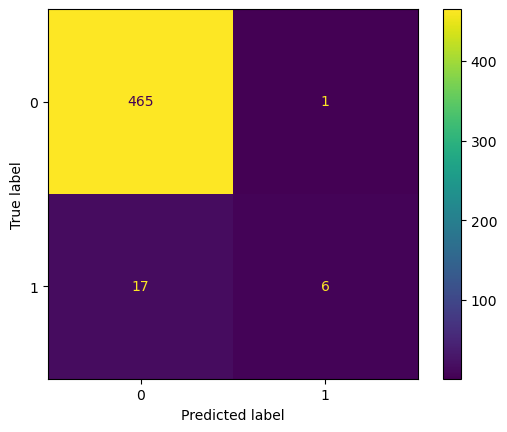

In [60]:
#display the confusion matrix
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()

In [61]:
#assign values to the four elements of the confusion matrix
tn,fp,fn,tp=metrics.confusion_matrix(y_test, y_pred).ravel()

In [62]:
#compute the alpha, beta, and gmeans
alpha=fp/(fp+tn)
beta=fn/(fn+tp)
gmeans=np.sqrt((1-alpha)*(1-beta))

In [63]:
#print metrics
print('Alpha:', round(alpha*100,2), '%')
print('Beta:', round(beta*100,2), '%')
print('Gmeans:', round(gmeans,2))

Alpha: 0.21 %
Beta: 73.91 %
Gmeans: 0.51


In [64]:
#optimize predictions wrt gmeans
#calculate thr roc curves
fpr, tpr, thresholdsgmean = roc_curve(y_test, y_pred_prob)

In [65]:
#calculate the gmeans associated to each threshold
gmeans=np.sqrt(tpr*(1-fpr))
#locate the index of the largest gmean
ixgmean=argmax(gmeans)
print('Best threshold=%f, gmean=%.3f' %(thresholdsgmean[ixgmean], gmeans[ixgmean]))

Best threshold=0.016037, gmean=0.880


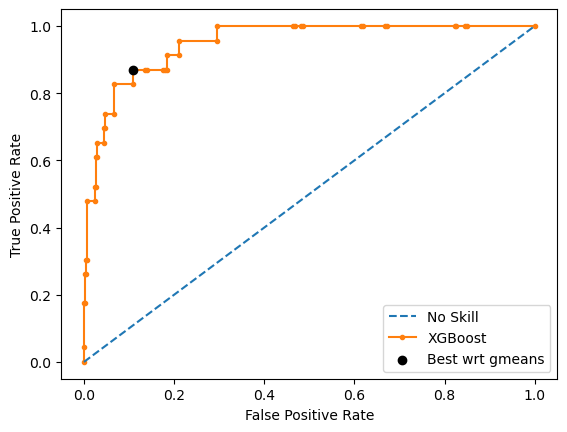

In [66]:
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='XGBoost',zorder=1)
pyplot.scatter(fpr[ixgmean], tpr[ixgmean], marker='o', color='black', label='Best wrt gmeans',zorder=2)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [67]:
#area under the curve
aucmeans=auc(tpr, (1-fpr))
aucmeans

0.949430863967158

In [68]:
#predict classes using the optimal classification threshold wrt the gmeans
optimalthreshold=thresholdsgmean[ixgmean]
y_pred_gmean=y_pred_prob>=optimalthreshold
y_pred_gmean=y_pred_gmean.astype('int')

In [69]:
#create the confusion matrix
confusion_matrixo = metrics.confusion_matrix(y_test, y_pred_gmean)

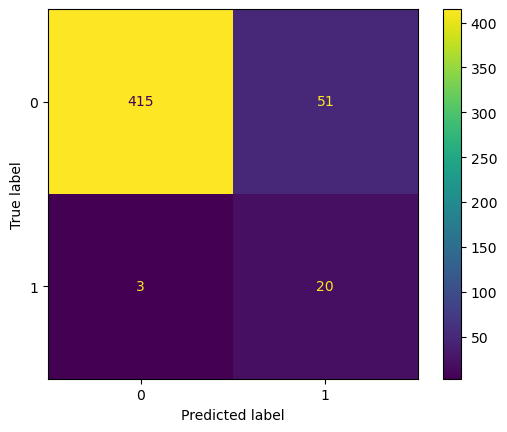

In [70]:
#display the confusion matrix
cm_displayo = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrixo)
cm_displayo.plot()
plt.show()

In [71]:
#assign values to the four elements of the confusion matrix
tno,fpo,fno,tpo=metrics.confusion_matrix(y_test, y_pred_gmean).ravel()

In [72]:
#compute the alpha, beta, and gmeans based on the optimal classificationthreshold 
alphao=fpo/(fpo+tno)
betao=fno/(fno+tpo)
gmeanso=np.sqrt((1-alphao)*(1-betao))

In [73]:
#print metrics
print('Alpha:', round(alphao*100,2), '%')
print('Beta:', round(betao*100,2), '%')
print('Gmeans:', round(gmeanso,2))

Alpha: 10.94 %
Beta: 13.04 %
Gmeans: 0.88


In [74]:
#perform feature importance analysis
importances = clf_final.feature_importances_
#
# Sort the feature importance in descending order
#
sorted_indices = np.argsort(importances)[::-1]
 
feat_labels = X_train.columns[1:]

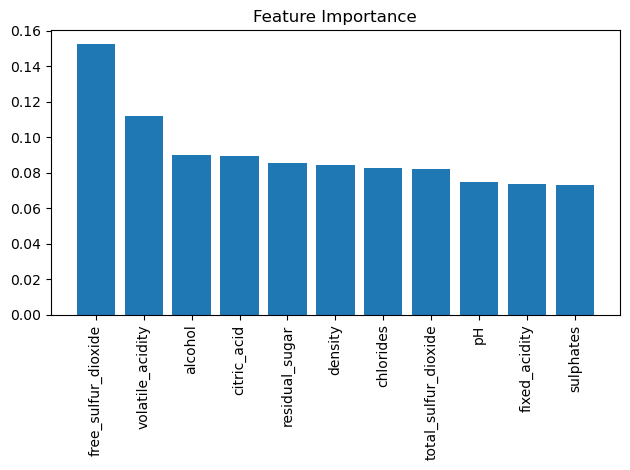

In [75]:
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

In [76]:
y_test.to_csv('y_test', index=False)

In [77]:
y_pred_gmean=pd.Series(y_pred_gmean)
y_pred_gmean.to_csv('y_pred_XGB', index=False)